In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatch
import matplotlib.cm as cmpl
import matplotlib.colors as mpcolors
import seaborn as sns
import squarify as sq
%matplotlib inline

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\1554565068.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Uploading my Data

In [2]:
def upload(fileName):
    df = pd.read_csv(fileName)
    return df

In [3]:
firearm_intersection = upload('./Datasets/firearm_data_intersections13to17.csv')

In [4]:
firearm_address = upload('./Datasets/FirearmAddress.csv')

In [5]:
firearm_general = upload('./Datasets/FirearmsData.csv')

In [6]:
jan_firearm_auction = upload('./Datasets/Jan2021FirearmsAuction.csv')

## Exploring my Data

Before I can merge these datasets, I want to make sure the column names and values are the same.

### Intersection Dataset

In [7]:
firearm_intersection.head()

incident_number        ucr_category  \
0    80-13-097166           Narcotics   
1    80-11-044948  Wpns Law Violation   
2    80-11-037378           Narcotics   
3    80-12-061676  Wpns Law Violation   
4    80-12-010689           Narcotics   

                                     type_of_firearm firearm_manufacturer  \
0  Pistol, Semi-automatic                        ...                Ruger   
1  Pistol, Semi-automatic                        ...             Intratec   
2  Rifle, Semi-automatic                         ...              Norinco   
3  Pistol, Revolver                              ...                  NaN   
4                                               Null                  NaN   

  firearm_model firearm_caliber           recovery_date address_geocode_type  \
0          Sr9c             9MM  2013-12-20 00:00:00+00         INTERSECTION   
1           NaN             9MM  2011-06-11 00:00:00+00         INTERSECTION   
2           Sks            762M  2011-05-16 00:00:00+00         INTERSECTION   
3           NaN             38C  2012-08-03 00:00:00+00         INTERSECTION   
4     Airmaster             NaN  2012-02-16 00:00:00+00         INTERSECTION   

       recovery_block_address        city  ... person_recovered_from_race  \
0         N 22nd St / Bank St  Louisville  ...                      Black   
1  7th Street Rd / Berry Blvd  Louisville  ...                      Black   
2         N 37th St / Bank St  Louisville  ...                      White   
3       Dixie Hwy / Ralph Ave     Shively  ...                      Black   
4  Oxmoor Ln / Shelbyville Rd     Norwood  ...                      White   

   person_recovered_from_sex person_recovered_from_age  \
0                          M                      21.0   
1                          M                      20.0   
2                          M                      27.0   
3                          M                      53.0   
4                          M                      36.0   

                                   address_concat            x            y  \
0         N 22nd St / Bank St Louisville KY 40203          NaN          NaN   
1  7th Street Rd / Berry Blvd Louisville KY 40216          NaN          NaN   
2         N 37th St / Bank St Louisville KY 40212          NaN          NaN   
3               Dixie Hwy / Ralph Ave Shively KY   1195202.125  260851.7188   
4     Oxmoor Ln / Shelbyville Rd Norwood KY 40222  1248916.500  275799.8750   

   longitude   latitude  confidence  source  
0        NaN        NaN         NaN     NaN  
1        NaN        NaN         NaN     NaN  
2        NaN        NaN         NaN     NaN  
3 -85.799466  38.206025         NaN   LOJIC  
4 -85.613325  38.249400         NaN   LOJIC  

[5 rows x 22 columns]

In [8]:
firearm_intersection.columns

Index(['incident_number', 'ucr_category', 'type_of_firearm',
       'firearm_manufacturer', 'firearm_model', 'firearm_caliber',
       'recovery_date', 'address_geocode_type', 'recovery_block_address',
       'city', 'state', 'recovery_zipcode', 'person_recovered_from_race',
       'person_recovered_from_sex', 'person_recovered_from_age',
       'address_concat', 'x', 'y', 'longitude', 'latitude', 'confidence',
       'source'],
      dtype='object')

In [9]:
firearm_intersection.dtypes

incident_number                object
ucr_category                   object
type_of_firearm                object
firearm_manufacturer           object
firearm_model                  object
firearm_caliber                object
recovery_date                  object
address_geocode_type           object
recovery_block_address         object
city                           object
state                          object
recovery_zipcode              float64
person_recovered_from_race     object
person_recovered_from_sex      object
person_recovered_from_age     float64
address_concat                 object
x                             float64
y                             float64
longitude                     float64
latitude                      float64
confidence                    float64
source                         object
dtype: object

### Address Dataset

In [10]:
firearm_address.head()

INCIDENT_NUMBER        UCR_CATEGORY         TYPE_OF_FIREARM  \
0    80-10-011494  Wpns Law Violation  Pistol, Semi-automatic   
1    80-10-011506           Narcotics    Shotgun, Pump Action   
2    80-10-011506           Narcotics    Shotgun, Pump Action   
3    80-10-011506           Narcotics    Shotgun, Pump Action   
4    80-10-011506           Narcotics    Shotgun, Pump Action   

  FIREARM_MANUFACTURER   FIREARM_MODEL FIREARM_CALIBER         RECOVERY_DATE  \
0         Manurin S.A.             NaN            765M  2010-02-17T00:00:00Z   
1       Remington Arms  Shotgun: Model            20GA  2010-02-17T00:00:00Z   
2       Remington Arms  Shotgun: Model            20GA  2010-02-17T00:00:00Z   
3       Remington Arms  Shotgun: Model            20GA  2010-02-17T00:00:00Z   
4       Remington Arms  Shotgun: Model            20GA  2010-02-17T00:00:00Z   

  ADDRESS_GEOCODE_TYPE   RECOVERY__ADDRESS        CITY state  \
0                BLOCK  9400 National Tpke  Louisville    KY   
1                BLOCK    4500 Landside Dr  Louisville    KY   
2                BLOCK    4500 Landside Dr  Louisville    KY   
3                BLOCK    4500 Landside Dr  Louisville    KY   
4                BLOCK    4500 Landside Dr  Louisville    KY   

   RECOVERY_ZIPCODE PERSON_RECOVERED_FROM_RACE PERSON_RECOVERED_FROM_SEX  \
0           40118.0                      White                         M   
1           40220.0                      Black                         M   
2           40220.0                      Black                         M   
3           40220.0                      Black                         M   
4           40220.0                      Black                         M   

   PERSON_RECOVERED_FROM_AGE                          Address_Concat  \
0                       44.0  9400 National Tpke Louisville KY 40118   
1                       19.0    4500 Landside Dr Louisville KY 40220   
2                       19.0    4500 Landside Dr Louisville KY 40220   
3                       19.0    4500 Landside Dr Louisville KY 40220   
4                       19.0    4500 Landside Dr Louisville KY 40220   

   Longitude   Latitude  Confidence         Source  
0 -85.752898  38.125321        0.54  openaddresses  
1 -85.620998  38.198673        1.00  openaddresses  
2 -85.620998  38.198673        1.00  openaddresses  
3 -85.620998  38.198673        1.00  openaddresses  
4 -85.620998  38.198673        1.00  openaddresses

In [11]:
firearm_address.columns

Index(['INCIDENT_NUMBER', 'UCR_CATEGORY', 'TYPE_OF_FIREARM',
       'FIREARM_MANUFACTURER', 'FIREARM_MODEL', 'FIREARM_CALIBER',
       'RECOVERY_DATE', 'ADDRESS_GEOCODE_TYPE', 'RECOVERY__ADDRESS', 'CITY',
       'state', 'RECOVERY_ZIPCODE', 'PERSON_RECOVERED_FROM_RACE',
       'PERSON_RECOVERED_FROM_SEX', 'PERSON_RECOVERED_FROM_AGE',
       'Address_Concat', 'Longitude', 'Latitude', 'Confidence', 'Source'],
      dtype='object')

In [12]:
firearm_address.dtypes

INCIDENT_NUMBER                object
UCR_CATEGORY                   object
TYPE_OF_FIREARM                object
FIREARM_MANUFACTURER           object
FIREARM_MODEL                  object
FIREARM_CALIBER                object
RECOVERY_DATE                  object
ADDRESS_GEOCODE_TYPE           object
RECOVERY__ADDRESS              object
CITY                           object
state                          object
RECOVERY_ZIPCODE              float64
PERSON_RECOVERED_FROM_RACE     object
PERSON_RECOVERED_FROM_SEX      object
PERSON_RECOVERED_FROM_AGE     float64
Address_Concat                 object
Longitude                     float64
Latitude                      float64
Confidence                    float64
Source                         object
dtype: object

### General Dataset

In [13]:
firearm_general.head()

INCIDENT_NUMBER UCR_CATEGORY TYPE_OF_FIREARM FIREARM_MANUFACTURER  \
0    80-06-008380     HOMICIDE             NaN                  NaN   
1    80-10-002211     HOMICIDE             NaN                  NaN   
2    80-10-002211     HOMICIDE             NaN                  NaN   
3    80-17-000578      SUICIDE             NaN                  NaN   
4    80-17-001680      SUICIDE             NaN                  NaN   

  FIREARM_MODEL FIREARM_CALIBER RECOVERY_DATE RECOVERY_BLOCK_ADDRESS  \
0           NaN             NaN           NaN                    NaN   
1           NaN             NaN           NaN                    NaN   
2           NaN             NaN           NaN                    NaN   
3           NaN             NaN           NaN                    NaN   
4           NaN             NaN           NaN                    NaN   

                   CITY state RECOVERY_ZIPCODE PERSON_RECOVERED_FROM_RACE  \
0  LOUISVILLE              KY            40202                        NaN   
1  LOUISVILLE              KY            40202                        NaN   
2  LOUISVILLE              KY            40202                        NaN   
3  LOUISVILLE              KY            40272                        NaN   
4  LOUISVILLE              KY            40272                        NaN   

  PERSON_RECOVERED_FROM_SEX  PERSON_RECOVERED_FROM_AGE  year  
0                       NaN                        NaN   NaN  
1                       NaN                        NaN   NaN  
2                       NaN                        NaN   NaN  
3                       NaN                        NaN   NaN  
4                       NaN                        NaN   NaN

In [14]:
firearm_general.columns

Index(['INCIDENT_NUMBER', 'UCR_CATEGORY', 'TYPE_OF_FIREARM',
       'FIREARM_MANUFACTURER', 'FIREARM_MODEL', 'FIREARM_CALIBER',
       'RECOVERY_DATE', 'RECOVERY_BLOCK_ADDRESS', 'CITY', 'state',
       'RECOVERY_ZIPCODE', 'PERSON_RECOVERED_FROM_RACE',
       'PERSON_RECOVERED_FROM_SEX', 'PERSON_RECOVERED_FROM_AGE', 'year'],
      dtype='object')

In [15]:
firearm_general.dtypes

INCIDENT_NUMBER                object
UCR_CATEGORY                   object
TYPE_OF_FIREARM                object
FIREARM_MANUFACTURER           object
FIREARM_MODEL                  object
FIREARM_CALIBER                object
RECOVERY_DATE                  object
RECOVERY_BLOCK_ADDRESS         object
CITY                           object
state                          object
RECOVERY_ZIPCODE               object
PERSON_RECOVERED_FROM_RACE     object
PERSON_RECOVERED_FROM_SEX      object
PERSON_RECOVERED_FROM_AGE     float64
year                          float64
dtype: object

## Changing the Data Format

The column names are the same except for some additions in firearm_general and firearm_intersection, so I just want to make sure that the names look exactly the same before I combine the datasets.

### Changing the upper-case column names to lower-case

In [16]:
firearm_address.columns = ['incident_number',
                          'ucr_category',
                          'type_of_firearm',
                          'firearm_manufacturer',
                          'firearm_model',
                          'firearm_caliber',
                          'recovery_date',
                          'address_geocode_type',
                          'recovery_address',
                          'city',
                          'state',
                          'recovery_zipcode',
                          'person_recovered_from_race',
                          'person_recovered_from_sex',
                          'person_recovered_from_age',
                          'address_concat',
                          'longitude',
                          'latitude',
                          'confidence',
                          'source']

In [17]:
firearm_general.columns = ['incident_number',
                          'ucr_category',
                          'type_of_firearm',
                          'firearm_manufacturer',
                          'firearm_model',
                          'firearm_caliber',
                          'recovery_date',
                          'recovery_block_address',
                          'city',
                          'state',
                          'recovery_zipcode',
                          'person_recovered_from_race',
                          'person_recovered_from_sex',
                          'person_recovered_from_age',
                          'year']

In [18]:
firearm_address.columns

Index(['incident_number', 'ucr_category', 'type_of_firearm',
       'firearm_manufacturer', 'firearm_model', 'firearm_caliber',
       'recovery_date', 'address_geocode_type', 'recovery_address', 'city',
       'state', 'recovery_zipcode', 'person_recovered_from_race',
       'person_recovered_from_sex', 'person_recovered_from_age',
       'address_concat', 'longitude', 'latitude', 'confidence', 'source'],
      dtype='object')

In [19]:
firearm_general.columns

Index(['incident_number', 'ucr_category', 'type_of_firearm',
       'firearm_manufacturer', 'firearm_model', 'firearm_caliber',
       'recovery_date', 'recovery_block_address', 'city', 'state',
       'recovery_zipcode', 'person_recovered_from_race',
       'person_recovered_from_sex', 'person_recovered_from_age', 'year'],
      dtype='object')

In [20]:
firearm_intersection.columns

Index(['incident_number', 'ucr_category', 'type_of_firearm',
       'firearm_manufacturer', 'firearm_model', 'firearm_caliber',
       'recovery_date', 'address_geocode_type', 'recovery_block_address',
       'city', 'state', 'recovery_zipcode', 'person_recovered_from_race',
       'person_recovered_from_sex', 'person_recovered_from_age',
       'address_concat', 'x', 'y', 'longitude', 'latitude', 'confidence',
       'source'],
      dtype='object')

### Dropping Duplicate Rows

Now that I have ensured all my columns look the same and contain the same names, I want to drop all of my duplicate rows before I merge them.

In [21]:
firearm_intersection = firearm_intersection.drop_duplicates()

In [22]:
firearm_address = firearm_address.drop_duplicates()

In [23]:
firearm_general = firearm_general.drop_duplicates()

### Changing data values from upper-case to lower-case

In the datasets where we had to change the column names from upper case to lower case, the data within is also in lower case. Let's see if we can go ahead and change these data values from objects to strings and from upper case to lower case at the same time. Luckily, the only dataset we should have to do this with is the firearm_general.

In [24]:
firearm_general['ucr_category'] = firearm_general['ucr_category'].str.title()
firearm_general['type_of_firearm'] = firearm_general['type_of_firearm'].str.title()
firearm_general['firearm_manufacturer'] = firearm_general['firearm_manufacturer'].str.title()
firearm_general['firearm_model'] = firearm_general['firearm_model'].str.title()
firearm_general['recovery_block_address'] = firearm_general['recovery_block_address'].str.title()
firearm_general['city'] = firearm_general['city'].str.title()
firearm_general['person_recovered_from_race'] = firearm_general['person_recovered_from_race'].str.title()

In [25]:
firearm_general

incident_number         ucr_category  \
0        80-06-008380             Homicide   
1        80-10-002211             Homicide   
3        80-17-000578              Suicide   
4        80-17-001680              Suicide   
5        80-17-002802  Death Investigation   
...               ...                  ...   
14843    80-10-000185            Narcotics   
14845    80-09-099274   Aggravated Assault   
14846    80-09-098505   Aggravated Assault   
14847    80-09-098505   Aggravated Assault   
14848    80-08-091695         Theft Fr Veh   

                                         type_of_firearm  \
0                                                    NaN   
1                                                    NaN   
3                                                    NaN   
4                                                    NaN   
5                                                    NaN   
...                                                  ...   
14843  Pistol, Semi-Automatic                        ...   
14845  Pistol, Semi-Automatic                        ...   
14846                                                NaN   
14847                                                NaN   
14848  Pistol, Semi-Automatic                        ...   

                                    firearm_manufacturer    firearm_model  \
0                                                    NaN              NaN   
1                                                    NaN              NaN   
3                                                    NaN              NaN   
4                                                    NaN              NaN   
5                                                    NaN              NaN   
...                                                  ...              ...   
14843  Smith & Wesson                                ...  Sw40Ve            
14845                                                ...                    
14846  Armory Gun Co.                                ...                    
14847                                                ...                    
14848  Fie                                           ...  E28               

      firearm_caliber recovery_date  \
0                 NaN           NaN   
1                 NaN           NaN   
3                 NaN           NaN   
4                 NaN           NaN   
5                 NaN           NaN   
...               ...           ...   
14843           40C        1/1/2010   
14845           9MM      12/31/2009   
14846                    12/29/2009   
14847                    12/29/2009   
14848           25C      11/29/2008   

                                  recovery_block_address  \
0                                                    NaN   
1                                                    NaN   
3                                                    NaN   
4                                                    NaN   
5                                                    NaN   
...                                                  ...   
14843  9200 Block Sissonne Dr                        ...   
14845  700 Block Heywood Ave                         ...   
14846  400 Block Amy Ave                             ...   
14847  400 Block Amy Ave                             ...   
14848  1000 Block Cladwell                           ...   

                       city state recovery_zipcode person_recovered_from_race  \
0      Louisville              KY            40202                        NaN   
1      Louisville              KY            40202                        NaN   
3      Louisville              KY            40272                        NaN   
4      Louisville              KY            40272                        NaN   
5      Louisville              KY            40211                        NaN   
...                     ...   ...              ...                        ...   
14843  Louisville              KY            40118

## Merging Datasets

### Merging the Intersection and Address sets

After several tries, I figured out the merge function doesn't enjoy having to merge with more than one identical column. I'm going to merge the intersection and address datasets first, then tack on the general after. Between the intersection and address datasets, the column I want to merge on is the incident_number, and the additional columns I want to add are the recovery_block_address, x, and y. 

So, I'm going to make a different dataframe called firearm_to_merge which contains all the columns from firearm_intersection that I want to merge with firearm_address.

In [26]:
firearm_to_merge = firearm_intersection[['incident_number', 'recovery_block_address', 'x', 'y']]

The original dataset included 2746 pieces of data (rows) and the one we want to merge has 2213 pieces of data, so we know that there were 533 duplicate rows in our data that were successfully dropped.

In [27]:
firearm_to_merge

incident_number                 recovery_block_address            x  \
0       80-13-097166                    N 22nd St / Bank St          NaN   
1       80-11-044948             7th Street Rd / Berry Blvd          NaN   
2       80-11-037378                    N 37th St / Bank St          NaN   
3       80-12-061676                  Dixie Hwy / Ralph Ave  1195202.125   
4       80-12-010689             Oxmoor Ln / Shelbyville Rd  1248916.500   
...              ...                                    ...          ...   
2741    80-13-089244                  W Pages Ln / Terry Rd          NaN   
2742    80-12-085476   W Southern Heights Ave / Wheeler Ave  1198203.750   
2743    80-16-075482  W Southern Heights Ave / Woodruff Ave  1199311.250   
2744    80-10-073277           Watterson Trl / Whitfield Dr          NaN   
2745    80-16-021321  Whisp Brook Cir / Whispering Brook Dr  1223493.625   

                y  
0             NaN  
1             NaN  
2             NaN  
3     260851.7188  
4     275799.8750  
...           ...  
2741          NaN  
2742  254911.1250  
2743  254829.2813  
2744          NaN  
2745  223231.6875  

[2213 rows x 4 columns]

Now we can merge the data to get half the dataset we want.

**Actual Merge:**

In [28]:
firearm_half = pd.merge(firearm_address, firearm_to_merge, how = 'outer', on =["incident_number"])

In [29]:
firearm_half

incident_number        ucr_category         type_of_firearm  \
0        80-06-008380            Homicide                    Null   
1        80-06-108219            Burglary      Rifle, Single-shot   
2        80-08-008343            Burglary  Pistol, Semi-automatic   
3        80-08-047627  Aggravated Assault  Pistol, Semi-automatic   
4        80-08-091695        Theft Fr Veh  Pistol, Semi-automatic   
...               ...                 ...                     ...   
10470    80-17-014610  Wpns Law Violation  Pistol, Semi-automatic   
10471    80-17-014921  Wpns Law Violation                    Null   
10472    80-17-014942           Narcotics  Pistol, Semi-automatic   
10473    80-17-015000  Wpns Law Violation  Pistol, Semi-automatic   
10474    80-17-015302             Suicide                    Null   

        firearm_manufacturer    firearm_model firearm_caliber  \
0                       Null             Null             NaN   
1        Marlin Firearms Co.  Modle 25 Series             NaN   
2            Jennings Firear  Jennings Firear            380C   
3                 Parabellum              NaN             9MM   
4                        Fie              E28             25C   
...                      ...              ...             ...   
10470           Jimenez Arms        See Bryco            380C   
10471            Glock, Inc.  Model 31/31c (3             NaN   
10472  Cobra Enterprises Inc        Ca Series            380C   
10473            Glock, Inc.              NaN             45C   
10474                   Null             Null             NaN   

              recovery_date address_geocode_type    recovery_address  \
0                       NaN           NO ADDRESS                Null   
1      2014-07-30T00:00:00Z                BLOCK      4700 Haney Way   
2      2010-01-20T00:00:00Z                BLOCK    3400 Shagbark Rd   
3      2012-06-18T00:00:00Z                BLOCK      1700 W Hill St   
4      2008-11-29T00:00:00Z                BLOCK       1000 Cladwell   
...                     ...                  ...                 ...   
10470  2017-02-20T00:00:00Z                BLOCK    2500 Alanmede Rd   
10471  2017-02-21T00:00:00Z                BLOCK  600 W Jefferson St   
10472  2017-02-21T00:00:00Z                BLOCK       4200 S 2nd St   
10473  2017-02-21T00:00:00Z                BLOCK       4500 S 6th St   
10474                   NaN           NO ADDRESS                Null   

             city  ... person_recovered_from_sex  person_recovered_from_age  \
0      Louisville  ...                       NaN                        NaN   
1      Louisville  ...                         M                       38.0   
2      Louisville  ...                         M                       30.0   
3      Louisville  ...                         M                       25.0   
4      Louisville  ...                         M                       15.0   
...           ...  ...                       ...                        ...   
10470  Louisville  ...                         M                       16.0   
10471  Louisville  ...                         M                       24.0   
10472  Louisville  ...                         F                       19.0   
10473  Louisville  ...                         M                       32.0   
10474  Louisville  ...                       NaN                        NaN   

                               address_concat  longitude   latitude  \
0                                         NaN   0.000000   0.000000   
1          4700 Haney Way Louisville KY 40272 -85.850950  38.096623   
2        3400 Shagbark Rd Louisville KY 40216 -85.843407  38.196532   
3          1700 W Hill St Louisville KY 40210 -85.784928  38.227766   
4           1000 Cladwell Louisville KY 40203 -85.757053  38.238555   
...                                       ...        ...        ...   
10470    2500 Alanmede Rd Louisville KY 40205 -85.667457  38.216242   
10471  600 W J

Since we're merging two dataframes, I just want to double-check that there are no duplicates.

In [30]:
firearm_half = firearm_half.drop_duplicates()

In [31]:
firearm_half

incident_number        ucr_category         type_of_firearm  \
0        80-06-008380            Homicide                    Null   
1        80-06-108219            Burglary      Rifle, Single-shot   
2        80-08-008343            Burglary  Pistol, Semi-automatic   
3        80-08-047627  Aggravated Assault  Pistol, Semi-automatic   
4        80-08-091695        Theft Fr Veh  Pistol, Semi-automatic   
...               ...                 ...                     ...   
10470    80-17-014610  Wpns Law Violation  Pistol, Semi-automatic   
10471    80-17-014921  Wpns Law Violation                    Null   
10472    80-17-014942           Narcotics  Pistol, Semi-automatic   
10473    80-17-015000  Wpns Law Violation  Pistol, Semi-automatic   
10474    80-17-015302             Suicide                    Null   

        firearm_manufacturer    firearm_model firearm_caliber  \
0                       Null             Null             NaN   
1        Marlin Firearms Co.  Modle 25 Series             NaN   
2            Jennings Firear  Jennings Firear            380C   
3                 Parabellum              NaN             9MM   
4                        Fie              E28             25C   
...                      ...              ...             ...   
10470           Jimenez Arms        See Bryco            380C   
10471            Glock, Inc.  Model 31/31c (3             NaN   
10472  Cobra Enterprises Inc        Ca Series            380C   
10473            Glock, Inc.              NaN             45C   
10474                   Null             Null             NaN   

              recovery_date address_geocode_type    recovery_address  \
0                       NaN           NO ADDRESS                Null   
1      2014-07-30T00:00:00Z                BLOCK      4700 Haney Way   
2      2010-01-20T00:00:00Z                BLOCK    3400 Shagbark Rd   
3      2012-06-18T00:00:00Z                BLOCK      1700 W Hill St   
4      2008-11-29T00:00:00Z                BLOCK       1000 Cladwell   
...                     ...                  ...                 ...   
10470  2017-02-20T00:00:00Z                BLOCK    2500 Alanmede Rd   
10471  2017-02-21T00:00:00Z                BLOCK  600 W Jefferson St   
10472  2017-02-21T00:00:00Z                BLOCK       4200 S 2nd St   
10473  2017-02-21T00:00:00Z                BLOCK       4500 S 6th St   
10474                   NaN           NO ADDRESS                Null   

             city  ... person_recovered_from_sex  person_recovered_from_age  \
0      Louisville  ...                       NaN                        NaN   
1      Louisville  ...                         M                       38.0   
2      Louisville  ...                         M                       30.0   
3      Louisville  ...                         M                       25.0   
4      Louisville  ...                         M                       15.0   
...           ...  ...                       ...                        ...   
10470  Louisville  ...                         M                       16.0   
10471  Louisville  ...                         M                       24.0   
10472  Louisville  ...                         F                       19.0   
10473  Louisville  ...                         M                       32.0   
10474  Louisville  ...                       NaN                        NaN   

                               address_concat  longitude   latitude  \
0                                         NaN   0.000000   0.000000   
1          4700 Haney Way Louisville KY 40272 -85.850950  38.096623   
2        3400 Shagbark Rd Louisville KY 40216 -85.843407  38.196532   
3          1700 W Hill St Louisville KY 40210 -85.784928  38.227766   
4           1000 Cladwell Louisville KY 40203 -85.757053  38.238555   
...                                       ...        ...        ...   
10470    2500 Alanmede Rd Louisville KY 40205 -85.667457  38.216242   
10471  600 W J

Since we did an outer merge so we didn't lose data, we did have some duplicate values we had to get rid of. Now, we can go ahead and merge the general dataset.

### Adding on the General set

In [32]:
firearm_data = pd.merge(firearm_general, firearm_half, how='outer', on=['incident_number'])

In [33]:
firearm_data

incident_number      ucr_category_x  \
0        80-06-008380            Homicide   
1        80-06-108219            Burglary   
2        80-08-008343            Burglary   
3        80-08-047627  Aggravated Assault   
4        80-08-091695        Theft Fr Veh   
...               ...                 ...   
23656    80-17-014921  Wpns Law Violation   
23657    80-17-014942           Narcotics   
23658    80-17-015000  Wpns Law Violation   
23659    80-17-015225  Wpns Law Violation   
23660    80-17-015302             Suicide   

                                       type_of_firearm_x  \
0                                                    NaN   
1      Rifle, Single-Shot                            ...   
2      Pistol, Semi-Automatic                        ...   
3      Pistol, Semi-Automatic                        ...   
4      Pistol, Semi-Automatic                        ...   
...                                                  ...   
23656                                                NaN   
23657  Pistol, Semi-Automatic                        ...   
23658  Pistol, Semi-Automatic                        ...   
23659  Pistol, Semi-Automatic                        ...   
23660                                                NaN   

                                  firearm_manufacturer_x  firearm_model_x  \
0                                                    NaN              NaN   
1      Marlin Firearms Co.                           ...  Modle 25 Series   
2      Jennings Firear                               ...  Jennings Firear   
3      Parabellum                                    ...                    
4      Fie                                           ...  E28               
...                                                  ...              ...   
23656  Glock, Inc.                                   ...  Model 31/31C (3   
23657  Cobra Enterprises Inc                         ...  Ca Series         
23658  Glock, Inc.                                   ...                    
23659  Ruger                                         ...                    
23660                                                NaN              NaN   

      firearm_caliber_x recovery_date_x  \
0                   NaN             NaN   
1                             7/30/2014   
2                 380C        1/20/2010   
3                 9MM         6/18/2012   
4                 25C        11/29/2008   
...                 ...             ...   
23656                         2/21/2017   
23657             380C        2/21/2017   
23658             45C         2/21/2017   
23659             9MM         2/22/2017   
23660               NaN             NaN   

                                recovery_block_address_x  \
0                                                    NaN   
1      4700 Block Haney Way                          ...   
2      3400 Block Shagbark Rd                        ...   
3      1700 Block W Hill St                          ...   
4      1000 Block Cladwell                           ...   
...                                                  ...   
23656  600 Block W Jefferson St                      ...   
23657  4200 Block S 2Nd St                           ...   
23658  4500 Block S 6Th St                           ...   
23659  Dixie Hwy At I265                             ...   
23660                                                NaN   

                     city_x state_x  ... person_recovered_from_sex_y  \
0      Louisville                KY  ...                         NaN   
1      Louisville                KY  ...                           M   
2      Louisville                KY  ...                           M   
3      Louisville                KY  ...                           M   
4      Louisville                KY  ...                           M   
...                     ...     ...  ...                         ...   
23656  Louisville                KY  ...                           M   
23657

In [34]:
firearm_data = firearm_data.drop_duplicates()

In [35]:
firearm_data

incident_number      ucr_category_x  \
0        80-06-008380            Homicide   
1        80-06-108219            Burglary   
2        80-08-008343            Burglary   
3        80-08-047627  Aggravated Assault   
4        80-08-091695        Theft Fr Veh   
...               ...                 ...   
23656    80-17-014921  Wpns Law Violation   
23657    80-17-014942           Narcotics   
23658    80-17-015000  Wpns Law Violation   
23659    80-17-015225  Wpns Law Violation   
23660    80-17-015302             Suicide   

                                       type_of_firearm_x  \
0                                                    NaN   
1      Rifle, Single-Shot                            ...   
2      Pistol, Semi-Automatic                        ...   
3      Pistol, Semi-Automatic                        ...   
4      Pistol, Semi-Automatic                        ...   
...                                                  ...   
23656                                                NaN   
23657  Pistol, Semi-Automatic                        ...   
23658  Pistol, Semi-Automatic                        ...   
23659  Pistol, Semi-Automatic                        ...   
23660                                                NaN   

                                  firearm_manufacturer_x  firearm_model_x  \
0                                                    NaN              NaN   
1      Marlin Firearms Co.                           ...  Modle 25 Series   
2      Jennings Firear                               ...  Jennings Firear   
3      Parabellum                                    ...                    
4      Fie                                           ...  E28               
...                                                  ...              ...   
23656  Glock, Inc.                                   ...  Model 31/31C (3   
23657  Cobra Enterprises Inc                         ...  Ca Series         
23658  Glock, Inc.                                   ...                    
23659  Ruger                                         ...                    
23660                                                NaN              NaN   

      firearm_caliber_x recovery_date_x  \
0                   NaN             NaN   
1                             7/30/2014   
2                 380C        1/20/2010   
3                 9MM         6/18/2012   
4                 25C        11/29/2008   
...                 ...             ...   
23656                         2/21/2017   
23657             380C        2/21/2017   
23658             45C         2/21/2017   
23659             9MM         2/22/2017   
23660               NaN             NaN   

                                recovery_block_address_x  \
0                                                    NaN   
1      4700 Block Haney Way                          ...   
2      3400 Block Shagbark Rd                        ...   
3      1700 Block W Hill St                          ...   
4      1000 Block Cladwell                           ...   
...                                                  ...   
23656  600 Block W Jefferson St                      ...   
23657  4200 Block S 2Nd St                           ...   
23658  4500 Block S 6Th St                           ...   
23659  Dixie Hwy At I265                             ...   
23660                                                NaN   

                     city_x state_x  ... person_recovered_from_sex_y  \
0      Louisville                KY  ...                         NaN   
1      Louisville                KY  ...                           M   
2      Louisville                KY  ...                           M   
3      Louisville                KY  ...                           M   
4      Louisville                KY  ...                           M   
...                     ...     ...  ...                         ...   
23656  Louisville                KY  ...                           M   
23657

## Looking at our newly merged dataset

This is our completed dataset. Now, we can go ahead and take a look at our columns.

In [36]:
firearm_data.columns

Index(['incident_number', 'ucr_category_x', 'type_of_firearm_x',
       'firearm_manufacturer_x', 'firearm_model_x', 'firearm_caliber_x',
       'recovery_date_x', 'recovery_block_address_x', 'city_x', 'state_x',
       'recovery_zipcode_x', 'person_recovered_from_race_x',
       'person_recovered_from_sex_x', 'person_recovered_from_age_x', 'year',
       'ucr_category_y', 'type_of_firearm_y', 'firearm_manufacturer_y',
       'firearm_model_y', 'firearm_caliber_y', 'recovery_date_y',
       'address_geocode_type', 'recovery_address', 'city_y', 'state_y',
       'recovery_zipcode_y', 'person_recovered_from_race_y',
       'person_recovered_from_sex_y', 'person_recovered_from_age_y',
       'address_concat', 'longitude', 'latitude', 'confidence', 'source',
       'recovery_block_address_y', 'x', 'y'],
      dtype='object')

In [37]:
firearm_data.dtypes

incident_number                  object
ucr_category_x                   object
type_of_firearm_x                object
firearm_manufacturer_x           object
firearm_model_x                  object
firearm_caliber_x                object
recovery_date_x                  object
recovery_block_address_x         object
city_x                           object
state_x                          object
recovery_zipcode_x               object
person_recovered_from_race_x     object
person_recovered_from_sex_x      object
person_recovered_from_age_x     float64
year                            float64
ucr_category_y                   object
type_of_firearm_y                object
firearm_manufacturer_y           object
firearm_model_y                  object
firearm_caliber_y                object
recovery_date_y                  object
address_geocode_type             object
recovery_address                 object
city_y                           object
state_y                          object


### Checking Split Columns for Duplicates

We have a TON of repeated columns here. I want to go ahead and make sure that the repeated columns aren't the same before I decide what to do with them.

In [38]:
print("ucr_category: "+ str(firearm_data['ucr_category_x'].equals(firearm_data['ucr_category_y'])))
print("type_of_firearm: " + str(firearm_data['type_of_firearm_x'].equals(firearm_data['type_of_firearm_y'])))
print("firearm_manufacturer: " + str(firearm_data['firearm_manufacturer_x'].equals(firearm_data['firearm_manufacturer_y'])))
print("firearm_model: " + str(firearm_data['firearm_model_x'].equals(firearm_data['firearm_model_y'])))
print("firearm_caliber: " + str(firearm_data['firearm_caliber_x'].equals(firearm_data['firearm_caliber_y'])))
print("recovery_date: " + str(firearm_data['recovery_date_x'].equals(firearm_data['recovery_date_y'])))
print("recovery_block_address: " + str(firearm_data['recovery_block_address_x'].equals(firearm_data['recovery_block_address_y'])))
print("city: " + str(firearm_data['city_x'].equals(firearm_data['city_y'])))
print("state: " + str(firearm_data['state_x'].equals(firearm_data['state_y'])))
print("recovery_zipcode: " + str(firearm_data['recovery_zipcode_x'].equals(firearm_data['recovery_zipcode_y'])))
print("person_recovered_from_race: " + str(firearm_data['person_recovered_from_race_x'].equals(firearm_data['person_recovered_from_race_y'])))
print("person_recovered_from_sex: " + str(firearm_data['person_recovered_from_sex_x'].equals(firearm_data['person_recovered_from_sex_y'])))
print("person_recovered_from_age: " + str(firearm_data['person_recovered_from_age_x'].equals(firearm_data['person_recovered_from_age_y'])))

ucr_category: False
type_of_firearm: False
firearm_manufacturer: False
firearm_model: False
firearm_caliber: False
recovery_date: False
recovery_block_address: False
city: False
state: False
recovery_zipcode: False
person_recovered_from_race: False
person_recovered_from_sex: False
person_recovered_from_age: False


So basically, none of these columns are the same. Can we merge them without overlapping values?

In [39]:
test_set = firearm_data

In [40]:
test_set

incident_number      ucr_category_x  \
0        80-06-008380            Homicide   
1        80-06-108219            Burglary   
2        80-08-008343            Burglary   
3        80-08-047627  Aggravated Assault   
4        80-08-091695        Theft Fr Veh   
...               ...                 ...   
23656    80-17-014921  Wpns Law Violation   
23657    80-17-014942           Narcotics   
23658    80-17-015000  Wpns Law Violation   
23659    80-17-015225  Wpns Law Violation   
23660    80-17-015302             Suicide   

                                       type_of_firearm_x  \
0                                                    NaN   
1      Rifle, Single-Shot                            ...   
2      Pistol, Semi-Automatic                        ...   
3      Pistol, Semi-Automatic                        ...   
4      Pistol, Semi-Automatic                        ...   
...                                                  ...   
23656                                                NaN   
23657  Pistol, Semi-Automatic                        ...   
23658  Pistol, Semi-Automatic                        ...   
23659  Pistol, Semi-Automatic                        ...   
23660                                                NaN   

                                  firearm_manufacturer_x  firearm_model_x  \
0                                                    NaN              NaN   
1      Marlin Firearms Co.                           ...  Modle 25 Series   
2      Jennings Firear                               ...  Jennings Firear   
3      Parabellum                                    ...                    
4      Fie                                           ...  E28               
...                                                  ...              ...   
23656  Glock, Inc.                                   ...  Model 31/31C (3   
23657  Cobra Enterprises Inc                         ...  Ca Series         
23658  Glock, Inc.                                   ...                    
23659  Ruger                                         ...                    
23660                                                NaN              NaN   

      firearm_caliber_x recovery_date_x  \
0                   NaN             NaN   
1                             7/30/2014   
2                 380C        1/20/2010   
3                 9MM         6/18/2012   
4                 25C        11/29/2008   
...                 ...             ...   
23656                         2/21/2017   
23657             380C        2/21/2017   
23658             45C         2/21/2017   
23659             9MM         2/22/2017   
23660               NaN             NaN   

                                recovery_block_address_x  \
0                                                    NaN   
1      4700 Block Haney Way                          ...   
2      3400 Block Shagbark Rd                        ...   
3      1700 Block W Hill St                          ...   
4      1000 Block Cladwell                           ...   
...                                                  ...   
23656  600 Block W Jefferson St                      ...   
23657  4200 Block S 2Nd St                           ...   
23658  4500 Block S 6Th St                           ...   
23659  Dixie Hwy At I265                             ...   
23660                                                NaN   

                     city_x state_x  ... person_recovered_from_sex_y  \
0      Louisville                KY  ...                         NaN   
1      Louisville                KY  ...                           M   
2      Louisville                KY  ...                           M   
3      Louisville                KY  ...                           M   
4      Louisville                KY  ...                           M   
...                     ...     ...  ...                         ...   
23656  Louisville                KY  ...                           M   
23657

In [41]:
test_set['ucr_category'] = test_set.ucr_category_x.combine_first(test_set.ucr_category_y)

In [42]:
test_set

incident_number      ucr_category_x  \
0        80-06-008380            Homicide   
1        80-06-108219            Burglary   
2        80-08-008343            Burglary   
3        80-08-047627  Aggravated Assault   
4        80-08-091695        Theft Fr Veh   
...               ...                 ...   
23656    80-17-014921  Wpns Law Violation   
23657    80-17-014942           Narcotics   
23658    80-17-015000  Wpns Law Violation   
23659    80-17-015225  Wpns Law Violation   
23660    80-17-015302             Suicide   

                                       type_of_firearm_x  \
0                                                    NaN   
1      Rifle, Single-Shot                            ...   
2      Pistol, Semi-Automatic                        ...   
3      Pistol, Semi-Automatic                        ...   
4      Pistol, Semi-Automatic                        ...   
...                                                  ...   
23656                                                NaN   
23657  Pistol, Semi-Automatic                        ...   
23658  Pistol, Semi-Automatic                        ...   
23659  Pistol, Semi-Automatic                        ...   
23660                                                NaN   

                                  firearm_manufacturer_x  firearm_model_x  \
0                                                    NaN              NaN   
1      Marlin Firearms Co.                           ...  Modle 25 Series   
2      Jennings Firear                               ...  Jennings Firear   
3      Parabellum                                    ...                    
4      Fie                                           ...  E28               
...                                                  ...              ...   
23656  Glock, Inc.                                   ...  Model 31/31C (3   
23657  Cobra Enterprises Inc                         ...  Ca Series         
23658  Glock, Inc.                                   ...                    
23659  Ruger                                         ...                    
23660                                                NaN              NaN   

      firearm_caliber_x recovery_date_x  \
0                   NaN             NaN   
1                             7/30/2014   
2                 380C        1/20/2010   
3                 9MM         6/18/2012   
4                 25C        11/29/2008   
...                 ...             ...   
23656                         2/21/2017   
23657             380C        2/21/2017   
23658             45C         2/21/2017   
23659             9MM         2/22/2017   
23660               NaN             NaN   

                                recovery_block_address_x  \
0                                                    NaN   
1      4700 Block Haney Way                          ...   
2      3400 Block Shagbark Rd                        ...   
3      1700 Block W Hill St                          ...   
4      1000 Block Cladwell                           ...   
...                                                  ...   
23656  600 Block W Jefferson St                      ...   
23657  4200 Block S 2Nd St                           ...   
23658  4500 Block S 6Th St                           ...   
23659  Dixie Hwy At I265                             ...   
23660                                                NaN   

                     city_x state_x  ... person_recovered_from_age_y  \
0      Louisville                KY  ...                         NaN   
1      Louisville                KY  ...                        38.0   
2      Louisville                KY  ...                        30.0   
3      Louisville                KY  ...                        25.0   
4      Louisville                KY  ...                        15.0   
...                     ...     ...  ...                         ...   
23656  Louisville                KY  ...                        24.0   
23657

In [43]:
test_set_save = pd.DataFrame(test_set[['ucr_category', 'ucr_category_x', 'ucr_category_y']])

In [44]:
test_set_save

ucr_category      ucr_category_x      ucr_category_y
0                Homicide            Homicide            Homicide
1                Burglary            Burglary            Burglary
2                Burglary            Burglary            Burglary
3      Aggravated Assault  Aggravated Assault  Aggravated Assault
4            Theft Fr Veh        Theft Fr Veh        Theft Fr Veh
...                   ...                 ...                 ...
23656  Wpns Law Violation  Wpns Law Violation  Wpns Law Violation
23657           Narcotics           Narcotics           Narcotics
23658  Wpns Law Violation  Wpns Law Violation  Wpns Law Violation
23659  Wpns Law Violation  Wpns Law Violation                 NaN
23660             Suicide             Suicide             Suicide

[23661 rows x 3 columns]

In [45]:
test_set_save.sample(30)

ucr_category      ucr_category_x      ucr_category_y
10681  Aggravated Assault  Aggravated Assault  Aggravated Assault
10217           Narcotics           Narcotics           Narcotics
1415   Wpns Law Violation  Wpns Law Violation  Wpns Law Violation
8597            Narcotics           Narcotics           Narcotics
22426           Narcotics           Narcotics           Narcotics
18596  Aggravated Assault  Aggravated Assault  Aggravated Assault
512    Aggravated Assault  Aggravated Assault  Aggravated Assault
22332           Narcotics           Narcotics           Narcotics
12882  Wpns Law Violation  Wpns Law Violation  Wpns Law Violation
9154      Stolen Property     Stolen Property     Stolen Property
10419  Wpns Law Violation  Wpns Law Violation  Wpns Law Violation
6594      Stolen Property     Stolen Property     Stolen Property
19612  Aggravated Assault  Aggravated Assault  Aggravated Assault
22398           Narcotics           Narcotics           Narcotics
6510   Wpns Law Violation  Wpns Law Violation  Wpns Law Violation
5714   Wpns Law Violation  Wpns Law Violation  Wpns Law Violation
426    Wpns Law Violation  Wpns Law Violation  Wpns Law Violation
23265           Narcotics           Narcotics           Narcotics
16706  Aggravated Assault  Aggravated Assault  Aggravated Assault
6379   Aggravated Assault  Aggravated Assault  Aggravated Assault
2204            Narcotics           Narcotics           Narcotics
19106      Counterfeiting      Counterfeiting      Counterfeiting
11627           Narcotics           Narcotics           Narcotics
18242  Wpns Law Violation  Wpns Law Violation  Wpns Law Violation
377    Wpns Law Violation  Wpns Law Violation  Wpns Law Violation
258               Suicide             Suicide             Suicide
5395            Narcotics           Narcotics           Narcotics
6963            Narcotics           Narcotics                 NaN
8205            Narcotics           Narcotics           Narcotics
7246   Aggravated Assault  Aggravated Assault  Aggravated Assault

### Merging Our Duplicate Columns

After taking a random sample of 30 values, it seems our values were merged the way we wanted them to be. I'm going to create a function so we can do this a bit easier for each column.

In [46]:
def merge_column(dataFrame, columnName):
    column_x = (columnName + '_x')
    column_y = (columnName + '_y')
    dataFrame[columnName] = dataFrame[column_x].combine_first(dataFrame[column_y])

In [47]:
firearm_data.columns

Index(['incident_number', 'ucr_category_x', 'type_of_firearm_x',
       'firearm_manufacturer_x', 'firearm_model_x', 'firearm_caliber_x',
       'recovery_date_x', 'recovery_block_address_x', 'city_x', 'state_x',
       'recovery_zipcode_x', 'person_recovered_from_race_x',
       'person_recovered_from_sex_x', 'person_recovered_from_age_x', 'year',
       'ucr_category_y', 'type_of_firearm_y', 'firearm_manufacturer_y',
       'firearm_model_y', 'firearm_caliber_y', 'recovery_date_y',
       'address_geocode_type', 'recovery_address', 'city_y', 'state_y',
       'recovery_zipcode_y', 'person_recovered_from_race_y',
       'person_recovered_from_sex_y', 'person_recovered_from_age_y',
       'address_concat', 'longitude', 'latitude', 'confidence', 'source',
       'recovery_block_address_y', 'x', 'y', 'ucr_category'],
      dtype='object')

In [48]:
merge_column(firearm_data, 'ucr_category')
merge_column(firearm_data, 'type_of_firearm')
merge_column(firearm_data, 'firearm_manufacturer')
merge_column(firearm_data, 'firearm_model')
merge_column(firearm_data, 'firearm_caliber')
merge_column(firearm_data, 'recovery_date')
merge_column(firearm_data, 'recovery_block_address')
merge_column(firearm_data, 'city')
merge_column(firearm_data, 'state')
merge_column(firearm_data, 'recovery_zipcode')
merge_column(firearm_data, 'person_recovered_from_race')
merge_column(firearm_data, 'person_recovered_from_sex')
merge_column(firearm_data, 'person_recovered_from_age')

In [49]:
firearm_data

incident_number      ucr_category_x  \
0        80-06-008380            Homicide   
1        80-06-108219            Burglary   
2        80-08-008343            Burglary   
3        80-08-047627  Aggravated Assault   
4        80-08-091695        Theft Fr Veh   
...               ...                 ...   
23656    80-17-014921  Wpns Law Violation   
23657    80-17-014942           Narcotics   
23658    80-17-015000  Wpns Law Violation   
23659    80-17-015225  Wpns Law Violation   
23660    80-17-015302             Suicide   

                                       type_of_firearm_x  \
0                                                    NaN   
1      Rifle, Single-Shot                            ...   
2      Pistol, Semi-Automatic                        ...   
3      Pistol, Semi-Automatic                        ...   
4      Pistol, Semi-Automatic                        ...   
...                                                  ...   
23656                                                NaN   
23657  Pistol, Semi-Automatic                        ...   
23658  Pistol, Semi-Automatic                        ...   
23659  Pistol, Semi-Automatic                        ...   
23660                                                NaN   

                                  firearm_manufacturer_x  firearm_model_x  \
0                                                    NaN              NaN   
1      Marlin Firearms Co.                           ...  Modle 25 Series   
2      Jennings Firear                               ...  Jennings Firear   
3      Parabellum                                    ...                    
4      Fie                                           ...  E28               
...                                                  ...              ...   
23656  Glock, Inc.                                   ...  Model 31/31C (3   
23657  Cobra Enterprises Inc                         ...  Ca Series         
23658  Glock, Inc.                                   ...                    
23659  Ruger                                         ...                    
23660                                                NaN              NaN   

      firearm_caliber_x recovery_date_x  \
0                   NaN             NaN   
1                             7/30/2014   
2                 380C        1/20/2010   
3                 9MM         6/18/2012   
4                 25C        11/29/2008   
...                 ...             ...   
23656                         2/21/2017   
23657             380C        2/21/2017   
23658             45C         2/21/2017   
23659             9MM         2/22/2017   
23660               NaN             NaN   

                                recovery_block_address_x  \
0                                                    NaN   
1      4700 Block Haney Way                          ...   
2      3400 Block Shagbark Rd                        ...   
3      1700 Block W Hill St                          ...   
4      1000 Block Cladwell                           ...   
...                                                  ...   
23656  600 Block W Jefferson St                      ...   
23657  4200 Block S 2Nd St                           ...   
23658  4500 Block S 6Th St                           ...   
23659  Dixie Hwy At I265                             ...   
23660                                                NaN   

                     city_x state_x  ...    firearm_model firearm_caliber  \
0      Louisville                KY  ...             Null             NaN   
1      Louisville                KY  ...  Modle 25 Series                   
2      Louisville                KY  ...  Jennings Firear           380C    
3      Louisville                KY  ...                            9MM     
4      Louisville                KY  ...  E28                       25C     
...                     ...     ...  ...              ...             ...   
23656  Louisville                KY  ...  

### Dropping our extra columns and duplicate rows after our final merge

In [50]:
firearm_data = firearm_data.loc[:, ~firearm_data.columns.str.endswith('_x')]

In [51]:
firearm_data = firearm_data.loc[:, ~firearm_data.columns.str.endswith('_y')]

In [52]:
firearm_data

incident_number    year address_geocode_type    recovery_address  \
0        80-06-008380     NaN           NO ADDRESS                Null   
1        80-06-108219  2014.0                BLOCK      4700 Haney Way   
2        80-08-008343  2010.0                BLOCK    3400 Shagbark Rd   
3        80-08-047627  2012.0                BLOCK      1700 W Hill St   
4        80-08-091695  2008.0                BLOCK       1000 Cladwell   
...               ...     ...                  ...                 ...   
23656    80-17-014921  2017.0                BLOCK  600 W Jefferson St   
23657    80-17-014942  2017.0                BLOCK       4200 S 2nd St   
23658    80-17-015000  2017.0                BLOCK       4500 S 6th St   
23659    80-17-015225  2017.0                  NaN                 NaN   
23660    80-17-015302     NaN           NO ADDRESS                Null   

                               address_concat  longitude   latitude  \
0                                         NaN   0.000000   0.000000   
1          4700 Haney Way Louisville KY 40272 -85.850950  38.096623   
2        3400 Shagbark Rd Louisville KY 40216 -85.843407  38.196532   
3          1700 W Hill St Louisville KY 40210 -85.784928  38.227766   
4           1000 Cladwell Louisville KY 40203 -85.757053  38.238555   
...                                       ...        ...        ...   
23656  600 W Jefferson St Louisville KY 40202 -85.761323  38.253961   
23657       4200 S 2nd St Louisville KY 40214 -85.763628  38.195203   
23658       4500 S 6th St Louisville KY 40214 -85.770469  38.188165   
23659                                     NaN        NaN        NaN   
23660                                     NaN   0.000000   0.000000   

       confidence         source   x  ...    firearm_model firearm_caliber  \
0            0.00           none NaN  ...             Null             NaN   
1            1.00  openaddresses NaN  ...  Modle 25 Series                   
2            1.00  openaddresses NaN  ...  Jennings Firear           380C    
3            1.00  openaddresses NaN  ...                            9MM     
4            0.67  openaddresses NaN  ...  E28                       25C     
...           ...            ...  ..  ...              ...             ...   
23656        1.00  openaddresses NaN  ...  Model 31/31C (3                   
23657        1.00  openaddresses NaN  ...  Ca Series                 380C    
23658        1.00  openaddresses NaN  ...                            45C     
23659         NaN            NaN NaN  ...                            9MM     
23660        0.00           none NaN  ...             Null             NaN   

      recovery_date                             recovery_block_address  \
0               NaN                                                NaN   
1         7/30/2014  4700 Block Haney Way                          ...   
2         1/20/2010  3400 Block Shagbark Rd                        ...   
3         6/18/2012  1700 Block W Hill St                          ...   
4        11/29/2008  1000 Block Cladwell                           ...   
...             ...                                                ...   
23656     2/21/2017  600 Block W Jefferson St                      ...   
23657     2/21/2017  4200 Block S 2Nd St                           ...   
23658     2/21/2017  4500 Block S 6Th St                           ...   
23659     2/22/2017  Dixie Hwy At I265                             ...   
23660           NaN                                                NaN   

                       city state recovery_zipcode person_recovered_from_race  \
0      Louisville              KY            40202                       Null   
1      Louisville              KY            40272                      White   
2      Louisville              KY            40216                      Black   
3      Louisville              KY            40210                      Black   
4      Louisville              KY

In [53]:
firearm_data = firearm_data.drop_duplicates()

In [54]:
firearm_data

incident_number    year address_geocode_type    recovery_address  \
0        80-06-008380     NaN           NO ADDRESS                Null   
1        80-06-108219  2014.0                BLOCK      4700 Haney Way   
2        80-08-008343  2010.0                BLOCK    3400 Shagbark Rd   
3        80-08-047627  2012.0                BLOCK      1700 W Hill St   
4        80-08-091695  2008.0                BLOCK       1000 Cladwell   
...               ...     ...                  ...                 ...   
23656    80-17-014921  2017.0                BLOCK  600 W Jefferson St   
23657    80-17-014942  2017.0                BLOCK       4200 S 2nd St   
23658    80-17-015000  2017.0                BLOCK       4500 S 6th St   
23659    80-17-015225  2017.0                  NaN                 NaN   
23660    80-17-015302     NaN           NO ADDRESS                Null   

                               address_concat  longitude   latitude  \
0                                         NaN   0.000000   0.000000   
1          4700 Haney Way Louisville KY 40272 -85.850950  38.096623   
2        3400 Shagbark Rd Louisville KY 40216 -85.843407  38.196532   
3          1700 W Hill St Louisville KY 40210 -85.784928  38.227766   
4           1000 Cladwell Louisville KY 40203 -85.757053  38.238555   
...                                       ...        ...        ...   
23656  600 W Jefferson St Louisville KY 40202 -85.761323  38.253961   
23657       4200 S 2nd St Louisville KY 40214 -85.763628  38.195203   
23658       4500 S 6th St Louisville KY 40214 -85.770469  38.188165   
23659                                     NaN        NaN        NaN   
23660                                     NaN   0.000000   0.000000   

       confidence         source   x  ...    firearm_model firearm_caliber  \
0            0.00           none NaN  ...             Null             NaN   
1            1.00  openaddresses NaN  ...  Modle 25 Series                   
2            1.00  openaddresses NaN  ...  Jennings Firear           380C    
3            1.00  openaddresses NaN  ...                            9MM     
4            0.67  openaddresses NaN  ...  E28                       25C     
...           ...            ...  ..  ...              ...             ...   
23656        1.00  openaddresses NaN  ...  Model 31/31C (3                   
23657        1.00  openaddresses NaN  ...  Ca Series                 380C    
23658        1.00  openaddresses NaN  ...                            45C     
23659         NaN            NaN NaN  ...                            9MM     
23660        0.00           none NaN  ...             Null             NaN   

      recovery_date                             recovery_block_address  \
0               NaN                                                NaN   
1         7/30/2014  4700 Block Haney Way                          ...   
2         1/20/2010  3400 Block Shagbark Rd                        ...   
3         6/18/2012  1700 Block W Hill St                          ...   
4        11/29/2008  1000 Block Cladwell                           ...   
...             ...                                                ...   
23656     2/21/2017  600 Block W Jefferson St                      ...   
23657     2/21/2017  4200 Block S 2Nd St                           ...   
23658     2/21/2017  4500 Block S 6Th St                           ...   
23659     2/22/2017  Dixie Hwy At I265                             ...   
23660           NaN                                                NaN   

                       city state recovery_zipcode person_recovered_from_race  \
0      Louisville              KY            40202                       Null   
1      Louisville              KY            40272                      White   
2      Louisville              KY            40216                      Black   
3      Louisville              KY            40210                      Black   
4      Louisville              KY

### Reordering Columns

In [55]:
firearm_data.columns

Index(['incident_number', 'year', 'address_geocode_type', 'recovery_address',
       'address_concat', 'longitude', 'latitude', 'confidence', 'source', 'x',
       'y', 'ucr_category', 'type_of_firearm', 'firearm_manufacturer',
       'firearm_model', 'firearm_caliber', 'recovery_date',
       'recovery_block_address', 'city', 'state', 'recovery_zipcode',
       'person_recovered_from_race', 'person_recovered_from_sex',
       'person_recovered_from_age'],
      dtype='object')

In [56]:
firearm_data = firearm_data[["incident_number", "year", "recovery_date", "ucr_category", "type_of_firearm", "firearm_manufacturer", "firearm_model", "firearm_caliber", "address_concat", "address_geocode_type", "recovery_block_address", "recovery_address", "city", "state", "recovery_zipcode", "longitude", "latitude", "x", "y", "person_recovered_from_race", "person_recovered_from_sex", "person_recovered_from_age", "confidence", "source"]]

In [57]:
firearm_data.head()

incident_number    year recovery_date        ucr_category  \
0    80-06-008380     NaN           NaN            Homicide   
1    80-06-108219  2014.0     7/30/2014            Burglary   
2    80-08-008343  2010.0     1/20/2010            Burglary   
3    80-08-047627  2012.0     6/18/2012  Aggravated Assault   
4    80-08-091695  2008.0    11/29/2008        Theft Fr Veh   

                                     type_of_firearm  \
0                                               Null   
1  Rifle, Single-Shot                            ...   
2  Pistol, Semi-Automatic                        ...   
3  Pistol, Semi-Automatic                        ...   
4  Pistol, Semi-Automatic                        ...   

                                firearm_manufacturer    firearm_model  \
0                                               Null             Null   
1  Marlin Firearms Co.                           ...  Modle 25 Series   
2  Jennings Firear                               ...  Jennings Firear   
3  Parabellum                                    ...                    
4  Fie                                           ...  E28               

  firearm_caliber                        address_concat address_geocode_type  \
0             NaN                                   NaN           NO ADDRESS   
1                    4700 Haney Way Louisville KY 40272                BLOCK   
2           380C   3400 Shagbark Rd Louisville KY 40216                BLOCK   
3           9MM      1700 W Hill St Louisville KY 40210                BLOCK   
4           25C       1000 Cladwell Louisville KY 40203                BLOCK   

   ... recovery_zipcode  longitude   latitude   x   y  \
0  ...            40202   0.000000   0.000000 NaN NaN   
1  ...            40272 -85.850950  38.096623 NaN NaN   
2  ...            40216 -85.843407  38.196532 NaN NaN   
3  ...            40210 -85.784928  38.227766 NaN NaN   
4  ...            40203 -85.757053  38.238555 NaN NaN   

   person_recovered_from_race  person_recovered_from_sex  \
0                        Null                        NaN   
1                       White                          M   
2                       Black                          M   
3                       Black                          M   
4                       White                          M   

   person_recovered_from_age  confidence         source  
0                        NaN        0.00           none  
1                       38.0        1.00  openaddresses  
2                       30.0        1.00  openaddresses  
3                       25.0        1.00  openaddresses  
4                       15.0        0.67  openaddresses  

[5 rows x 24 columns]

In [58]:
firearm_data.describe()

year    longitude     latitude             x              y  \
count  11263.000000  8803.000000  8803.000000  1.361000e+03    1361.000000   
mean    2013.501998   -79.447296    35.389723  1.207515e+06  261510.687991   
std        2.117481    22.427429     9.988813  1.917131e+04   17402.523667   
min     2008.000000  -122.440321     0.000000  1.166337e+06  206744.500000   
25%     2012.000000   -85.789370    38.167984  1.195536e+06  251281.062500   
50%     2014.000000   -85.761323    38.229139  1.204016e+06  267058.187500   
75%     2015.000000   -85.690866    38.253961  1.214921e+06  275068.000000   
max     2017.000000     0.000000    43.199428  1.287586e+06  297530.375000   

       person_recovered_from_age   confidence  
count                9140.000000  8803.000000  
mean                   30.599562     0.813746  
std                    12.308569     0.290693  
min                     0.000000     0.000000  
25%                    21.000000     0.664000  
50%                    27.000000     1.000000  
75%                    37.000000     1.000000  
max                    87.000000     1.000000

## Cleaning Usable Data

### Dropping Values we don't need

In [59]:
firearm_data.columns

Index(['incident_number', 'year', 'recovery_date', 'ucr_category',
       'type_of_firearm', 'firearm_manufacturer', 'firearm_model',
       'firearm_caliber', 'address_concat', 'address_geocode_type',
       'recovery_block_address', 'recovery_address', 'city', 'state',
       'recovery_zipcode', 'longitude', 'latitude', 'x', 'y',
       'person_recovered_from_race', 'person_recovered_from_sex',
       'person_recovered_from_age', 'confidence', 'source'],
      dtype='object')

In [60]:
firearm_data.drop(firearm_data[['x', 'y', 'source', 'address_concat']], axis = 1, inplace = True)

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\904289819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data.drop(firearm_data[['x', 'y', 'source', 'address_concat']], axis = 1, inplace = True)


In [61]:
firearm_data.columns

Index(['incident_number', 'year', 'recovery_date', 'ucr_category',
       'type_of_firearm', 'firearm_manufacturer', 'firearm_model',
       'firearm_caliber', 'address_geocode_type', 'recovery_block_address',
       'recovery_address', 'city', 'state', 'recovery_zipcode', 'longitude',
       'latitude', 'person_recovered_from_race', 'person_recovered_from_sex',
       'person_recovered_from_age', 'confidence'],
      dtype='object')

### Changing the Data Types

In [62]:
firearm_data.dtypes

incident_number                object
year                          float64
recovery_date                  object
ucr_category                   object
type_of_firearm                object
firearm_manufacturer           object
firearm_model                  object
firearm_caliber                object
address_geocode_type           object
recovery_block_address         object
recovery_address               object
city                           object
state                          object
recovery_zipcode               object
longitude                     float64
latitude                      float64
person_recovered_from_race     object
person_recovered_from_sex      object
person_recovered_from_age     float64
confidence                    float64
dtype: object

In [63]:
firearm_data['recovery_date'] = pd.to_datetime(firearm_data.recovery_date)

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\2823338765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data['recovery_date'] = pd.to_datetime(firearm_data.recovery_date)


In [64]:
firearm_data.dtypes

incident_number                       object
year                                 float64
recovery_date                 datetime64[ns]
ucr_category                          object
type_of_firearm                       object
firearm_manufacturer                  object
firearm_model                         object
firearm_caliber                       object
address_geocode_type                  object
recovery_block_address                object
recovery_address                      object
city                                  object
state                                 object
recovery_zipcode                      object
longitude                            float64
latitude                             float64
person_recovered_from_race            object
person_recovered_from_sex             object
person_recovered_from_age            float64
confidence                           float64
dtype: object

### Separating the gun type with the subcategory

In [65]:
firearm_data['type_of_firearm'].unique()

array(['Null', 'Rifle, Single-Shot                                     ',
       'Pistol, Semi-Automatic                                 ',
       'Pistol, Revolver                                       ',
       'Shotgun, Pump Action                                   ',
       'Rifle, Automatic                                       ',
       'Shotgun, Pump Action', 'Pistol, Semi-automatic',
       'Airgun                                                 ',
       'Rifle, Bolt Action                                     ',
       'Rifle, Semi-Automatic                                  ',
       'Electronic Control Weapon                              ',
       'Pistol, Percussion                                     ',
       'Rifle, Percussion                                      ',
       'Pistol, Derringer                                      ',
       'Shotgun, Single-Shot                                   ',
       'Shotgun, Bolt Action                                   ', nan,
      

In [66]:
firearm_data[['firearm_category', 'firearm_subcategory']] = firearm_data.type_of_firearm.str.split(",", expand = True)

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\1680741139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data[['firearm_category', 'firearm_subcategory']] = firearm_data.type_of_firearm.str.split(",", expand = True)
C:\Users\chris\AppData\Local\Temp\ipykernel_24012\1680741139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data[['firearm_category', 'firearm_subcategory']] = firearm_data.type_of_firearm.str.split(",", expand = True)


In [67]:
firearm_data.sample(5)

incident_number    year recovery_date        ucr_category  \
10621    80-13-099623  2013.0           NaT             Suicide   
15039    80-15-044100  2015.0    2015-06-10  Wpns Law Violation   
4348     80-11-073032  2011.0    2011-09-11     Stolen Property   
16793    80-16-001796  2016.0    2016-01-04           Narcotics   
7720     80-13-018571  2013.0    2013-03-17     Stolen Property   

                                         type_of_firearm  \
10621                                               Null   
15039                                               Null   
4348   Pistol, Semi-Automatic                        ...   
16793  Rifle, Automatic                              ...   
7720   Pistol, Semi-Automatic                        ...   

                                    firearm_manufacturer    firearm_model  \
10621                                               Null             Null   
15039  Sig-Sauer                                     ...                    
4348   Glock, Inc.                                   ...  Model 32/32C (3   
16793  Diamond Arms Co.                              ...                    
7720   Glock, Inc.                                   ...  Model 23/23C (4   

      firearm_caliber address_geocode_type  \
10621             NaN           NO ADDRESS   
15039                                BLOCK   
4348            357C                   NaN   
16793           556M                 BLOCK   
7720            40C                    NaN   

                                  recovery_block_address  ... state  \
10621                                                NaN  ...    KY   
15039  600 Block W Jefferson St                      ...  ...    KY   
4348   S 22Nd St / Dumesnil St                       ...  ...    KY   
16793  7100 Block Schneble Cir                       ...  ...    KY   
7720   Wf - Silver Lot                               ...  ...    KY   

      recovery_zipcode  longitude   latitude  person_recovered_from_race  \
10621            40207   0.000000   0.000000                        Null   
15039            40202 -85.761323  38.253961                        Null   
4348             40210        NaN        NaN                       Black   
16793            40214 -85.820245  38.149328                       Black   
7720             40206        NaN        NaN                       White   

       person_recovered_from_sex person_recovered_from_age confidence  \
10621                        NaN                       NaN      0.000   
15039                        NaN                       NaN      1.000   
4348                           M                      19.0        NaN   
16793                          F                      26.0      0.676   
7720                           M                      23.0        NaN   

       firearm_category                                firearm_subcategory  
10621              Null                                               None  
15039              Null                                               None  
4348             Pistol    Semi-Automatic                                   
16793             Rifle   Automatic                                         
7720             Pistol    Semi-Automatic                                   

[5 rows x 22 columns]

In [68]:
firearm_data.drop(firearm_data[['type_of_firearm']], axis=1, inplace = True)

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\2313111858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data.drop(firearm_data[['type_of_firearm']], axis=1, inplace = True)


In [69]:
firearm_data.columns

Index(['incident_number', 'year', 'recovery_date', 'ucr_category',
       'firearm_manufacturer', 'firearm_model', 'firearm_caliber',
       'address_geocode_type', 'recovery_block_address', 'recovery_address',
       'city', 'state', 'recovery_zipcode', 'longitude', 'latitude',
       'person_recovered_from_race', 'person_recovered_from_sex',
       'person_recovered_from_age', 'confidence', 'firearm_category',
       'firearm_subcategory'],
      dtype='object')

In [70]:
firearm_data = firearm_data[["incident_number", 
                             "year", 
                             "recovery_date", 
                             "ucr_category", 
                             "firearm_category", 
                             "firearm_subcategory", 
                             "firearm_manufacturer", 
                             "firearm_model", 
                             "firearm_caliber", 
                             "address_geocode_type", 
                             "recovery_block_address",
                             "recovery_address",
                             "city",
                             "state",
                             "recovery_zipcode",
                             "longitude", 
                             "latitude", 
                             "person_recovered_from_race", 
                             "person_recovered_from_sex", 
                             "person_recovered_from_age", 
                             "confidence"]]

### Making consistent N/A Values

In [71]:
firearm_data = firearm_data.replace('Null', np.NaN)
firearm_data = firearm_data.replace('NO ADDRESS', np.NaN)
firearm_data = firearm_data.replace('', np.NaN)
firearm_data = firearm_data.replace(' ', np.NaN)
firearm_data = firearm_data.fillna(np.NaN)

In [72]:
firearm_data

incident_number    year recovery_date        ucr_category  \
0        80-06-008380     NaN           NaT            Homicide   
1        80-06-108219  2014.0    2014-07-30            Burglary   
2        80-08-008343  2010.0    2010-01-20            Burglary   
3        80-08-047627  2012.0    2012-06-18  Aggravated Assault   
4        80-08-091695  2008.0    2008-11-29        Theft Fr Veh   
...               ...     ...           ...                 ...   
23656    80-17-014921  2017.0    2017-02-21  Wpns Law Violation   
23657    80-17-014942  2017.0    2017-02-21           Narcotics   
23658    80-17-015000  2017.0    2017-02-21  Wpns Law Violation   
23659    80-17-015225  2017.0    2017-02-22  Wpns Law Violation   
23660    80-17-015302     NaN           NaT             Suicide   

      firearm_category                                firearm_subcategory  \
0                  NaN                                                NaN   
1                Rifle   Single-Shot                                        
2               Pistol    Semi-Automatic                                    
3               Pistol    Semi-Automatic                                    
4               Pistol    Semi-Automatic                                    
...                ...                                                ...   
23656              NaN                                                NaN   
23657           Pistol    Semi-Automatic                                    
23658           Pistol    Semi-Automatic                                    
23659           Pistol    Semi-Automatic                                    
23660              NaN                                                NaN   

                                    firearm_manufacturer    firearm_model  \
0                                                    NaN              NaN   
1      Marlin Firearms Co.                           ...  Modle 25 Series   
2      Jennings Firear                               ...  Jennings Firear   
3      Parabellum                                    ...                    
4      Fie                                           ...  E28               
...                                                  ...              ...   
23656  Glock, Inc.                                   ...  Model 31/31C (3   
23657  Cobra Enterprises Inc                         ...  Ca Series         
23658  Glock, Inc.                                   ...                    
23659  Ruger                                         ...                    
23660                                                NaN              NaN   

      firearm_caliber address_geocode_type  ...    recovery_address  \
0                 NaN                  NaN  ...                 NaN   
1                                    BLOCK  ...      4700 Haney Way   
2               380C                 BLOCK  ...    3400 Shagbark Rd   
3               9MM                  BLOCK  ...      1700 W Hill St   
4               25C                  BLOCK  ...       1000 Cladwell   
...               ...                  ...  ...                 ...   
23656                                BLOCK  ...  600 W Jefferson St   
23657           380C                 BLOCK  ...       4200 S 2nd St   
23658           45C                  BLOCK  ...       4500 S 6th St   
23659           9MM                    NaN  ...                 NaN   
23660             NaN                  NaN  ...                 NaN   

                       city state recovery_zipcode  longitude   latitude  \
0      Louisville              KY            40202   0.000000   0.000000   
1      Louisville              KY            40272 -85.850950  38.096623   
2      Louisville              KY            40216 -85.843407  38.196532   
3      Louisville              KY            40210 -85.784928  38.227766   
4      Louisville              KY            40203 -85.757053  38.238555   
...                     ...   ...         

### Getting rid of white space around values

In [73]:
firearm_data['firearm_subcategory'].unique()

array([nan, ' Single-Shot                                     ',
       ' Semi-Automatic                                 ',
       ' Revolver                                       ',
       ' Pump Action                                   ',
       ' Automatic                                       ',
       ' Pump Action', ' Semi-automatic',
       ' Bolt Action                                     ',
       ' Semi-Automatic                                  ',
       ' Percussion                                     ',
       ' Percussion                                      ',
       ' Derringer                                      ',
       ' Single-Shot                                   ',
       ' Bolt Action                                   ',
       ' Flintlock                                       ',
       ' Pump Action                                     ',
       ' Single-Shot                                    ',
       ' Bolt Action                                    ', ' Bol

In [74]:
firearm_data.columns

Index(['incident_number', 'year', 'recovery_date', 'ucr_category',
       'firearm_category', 'firearm_subcategory', 'firearm_manufacturer',
       'firearm_model', 'firearm_caliber', 'address_geocode_type',
       'recovery_block_address', 'recovery_address', 'city', 'state',
       'recovery_zipcode', 'longitude', 'latitude',
       'person_recovered_from_race', 'person_recovered_from_sex',
       'person_recovered_from_age', 'confidence'],
      dtype='object')

In [75]:
def trim_space(columnName):
    firearm_data[columnName] = firearm_data[columnName].str.lstrip()
    firearm_data[columnName] = firearm_data[columnName].str.rstrip()

In [76]:
trim_space('incident_number')
trim_space('ucr_category')
trim_space('firearm_category')
trim_space('firearm_subcategory')
trim_space('firearm_manufacturer')
trim_space('firearm_model')
trim_space('firearm_caliber')
trim_space('address_geocode_type')
trim_space('recovery_block_address')
trim_space('recovery_address')
trim_space('city')
trim_space('state')
trim_space('recovery_zipcode')
trim_space('person_recovered_from_race')
trim_space('person_recovered_from_sex')

In [77]:
firearm_data.dtypes

incident_number                       object
year                                 float64
recovery_date                 datetime64[ns]
ucr_category                          object
firearm_category                      object
firearm_subcategory                   object
firearm_manufacturer                  object
firearm_model                         object
firearm_caliber                       object
address_geocode_type                  object
recovery_block_address                object
recovery_address                      object
city                                  object
state                                 object
recovery_zipcode                      object
longitude                            float64
latitude                             float64
person_recovered_from_race            object
person_recovered_from_sex             object
person_recovered_from_age            float64
confidence                           float64
dtype: object

In [78]:
firearm_data.columns = ['incident_number',
                       'year',
                       'recovery_date',
                       'ucr_category',
                       'firearm_category',
                       'firearm_subcategory',
                       'firearm_manufacturer',
                       'firearm_model',
                       'firearm_caliber',
                       'address_geocode_type',
                       'block_address',
                       'street_address',
                       'city',
                       'state',
                       'zipcode',
                       'longitude',
                       'latitude',
                       'person_recovered_from_race',
                       'person_recovered_from_sex',
                       'person_recovered_from_age',
                       'confidence']

In [79]:
firearm_data

incident_number    year recovery_date        ucr_category  \
0        80-06-008380     NaN           NaT            Homicide   
1        80-06-108219  2014.0    2014-07-30            Burglary   
2        80-08-008343  2010.0    2010-01-20            Burglary   
3        80-08-047627  2012.0    2012-06-18  Aggravated Assault   
4        80-08-091695  2008.0    2008-11-29        Theft Fr Veh   
...               ...     ...           ...                 ...   
23656    80-17-014921  2017.0    2017-02-21  Wpns Law Violation   
23657    80-17-014942  2017.0    2017-02-21           Narcotics   
23658    80-17-015000  2017.0    2017-02-21  Wpns Law Violation   
23659    80-17-015225  2017.0    2017-02-22  Wpns Law Violation   
23660    80-17-015302     NaN           NaT             Suicide   

      firearm_category firearm_subcategory   firearm_manufacturer  \
0                  NaN                 NaN                    NaN   
1                Rifle         Single-Shot    Marlin Firearms Co.   
2               Pistol      Semi-Automatic        Jennings Firear   
3               Pistol      Semi-Automatic             Parabellum   
4               Pistol      Semi-Automatic                    Fie   
...                ...                 ...                    ...   
23656              NaN                 NaN            Glock, Inc.   
23657           Pistol      Semi-Automatic  Cobra Enterprises Inc   
23658           Pistol      Semi-Automatic            Glock, Inc.   
23659           Pistol      Semi-Automatic                  Ruger   
23660              NaN                 NaN                    NaN   

         firearm_model firearm_caliber address_geocode_type  ...  \
0                  NaN             NaN                  NaN  ...   
1      Modle 25 Series                                BLOCK  ...   
2      Jennings Firear            380C                BLOCK  ...   
3                                  9MM                BLOCK  ...   
4                  E28             25C                BLOCK  ...   
...                ...             ...                  ...  ...   
23656  Model 31/31C (3                                BLOCK  ...   
23657        Ca Series            380C                BLOCK  ...   
23658                              45C                BLOCK  ...   
23659                              9MM                  NaN  ...   
23660              NaN             NaN                  NaN  ...   

           street_address        city state zipcode  longitude   latitude  \
0                     NaN  Louisville    KY   40202   0.000000   0.000000   
1          4700 Haney Way  Louisville    KY   40272 -85.850950  38.096623   
2        3400 Shagbark Rd  Louisville    KY   40216 -85.843407  38.196532   
3          1700 W Hill St  Louisville    KY   40210 -85.784928  38.227766   
4           1000 Cladwell  Louisville    KY   40203 -85.757053  38.238555   
...                   ...         ...   ...     ...        ...        ...   
23656  600 W Jefferson St  Louisville    KY   40202 -85.761323  38.253961   
23657       4200 S 2nd St  Louisville    KY   40214 -85.763628  38.195203   
23658       4500 S 6th St  Louisville    KY   40214 -85.770469  38.188165   
23659                 NaN  Louisville    KY   40272        NaN        NaN   
23660                 NaN  Louisville    KY   40210   0.000000   0.000000   

       person_recovered_from_race person_recovered_from_sex  \
0                             NaN                       NaN   
1                           White                         M   
2                           Black                         M   
3                           Black                         M   
4                           White                         M   
...                           ...                       ...   
23656                       Black                         M   
23657                       Black                         F   
23658                       White                         M   


### Cleaning Year Values

In [80]:
firearm_data['year'] = firearm_data['year'].apply(str)

In [81]:
firearm_data

incident_number    year recovery_date        ucr_category  \
0        80-06-008380     nan           NaT            Homicide   
1        80-06-108219  2014.0    2014-07-30            Burglary   
2        80-08-008343  2010.0    2010-01-20            Burglary   
3        80-08-047627  2012.0    2012-06-18  Aggravated Assault   
4        80-08-091695  2008.0    2008-11-29        Theft Fr Veh   
...               ...     ...           ...                 ...   
23656    80-17-014921  2017.0    2017-02-21  Wpns Law Violation   
23657    80-17-014942  2017.0    2017-02-21           Narcotics   
23658    80-17-015000  2017.0    2017-02-21  Wpns Law Violation   
23659    80-17-015225  2017.0    2017-02-22  Wpns Law Violation   
23660    80-17-015302     nan           NaT             Suicide   

      firearm_category firearm_subcategory   firearm_manufacturer  \
0                  NaN                 NaN                    NaN   
1                Rifle         Single-Shot    Marlin Firearms Co.   
2               Pistol      Semi-Automatic        Jennings Firear   
3               Pistol      Semi-Automatic             Parabellum   
4               Pistol      Semi-Automatic                    Fie   
...                ...                 ...                    ...   
23656              NaN                 NaN            Glock, Inc.   
23657           Pistol      Semi-Automatic  Cobra Enterprises Inc   
23658           Pistol      Semi-Automatic            Glock, Inc.   
23659           Pistol      Semi-Automatic                  Ruger   
23660              NaN                 NaN                    NaN   

         firearm_model firearm_caliber address_geocode_type  ...  \
0                  NaN             NaN                  NaN  ...   
1      Modle 25 Series                                BLOCK  ...   
2      Jennings Firear            380C                BLOCK  ...   
3                                  9MM                BLOCK  ...   
4                  E28             25C                BLOCK  ...   
...                ...             ...                  ...  ...   
23656  Model 31/31C (3                                BLOCK  ...   
23657        Ca Series            380C                BLOCK  ...   
23658                              45C                BLOCK  ...   
23659                              9MM                  NaN  ...   
23660              NaN             NaN                  NaN  ...   

           street_address        city state zipcode  longitude   latitude  \
0                     NaN  Louisville    KY   40202   0.000000   0.000000   
1          4700 Haney Way  Louisville    KY   40272 -85.850950  38.096623   
2        3400 Shagbark Rd  Louisville    KY   40216 -85.843407  38.196532   
3          1700 W Hill St  Louisville    KY   40210 -85.784928  38.227766   
4           1000 Cladwell  Louisville    KY   40203 -85.757053  38.238555   
...                   ...         ...   ...     ...        ...        ...   
23656  600 W Jefferson St  Louisville    KY   40202 -85.761323  38.253961   
23657       4200 S 2nd St  Louisville    KY   40214 -85.763628  38.195203   
23658       4500 S 6th St  Louisville    KY   40214 -85.770469  38.188165   
23659                 NaN  Louisville    KY   40272        NaN        NaN   
23660                 NaN  Louisville    KY   40210   0.000000   0.000000   

       person_recovered_from_race person_recovered_from_sex  \
0                             NaN                       NaN   
1                           White                         M   
2                           Black                         M   
3                           Black                         M   
4                           White                         M   
...                           ...                       ...   
23656                       Black                         M   
23657                       Black                         F   
23658                       White                         M   


In [82]:
firearm_data[['year', 'nil']] = firearm_data['year'].str.split(".", n=1, expand = True)

In [83]:
firearm_data.drop(firearm_data[['nil']], axis=1, inplace = True)

In [84]:
firearm_data['year'].unique()

array(['nan', '2014', '2010', '2012', '2008', '2009', '2015', '2011',
       '2016', '2013', '2017'], dtype=object)

In [85]:
firearm_data['year'] = firearm_data['year'].replace('nan', np.NaN)
firearm_data['year'] = firearm_data['year'].replace('', np.NaN)
firearm_data['year'] = firearm_data['year'].replace(' ', np.NaN)
firearm_data['year'] = firearm_data['year'].replace('0', np.NaN)

In [86]:
firearm_data['year'].unique()

array([nan, '2014', '2010', '2012', '2008', '2009', '2015', '2011',
       '2016', '2013', '2017'], dtype=object)

In [87]:
firearm_data

incident_number  year recovery_date        ucr_category  \
0        80-06-008380   NaN           NaT            Homicide   
1        80-06-108219  2014    2014-07-30            Burglary   
2        80-08-008343  2010    2010-01-20            Burglary   
3        80-08-047627  2012    2012-06-18  Aggravated Assault   
4        80-08-091695  2008    2008-11-29        Theft Fr Veh   
...               ...   ...           ...                 ...   
23656    80-17-014921  2017    2017-02-21  Wpns Law Violation   
23657    80-17-014942  2017    2017-02-21           Narcotics   
23658    80-17-015000  2017    2017-02-21  Wpns Law Violation   
23659    80-17-015225  2017    2017-02-22  Wpns Law Violation   
23660    80-17-015302   NaN           NaT             Suicide   

      firearm_category firearm_subcategory   firearm_manufacturer  \
0                  NaN                 NaN                    NaN   
1                Rifle         Single-Shot    Marlin Firearms Co.   
2               Pistol      Semi-Automatic        Jennings Firear   
3               Pistol      Semi-Automatic             Parabellum   
4               Pistol      Semi-Automatic                    Fie   
...                ...                 ...                    ...   
23656              NaN                 NaN            Glock, Inc.   
23657           Pistol      Semi-Automatic  Cobra Enterprises Inc   
23658           Pistol      Semi-Automatic            Glock, Inc.   
23659           Pistol      Semi-Automatic                  Ruger   
23660              NaN                 NaN                    NaN   

         firearm_model firearm_caliber address_geocode_type  ...  \
0                  NaN             NaN                  NaN  ...   
1      Modle 25 Series                                BLOCK  ...   
2      Jennings Firear            380C                BLOCK  ...   
3                                  9MM                BLOCK  ...   
4                  E28             25C                BLOCK  ...   
...                ...             ...                  ...  ...   
23656  Model 31/31C (3                                BLOCK  ...   
23657        Ca Series            380C                BLOCK  ...   
23658                              45C                BLOCK  ...   
23659                              9MM                  NaN  ...   
23660              NaN             NaN                  NaN  ...   

           street_address        city state zipcode  longitude   latitude  \
0                     NaN  Louisville    KY   40202   0.000000   0.000000   
1          4700 Haney Way  Louisville    KY   40272 -85.850950  38.096623   
2        3400 Shagbark Rd  Louisville    KY   40216 -85.843407  38.196532   
3          1700 W Hill St  Louisville    KY   40210 -85.784928  38.227766   
4           1000 Cladwell  Louisville    KY   40203 -85.757053  38.238555   
...                   ...         ...   ...     ...        ...        ...   
23656  600 W Jefferson St  Louisville    KY   40202 -85.761323  38.253961   
23657       4200 S 2nd St  Louisville    KY   40214 -85.763628  38.195203   
23658       4500 S 6th St  Louisville    KY   40214 -85.770469  38.188165   
23659                 NaN  Louisville    KY   40272        NaN        NaN   
23660                 NaN  Louisville    KY   40210   0.000000   0.000000   

       person_recovered_from_race person_recovered_from_sex  \
0                             NaN                       NaN   
1                           White                         M   
2                           Black                         M   
3                           Black                         M   
4                           White                         M   
...                           ...                       ...   
23656                       Black                         M   
23657                       Black                         F   
23658                       White                         M   
23659                   

### Cleaning incident number values

In [88]:
firearm_data['incident_number'].unique()

array(['80-06-008380', '80-06-108219', '80-08-008343', ...,
       '80-17-015000', '80-17-015225', '80-17-015302'], dtype=object)

In [89]:
firearm_data['incident_number'] = firearm_data['incident_number'].replace('', np.NaN)
firearm_data['incident_number'] = firearm_data['incident_number'].replace(' ', np.NaN)

In [90]:
firearm_data['incident_number'].unique()

array(['80-06-008380', '80-06-108219', '80-08-008343', ...,
       '80-17-015000', '80-17-015225', '80-17-015302'], dtype=object)

### Cleaning recovery date values

In [91]:
firearm_data['recovery_date'].unique()

<DatetimeArray>
[                'NaT', '2014-07-30 00:00:00', '2010-01-20 00:00:00',
 '2012-06-18 00:00:00', '2008-11-29 00:00:00', '2014-02-24 00:00:00',
 '2010-05-14 00:00:00', '2010-01-07 00:00:00', '2009-12-29 00:00:00',
 '2010-01-01 00:00:00',
 ...
 '2017-02-11 00:00:00', '2017-02-12 00:00:00', '2017-02-13 00:00:00',
 '2017-02-14 00:00:00', '2017-02-15 00:00:00', '2017-02-16 00:00:00',
 '2017-02-17 00:00:00', '2017-02-19 00:00:00', '2017-02-20 00:00:00',
 '2017-02-21 00:00:00']
Length: 2427, dtype: datetime64[ns]

In [92]:
firearm_data['recovery_date'] = firearm_data['recovery_date'].replace('', np.NaN)
firearm_data['recovery_date'] = firearm_data['recovery_date'].replace(' ', np.NaN)

In [93]:
firearm_data['recovery_date'].unique()

<DatetimeArray>
[                'NaT', '2014-07-30 00:00:00', '2010-01-20 00:00:00',
 '2012-06-18 00:00:00', '2008-11-29 00:00:00', '2014-02-24 00:00:00',
 '2010-05-14 00:00:00', '2010-01-07 00:00:00', '2009-12-29 00:00:00',
 '2010-01-01 00:00:00',
 ...
 '2017-02-11 00:00:00', '2017-02-12 00:00:00', '2017-02-13 00:00:00',
 '2017-02-14 00:00:00', '2017-02-15 00:00:00', '2017-02-16 00:00:00',
 '2017-02-17 00:00:00', '2017-02-19 00:00:00', '2017-02-20 00:00:00',
 '2017-02-21 00:00:00']
Length: 2427, dtype: datetime64[ns]

### Cleaning UCR Category Values

In [94]:
firearm_data['ucr_category'].unique()

array(['Homicide', 'Burglary', 'Aggravated Assault', 'Theft Fr Veh',
       'Robbery', 'Theft Other', 'Narcotics', 'Wpns Law Violation',
       'Family Offenses', 'Simple Assault', 'Suicide', 'Intimidation',
       'Death Investigation', 'Stolen Property', 'All Other Offenses',
       'Shoplifting', 'Justifiable Homicide', 'Injured Person Report',
       'Fraud Impersonation', 'Accidental Shooting', 'Counterfeiting',
       'Narcotics Equip', 'Prostitution', 'Vandalism', 'Sodomy Force',
       'Forcible Fondling', 'Auto Theft', 'Kidnapping Only', 'Fraud',
       'Forcible Rape', 'Disorderly Conduct', 'Theft Fr Vend Machine',
       'Theft Mv Parts', 'Liquor Law Viol', nan, 'Fraud Credit Card/Atm',
       'Bribery', 'Negligent Homicide', 'Purse Snatch', 'Theft Fr Bldg',
       'Promoting Prostitution'], dtype=object)

In [95]:
firearm_data['ucr_category'] = firearm_data['ucr_category'].replace(' ', '_', regex = True)

In [96]:
firearm_data['ucr_category'].unique()

array(['Homicide', 'Burglary', 'Aggravated_Assault', 'Theft_Fr_Veh',
       'Robbery', 'Theft_Other', 'Narcotics', 'Wpns_Law_Violation',
       'Family_Offenses', 'Simple_Assault', 'Suicide', 'Intimidation',
       'Death_Investigation', 'Stolen_Property', 'All_Other_Offenses',
       'Shoplifting', 'Justifiable_Homicide', 'Injured_Person_Report',
       'Fraud_Impersonation', 'Accidental_Shooting', 'Counterfeiting',
       'Narcotics_Equip', 'Prostitution', 'Vandalism', 'Sodomy_Force',
       'Forcible_Fondling', 'Auto_Theft', 'Kidnapping_Only', 'Fraud',
       'Forcible_Rape', 'Disorderly_Conduct', 'Theft_Fr_Vend_Machine',
       'Theft_Mv_Parts', 'Liquor_Law_Viol', nan, 'Fraud_Credit_Card/Atm',
       'Bribery', 'Negligent_Homicide', 'Purse_Snatch', 'Theft_Fr_Bldg',
       'Promoting_Prostitution'], dtype=object)

In [97]:
firearm_data['address_geocode_type'].unique()

array([nan, 'BLOCK'], dtype=object)

### Cleaning Firearm Manufacturer Values

In [98]:
firearm_data['firearm_manufacturer'].unique()

array([nan, 'Marlin Firearms Co.', 'Jennings Firear', 'Parabellum', 'Fie',
       'Smith & Wesson', 'F.E.G. Hungary', 'Harrington & Ri',
       'Armory Gun Co.', '', 'Ruger', 'Rohm', 'Remington Arms',
       'Glock, Inc.', 'Hipoint', 'Unknown Manufac', 'Charter Arms Co',
       'Rg Industries', 'Jimenez Arms', 'Lorcin Engineer',
       'New England Fir', 'Taurus Internat', 'Iver Johnson', 'Bryco Arms',
       'Keltec, Cnc Ind', 'Heckler & Koch', 'Raven Arms',
       'Connecticut Arm', 'Western Valley', 'O. F. Mossberg', 'Interamrs',
       'Cobra Enterpris', 'Sig-Sauer', 'Springfield Arm',
       'Bauer Fireamrs', 'Revelation', 'Mauser', 'North American',
       'Llama (Gabilond', 'Astar', 'Armscor', 'A Uberti',
       'Criterion Die A', 'Savage Arms Inc', 'Rg', 'Jc Higgins',
       'Davis Industrie', 'Valor', 'Harrington & Rn', 'Manurin S.A.',
       'Omega Arms Inc.', 'Arcadia Machine', 'Ft', 'Interarms',
       'High (Hi) Stand', 'Rossi - Amadeo', 'Beretta (P. Or',
       'Crossman 

In [99]:
firearm_data['firearm_manufacturer'] = firearm_data['firearm_manufacturer'].replace(' ', '_', regex = True)
firearm_data['firearm_manufacturer'] = firearm_data['firearm_manufacturer'].replace('', np.NaN)
firearm_data['firearm_manufacturer'] = firearm_data['firearm_manufacturer'].replace('Unk', np.NaN)
firearm_data['firearm_manufacturer'] = firearm_data['firearm_manufacturer'].replace('Unknown', np.NaN)
firearm_data['firearm_manufacturer'] = firearm_data['firearm_manufacturer'].replace(' ', np.NaN)

In [100]:
firearm_data['firearm_manufacturer'].unique()

array([nan, 'Marlin_Firearms_Co.', 'Jennings_Firear', 'Parabellum', 'Fie',
       'Smith_&_Wesson', 'F.E.G._Hungary', 'Harrington_&_Ri',
       'Armory_Gun_Co.', 'Ruger', 'Rohm', 'Remington_Arms', 'Glock,_Inc.',
       'Hipoint', 'Unknown_Manufac', 'Charter_Arms_Co', 'Rg_Industries',
       'Jimenez_Arms', 'Lorcin_Engineer', 'New_England_Fir',
       'Taurus_Internat', 'Iver_Johnson', 'Bryco_Arms', 'Keltec,_Cnc_Ind',
       'Heckler_&_Koch', 'Raven_Arms', 'Connecticut_Arm',
       'Western_Valley', 'O._F._Mossberg', 'Interamrs', 'Cobra_Enterpris',
       'Sig-Sauer', 'Springfield_Arm', 'Bauer_Fireamrs', 'Revelation',
       'Mauser', 'North_American', 'Llama_(Gabilond', 'Astar', 'Armscor',
       'A_Uberti', 'Criterion_Die_A', 'Savage_Arms_Inc', 'Rg',
       'Jc_Higgins', 'Davis_Industrie', 'Valor', 'Harrington_&_Rn',
       'Manurin_S.A.', 'Omega_Arms_Inc.', 'Arcadia_Machine', 'Ft',
       'Interarms', 'High_(Hi)_Stand', 'Rossi_-_Amadeo', 'Beretta_(P._Or',
       'Crossman_Arms_C', 'O

### Cleaning Firearm Model Values

In [101]:
firearm_data['firearm_model'].unique()

array([nan, 'Modle 25 Series', 'Jennings Firear', ..., 'Double Nine',
       'H&R Model 732', 'Cal 22 Lr Hv'], dtype=object)

In [102]:
firearm_data['firearm_model'] = firearm_data['firearm_model'].replace(' ', '_', regex = True)
firearm_data['firearm_model'] = firearm_data['firearm_model'].replace('', np.NaN)
firearm_data['firearm_model'] = firearm_data['firearm_model'].replace(' ', np.NaN)

In [103]:
firearm_data['firearm_model'].unique()

array([nan, 'Modle_25_Series', 'Jennings_Firear', ..., 'Double_Nine',
       'H&R_Model_732', 'Cal_22_Lr_Hv'], dtype=object)

### Cleaning Firearm Subcategory Values

In [104]:
firearm_data['firearm_subcategory'].unique()

array([nan, 'Single-Shot', 'Semi-Automatic', 'Revolver', 'Pump Action',
       'Automatic', 'Semi-automatic', 'Bolt Action', 'Percussion',
       'Derringer', 'Flintlock', 'Lever Action', 'Carbine', 'Single-shot',
       'Double Barrel', 'Semiautomatic', 'Jet Propelled',
       'Over And Under'], dtype=object)

In [105]:
firearm_data['firearm_subcategory'] = firearm_data['firearm_subcategory'].replace('Semi-automatic', 'Semi-Automatic')
firearm_data['firearm_subcategory'] = firearm_data['firearm_subcategory'].replace('Semiautomatic', 'Semi-Automatic')
firearm_data['firearm_subcategory'] = firearm_data['firearm_subcategory'].replace('Single-shot', 'Single-Shot')
firearm_data['firearm_subcategory'] = firearm_data['firearm_subcategory'].replace(' ', '_', regex = True)

In [106]:
firearm_data['firearm_subcategory'].unique()

array([nan, 'Single-Shot', 'Semi-Automatic', 'Revolver', 'Pump_Action',
       'Automatic', 'Bolt_Action', 'Percussion', 'Derringer', 'Flintlock',
       'Lever_Action', 'Carbine', 'Double_Barrel', 'Jet_Propelled',
       'Over_And_Under'], dtype=object)

### Cleaning Firearm Category Values

In [107]:
firearm_data['firearm_category'].unique()

array([nan, 'Rifle', 'Pistol', 'Shotgun', 'Airgun',
       'Electronic Control Weapon', 'Submachine Gun (Machine Pistol)',
       'Machine Gun', 'Rifle-Shotgun Combination',
       'Submachine Gun (machine Pistol)'], dtype=object)

In [108]:
firearm_data['firearm_category'] = firearm_data['firearm_category'].replace('Submachine Gun (machine Pistol)', 'Submachine Gun')
firearm_data['firearm_category'] = firearm_data['firearm_category'].replace('Submachine Gun (Machine Pistol)', 'Submachine Gun')
firearm_data['firearm_category'] = firearm_data['firearm_category'].replace(' ', '_', regex = True)

In [109]:
firearm_data['firearm_category'].unique()

array([nan, 'Rifle', 'Pistol', 'Shotgun', 'Airgun',
       'Electronic_Control_Weapon', 'Submachine_Gun', 'Machine_Gun',
       'Rifle-Shotgun_Combination'], dtype=object)

### Cleaning Firearm Caliber Values

In [110]:
firearm_data['firearm_caliber'].unique()

array([nan, '', '380C', '9MM', '25C', '38C', '6666', '357C', '12GA',
       '22C', '40C', '45C', '222C', '4570', '32C', '50C', '3006', '763M',
       '44C', '735M', '765M', '20GA', '177C', '762M', '410G', '36C',
       '223C', '30C', '10MM', '556M', '57', '16GA', '35C', '243C', '3220',
       '308C', '8MM', '375C', '270C', '41C', '7MM', '455C', '75MM', '17C',
       '635M', '300C', '58C', '10GA', '257C', '338C', '6MM', '28GA',
       '401C', '54C', '221C', '250C', '444C', '204', '24GA', '32GA',
       '303C'], dtype=object)

In [111]:
firearm_data['firearm_caliber'] = firearm_data['firearm_caliber'].replace('', np.NaN)

In [112]:
firearm_data['firearm_caliber'].unique()

array([nan, '380C', '9MM', '25C', '38C', '6666', '357C', '12GA', '22C',
       '40C', '45C', '222C', '4570', '32C', '50C', '3006', '763M', '44C',
       '735M', '765M', '20GA', '177C', '762M', '410G', '36C', '223C',
       '30C', '10MM', '556M', '57', '16GA', '35C', '243C', '3220', '308C',
       '8MM', '375C', '270C', '41C', '7MM', '455C', '75MM', '17C', '635M',
       '300C', '58C', '10GA', '257C', '338C', '6MM', '28GA', '401C',
       '54C', '221C', '250C', '444C', '204', '24GA', '32GA', '303C'],
      dtype=object)

### Cleaning Street Address Values

In [113]:
len(list(firearm_data['street_address'].unique()))

2672

In [114]:
firearm_data['street_address'] = firearm_data['street_address'].replace('', np.NaN)
firearm_data['street_address'] = firearm_data['street_address'].replace('Unk', np.NaN)
firearm_data['street_address'] = firearm_data['street_address'].replace(' ', '_', regex = True)

In [115]:
len(list(firearm_data['street_address'].unique()))

2672

### Cleaning City Values

In [116]:
firearm_data['city'].unique()

array(['Louisville', 'Lyndon', 'Shively', 'Worthington_Hills', 'Lynnview',
       'Middletown', 'Mede', 'Douglass_Hills', 'Rolling_Hills',
       'St_Matthews', 'Shv', 'Lynd', 'Dhil', 'Watterson_Park',
       'Woodlawn_Park', 'Wb', 'Stm', 'Jeffersontown', '', 'Fincastle',
       'Brownsboro_Village', 'Glenview', 'Hurs', 'Mtwn', 'Pro', 'Rhil',
       'Ft Knox', 'Poplar_Hills', 'Strathmoor_Village', 'Windy_Hills',
       'Briarwood', 'West_Buechel', 'Norwood', 'Hickory_Hill', 'Unk',
       'Hollyvilla', 'Wtwd', 'Green_Spring', 'Druid_Hills', 'Moorland',
       'Hurstbourne_Acres', 'Prospect', 'Blue_Ridge_Manor', 'Hurstbourne',
       'Woodland_Hills', 'Houston_Acres', 'Graymoor/Devondale',
       'West Point', 'Murray_Hill', 'New Albany', 'Williamstown',
       'Jeffersonville', 'Audubon_Park', 'Mammoth Cave', 'Fairdale',
       'Plantation', 'Creekside', 'Shepherdsville', 'St_Regis_Park',
       'Forest_Hills', 'Htck'], dtype=object)

In [117]:
firearm_data['city'] = firearm_data['city'].replace('', np.NaN)
firearm_data['city'] = firearm_data['city'].replace('Unk', np.NaN)
firearm_data['city'] = firearm_data['city'].replace(' ', '_', regex = True)
firearm_city_unk = firearm_data.query("city=='Htck' or city=='Lynd' or city=='Wtwd' or city=='Mede' or city=='Hurs' or city=='Pro' or city=='Mtwn' or city=='Shv' or city=='Rhil' or city=='Stm' or city=='Wb'or city=='Dhil'")

In [118]:
firearm_city_unk.head()

incident_number  year recovery_date        ucr_category firearm_category  \
266    80-10-016017  2010    2010-03-06  Wpns_Law_Violation           Pistol   
443    80-10-028727  2010    2010-04-21  Wpns_Law_Violation           Pistol   
542    80-10-032882  2010    2010-05-05  Wpns_Law_Violation           Pistol   
543    80-10-032882  2010    2010-05-05  Wpns_Law_Violation           Pistol   
545    80-10-032882  2010    2010-05-05  Wpns_Law_Violation           Pistol   

    firearm_subcategory firearm_manufacturer  firearm_model firearm_caliber  \
266            Revolver      Omega_Defensive        Mod_100             22C   
443      Semi-Automatic       Smith_&_Wesson  Pistols:_4046             40C   
542      Semi-Automatic                  NaN            NaN             9MM   
543      Semi-Automatic                  NaN            NaN             9MM   
545            Revolver                 Rohm            NaN             22C   

    address_geocode_type  ...       street_address  city state zipcode  \
266                  NaN  ...                  NaN  Mede    KY   40220   
443                BLOCK  ...   2900_7th_Street_Rd   Shv    KY           
542                BLOCK  ...  600_W._Jefferson_St   Shv    KY   40216   
543                BLOCK  ...   3100_7th_Street_Rd   Shv    KY   40216   
545                BLOCK  ...  600_W._Jefferson_St   Shv    KY   40216   

     longitude   latitude  person_recovered_from_race  \
266        NaN        NaN                       Black   
443 -86.250692  43.199428                       Black   
542 -85.761323  38.253961                       Black   
543 -85.798374  38.212287                       Black   
545 -85.761323  38.253961                       Black   

    person_recovered_from_sex person_recovered_from_age  confidence  
266                         M                      19.0         NaN  
443                         M                      37.0       0.500  
542                         M                      21.0       1.000  
543                         M                      21.0       0.728  
545                         M                      21.0       1.000  

[5 rows x 21 columns]

In [119]:
unk_city_index = firearm_data.query("city=='Htck' or city=='Lynd' or city=='Wtwd' or city=='Mede' or city=='Hurs' or city=='Pro' or city=='Mtwn' or city=='Shv' or city=='Rhil' or city=='Stm' or city=='Wb'or city=='Dhil'").index
unk_city_index
firearm_data.drop(unk_city_index, inplace = True)

In [120]:
firearm_data['city'].unique()

array(['Louisville', 'Lyndon', 'Shively', 'Worthington_Hills', 'Lynnview',
       'Middletown', 'Douglass_Hills', 'Rolling_Hills', 'St_Matthews',
       'Watterson_Park', 'Woodlawn_Park', 'Jeffersontown', nan,
       'Fincastle', 'Brownsboro_Village', 'Glenview', 'Ft_Knox',
       'Poplar_Hills', 'Strathmoor_Village', 'Windy_Hills', 'Briarwood',
       'West_Buechel', 'Norwood', 'Hickory_Hill', 'Hollyvilla',
       'Green_Spring', 'Druid_Hills', 'Moorland', 'Hurstbourne_Acres',
       'Prospect', 'Blue_Ridge_Manor', 'Hurstbourne', 'Woodland_Hills',
       'Houston_Acres', 'Graymoor/Devondale', 'West_Point', 'Murray_Hill',
       'New_Albany', 'Williamstown', 'Jeffersonville', 'Audubon_Park',
       'Mammoth_Cave', 'Fairdale', 'Plantation', 'Creekside',
       'Shepherdsville', 'St_Regis_Park', 'Forest_Hills'], dtype=object)

### Cleaning State Values

In [121]:
firearm_data['state'].unique()

array(['KY', '', 'IN'], dtype=object)

In [122]:
firearm_data['state'] = firearm_data['state'].replace('', np.NaN)

In [123]:
firearm_data['state'].unique()

array(['KY', nan, 'IN'], dtype=object)

### Cleaning Zipcode Values

In [124]:
firearm_data['zipcode'].unique()

array(['40202', '40272', '40216', '40210', '40203', '40220', '40206',
       '40212', '40208', '40118', '40211', '40214', '40219', '40215',
       '40204', '40228', '40223', '40056', '40222', '40218', '40229',
       '40241', '40291', '40207', '40213', '', '40242', '40245', '40258',
       '40217', '40059', '40209', '40205', '40299', '40243', '40225',
       '40058', '40023', '40177', '42259', '47130', '40165'], dtype=object)

In [125]:
firearm_data['zipcode'] = firearm_data['zipcode'].replace('', np.NaN)

In [126]:
firearm_data['zipcode'].unique()

array(['40202', '40272', '40216', '40210', '40203', '40220', '40206',
       '40212', '40208', '40118', '40211', '40214', '40219', '40215',
       '40204', '40228', '40223', '40056', '40222', '40218', '40229',
       '40241', '40291', '40207', '40213', nan, '40242', '40245', '40258',
       '40217', '40059', '40209', '40205', '40299', '40243', '40225',
       '40058', '40023', '40177', '42259', '47130', '40165'], dtype=object)

### Cleaning Race Values

In [127]:
firearm_data['person_recovered_from_race'].unique()

array([nan, 'White', 'Black', 'Unknown', 'Hispanic', 'Asian',
       'American Indian', 'Middle Eastern', 'Indian/India/Burmese'],
      dtype=object)

In [128]:
firearm_data['person_recovered_from_race'] = firearm_data['person_recovered_from_race'].replace('Unknown', np.NaN)
firearm_data['person_recovered_from_race'] = firearm_data['person_recovered_from_race'].replace('Indian/India/Burmese', 'Indian/Burmese_Indian')
firearm_data['person_recovered_from_race'] = firearm_data['person_recovered_from_race'].replace('American Indian', 'Native American')
firearm_data['person_recovered_from_race'] = firearm_data['person_recovered_from_race'].replace(' ', '_', regex = True)

### Cleaning Sex Values

In [129]:
firearm_data['person_recovered_from_sex'].unique()

array([nan, 'M', 'F', 'U'], dtype=object)

In [130]:
firearm_data['person_recovered_from_sex'] = firearm_data['person_recovered_from_sex'].replace('U', np.NaN)

In [131]:
firearm_data['person_recovered_from_sex'].unique()

array([nan, 'M', 'F'], dtype=object)

### Cleaning Age Values

In [132]:
firearm_data['person_recovered_from_age'].unique()

array([nan, 38., 30., 25., 15., 45., 17., 56., 23., 32., 27., 22., 46.,
       28., 42., 18., 43., 47., 36., 35., 21., 41., 19., 39., 20., 66.,
       26., 16., 24., 55., 31., 40., 29., 53., 33., 44., 34., 59., 52.,
       50., 14., 57., 48., 64., 61.,  0., 37., 51., 12., 58., 68., 54.,
       65., 49., 60., 63., 13., 69., 62., 82., 70., 72., 11., 67.,  9.,
       75., 71., 83., 73., 77., 80., 87., 74., 85., 76.])

In [133]:
firearm_data = firearm_data.drop_duplicates()

In [134]:
firearm_data

incident_number  year recovery_date        ucr_category  \
0        80-06-008380   NaN           NaT            Homicide   
1        80-06-108219  2014    2014-07-30            Burglary   
2        80-08-008343  2010    2010-01-20            Burglary   
3        80-08-047627  2012    2012-06-18  Aggravated_Assault   
4        80-08-091695  2008    2008-11-29        Theft_Fr_Veh   
...               ...   ...           ...                 ...   
23656    80-17-014921  2017    2017-02-21  Wpns_Law_Violation   
23657    80-17-014942  2017    2017-02-21           Narcotics   
23658    80-17-015000  2017    2017-02-21  Wpns_Law_Violation   
23659    80-17-015225  2017    2017-02-22  Wpns_Law_Violation   
23660    80-17-015302   NaN           NaT             Suicide   

      firearm_category firearm_subcategory   firearm_manufacturer  \
0                  NaN                 NaN                    NaN   
1                Rifle         Single-Shot    Marlin_Firearms_Co.   
2               Pistol      Semi-Automatic        Jennings_Firear   
3               Pistol      Semi-Automatic             Parabellum   
4               Pistol      Semi-Automatic                    Fie   
...                ...                 ...                    ...   
23656              NaN                 NaN            Glock,_Inc.   
23657           Pistol      Semi-Automatic  Cobra_Enterprises_Inc   
23658           Pistol      Semi-Automatic            Glock,_Inc.   
23659           Pistol      Semi-Automatic                  Ruger   
23660              NaN                 NaN                    NaN   

         firearm_model firearm_caliber address_geocode_type  ...  \
0                  NaN             NaN                  NaN  ...   
1      Modle_25_Series             NaN                BLOCK  ...   
2      Jennings_Firear            380C                BLOCK  ...   
3                  NaN             9MM                BLOCK  ...   
4                  E28             25C                BLOCK  ...   
...                ...             ...                  ...  ...   
23656  Model_31/31C_(3             NaN                BLOCK  ...   
23657        Ca_Series            380C                BLOCK  ...   
23658              NaN             45C                BLOCK  ...   
23659              NaN             9MM                  NaN  ...   
23660              NaN             NaN                  NaN  ...   

           street_address        city state zipcode  longitude   latitude  \
0                     NaN  Louisville    KY   40202   0.000000   0.000000   
1          4700_Haney_Way  Louisville    KY   40272 -85.850950  38.096623   
2        3400_Shagbark_Rd  Louisville    KY   40216 -85.843407  38.196532   
3          1700_W_Hill_St  Louisville    KY   40210 -85.784928  38.227766   
4           1000_Cladwell  Louisville    KY   40203 -85.757053  38.238555   
...                   ...         ...   ...     ...        ...        ...   
23656  600_W_Jefferson_St  Louisville    KY   40202 -85.761323  38.253961   
23657       4200_S_2nd_St  Louisville    KY   40214 -85.763628  38.195203   
23658       4500_S_6th_St  Louisville    KY   40214 -85.770469  38.188165   
23659                 NaN  Louisville    KY   40272        NaN        NaN   
23660                 NaN  Louisville    KY   40210   0.000000   0.000000   

       person_recovered_from_race person_recovered_from_sex  \
0                             NaN                       NaN   
1                           White                         M   
2                           Black                         M   
3                           Black                         M   
4                           White                         M   
...                           ...                       ...   
23656                       Black                         M   
23657                       Black                         F   
23658                       White                         M   
23659                   

In [135]:
firearm_data.to_csv('./Datasets/firearm_data_cleaned.csv')

## Summary of my Data

In [136]:
firearm_data.dtypes

incident_number                       object
year                                  object
recovery_date                 datetime64[ns]
ucr_category                          object
firearm_category                      object
firearm_subcategory                   object
firearm_manufacturer                  object
firearm_model                         object
firearm_caliber                       object
address_geocode_type                  object
block_address                         object
street_address                        object
city                                  object
state                                 object
zipcode                               object
longitude                            float64
latitude                             float64
person_recovered_from_race            object
person_recovered_from_sex             object
person_recovered_from_age            float64
confidence                           float64
dtype: object

In [137]:
summary_stats = pd.DataFrame(firearm_data.describe())
summary_stats = summary_stats.T
summary_stats.to_csv('./Datasets/summary_stats.csv')
summary_stats

count                           mean  \
recovery_date               10552  2013-12-29 15:12:49.673995264   
longitude                  8725.0                     -79.440889   
latitude                   8725.0                      35.386305   
person_recovered_from_age  9075.0                      30.497631   
confidence                 8725.0                       0.813987   

                                           min                  25%  \
recovery_date              2008-11-29 00:00:00  2012-03-06 00:00:00   
longitude                          -122.440321           -85.789472   
latitude                                   0.0            38.168676   
person_recovered_from_age                  0.0                 21.0   
confidence                                 0.0                0.664   

                                           50%                  75%  \
recovery_date              2014-03-24 00:00:00  2015-12-09 00:00:00   
longitude                           -85.761323           -85.694804   
latitude                             38.229728            38.253961   
person_recovered_from_age                 27.0                 36.0   
confidence                                 1.0                  1.0   

                                           max        std  
recovery_date              2017-02-22 00:00:00        NaN  
longitude                                  0.0  22.439845  
latitude                             41.266511   9.994028  
person_recovered_from_age                 87.0  12.230668  
confidence                                 1.0   0.290923

In [138]:
firearm_data.isna().count()

incident_number               11195
year                          11195
recovery_date                 11195
ucr_category                  11195
firearm_category              11195
firearm_subcategory           11195
firearm_manufacturer          11195
firearm_model                 11195
firearm_caliber               11195
address_geocode_type          11195
block_address                 11195
street_address                11195
city                          11195
state                         11195
zipcode                       11195
longitude                     11195
latitude                      11195
person_recovered_from_race    11195
person_recovered_from_sex     11195
person_recovered_from_age     11195
confidence                    11195
dtype: int64

In [139]:
count_data = pd.DataFrame(firearm_data.count())
count_data.columns = ['count_of_category']
count_data['dtypes'] = firearm_data.dtypes
count_data

count_of_category          dtypes
incident_number                         11195          object
year                                    11177          object
recovery_date                           10552  datetime64[ns]
ucr_category                            11194          object
firearm_category                         9678          object
firearm_subcategory                      9647          object
firearm_manufacturer                     9121          object
firearm_model                            5987          object
firearm_caliber                          9339          object
address_geocode_type                     8083          object
block_address                           10552          object
street_address                           8083          object
city                                    11171          object
state                                   11179          object
zipcode                                 10966          object
longitude                                8725         float64
latitude                                 8725         float64
person_recovered_from_race               9156          object
person_recovered_from_sex                9196          object
person_recovered_from_age                9075         float64
confidence                               8725         float64

In [140]:
total_data = sum(count_data['count_of_category'])
print(total_data)

201526


In [141]:
count_data['percent_null'] = (100-(firearm_data.count()/11195)*100)
count_data = count_data.reset_index()
count_data.drop(count_data[['count_of_category']], axis = 1, inplace = True)
count_data.columns = ['Category', 'Data Type', 'Missing Data %']
count_data.to_csv('./Datasets/category_values.csv', index = False)
count_data

Category       Data Type  Missing Data %
0              incident_number          object        0.000000
1                         year          object        0.160786
2                recovery_date  datetime64[ns]        5.743636
3                 ucr_category          object        0.008933
4             firearm_category          object       13.550692
5          firearm_subcategory          object       13.827602
6         firearm_manufacturer          object       18.526128
7                firearm_model          object       46.520768
8              firearm_caliber          object       16.578830
9         address_geocode_type          object       27.798124
10               block_address          object        5.743636
11              street_address          object       27.798124
12                        city          object        0.214381
13                       state          object        0.142921
14                     zipcode          object        2.045556
15                   longitude         float64       22.063421
16                    latitude         float64       22.063421
17  person_recovered_from_race          object       18.213488
18   person_recovered_from_sex          object       17.856186
19   person_recovered_from_age         float64       18.937025
20                  confidence         float64       22.063421

In [142]:
columns = list(firearm_data.columns)

In [143]:
firearm_data.incident_number.unique()

array(['80-06-008380', '80-06-108219', '80-08-008343', ...,
       '80-17-015000', '80-17-015225', '80-17-015302'], dtype=object)

In [144]:
category_count = firearm_data['incident_number'].count()
category_count

11195

In [145]:
def proportion_data(col_list):
    for i in col_list:
        if (firearm_data[i].dtype == 'object' or firearm_data[i].dtype == 'datetime64[ns]'):
            unique_val = list(firearm_data[""+i+""].unique())
            category_count = firearm_data[""+i+""].count()
            unique_val_df = pd.DataFrame(unique_val)
            val_counts = list()
            val_unique = list()
            for j in unique_val:
                count_unique = sum(firearm_data[""+i+""] == j)
                val_counts.append(count_unique)
                proportion_unique = (count_unique/category_count) * 100
                val_unique.append(proportion_unique)
            unique_val_df['sum'] = val_counts
            unique_val_df['proportion'] = val_unique
            unique_val_df.to_csv('./Datasets/unique_val_df_'+i+'.csv', index = False)
    return "done"

In [146]:
proportion_data(columns)

'done'

In [147]:
matrix = firearm_data.corr(numeric_only=True)
matrix.to_csv('./Datasets/corr_matrix.csv')

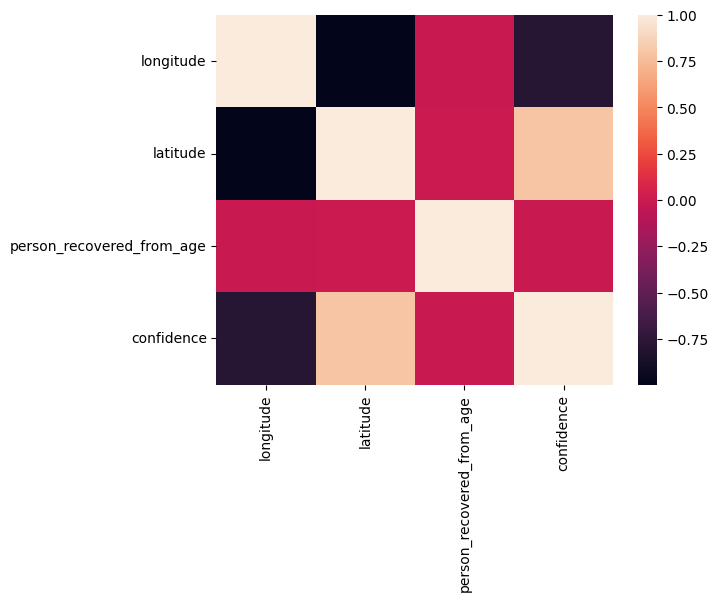

In [148]:
sns.heatmap(matrix)
plt.savefig('./CompiledImages/correlation_heatmap.png')

## Looking at the incident categories

In [149]:
firearm_data_category = firearm_data[['ucr_category', 'incident_number']]

In [150]:
firearm_data_category = firearm_data_category.groupby(['ucr_category']).count()
firearm_data_category.columns = ["count_of_incidents"]
firearm_data_category_csv = firearm_data_category
firearm_data_category_csv.to_csv('./Datasets/firearm_data_category.csv')

In [151]:
firearm_data_category

count_of_incidents
ucr_category                              
Accidental_Shooting                     62
Aggravated_Assault                    1542
All_Other_Offenses                      91
Auto_Theft                              23
Bribery                                 14
Burglary                               265
Counterfeiting                          71
Death_Investigation                     38
Disorderly_Conduct                       6
Family_Offenses                         35
Forcible_Fondling                        1
Forcible_Rape                            6
Fraud                                   18
Fraud_Credit_Card/Atm                    4
Fraud_Impersonation                      9
Homicide                               206
Injured_Person_Report                   19
Intimidation                           134
Justifiable_Homicide                    13
Kidnapping_Only                          6
Liquor_Law_Viol                          2
Narcotics                             2150
Narcotics_Equip                         31
Negligent_Homicide                       1
Promoting_Prostitution                   1
Prostitution                             1
Purse_Snatch                             1
Robbery                                536
Shoplifting                             22
Simple_Assault                         117
Sodomy_Force                             3
Stolen_Property                        683
Suicide                                380
Theft_Fr_Bldg                            1
Theft_Fr_Veh                            30
Theft_Fr_Vend_Machine                    1
Theft_Mv_Parts                           1
Theft_Other                            109
Vandalism                               50
Wpns_Law_Violation                    4511

<Axes: >

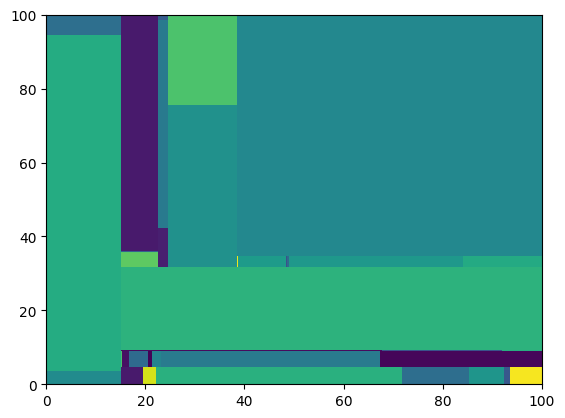

In [152]:
sq.plot(firearm_data_category['count_of_incidents'])

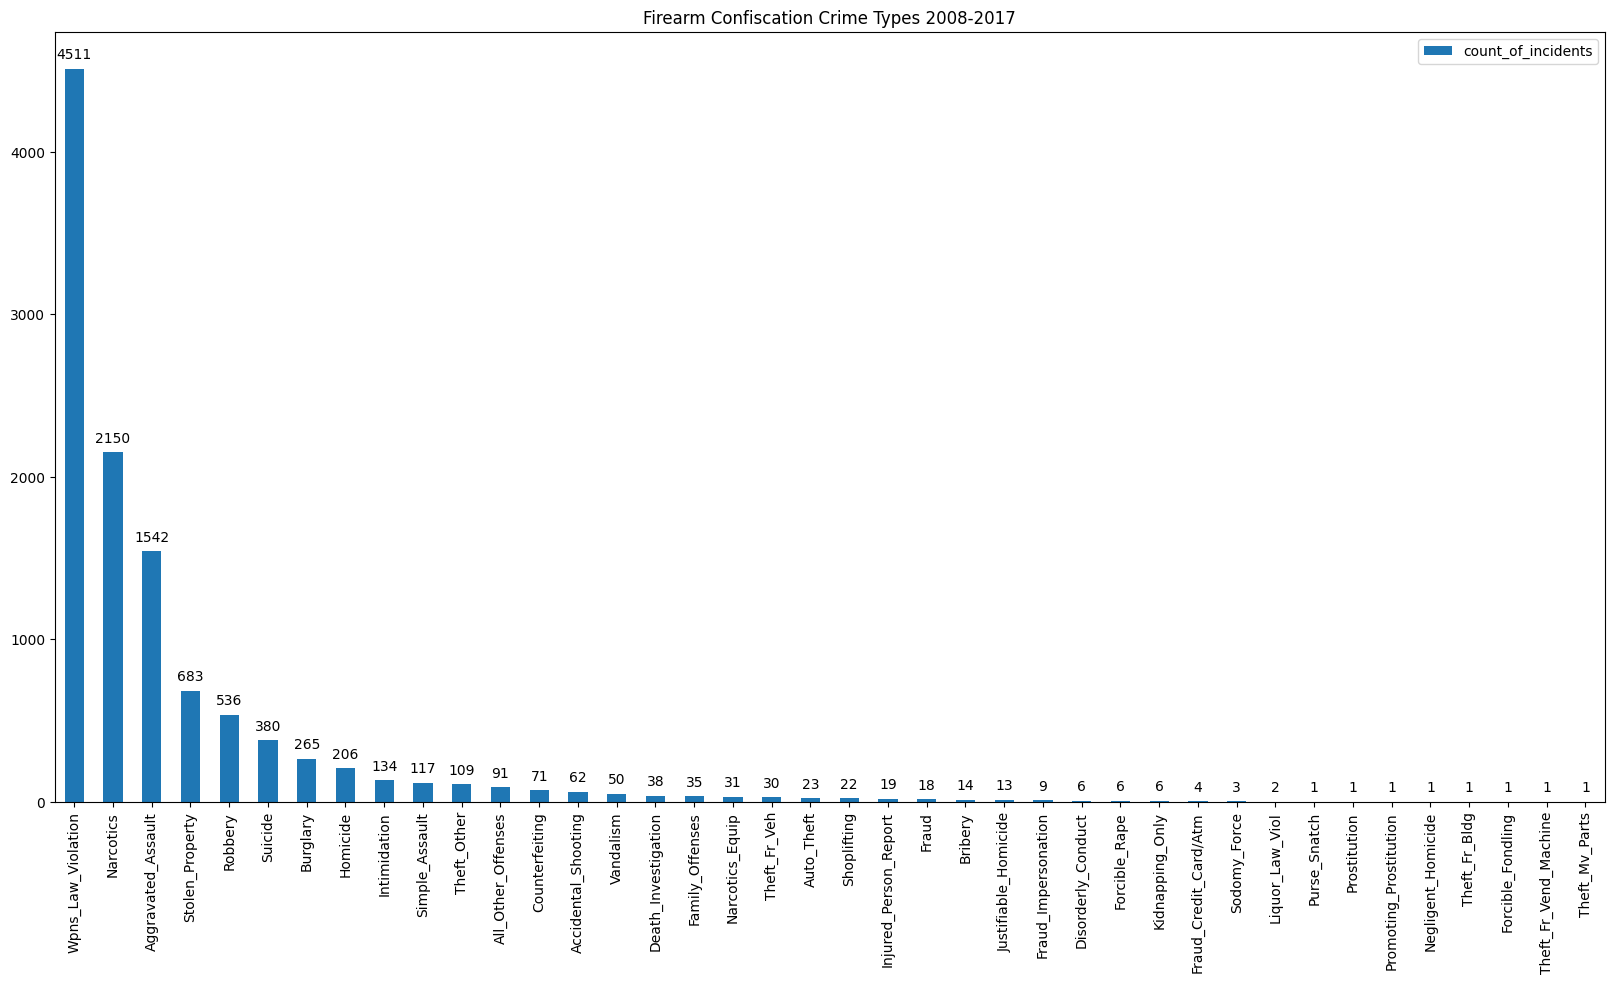

In [153]:
ax1 = firearm_data_category.sort_values(by=['count_of_incidents'], ascending = False).plot(kind='bar', xlabel='', title='Firearm Confiscation Crime Types 2008-2017', figsize = (20,10))
for p in ax1.patches:
    ax1.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
legend = plt.legend()
legend.get_texts()[0].set_text('count_of_incidents')
plt.savefig('./CompiledImages/firearm_recovery_crime_category.png')

### Incident Categories Log

In [154]:
firearm_data_category_log = firearm_data_category
firearm_data_category_log['log_scale'] = np.log(firearm_data_category_log['count_of_incidents'])

In [155]:
firearm_data_category_log

count_of_incidents  log_scale
ucr_category                                         
Accidental_Shooting                     62   4.127134
Aggravated_Assault                    1542   7.340836
All_Other_Offenses                      91   4.510860
Auto_Theft                              23   3.135494
Bribery                                 14   2.639057
Burglary                               265   5.579730
Counterfeiting                          71   4.262680
Death_Investigation                     38   3.637586
Disorderly_Conduct                       6   1.791759
Family_Offenses                         35   3.555348
Forcible_Fondling                        1   0.000000
Forcible_Rape                            6   1.791759
Fraud                                   18   2.890372
Fraud_Credit_Card/Atm                    4   1.386294
Fraud_Impersonation                      9   2.197225
Homicide                               206   5.327876
Injured_Person_Report                   19   2.944439
Intimidation                           134   4.897840
Justifiable_Homicide                    13   2.564949
Kidnapping_Only                          6   1.791759
Liquor_Law_Viol                          2   0.693147
Narcotics                             2150   7.673223
Narcotics_Equip                         31   3.433987
Negligent_Homicide                       1   0.000000
Promoting_Prostitution                   1   0.000000
Prostitution                             1   0.000000
Purse_Snatch                             1   0.000000
Robbery                                536   6.284134
Shoplifting                             22   3.091042
Simple_Assault                         117   4.762174
Sodomy_Force                             3   1.098612
Stolen_Property                        683   6.526495
Suicide                                380   5.940171
Theft_Fr_Bldg                            1   0.000000
Theft_Fr_Veh                            30   3.401197
Theft_Fr_Vend_Machine                    1   0.000000
Theft_Mv_Parts                           1   0.000000
Theft_Other                            109   4.691348
Vandalism                               50   3.912023
Wpns_Law_Violation                    4511   8.414274

In [156]:
null_values_dropped = firearm_data_category_log[firearm_data_category_log['log_scale'] != 0]

In [157]:
null_values_dropped

count_of_incidents  log_scale
ucr_category                                        
Accidental_Shooting                    62   4.127134
Aggravated_Assault                   1542   7.340836
All_Other_Offenses                     91   4.510860
Auto_Theft                             23   3.135494
Bribery                                14   2.639057
Burglary                              265   5.579730
Counterfeiting                         71   4.262680
Death_Investigation                    38   3.637586
Disorderly_Conduct                      6   1.791759
Family_Offenses                        35   3.555348
Forcible_Rape                           6   1.791759
Fraud                                  18   2.890372
Fraud_Credit_Card/Atm                   4   1.386294
Fraud_Impersonation                     9   2.197225
Homicide                              206   5.327876
Injured_Person_Report                  19   2.944439
Intimidation                          134   4.897840
Justifiable_Homicide                   13   2.564949
Kidnapping_Only                         6   1.791759
Liquor_Law_Viol                         2   0.693147
Narcotics                            2150   7.673223
Narcotics_Equip                        31   3.433987
Robbery                               536   6.284134
Shoplifting                            22   3.091042
Simple_Assault                        117   4.762174
Sodomy_Force                            3   1.098612
Stolen_Property                       683   6.526495
Suicide                               380   5.940171
Theft_Fr_Veh                           30   3.401197
Theft_Other                           109   4.691348
Vandalism                              50   3.912023
Wpns_Law_Violation                   4511   8.414274

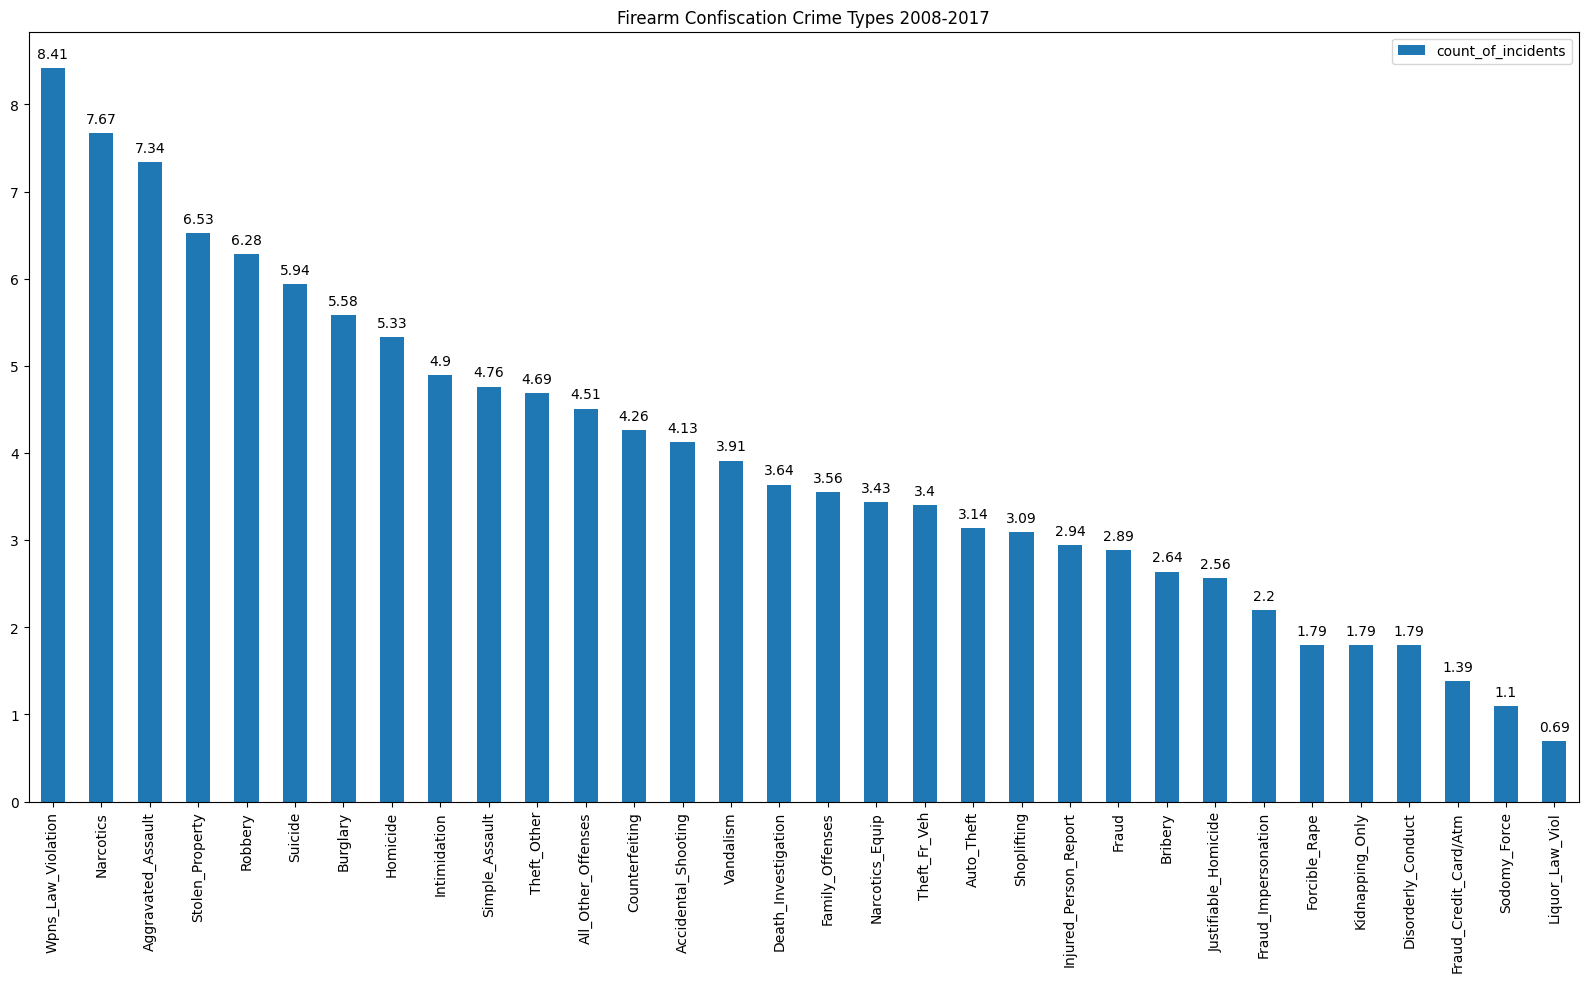

In [158]:
ax14 = null_values_dropped['log_scale'].sort_values(ascending = False).plot(kind='bar', xlabel='', title='Firearm Confiscation Crime Types 2008-2017', figsize = (20,10))
for p in ax14.patches:
    ax14.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
legend = plt.legend()
legend.get_texts()[0].set_text('count_of_incidents')
plt.savefig('./CompiledImages/firearm_recovery_crime_category.png')

## Looking at the gun categories

In [159]:
firearm_data_firearms = firearm_data[['firearm_category', 'firearm_subcategory']]
firearm_data_firearms['count_of_subcategory'] = firearm_data_firearms['firearm_subcategory']

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\2694931480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data_firearms['count_of_subcategory'] = firearm_data_firearms['firearm_subcategory']


In [160]:
firearm_data_firearms_grouped = firearm_data_firearms.groupby([firearm_data_firearms['firearm_category'], firearm_data_firearms['firearm_subcategory']]).count()

In [161]:
firearm_data_firearms_grouped

count_of_subcategory
firearm_category firearm_subcategory                      
Pistol           Bolt_Action                             6
                 Derringer                              95
                 Flintlock                               1
                 Jet_Propelled                           8
                 Percussion                              2
                 Revolver                             1747
                 Semi-Automatic                       6220
                 Single-Shot                            33
Rifle            Automatic                              20
                 Bolt_Action                           168
                 Carbine                                20
                 Flintlock                               9
                 Lever_Action                           67
                 Percussion                             22
                 Pump_Action                            22
                 Semi-Automatic                        393
                 Single-Shot                           115
Shotgun          Bolt_Action                            37
                 Double_Barrel                          35
                 Over_And_Under                          6
                 Pump_Action                           370
                 Semi-Automatic                         55
                 Single-Shot                           196

#### Log Values

In [162]:
firearm_data_firearm_grouped_log = firearm_data_firearms_grouped
firearm_data_firearm_grouped_log['log_scale'] = np.log(firearm_data_firearm_grouped_log)

In [163]:
firearm_data_firearm_grouped_log

count_of_subcategory  log_scale
firearm_category firearm_subcategory                                 
Pistol           Bolt_Action                             6   1.791759
                 Derringer                              95   4.553877
                 Flintlock                               1   0.000000
                 Jet_Propelled                           8   2.079442
                 Percussion                              2   0.693147
                 Revolver                             1747   7.465655
                 Semi-Automatic                       6220   8.735525
                 Single-Shot                            33   3.496508
Rifle            Automatic                              20   2.995732
                 Bolt_Action                           168   5.123964
                 Carbine                                20   2.995732
                 Flintlock                               9   2.197225
                 Lever_Action                           67   4.204693
                 Percussion                             22   3.091042
                 Pump_Action                            22   3.091042
                 Semi-Automatic                        393   5.973810
                 Single-Shot                           115   4.744932
Shotgun          Bolt_Action                            37   3.610918
                 Double_Barrel                          35   3.555348
                 Over_And_Under                          6   1.791759
                 Pump_Action                           370   5.913503
                 Semi-Automatic                         55   4.007333
                 Single-Shot                           196   5.278115

In [164]:
data_sorted_guntype = firearm_data_firearms_grouped.sort_values(by=['count_of_subcategory']).head(15)

In [165]:
data_sorted_guntype

count_of_subcategory  log_scale
firearm_category firearm_subcategory                                 
Pistol           Flintlock                               1   0.000000
                 Percussion                              2   0.693147
                 Bolt_Action                             6   1.791759
Shotgun          Over_And_Under                          6   1.791759
Pistol           Jet_Propelled                           8   2.079442
Rifle            Flintlock                               9   2.197225
                 Automatic                              20   2.995732
                 Carbine                                20   2.995732
                 Pump_Action                            22   3.091042
                 Percussion                             22   3.091042
Pistol           Single-Shot                            33   3.496508
Shotgun          Double_Barrel                          35   3.555348
                 Bolt_Action                            37   3.610918
                 Semi-Automatic                         55   4.007333
Rifle            Lever_Action                           67   4.204693

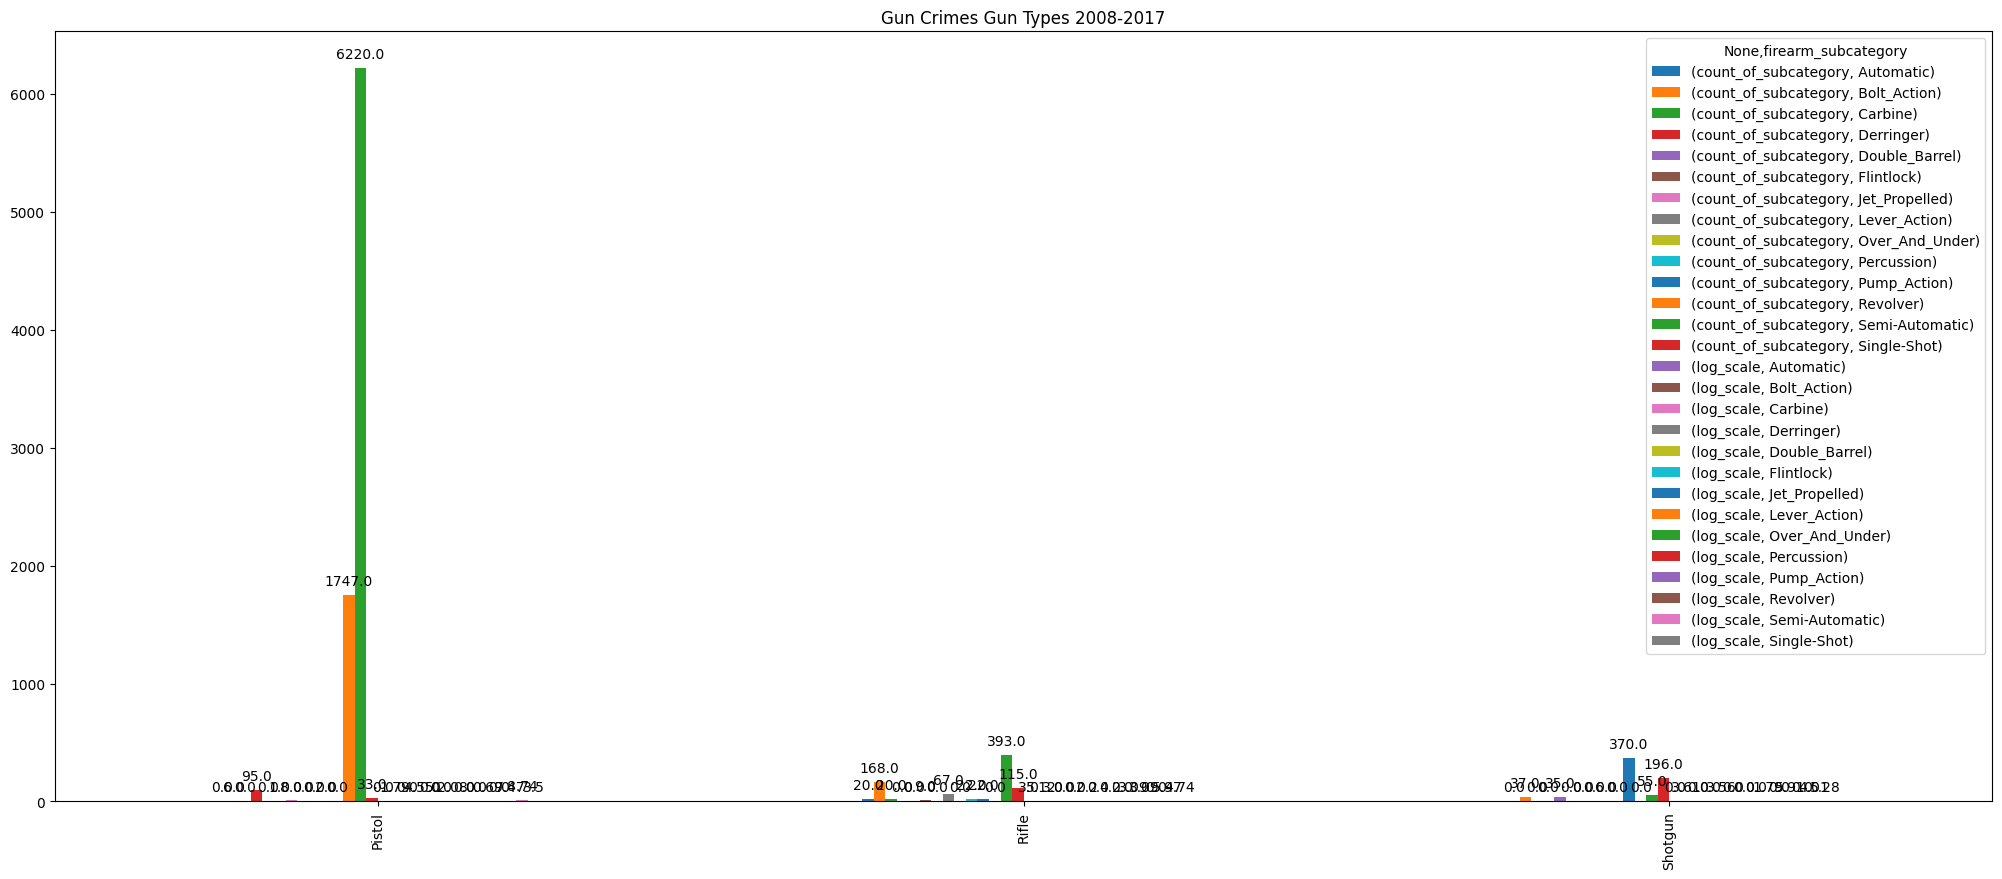

In [166]:
ax8 = firearm_data_firearms_grouped.unstack().plot(kind='bar', xlabel='', title='Gun Crimes Gun Types 2008-2017', figsize = (25,10))
for p in ax8.patches:
    ax8.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('./CompiledImages/firearm_unstacked.png')

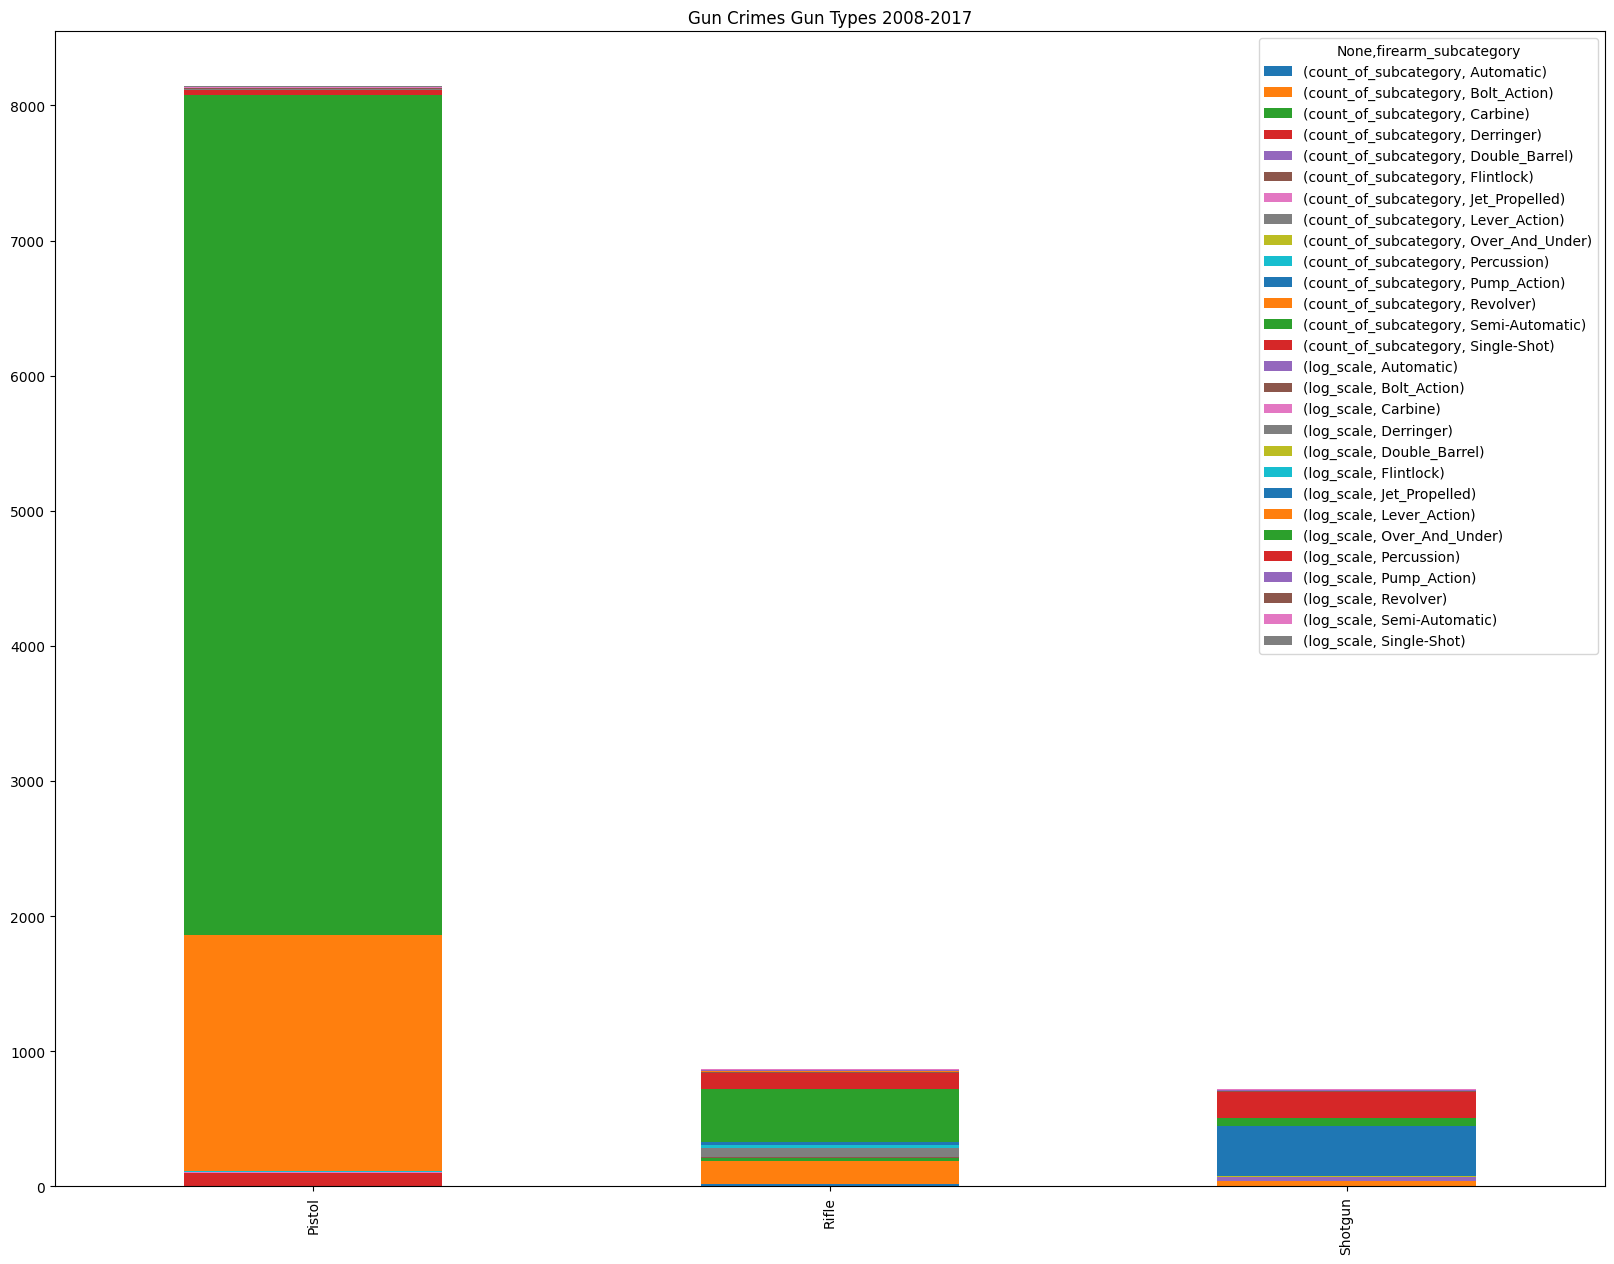

In [167]:
ax9 = firearm_data_firearms_grouped.unstack().plot(kind='bar', xlabel='', title='Gun Crimes Gun Types 2008-2017', figsize = (20,15), stacked = True)
plt.savefig('./CompiledImages/firearm_stacked.png')

In [168]:
firearm_data_firearms_subcategory = firearm_data_firearms_grouped.reset_index('firearm_category')

In [169]:
firearm_data_firearms_subcategory = firearm_data_firearms_subcategory.sort_values(by=['count_of_subcategory'], ascending = False)

In [170]:
firearm_data_firearms_subcategory

firearm_category  count_of_subcategory  log_scale
firearm_subcategory                                                  
Semi-Automatic                Pistol                  6220   8.735525
Revolver                      Pistol                  1747   7.465655
Semi-Automatic                 Rifle                   393   5.973810
Pump_Action                  Shotgun                   370   5.913503
Single-Shot                  Shotgun                   196   5.278115
Bolt_Action                    Rifle                   168   5.123964
Single-Shot                    Rifle                   115   4.744932
Derringer                     Pistol                    95   4.553877
Lever_Action                   Rifle                    67   4.204693
Semi-Automatic               Shotgun                    55   4.007333
Bolt_Action                  Shotgun                    37   3.610918
Double_Barrel                Shotgun                    35   3.555348
Single-Shot                   Pistol                    33   3.496508
Percussion                     Rifle                    22   3.091042
Pump_Action                    Rifle                    22   3.091042
Carbine                        Rifle                    20   2.995732
Automatic                      Rifle                    20   2.995732
Flintlock                      Rifle                     9   2.197225
Jet_Propelled                 Pistol                     8   2.079442
Over_And_Under               Shotgun                     6   1.791759
Bolt_Action                   Pistol                     6   1.791759
Percussion                    Pistol                     2   0.693147
Flintlock                     Pistol                     1   0.000000

In [171]:
colors = {"Pistol" : "plum", "Rifle" : "gold", "Shotgun" : "r"}

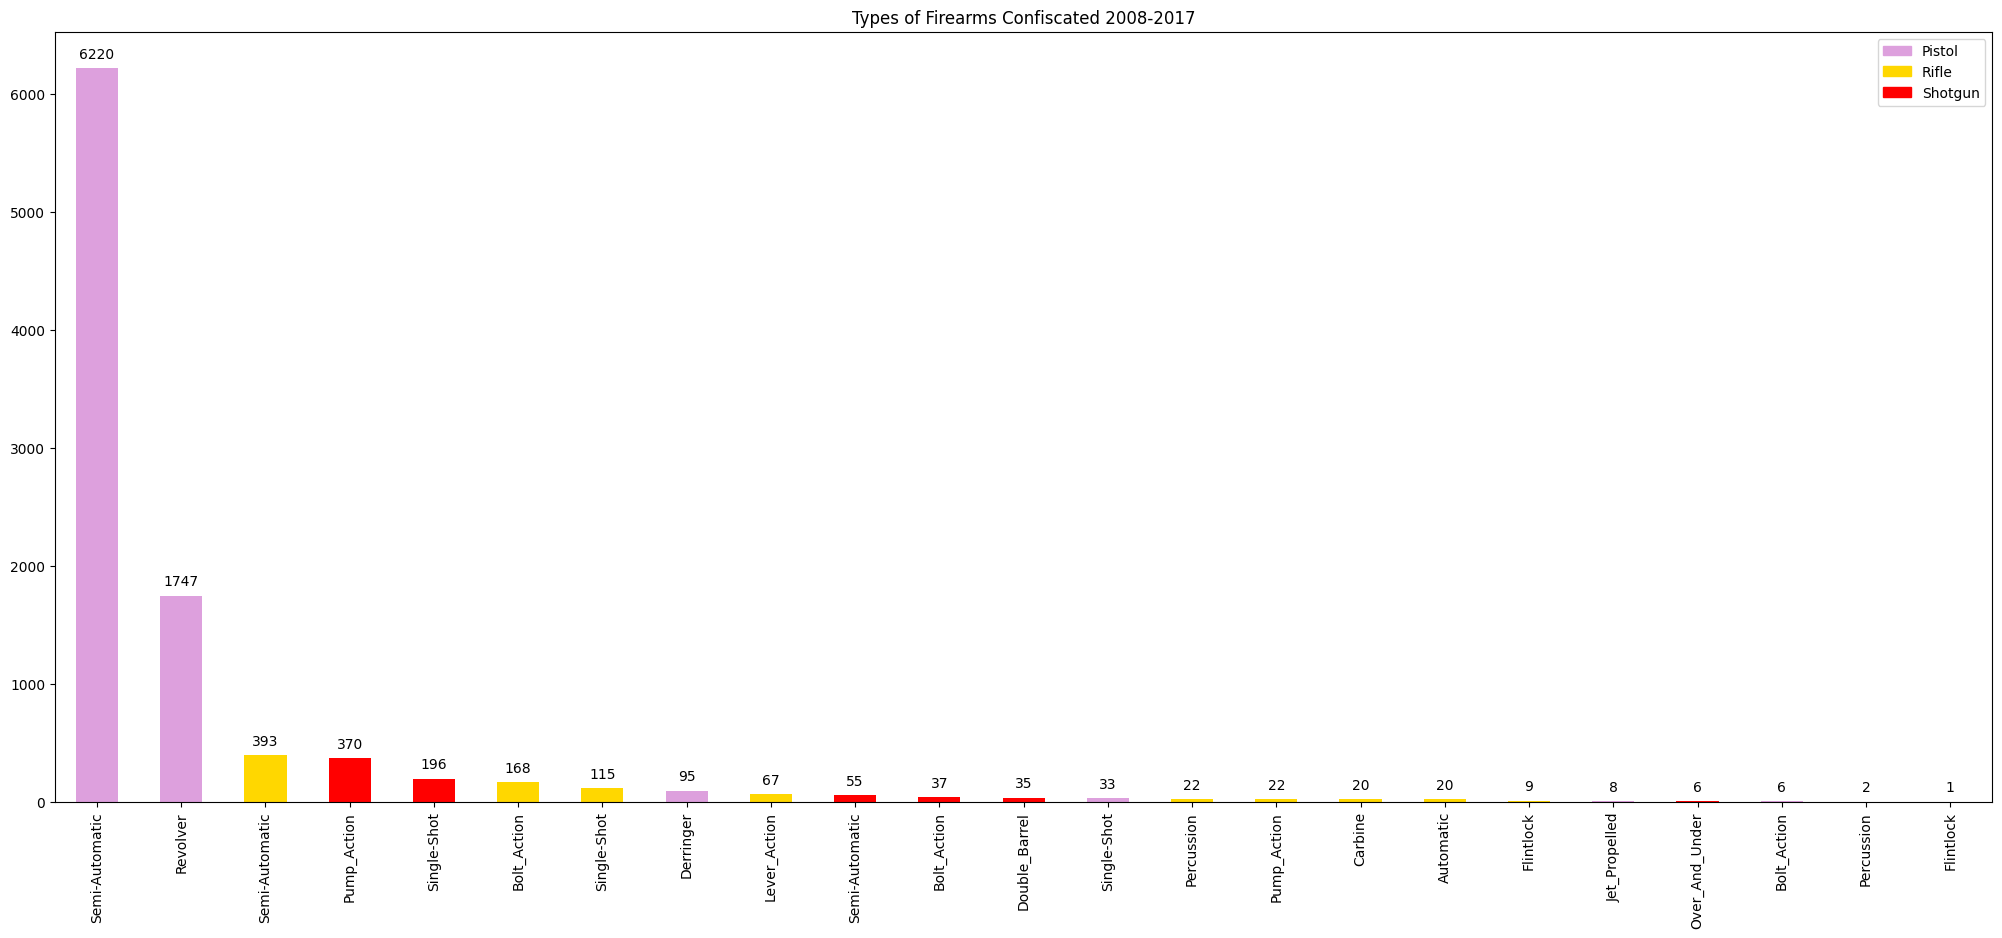

In [172]:
ax2 = firearm_data_firearms_subcategory['count_of_subcategory'].plot(kind='bar', xlabel='', title='Types of Firearms Confiscated 2008-2017', figsize = (25,10), color = firearm_data_firearms_subcategory['firearm_category'].replace(colors))
for p in ax2.patches:
    ax2.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
pistol_label = mpatch.Patch(color = 'plum', label = "Pistol")
rifle_label = mpatch.Patch(color = 'gold', label = "Rifle")
shotgun_label = mpatch.Patch(color = 'r', label = "Shotgun")
plt.legend(handles=[pistol_label, rifle_label, shotgun_label], loc = 1)
plt.savefig('./CompiledImages/count_firearm_type.png')

#### Log Values

In [173]:
print(firearm_data_firearms_grouped)
firearm_data_firearm_grouped_log = firearm_data_firearms_grouped
print(firearm_data_firearm_grouped_log)

firearm_data_firearm_grouped_log = firearm_data_firearms_grouped.copy()
print(firearm_data_firearm_grouped_log)
# np.shape(firearm_data_firearms_grouped)
# firearm_data_firearm_grouped_log['log_scale'] = 
# print(np.log(firearm_data_firearm_grouped_log))

                                      count_of_subcategory  log_scale
firearm_category firearm_subcategory                                 
Pistol           Bolt_Action                             6   1.791759
                 Derringer                              95   4.553877
                 Flintlock                               1   0.000000
                 Jet_Propelled                           8   2.079442
                 Percussion                              2   0.693147
                 Revolver                             1747   7.465655
                 Semi-Automatic                       6220   8.735525
                 Single-Shot                            33   3.496508
Rifle            Automatic                              20   2.995732
                 Bolt_Action                           168   5.123964
                 Carbine                                20   2.995732
                 Flintlock                               9   2.197225
                 Lev

In [174]:
firearm_data_firearm_grouped_log

count_of_subcategory  log_scale
firearm_category firearm_subcategory                                 
Pistol           Bolt_Action                             6   1.791759
                 Derringer                              95   4.553877
                 Flintlock                               1   0.000000
                 Jet_Propelled                           8   2.079442
                 Percussion                              2   0.693147
                 Revolver                             1747   7.465655
                 Semi-Automatic                       6220   8.735525
                 Single-Shot                            33   3.496508
Rifle            Automatic                              20   2.995732
                 Bolt_Action                           168   5.123964
                 Carbine                                20   2.995732
                 Flintlock                               9   2.197225
                 Lever_Action                           67   4.204693
                 Percussion                             22   3.091042
                 Pump_Action                            22   3.091042
                 Semi-Automatic                        393   5.973810
                 Single-Shot                           115   4.744932
Shotgun          Bolt_Action                            37   3.610918
                 Double_Barrel                          35   3.555348
                 Over_And_Under                          6   1.791759
                 Pump_Action                           370   5.913503
                 Semi-Automatic                         55   4.007333
                 Single-Shot                           196   5.278115

In [175]:
value_firearm_grouped_log = firearm_data_firearm_grouped_log[firearm_data_firearm_grouped_log['log_scale'] != 0]

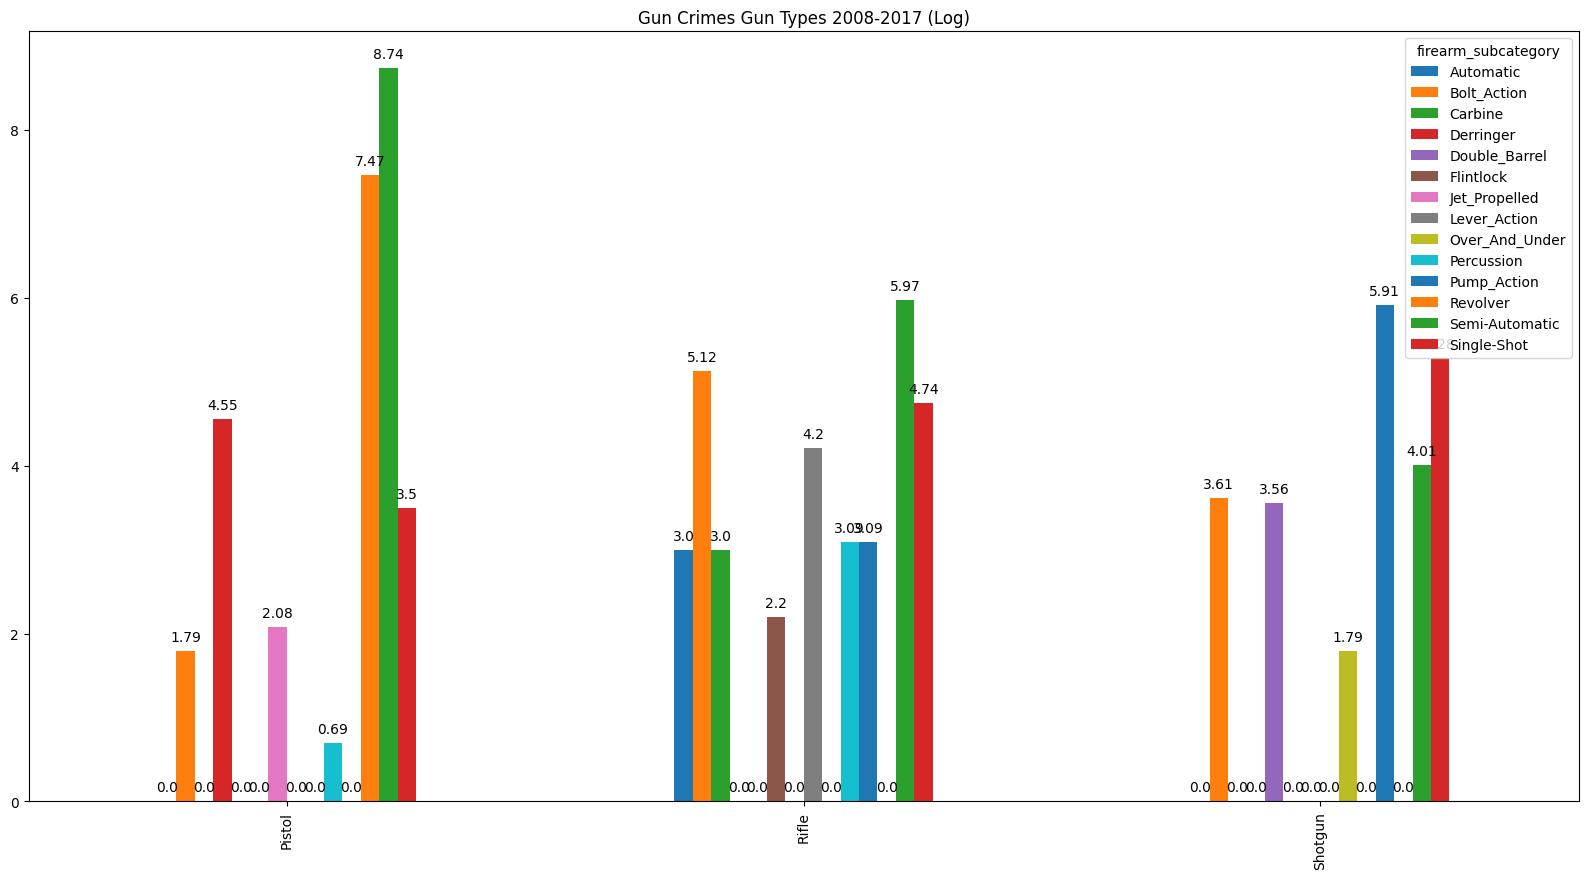

In [176]:
ax15 = value_firearm_grouped_log['log_scale'].unstack().plot(kind='bar', xlabel='', title='Gun Crimes Gun Types 2008-2017 (Log)', figsize = (20,10))
for p in ax15.patches:
    ax15.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('./CompiledImages/unstacked_gun_crime_types_log')

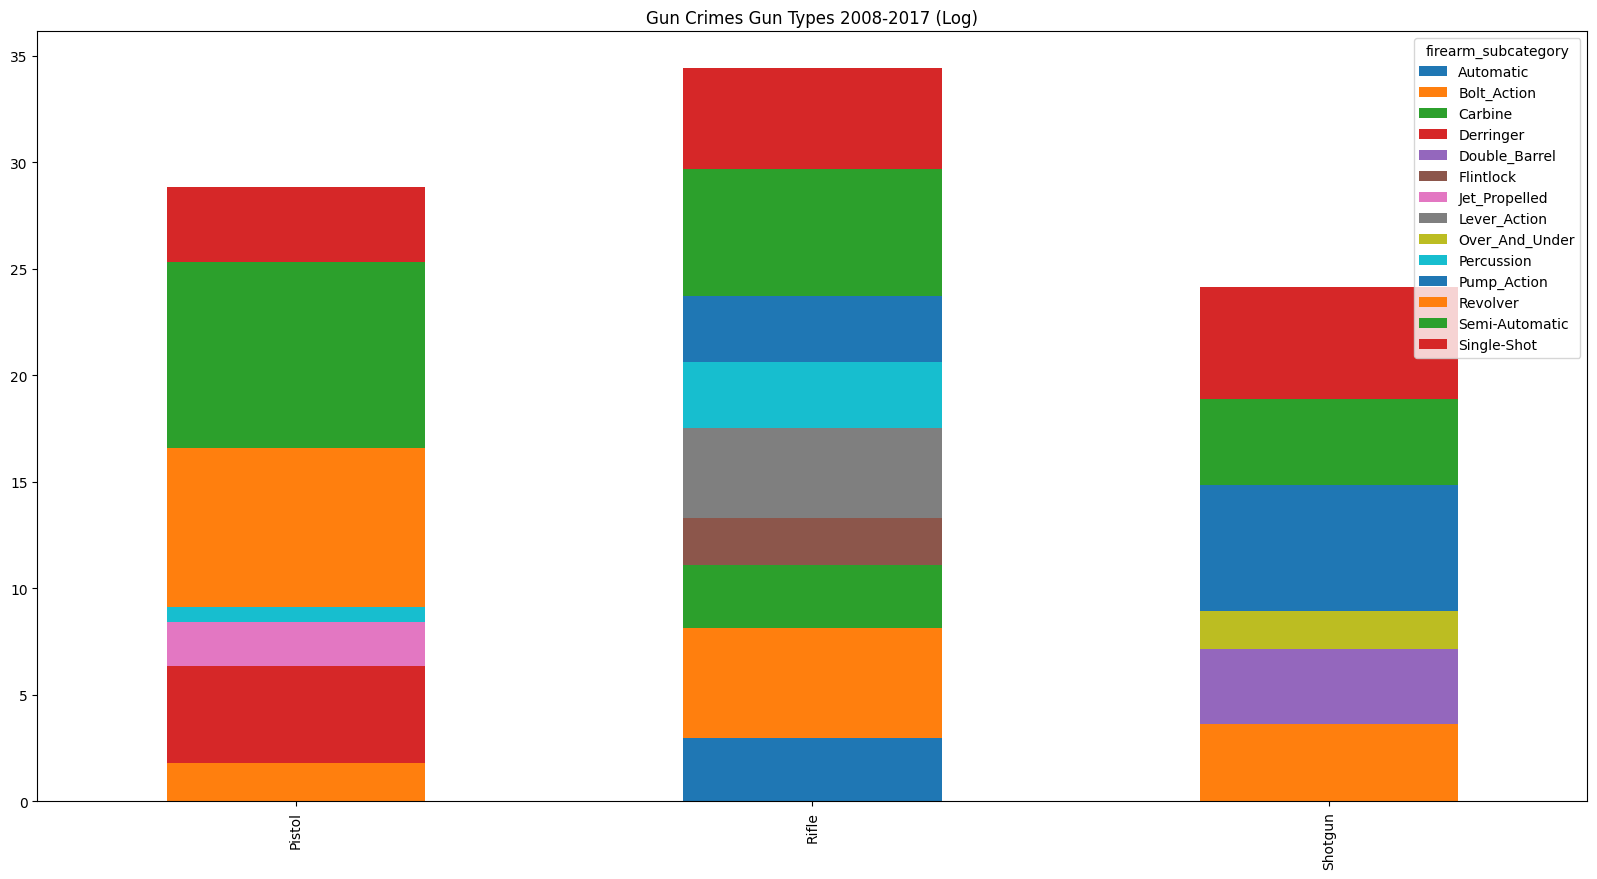

In [177]:
ax16 = value_firearm_grouped_log['log_scale'].unstack().plot(kind='bar', xlabel='', title='Gun Crimes Gun Types 2008-2017 (Log)', figsize = (20,10), stacked = True)
plt.savefig('./CompiledImages/stacked_gun_crime_types_log')

In [178]:
firearm_data_subcategory_log = firearm_data_firearm_grouped_log.reset_index('firearm_category')

In [179]:
firearm_data_subcategory_log = firearm_data_subcategory_log.sort_values(by=['count_of_subcategory'], ascending = False)
firearm_data_subcategory_log = firearm_data_subcategory_log[firearm_data_subcategory_log['log_scale'] != 0]

In [180]:
firearm_data_subcategory_log

firearm_category  count_of_subcategory  log_scale
firearm_subcategory                                                  
Semi-Automatic                Pistol                  6220   8.735525
Revolver                      Pistol                  1747   7.465655
Semi-Automatic                 Rifle                   393   5.973810
Pump_Action                  Shotgun                   370   5.913503
Single-Shot                  Shotgun                   196   5.278115
Bolt_Action                    Rifle                   168   5.123964
Single-Shot                    Rifle                   115   4.744932
Derringer                     Pistol                    95   4.553877
Lever_Action                   Rifle                    67   4.204693
Semi-Automatic               Shotgun                    55   4.007333
Bolt_Action                  Shotgun                    37   3.610918
Double_Barrel                Shotgun                    35   3.555348
Single-Shot                   Pistol                    33   3.496508
Percussion                     Rifle                    22   3.091042
Pump_Action                    Rifle                    22   3.091042
Carbine                        Rifle                    20   2.995732
Automatic                      Rifle                    20   2.995732
Flintlock                      Rifle                     9   2.197225
Jet_Propelled                 Pistol                     8   2.079442
Over_And_Under               Shotgun                     6   1.791759
Bolt_Action                   Pistol                     6   1.791759
Percussion                    Pistol                     2   0.693147

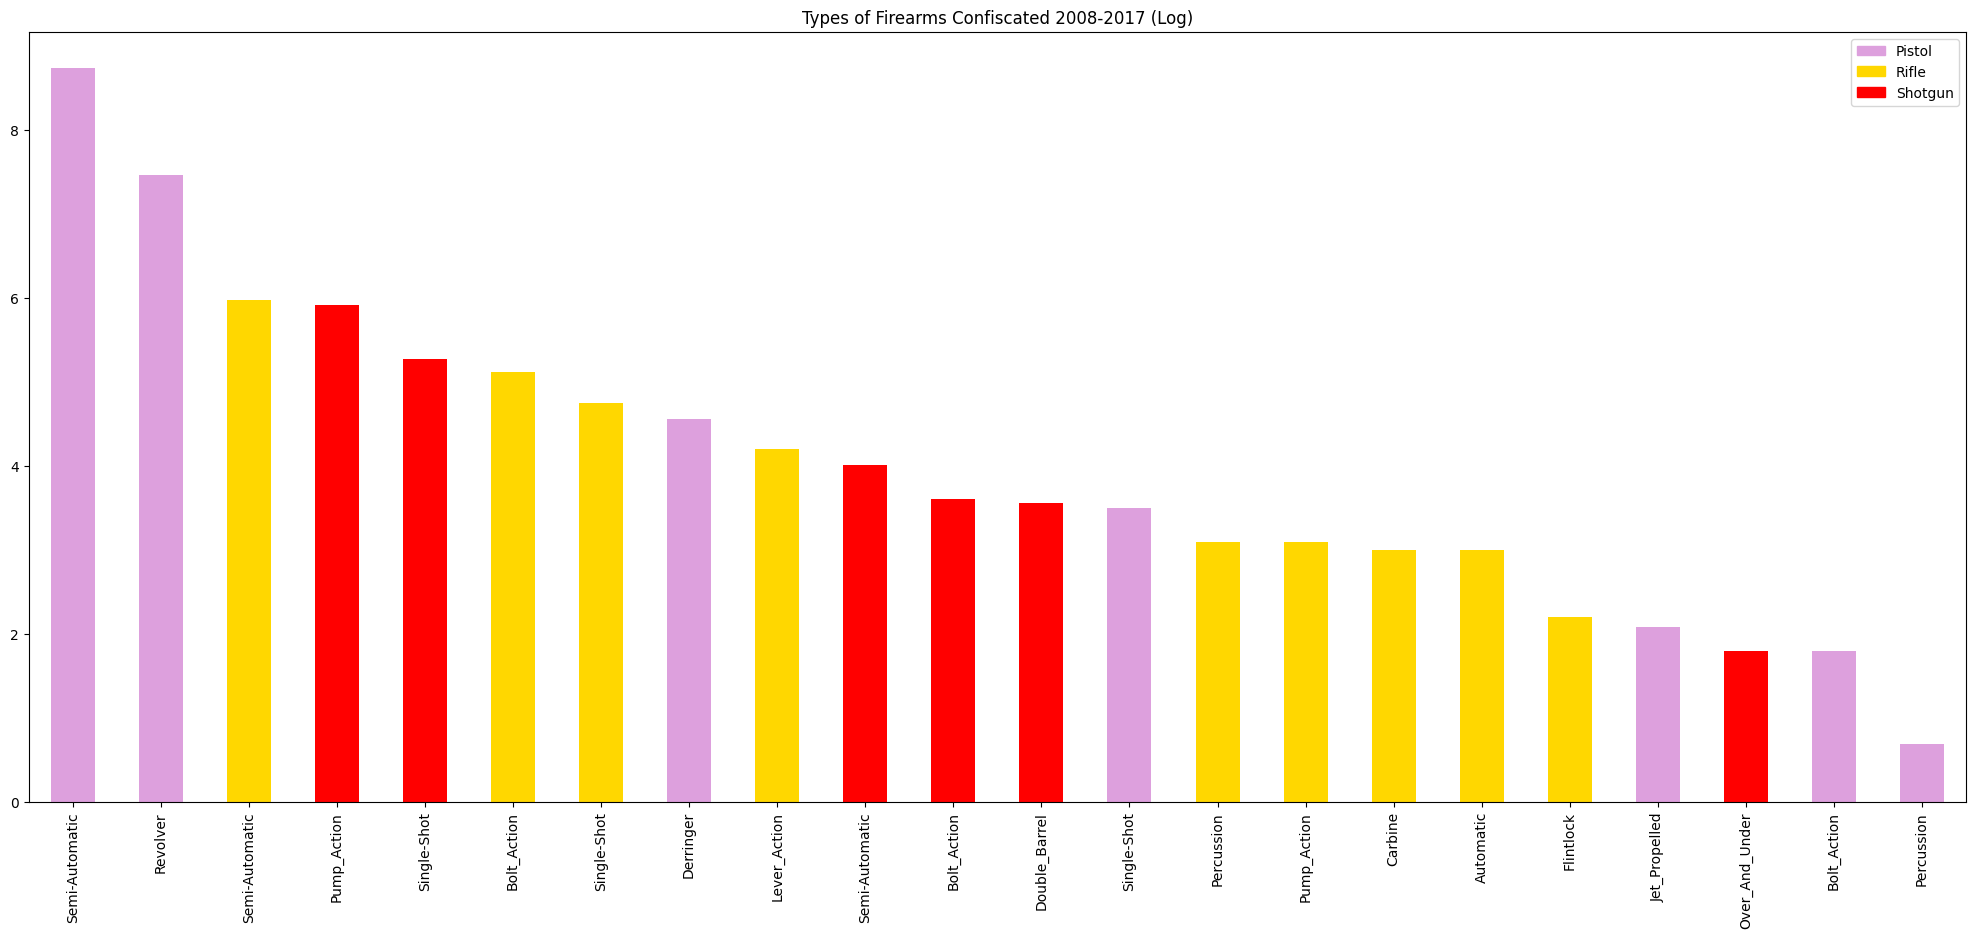

In [181]:
ax17 = firearm_data_subcategory_log['log_scale'].plot(kind='bar', xlabel='', title='Types of Firearms Confiscated 2008-2017 (Log)', figsize = (25,10), color = firearm_data_subcategory_log['firearm_category'].replace(colors))
for p in ax2.patches:
    ax2.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
pistol_label = mpatch.Patch(color = 'plum', label = "Pistol")
rifle_label = mpatch.Patch(color = 'gold', label = "Rifle")
shotgun_label = mpatch.Patch(color = 'r', label = "Shotgun")
plt.legend(handles=[pistol_label, rifle_label, shotgun_label], loc = 1)
plt.savefig('./CompiledImages/count_firearm_type_log.png')

## Looking at the crimes in each zipcode

In [182]:
firearm_data_zipcode = firearm_data[['zipcode', 'incident_number']]

In [183]:
firearm_data_zipcode.columns = ['zipcode', 'count_of_incidents']

In [184]:
firearm_data_zipcode = firearm_data_zipcode.groupby(['zipcode']).count()

In [185]:
firearm_data_zipcode

count_of_incidents
zipcode                    
40023                    10
40056                     5
40058                     1
40059                     7
40118                   125
40165                     1
40177                     1
40202                  2194
40203                   871
40204                   216
40205                    72
40206                   218
40207                    37
40208                   327
40209                    34
40210                   647
40211                  1013
40212                   647
40213                   241
40214                   500
40215                   550
40216                   515
40217                   113
40218                   503
40219                   459
40220                   144
40222                    65
40223                    57
40225                     1
40228                    93
40229                   162
40241                   116
40242                    28
40243                    43
40245                    58
40258                   262
40272                   356
40291                   178
40299                    94
42259                     1
47130                     1

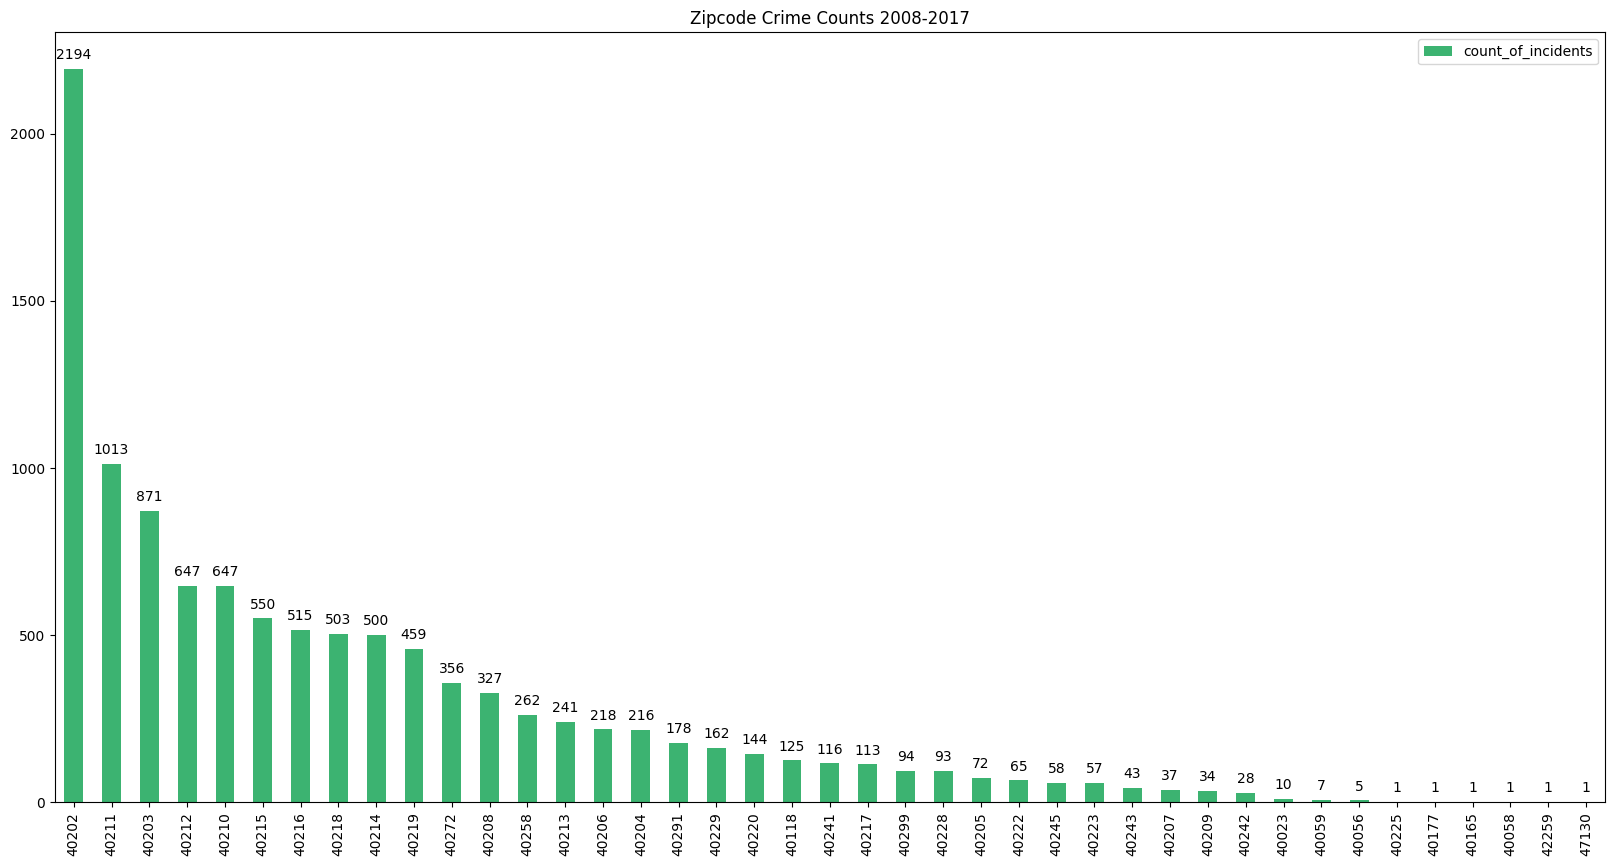

In [186]:
ax3 = firearm_data_zipcode.sort_values(by=['count_of_incidents'], ascending = False).plot(kind='bar', xlabel='', title='Zipcode Crime Counts 2008-2017', figsize = (20,10), color = 'mediumseagreen')
for p in ax3.patches:
    ax3.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
legend = plt.legend()
legend.get_texts()[0].set_text('count_of_incidents')
plt.savefig('./CompiledImages/firearm_crime_zipcode.png')

### Zipcode Log

In [187]:
firearm_data_zipcode_log = firearm_data_zipcode
firearm_data_zipcode_log['log_values'] = np.log(firearm_data_zipcode['count_of_incidents'])
firearm_data_zipcode_log = firearm_data_zipcode_log[firearm_data_zipcode_log['log_values']!= 0]

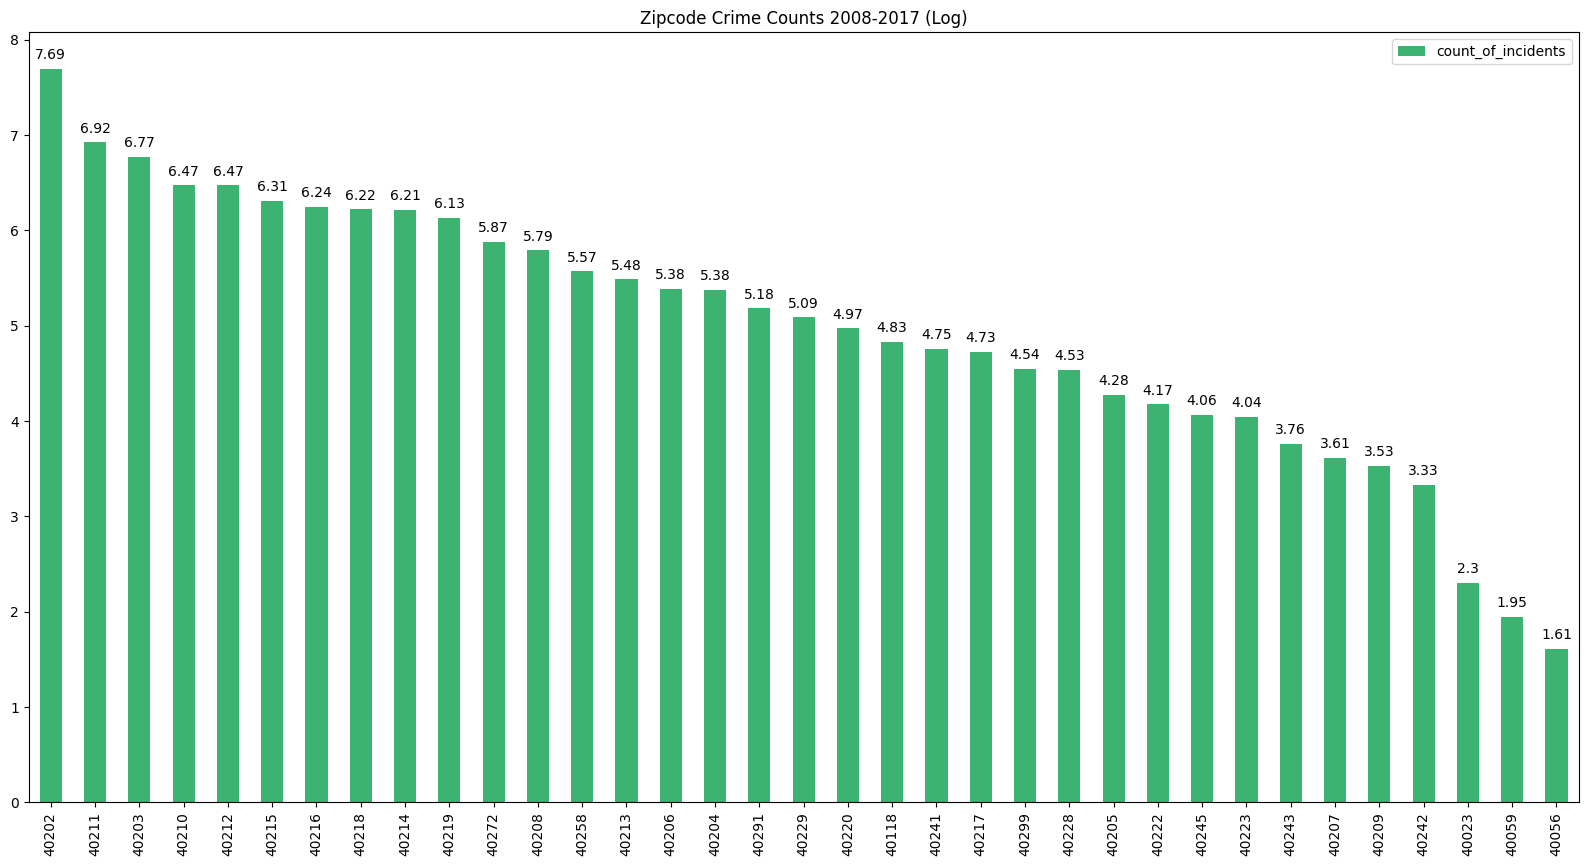

In [188]:
ax18 = firearm_data_zipcode_log['log_values'].sort_values(ascending = False).plot(kind='bar', xlabel='', title='Zipcode Crime Counts 2008-2017 (Log)', figsize = (20,10), color = 'mediumseagreen')
for p in ax18.patches:
    ax18.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
legend = plt.legend()
legend.get_texts()[0].set_text('count_of_incidents')
plt.savefig('./CompiledImages/firearm_crime_zipcode_log.png')

## Counts of Crime per Race

In [189]:
firearm_data_race = firearm_data[['person_recovered_from_race', 'incident_number']]
firearm_data_race.columns = ['person_recovered_from_race', 'number_of_incidents']

In [190]:
firearm_data_race = firearm_data_race.groupby(['person_recovered_from_race']).count()

In [191]:
firearm_data_race

number_of_incidents
person_recovered_from_race                     
Asian                                        32
Black                                      5759
Hispanic                                    153
Indian/Burmese_Indian                         2
Middle_Eastern                                6
Native_American                               5
White                                      3199

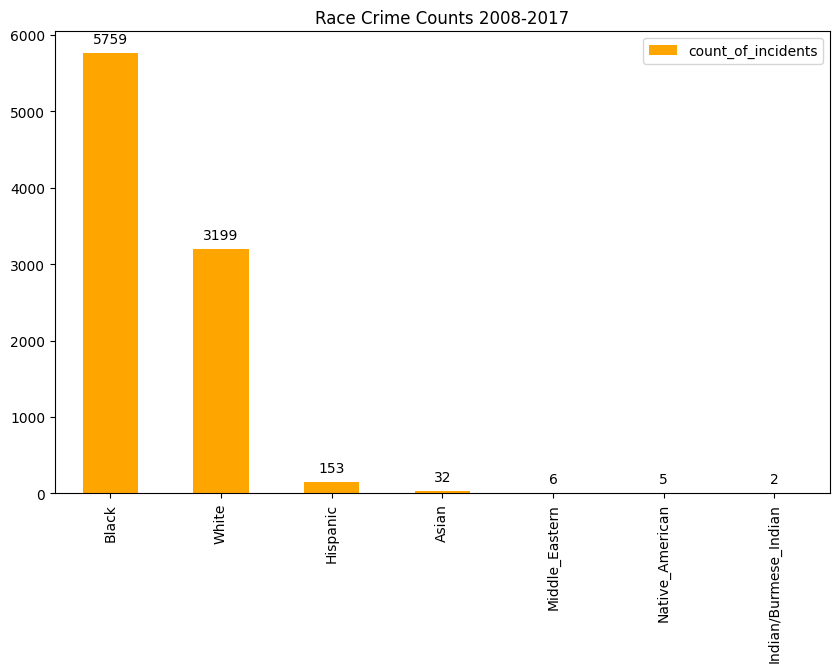

In [192]:
ax4 = firearm_data_race.sort_values(by=['number_of_incidents'], ascending = False).plot(kind='bar', xlabel='', title='Race Crime Counts 2008-2017', figsize = (10,6), color = 'orange')
for p in ax4.patches:
    ax4.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
legend = plt.legend()
legend.get_texts()[0].set_text('count_of_incidents')
plt.savefig('./CompiledImages/firearm_crime_race.png')

### Race Log

In [193]:
firearm_data_race_log = firearm_data_race
firearm_data_race_log['log_values'] = np.log(firearm_data_race['number_of_incidents'])
firearm_data_race_log = firearm_data_race_log[firearm_data_race_log['log_values']!= 0]

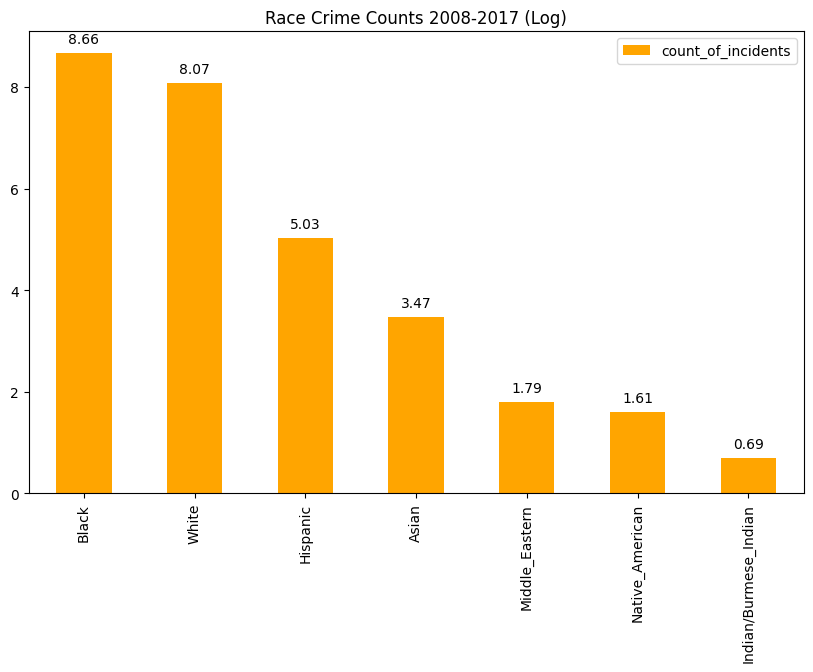

In [194]:
ax19 = firearm_data_race_log['log_values'].sort_values(ascending = False).plot(kind='bar', xlabel='', title='Race Crime Counts 2008-2017 (Log)', figsize = (10,6), color = 'orange')
for p in ax19.patches:
    ax19.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
legend = plt.legend()
legend.get_texts()[0].set_text('count_of_incidents')
plt.savefig('./CompiledImages/firearm_crime_race_log.png')

## Counts of Crime per Sex

In [195]:
firearm_data_sex = firearm_data[['person_recovered_from_sex', 'incident_number']]

In [196]:
firearm_data_sex = firearm_data_sex.groupby(['person_recovered_from_sex']).count()

In [197]:
firearm_data_sex

incident_number
person_recovered_from_sex                 
F                                      644
M                                     8552

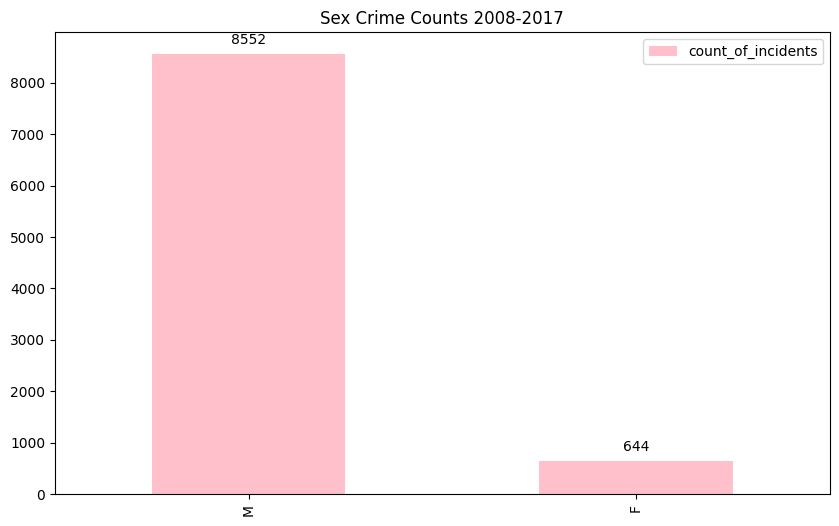

In [198]:
ax5 = firearm_data_sex.sort_values(by=['incident_number'], ascending = False).plot(kind='bar', xlabel='', title='Sex Crime Counts 2008-2017', figsize = (10,6), color = 'pink')
for p in ax5.patches:
    ax5.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
legend = plt.legend()
legend.get_texts()[0].set_text('count_of_incidents')
plt.savefig('./CompiledImages/firearm_crime_sex.png')

In [199]:
firearm_data

incident_number  year recovery_date        ucr_category  \
0        80-06-008380   NaN           NaT            Homicide   
1        80-06-108219  2014    2014-07-30            Burglary   
2        80-08-008343  2010    2010-01-20            Burglary   
3        80-08-047627  2012    2012-06-18  Aggravated_Assault   
4        80-08-091695  2008    2008-11-29        Theft_Fr_Veh   
...               ...   ...           ...                 ...   
23656    80-17-014921  2017    2017-02-21  Wpns_Law_Violation   
23657    80-17-014942  2017    2017-02-21           Narcotics   
23658    80-17-015000  2017    2017-02-21  Wpns_Law_Violation   
23659    80-17-015225  2017    2017-02-22  Wpns_Law_Violation   
23660    80-17-015302   NaN           NaT             Suicide   

      firearm_category firearm_subcategory   firearm_manufacturer  \
0                  NaN                 NaN                    NaN   
1                Rifle         Single-Shot    Marlin_Firearms_Co.   
2               Pistol      Semi-Automatic        Jennings_Firear   
3               Pistol      Semi-Automatic             Parabellum   
4               Pistol      Semi-Automatic                    Fie   
...                ...                 ...                    ...   
23656              NaN                 NaN            Glock,_Inc.   
23657           Pistol      Semi-Automatic  Cobra_Enterprises_Inc   
23658           Pistol      Semi-Automatic            Glock,_Inc.   
23659           Pistol      Semi-Automatic                  Ruger   
23660              NaN                 NaN                    NaN   

         firearm_model firearm_caliber address_geocode_type  ...  \
0                  NaN             NaN                  NaN  ...   
1      Modle_25_Series             NaN                BLOCK  ...   
2      Jennings_Firear            380C                BLOCK  ...   
3                  NaN             9MM                BLOCK  ...   
4                  E28             25C                BLOCK  ...   
...                ...             ...                  ...  ...   
23656  Model_31/31C_(3             NaN                BLOCK  ...   
23657        Ca_Series            380C                BLOCK  ...   
23658              NaN             45C                BLOCK  ...   
23659              NaN             9MM                  NaN  ...   
23660              NaN             NaN                  NaN  ...   

           street_address        city state zipcode  longitude   latitude  \
0                     NaN  Louisville    KY   40202   0.000000   0.000000   
1          4700_Haney_Way  Louisville    KY   40272 -85.850950  38.096623   
2        3400_Shagbark_Rd  Louisville    KY   40216 -85.843407  38.196532   
3          1700_W_Hill_St  Louisville    KY   40210 -85.784928  38.227766   
4           1000_Cladwell  Louisville    KY   40203 -85.757053  38.238555   
...                   ...         ...   ...     ...        ...        ...   
23656  600_W_Jefferson_St  Louisville    KY   40202 -85.761323  38.253961   
23657       4200_S_2nd_St  Louisville    KY   40214 -85.763628  38.195203   
23658       4500_S_6th_St  Louisville    KY   40214 -85.770469  38.188165   
23659                 NaN  Louisville    KY   40272        NaN        NaN   
23660                 NaN  Louisville    KY   40210   0.000000   0.000000   

       person_recovered_from_race person_recovered_from_sex  \
0                             NaN                       NaN   
1                           White                         M   
2                           Black                         M   
3                           Black                         M   
4                           White                         M   
...                           ...                       ...   
23656                       Black                         M   
23657                       Black                         F   
23658                       White                         M   
23659                   

## Counts of Crimes per Age

In [200]:
firearm_data_age = firearm_data[['person_recovered_from_age', 'incident_number']]

In [201]:
firearm_data_age = firearm_data_age.groupby(['person_recovered_from_age']).count()

In [202]:
firearm_data_age

incident_number
person_recovered_from_age                 
0.0                                      2
9.0                                      1
11.0                                     3
12.0                                     9
13.0                                    15
...                                    ...
80.0                                     1
82.0                                     1
83.0                                     3
85.0                                     1
87.0                                     4

[74 rows x 1 columns]

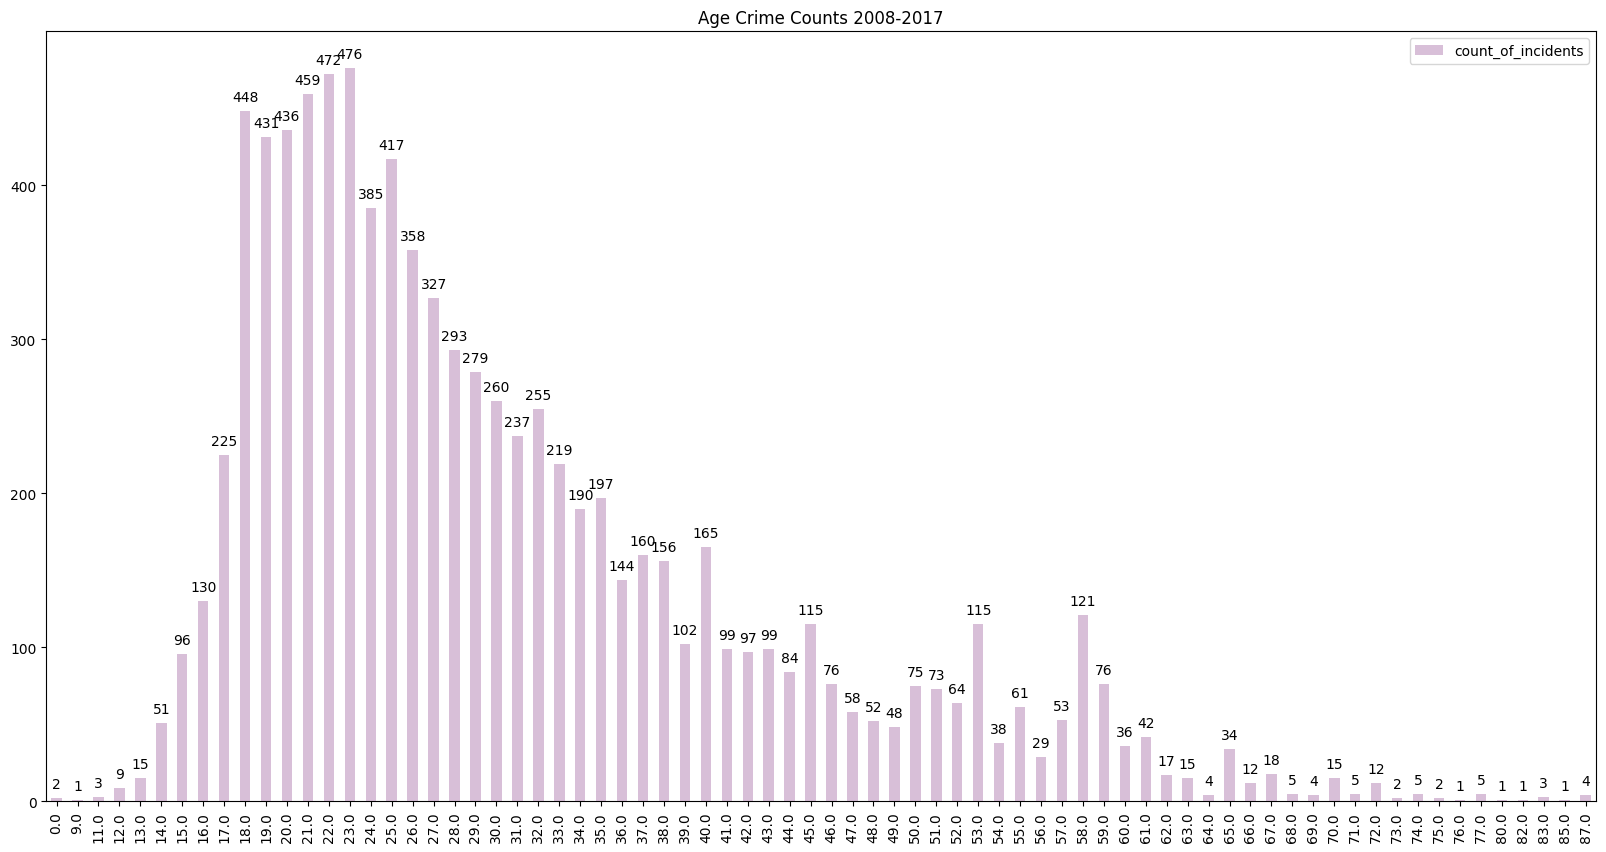

In [203]:
ax6 = firearm_data_age.plot(kind='bar', xlabel='', title='Age Crime Counts 2008-2017', figsize = (20,10), color = 'thistle')
for p in ax6.patches:
    ax6.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
legend = plt.legend()
legend.get_texts()[0].set_text('count_of_incidents')
plt.savefig('./CompiledImages/firearm_crime_age.png')

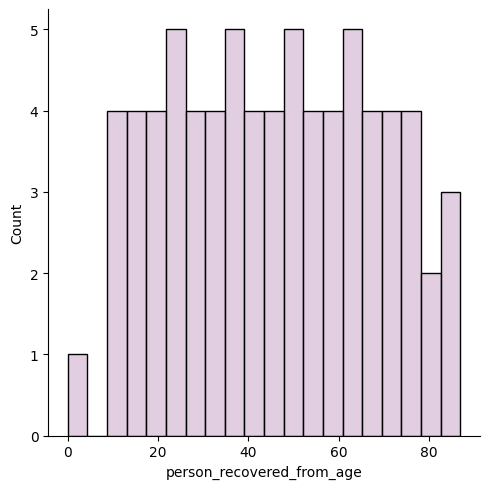

In [204]:
sns.displot(firearm_data_age.index, color='thistle', bins=20)

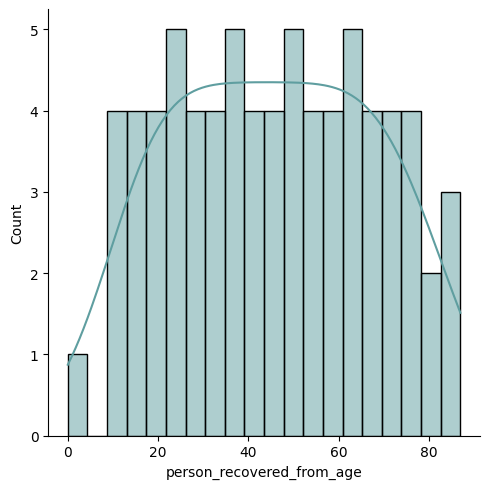

In [205]:
sns.displot(firearm_data_age.index, color='cadetblue', kde = True, bins = 20)
plt.savefig('./CompiledImages/age_density.png')

### Grouping Zipcode and Sex

In [206]:
firearm_data_zip_sex = firearm_data[['zipcode', 'person_recovered_from_sex']]
firearm_data_zip_sex['count_of_crimes'] = firearm_data_zip_sex['person_recovered_from_sex']

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\1706641718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data_zip_sex['count_of_crimes'] = firearm_data_zip_sex['person_recovered_from_sex']


In [207]:
firearm_data_zip_sex = firearm_data_zip_sex.groupby([firearm_data_zip_sex['zipcode'], firearm_data_zip_sex['person_recovered_from_sex']]).count()

In [208]:
firearm_data_zip_sex

count_of_crimes
zipcode person_recovered_from_sex                 
40023   M                                       10
40056   M                                        4
40059   M                                        4
40118   F                                        9
        M                                      101
...                                            ...
40272   M                                      277
40291   F                                       17
        M                                      121
40299   M                                       79
42259   M                                        1

[67 rows x 1 columns]

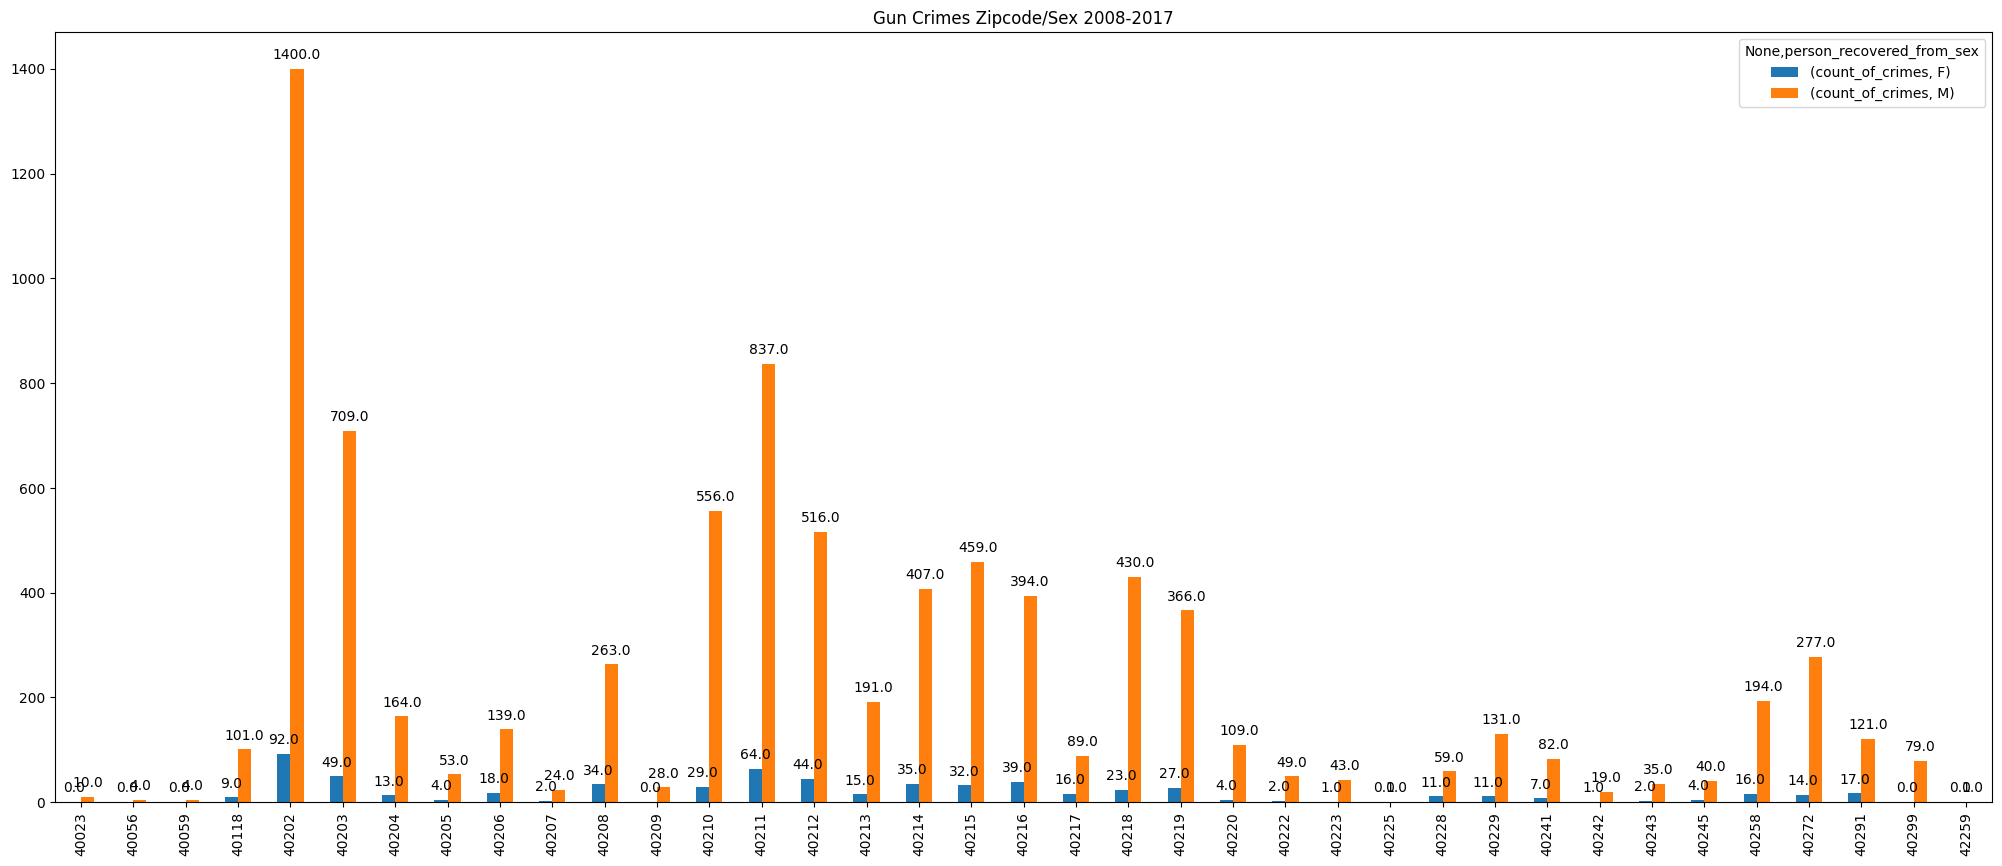

In [209]:
ax7 = firearm_data_zip_sex.unstack().plot(kind='bar', xlabel='', title='Gun Crimes Zipcode/Sex 2008-2017', figsize = (25,10))
for p in ax7.patches:
    ax7.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('./CompiledImages/count_zip_sex_crime.png')

### Zipcode and Sex Log

In [210]:
firearm_data_zip_sex_log = firearm_data_zip_sex
firearm_data_zip_sex_log['log_values'] = np.log(firearm_data_zip_sex_log['count_of_crimes'])
firearm_data_zip_sex_log = firearm_data_zip_sex_log[firearm_data_zip_sex_log['log_values'] != 0]

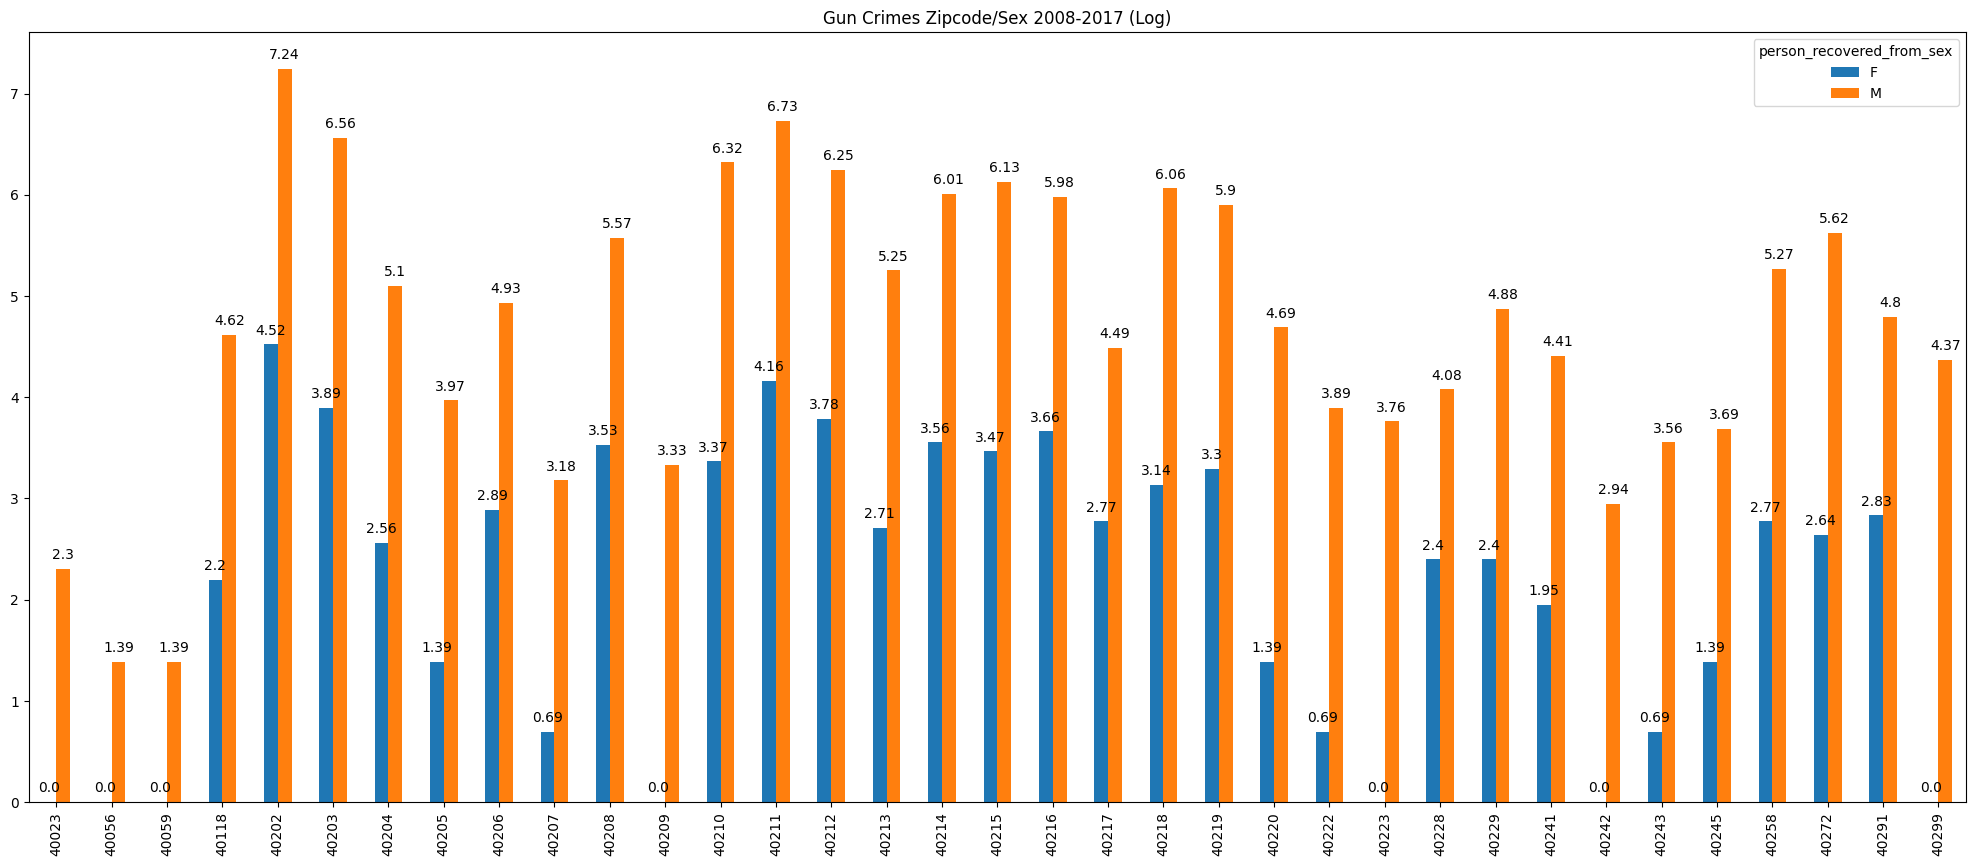

In [211]:
ax20 = firearm_data_zip_sex_log['log_values'].unstack().plot(kind='bar', xlabel='', title='Gun Crimes Zipcode/Sex 2008-2017 (Log)', figsize = (25,10))
for p in ax20.patches:
    ax20.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('./CompiledImages/count_zip_sex_crime_log.png')

### Grouping Zipcode and Race

In [212]:
firearm_data_zip_race = firearm_data[['zipcode', 'person_recovered_from_race']]
firearm_data_zip_race['count_of_crimes'] = firearm_data_zip_race['person_recovered_from_race']

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\2734971396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data_zip_race['count_of_crimes'] = firearm_data_zip_race['person_recovered_from_race']


In [213]:
firearm_data_zip_race = firearm_data_zip_race.groupby([firearm_data_zip_race['zipcode'], firearm_data_zip_race['person_recovered_from_race']]).count()

In [214]:
firearm_data_zip_race

count_of_crimes
zipcode person_recovered_from_race                 
40023   Black                                     2
        Hispanic                                  2
        White                                     6
40056   Black                                     4
40059   Black                                     1
...                                             ...
40291   Middle_Eastern                            1
        White                                    92
40299   Black                                     8
        White                                    69
42259   White                                     1

[114 rows x 1 columns]

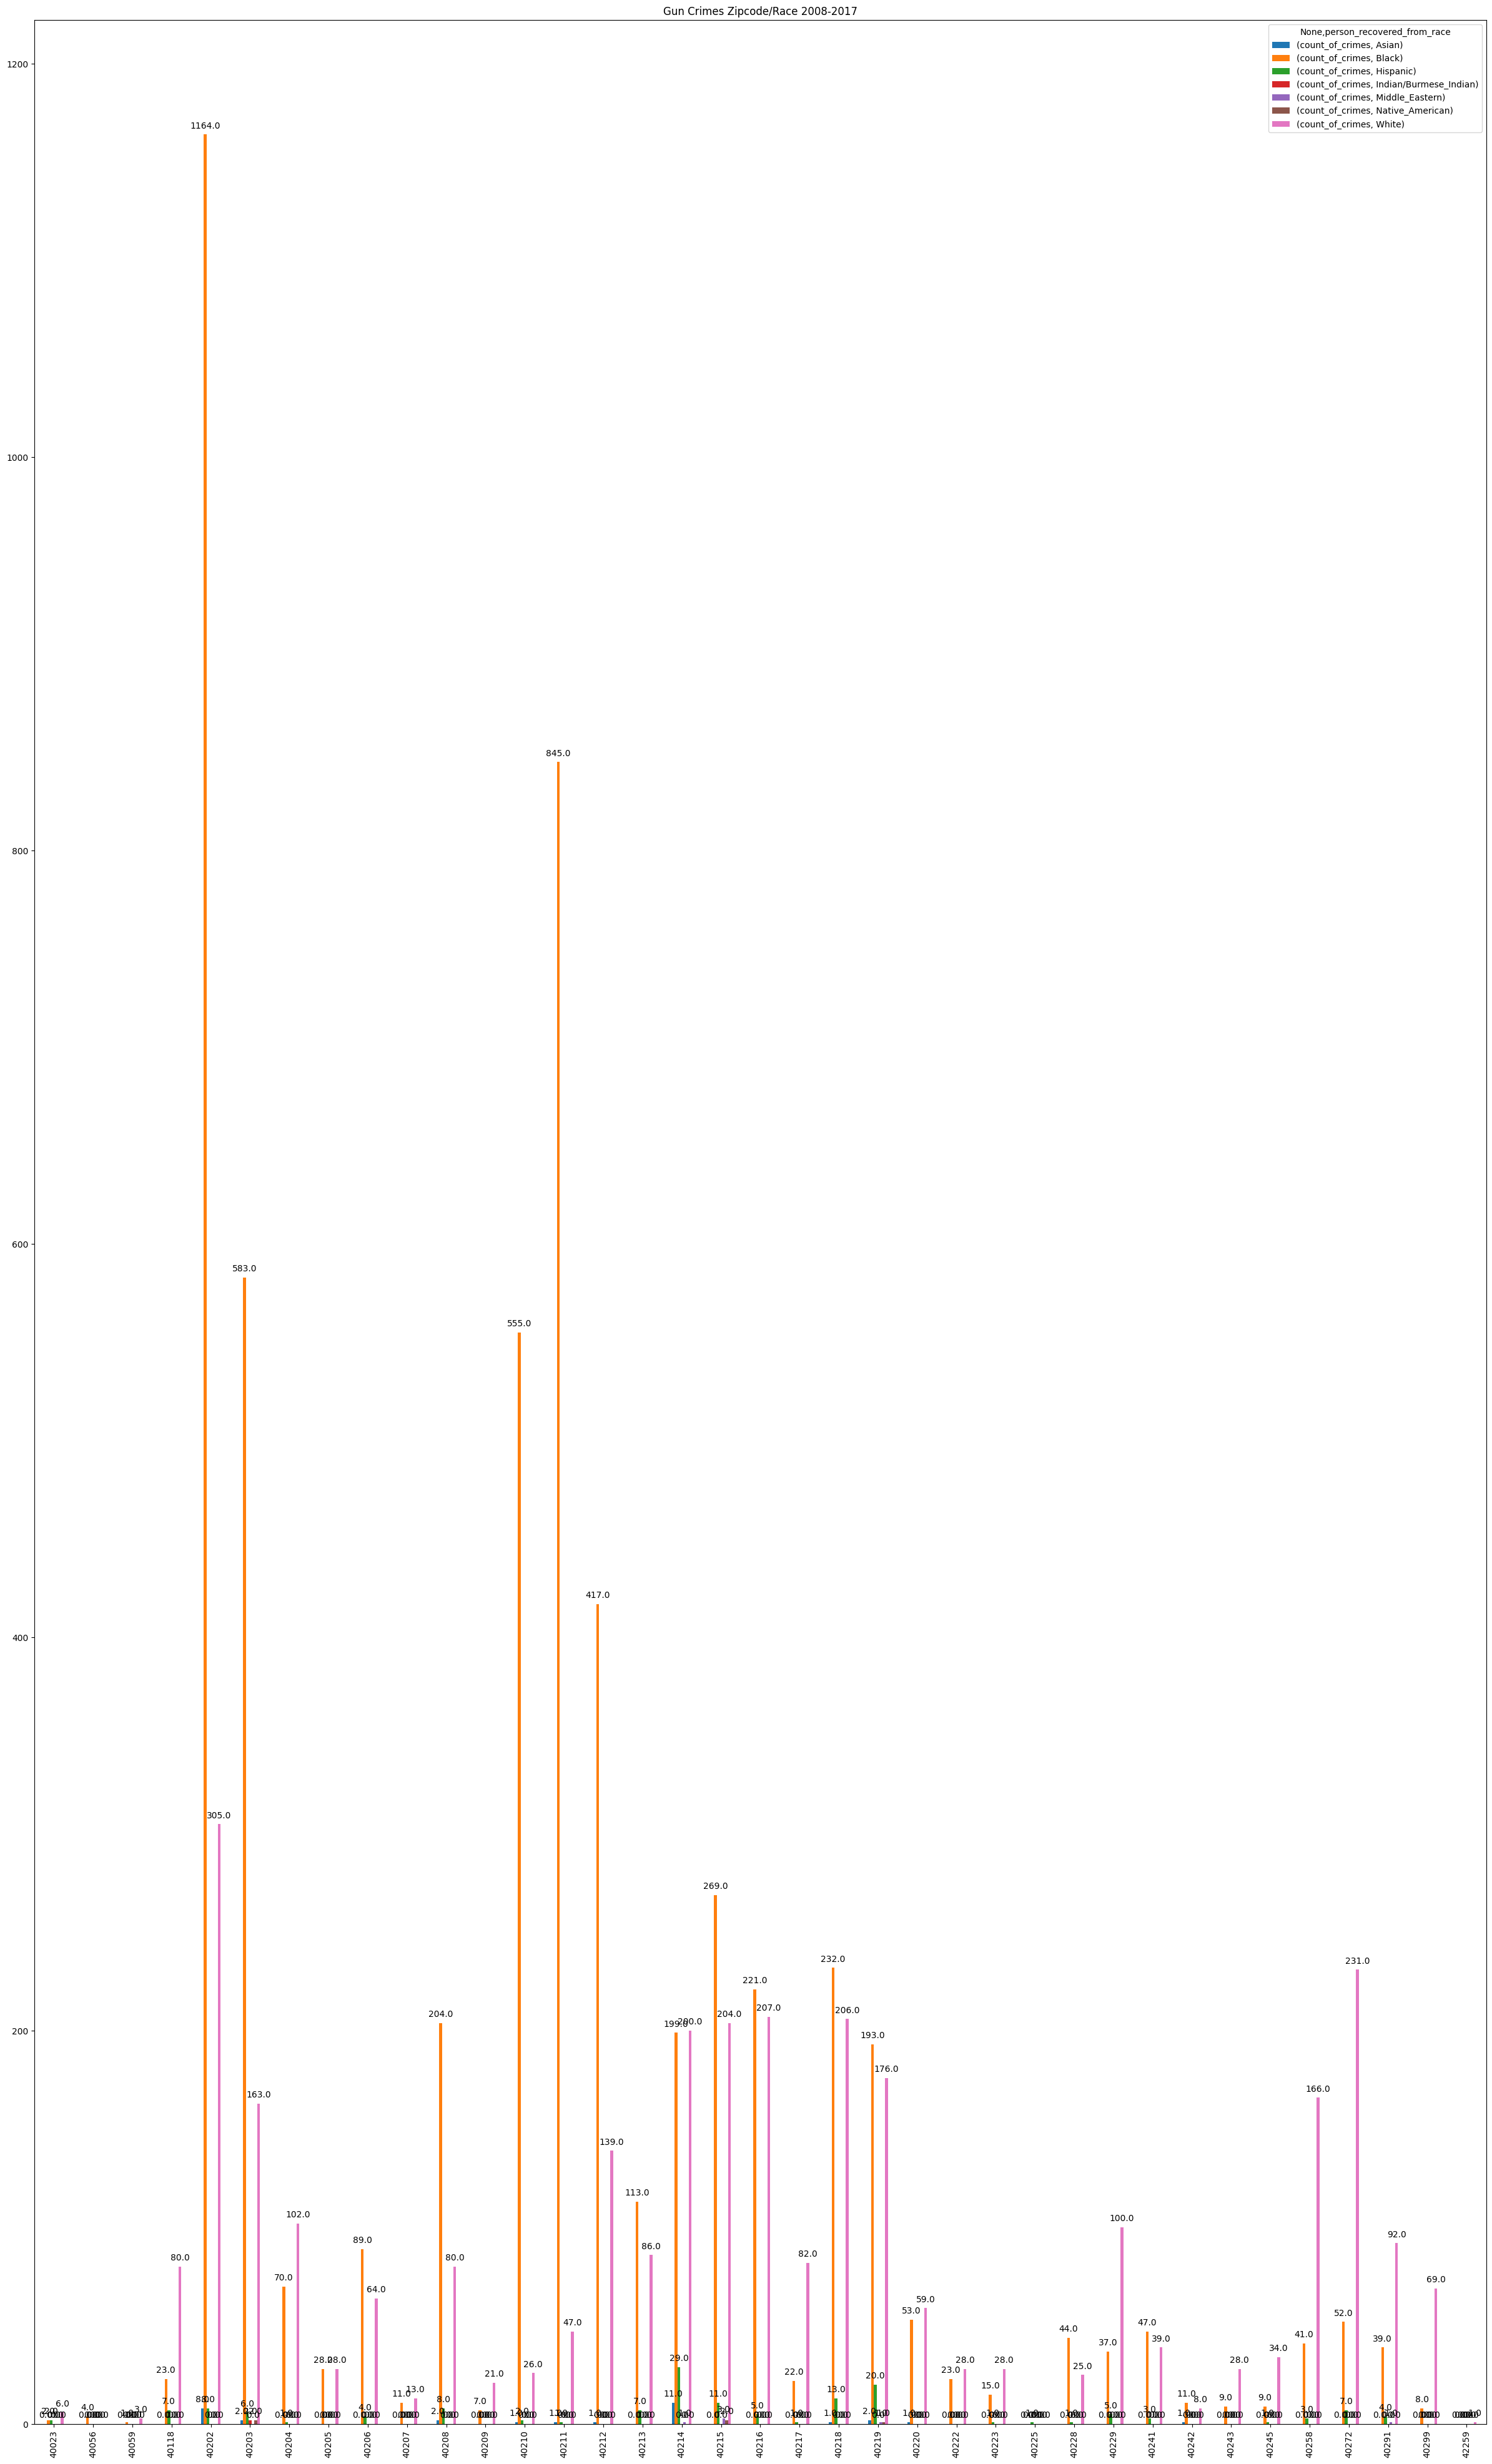

In [215]:
ax10 = firearm_data_zip_race.unstack().plot(kind='bar', xlabel='', title='Gun Crimes Zipcode/Race 2008-2017', figsize = (30,50))
for p in ax10.patches:
    ax10.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('./CompiledImages/count_zip_race_crime.png')

### Zipcode and Race Log

In [216]:
firearm_data_zip_race_log = firearm_data_zip_race
firearm_data_zip_race_log['log_values'] = np.log(firearm_data_zip_race_log['count_of_crimes'])
firearm_data_zip_race_log_zero = firearm_data_zip_race_log[firearm_data_zip_race_log['log_values'] != 0]

In [217]:
firearm_data_zip_race_log_zero.index

MultiIndex([('40023',                 'Black'),
            ('40023',              'Hispanic'),
            ('40023',                 'White'),
            ('40056',                 'Black'),
            ('40059',                 'White'),
            ('40118',                 'Black'),
            ('40118',              'Hispanic'),
            ('40118',                 'White'),
            ('40202',                 'Asian'),
            ('40202',                 'Black'),
            ('40202',              'Hispanic'),
            ('40202',                 'White'),
            ('40203',                 'Asian'),
            ('40203',                 'Black'),
            ('40203',              'Hispanic'),
            ('40203', 'Indian/Burmese_Indian'),
            ('40203',       'Native_American'),
            ('40203',                 'White'),
            ('40204',                 'Black'),
            ('40204',                 'White'),
            ('40205',                 'B

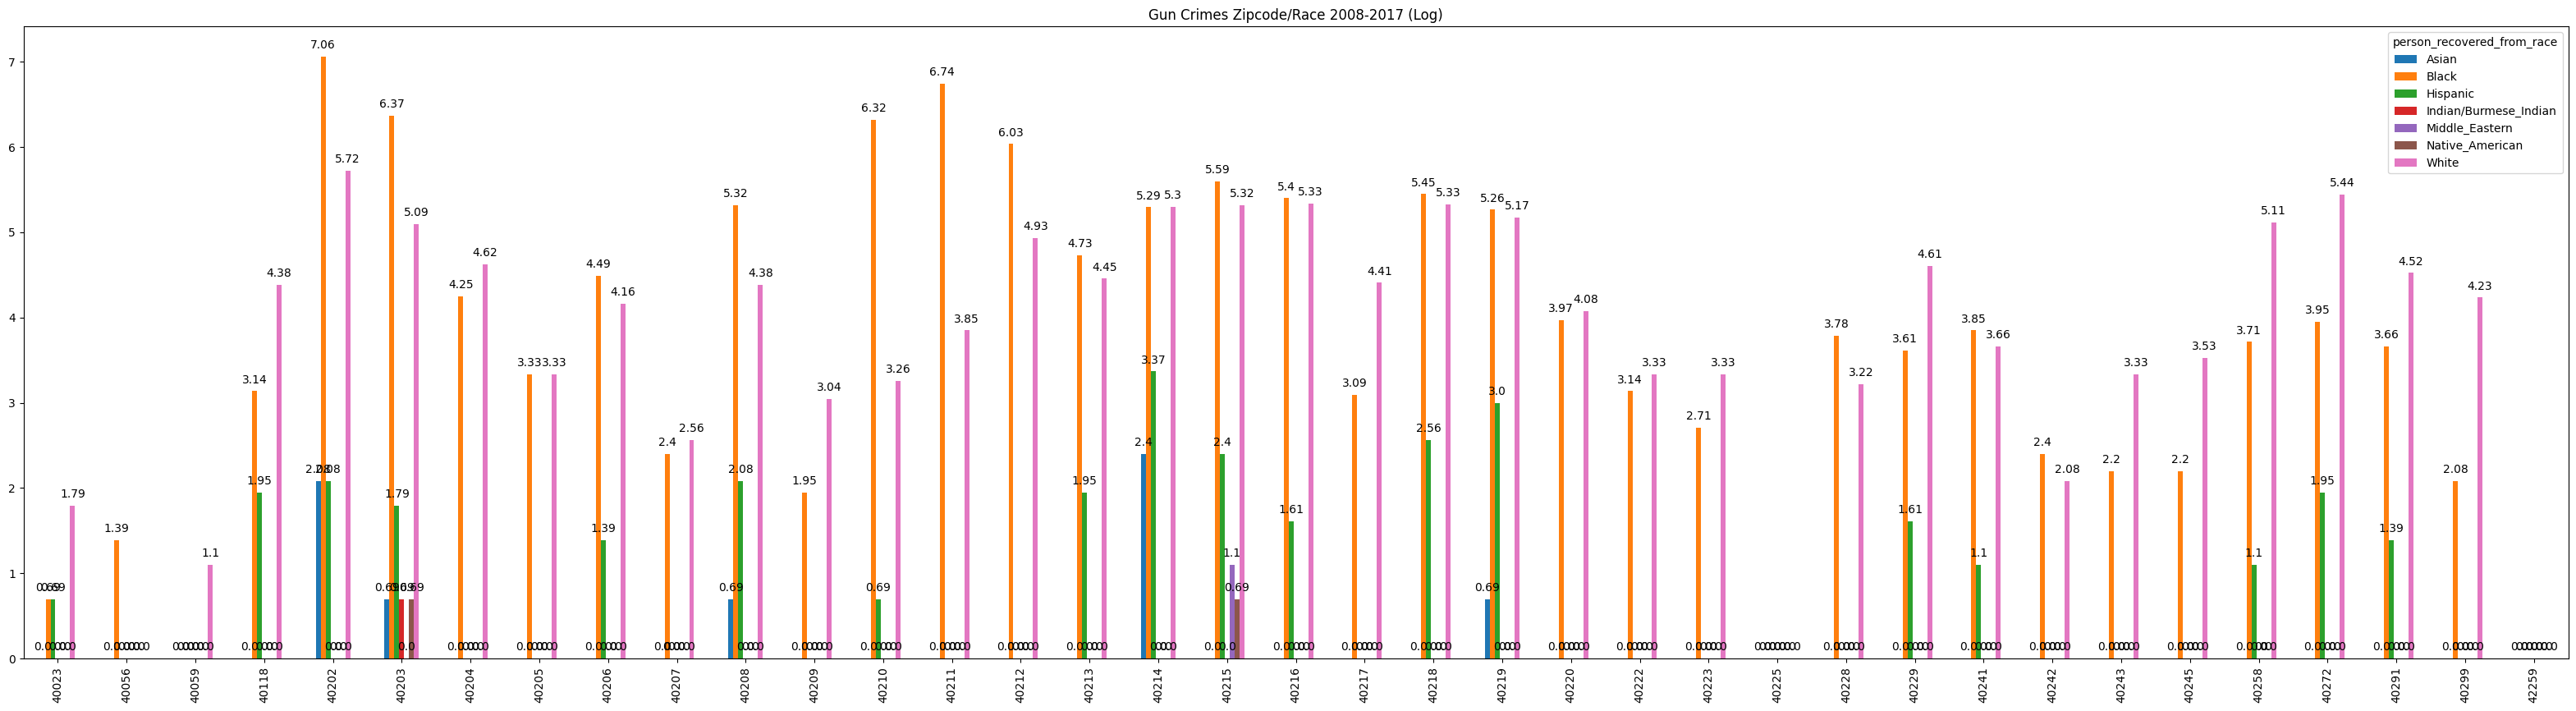

In [218]:
ax21 = firearm_data_zip_race_log['log_values'].unstack().plot(kind='bar', xlabel='', title='Gun Crimes Zipcode/Race 2008-2017 (Log)', figsize = (40,10))
for p in ax21.patches:
    ax21.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('./CompiledImages/count_zip_race_crime_log.png')

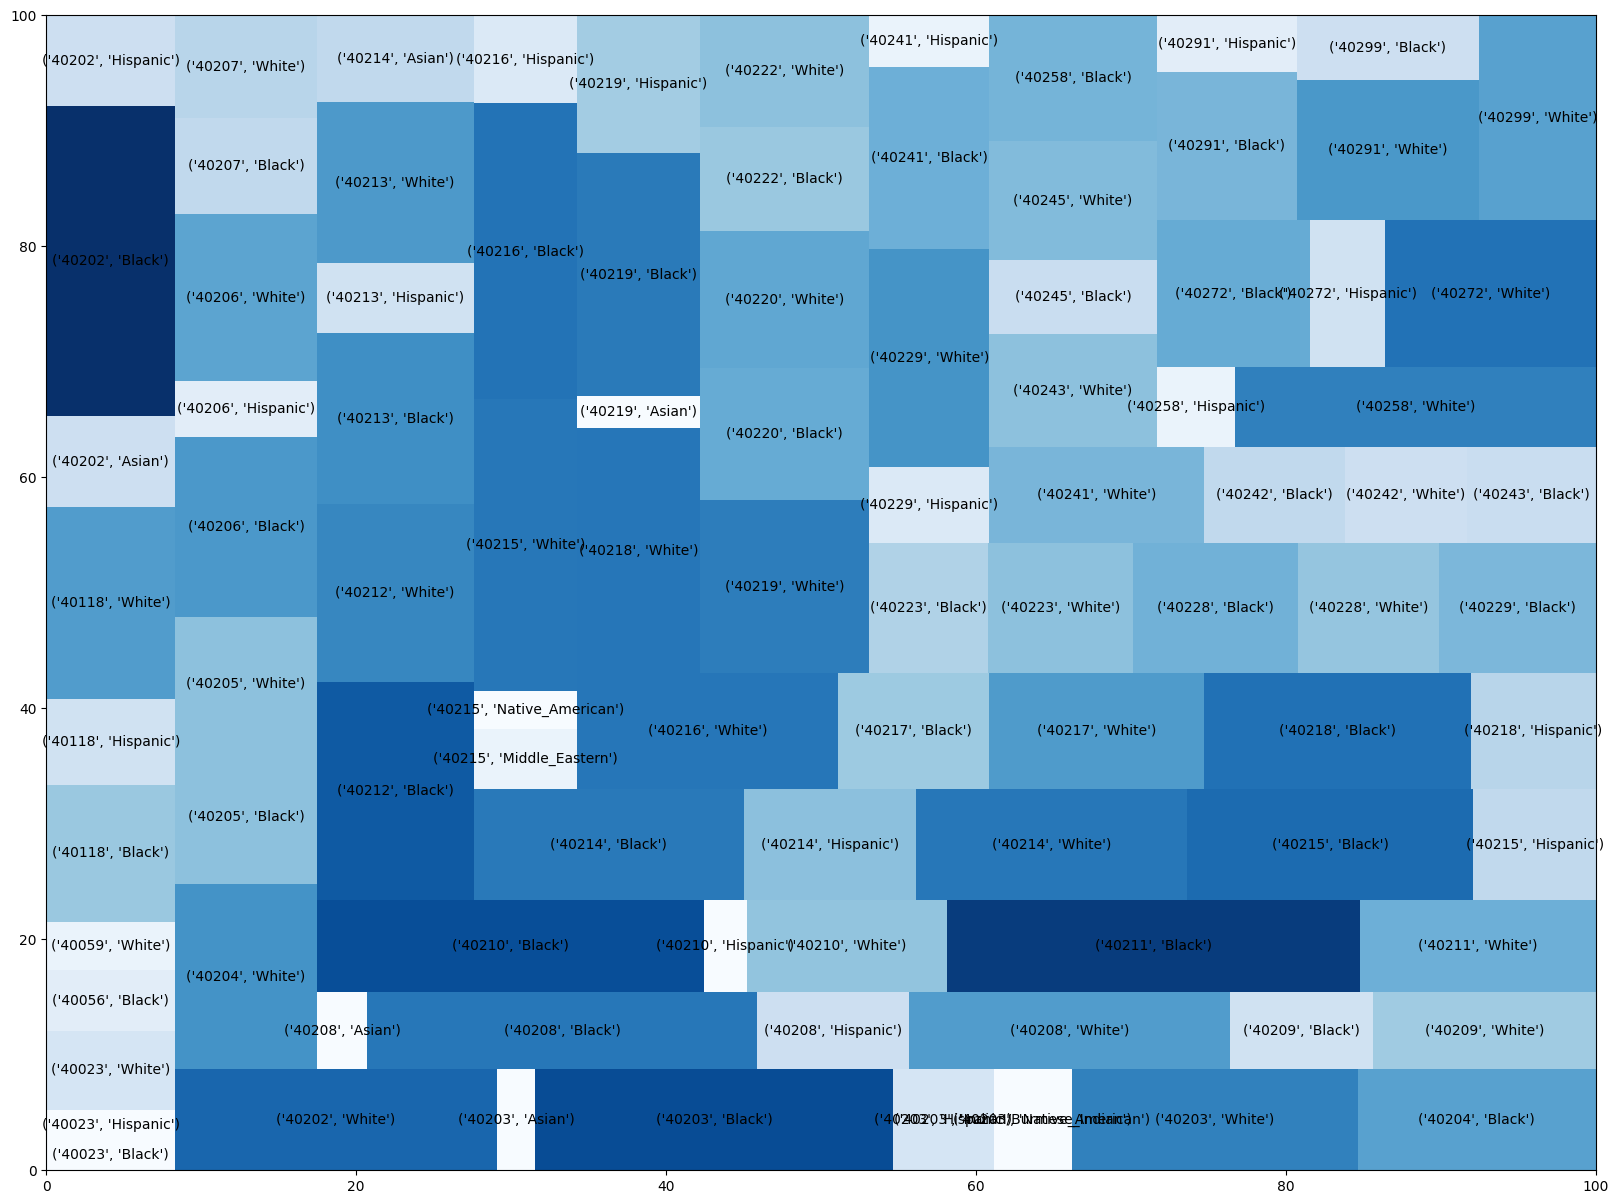

In [219]:
norm = mpcolors.Normalize(vmin=min(firearm_data_zip_race_log_zero.log_values), vmax=max(firearm_data_zip_race_log_zero.log_values))
colors = [cmpl.Blues(norm(value)) for value in firearm_data_zip_race_log_zero.log_values]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 15)
sq.plot(label = firearm_data_zip_race_log_zero.index, sizes = firearm_data_zip_race_log_zero.log_values, color = colors)
plt.savefig('./CompiledImages/count_zip_race_crime_heatmap.png')

## Grouping zipcode and year

In [220]:
firearm_data_zip_year = firearm_data[['zipcode', 'year']]
firearm_data_zip_year['count_of_crimes'] = firearm_data_zip_year['year']

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\3463996723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data_zip_year['count_of_crimes'] = firearm_data_zip_year['year']


In [221]:
firearm_data_zip_year = firearm_data_zip_year.groupby([firearm_data_zip_year['zipcode'], firearm_data_zip_year['year']]).count()

In [222]:
firearm_data_zip_year

count_of_crimes
zipcode year                 
40023   2013                7
        2014                2
        2016                1
40056   2010                1
        2013                1
...                       ...
40299   2015                4
        2016               38
        2017                1
42259   2014                1
47130   2015                1

[270 rows x 1 columns]

In [223]:
firearm_data_zip_year_heat = firearm_data_zip_year.reset_index()

In [224]:
firearm_data_zip_year_heat

zipcode  year  count_of_crimes
0     40023  2013                7
1     40023  2014                2
2     40023  2016                1
3     40056  2010                1
4     40056  2013                1
..      ...   ...              ...
265   40299  2015                4
266   40299  2016               38
267   40299  2017                1
268   42259  2014                1
269   47130  2015                1

[270 rows x 3 columns]

In [225]:
zip_year_pivot = firearm_data_zip_year_heat.pivot(index="zipcode", columns="year", values="count_of_crimes")

In [226]:
zip_year_pivot = zip_year_pivot.replace(np.NaN, 0)

In [227]:
zip_year_pivot

year     2008  2009   2010   2011   2012   2013   2014   2015   2016  2017
zipcode                                                                   
40023     0.0   0.0    0.0    0.0    0.0    7.0    2.0    0.0    1.0   0.0
40056     0.0   0.0    1.0    0.0    0.0    1.0    2.0    1.0    0.0   0.0
40058     0.0   0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   0.0
40059     0.0   0.0    2.0    2.0    1.0    0.0    1.0    0.0    1.0   0.0
40118     0.0   0.0   13.0    3.0   24.0   16.0   23.0   29.0    8.0   9.0
40165     0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   0.0
40177     0.0   0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   0.0
40202     0.0   0.0  115.0  145.0  172.0  370.0  357.0  644.0  293.0  92.0
40203     1.0   0.0  125.0  144.0  123.0   82.0   88.0  124.0  145.0  38.0
40204     0.0   0.0   49.0   25.0   42.0   12.0   25.0   25.0   37.0   1.0
40205     0.0   0.0    7.0   12.0   10.0    6.0   10.0    6.0   17.0   4.0
40206     0.0   0.0   33.0   14.0   23.0   27.0   34.0   39.0   38.0   9.0
40207     0.0   0.0    6.0   10.0    4.0    1.0    4.0    3.0    7.0   2.0
40208     0.0   1.0   34.0   37.0   46.0   33.0   46.0   39.0   75.0  16.0
40209     0.0   0.0    1.0   13.0    3.0    2.0    1.0    4.0   10.0   0.0
40210     0.0   0.0   75.0   67.0  100.0   57.0   69.0  100.0  157.0  21.0
40211     0.0   0.0  105.0  153.0  122.0  103.0  143.0  128.0  231.0  27.0
40212     0.0   2.0   74.0  129.0  108.0   56.0   52.0   84.0  123.0  19.0
40213     0.0   0.0   40.0   35.0   29.0   23.0   34.0   32.0   33.0  15.0
40214     0.0   0.0   89.0   70.0   64.0   53.0   67.0   45.0  103.0   9.0
40215     0.0   0.0   67.0   72.0   66.0   54.0   57.0   59.0  140.0  33.0
40216     0.0   0.0   44.0   42.0   80.0   44.0   67.0   61.0  167.0  10.0
40217     0.0   0.0    8.0   34.0   18.0    6.0   21.0    7.0   19.0   0.0
40218     0.0   0.0   50.0   43.0   37.0  121.0  104.0   48.0   96.0   4.0
40219     0.0   0.0   53.0   68.0   38.0   53.0   80.0   41.0  111.0  15.0
40220     0.0   0.0   16.0   23.0   27.0   15.0   19.0   16.0   24.0   4.0
40222     0.0   0.0   10.0    9.0    7.0   10.0    4.0    8.0    6.0  11.0
40223     0.0   0.0   15.0    5.0    6.0    4.0    8.0   10.0    9.0   0.0
40225     0.0   0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   0.0
40228     0.0   0.0   11.0   10.0   16.0   11.0   10.0    9.0   24.0   2.0
40229     0.0   0.0   17.0   24.0   26.0   13.0   22.0   32.0   24.0   4.0
40241     0.0   0.0   15.0   17.0   18.0   30.0   13.0    8.0   14.0   0.0
40242     0.0   0.0    3.0    3.0    3.0    3.0    7.0    2.0    7.0   0.0
40243     0.0   0.0    9.0    4.0    8.0   10.0    6.0    4.0    2.0   0.0
40245     0.0   0.0    5.0    3.0    2.0    8.0    6.0   16.0   18.0   0.0
40258     0.0   0.0   25.0   25.0   40.0   34.0   26.0   46.0   57.0   8.0
40272     0.0   0.0   38.0   44.0   46.0   64.0   40.0   42.0   69.0   9.0
40291     0.0   0.0   13.0   37.0   17.0   30.0   24.0   14.0   42.0   1.0
40299     0.0   0.0   11.0   21.0   14.0    1.0    4.0    4.0   38.0   1.0
42259     0.0   0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   0.0
47130     0.0   0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   0.0

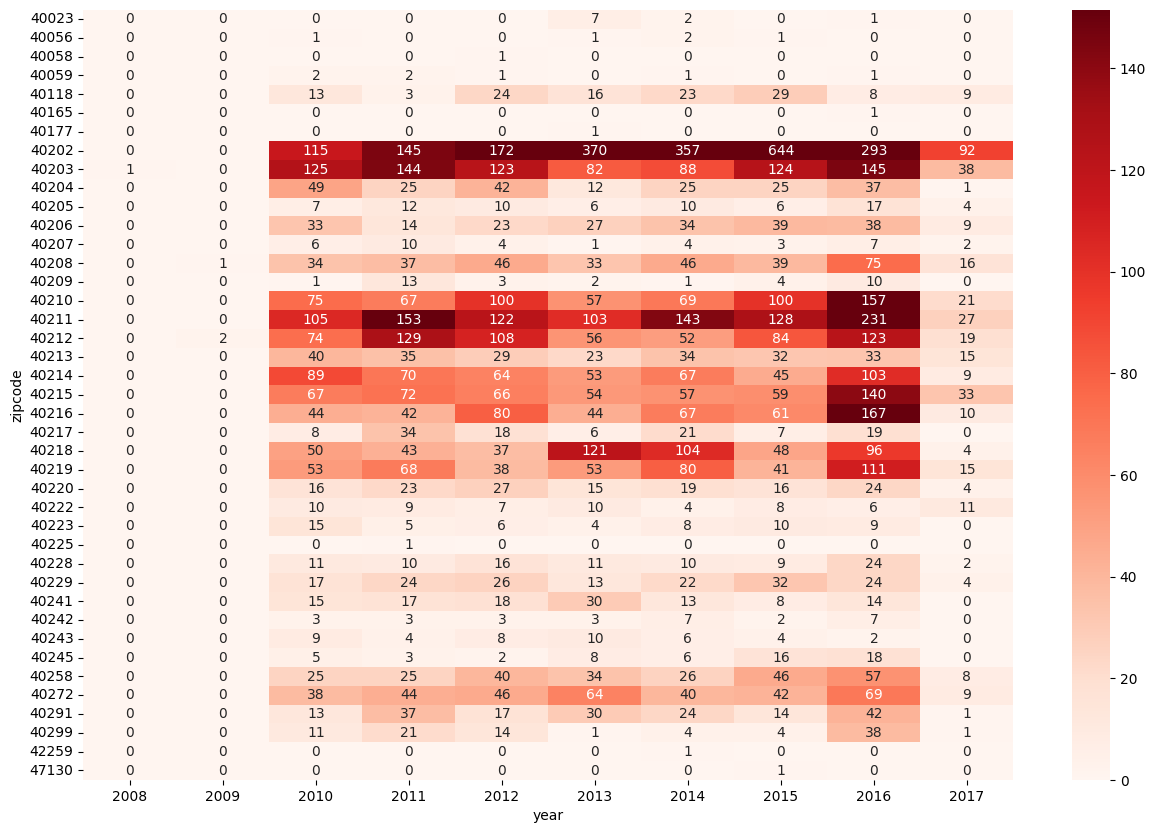

In [228]:
fig, ax40 = plt.subplots(figsize = (15,10))
sns.heatmap(zip_year_pivot, cmap = 'Reds', robust = True, annot = True, fmt='g')
plt.savefig('./CompiledImages/zip_year_pivot.png')

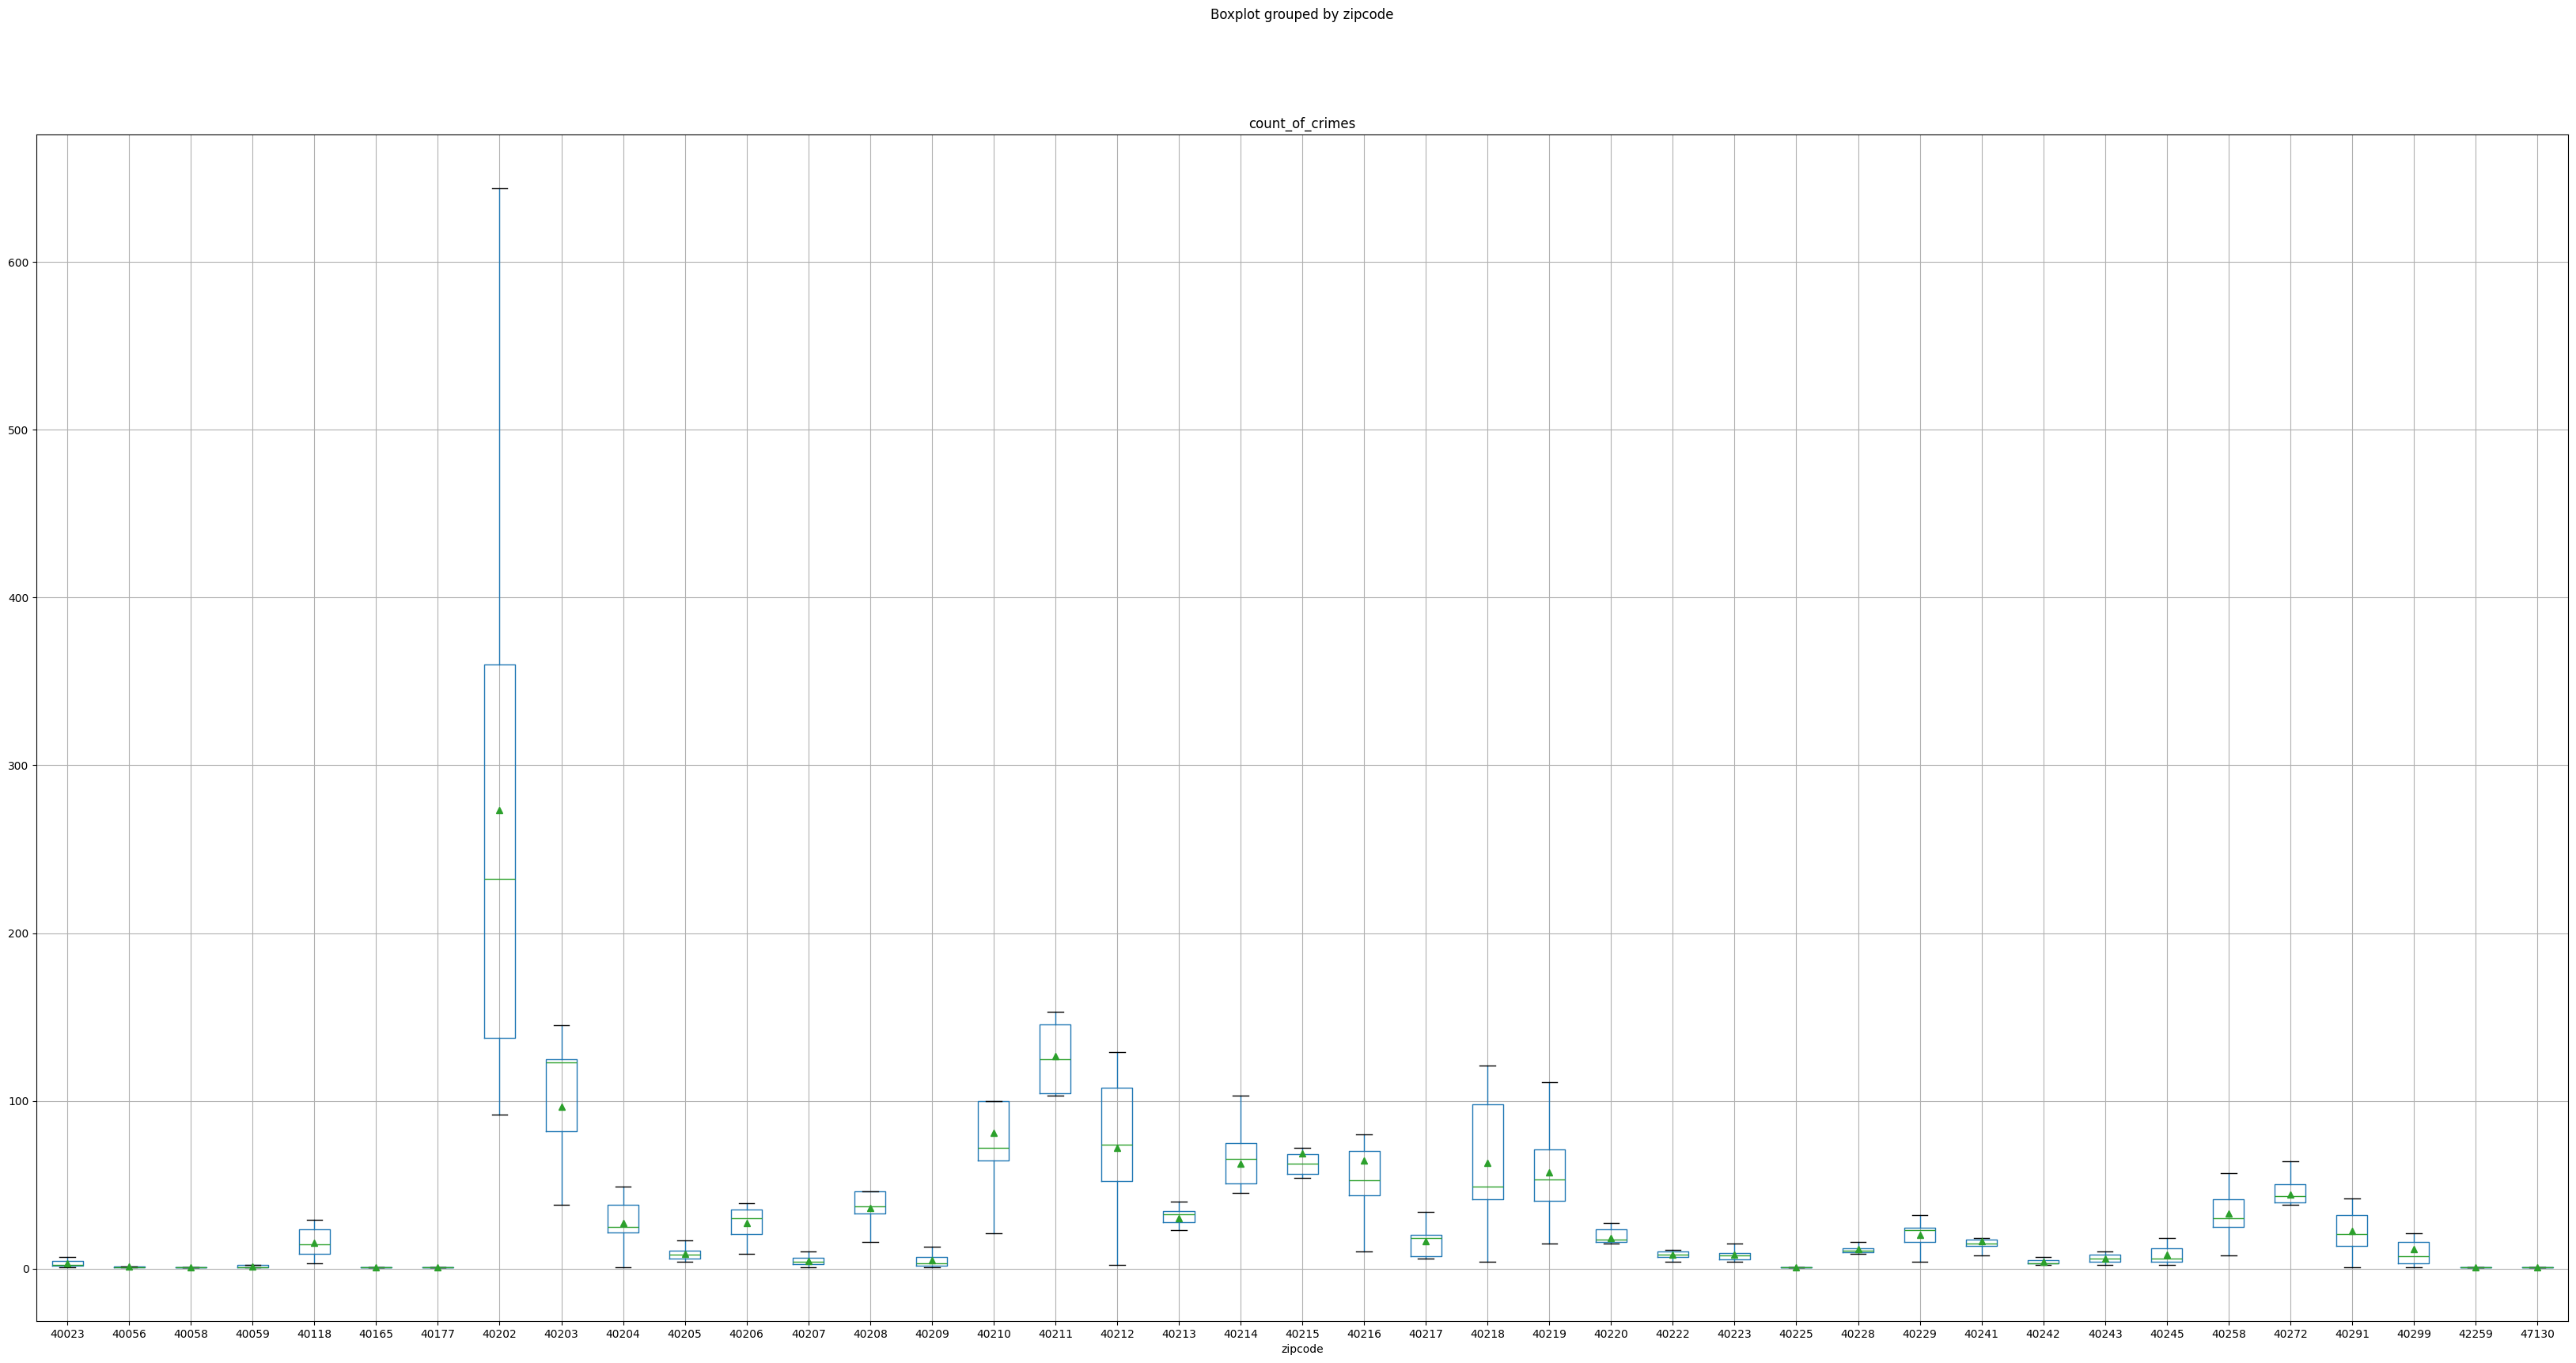

In [229]:
ax12 = firearm_data_zip_year_heat.boxplot(column="count_of_crimes", by="zipcode", figsize=(40,20), showfliers = False, showmeans = True)
plt.savefig('./CompiledImages/zip_boxplot.png')

## Zipcode and year log

In [230]:
firearm_data_zip_year_log = firearm_data_zip_year
firearm_data_zip_year_log['log_values'] = np.log(firearm_data_zip_year_log['count_of_crimes'])
firearm_data_zip_year_log.drop('count_of_crimes', axis = 1, inplace = True)

In [231]:
firearm_data_zip_year_log_heat = firearm_data_zip_year.reset_index()

In [232]:
zip_year_log_pivot = firearm_data_zip_year_log_heat.pivot(index="zipcode", columns="year", values="log_values")
zip_year_log_pivot = zip_year_log_pivot.replace(np.NaN, 0)
zip_year_log_pivot

year     2008      2009      2010      2011      2012      2013      2014  \
zipcode                                                                     
40023     0.0  0.000000  0.000000  0.000000  0.000000  1.945910  0.693147   
40056     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.693147   
40058     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
40059     0.0  0.000000  0.693147  0.693147  0.000000  0.000000  0.000000   
40118     0.0  0.000000  2.564949  1.098612  3.178054  2.772589  3.135494   
40165     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
40177     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
40202     0.0  0.000000  4.744932  4.976734  5.147494  5.913503  5.877736   
40203     0.0  0.000000  4.828314  4.969813  4.812184  4.406719  4.477337   
40204     0.0  0.000000  3.891820  3.218876  3.737670  2.484907  3.218876   
40205     0.0  0.000000  1.945910  2.484907  2.302585  1.791759  2.302585   
40206     0.0  0.000000  3.496508  2.639057  3.135494  3.295837  3.526361   
40207     0.0  0.000000  1.791759  2.302585  1.386294  0.000000  1.386294   
40208     0.0  0.000000  3.526361  3.610918  3.828641  3.496508  3.828641   
40209     0.0  0.000000  0.000000  2.564949  1.098612  0.693147  0.000000   
40210     0.0  0.000000  4.317488  4.204693  4.605170  4.043051  4.234107   
40211     0.0  0.000000  4.653960  5.030438  4.804021  4.634729  4.962845   
40212     0.0  0.693147  4.304065  4.859812  4.682131  4.025352  3.951244   
40213     0.0  0.000000  3.688879  3.555348  3.367296  3.135494  3.526361   
40214     0.0  0.000000  4.488636  4.248495  4.158883  3.970292  4.204693   
40215     0.0  0.000000  4.204693  4.276666  4.189655  3.988984  4.043051   
40216     0.0  0.000000  3.784190  3.737670  4.382027  3.784190  4.204693   
40217     0.0  0.000000  2.079442  3.526361  2.890372  1.791759  3.044522   
40218     0.0  0.000000  3.912023  3.761200  3.610918  4.795791  4.644391   
40219     0.0  0.000000  3.970292  4.219508  3.637586  3.970292  4.382027   
40220     0.0  0.000000  2.772589  3.135494  3.295837  2.708050  2.944439   
40222     0.0  0.000000  2.302585  2.197225  1.945910  2.302585  1.386294   
40223     0.0  0.000000  2.708050  1.609438  1.791759  1.386294  2.079442   
40225     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
40228     0.0  0.000000  2.397895  2.302585  2.772589  2.397895  2.302585   
40229     0.0  0.000000  2.833213  3.178054  3.258097  2.564949  3.091042   
40241     0.0  0.000000  2.708050  2.833213  2.890372  3.401197  2.564949   
40242     0.0  0.000000  1.098612  1.098612  1.098612  1.098612  1.945910   
40243     0.0  0.000000  2.197225  1.386294  2.079442  2.302585  1.791759   
40245     0.0  0.000000  1.609438  1.098612  0.693147  2.079442  1.791759   
40258     0.0  0.000000  3.218876  3.218876  3.688879  3.526361  3.258097   
40272     0.0  0.000000  3.637586  3.784190  3.828641  4.158883  3.688879   
40291     0.0  0.000000  2.564949  3.610918  2.833213  3.401197  3.178054   
40299     0.0  0.000000  2.397895  3.044522  2.639057  0.000000  1.386294   
42259     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
47130     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

year         2015      2016      2017  
zipcode                                
40023    0.000000  0.000000  0.000000  
40056    0.000000  0.000000  0.000000  
40058    0.000000  0.000000  0.000000  
40059    0.000000  0.000000  0.000000  
40118    3.367296  2.079442  2.197225  
40165    0.000000  0.000000  0.000000  
40177    0.000000  0.000000  0.000000  
40202    6.467699  5.680173  4.521789  
40203    4.820282  4.976734  3.637586  
40204    3.218876  3.610918  0.000000  
40205    1.791759  2.833213  1.386294  
40206    3.663562  3.637586  2.197225  
40207    1.098612  1.945910  0.693147  
40208    3.663562  4.317488  2.772589  
40209    1.386294  2.302585  0.000000  
40210   

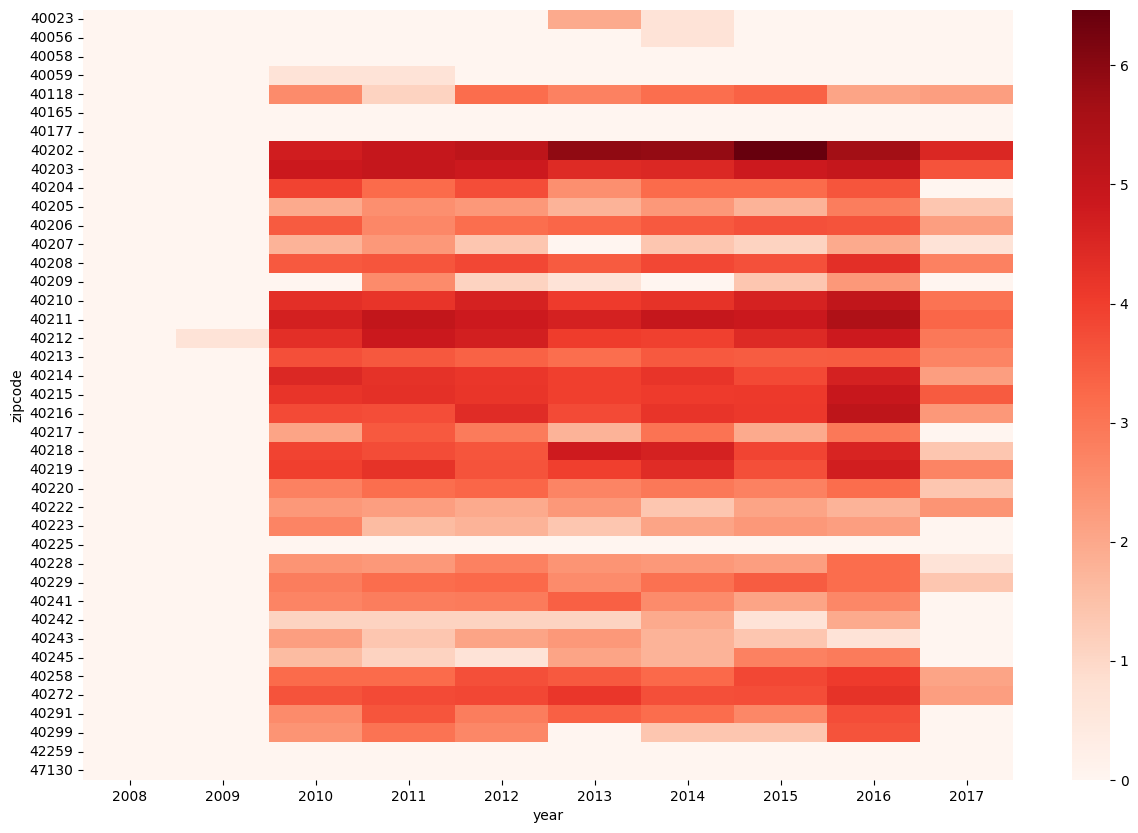

In [233]:
fig, ax22 = plt.subplots(figsize = (15,10))
sns.heatmap(zip_year_log_pivot, cmap = 'Reds', ax=ax22)
plt.savefig('./CompiledImages/zip_year_log_pivot.png')

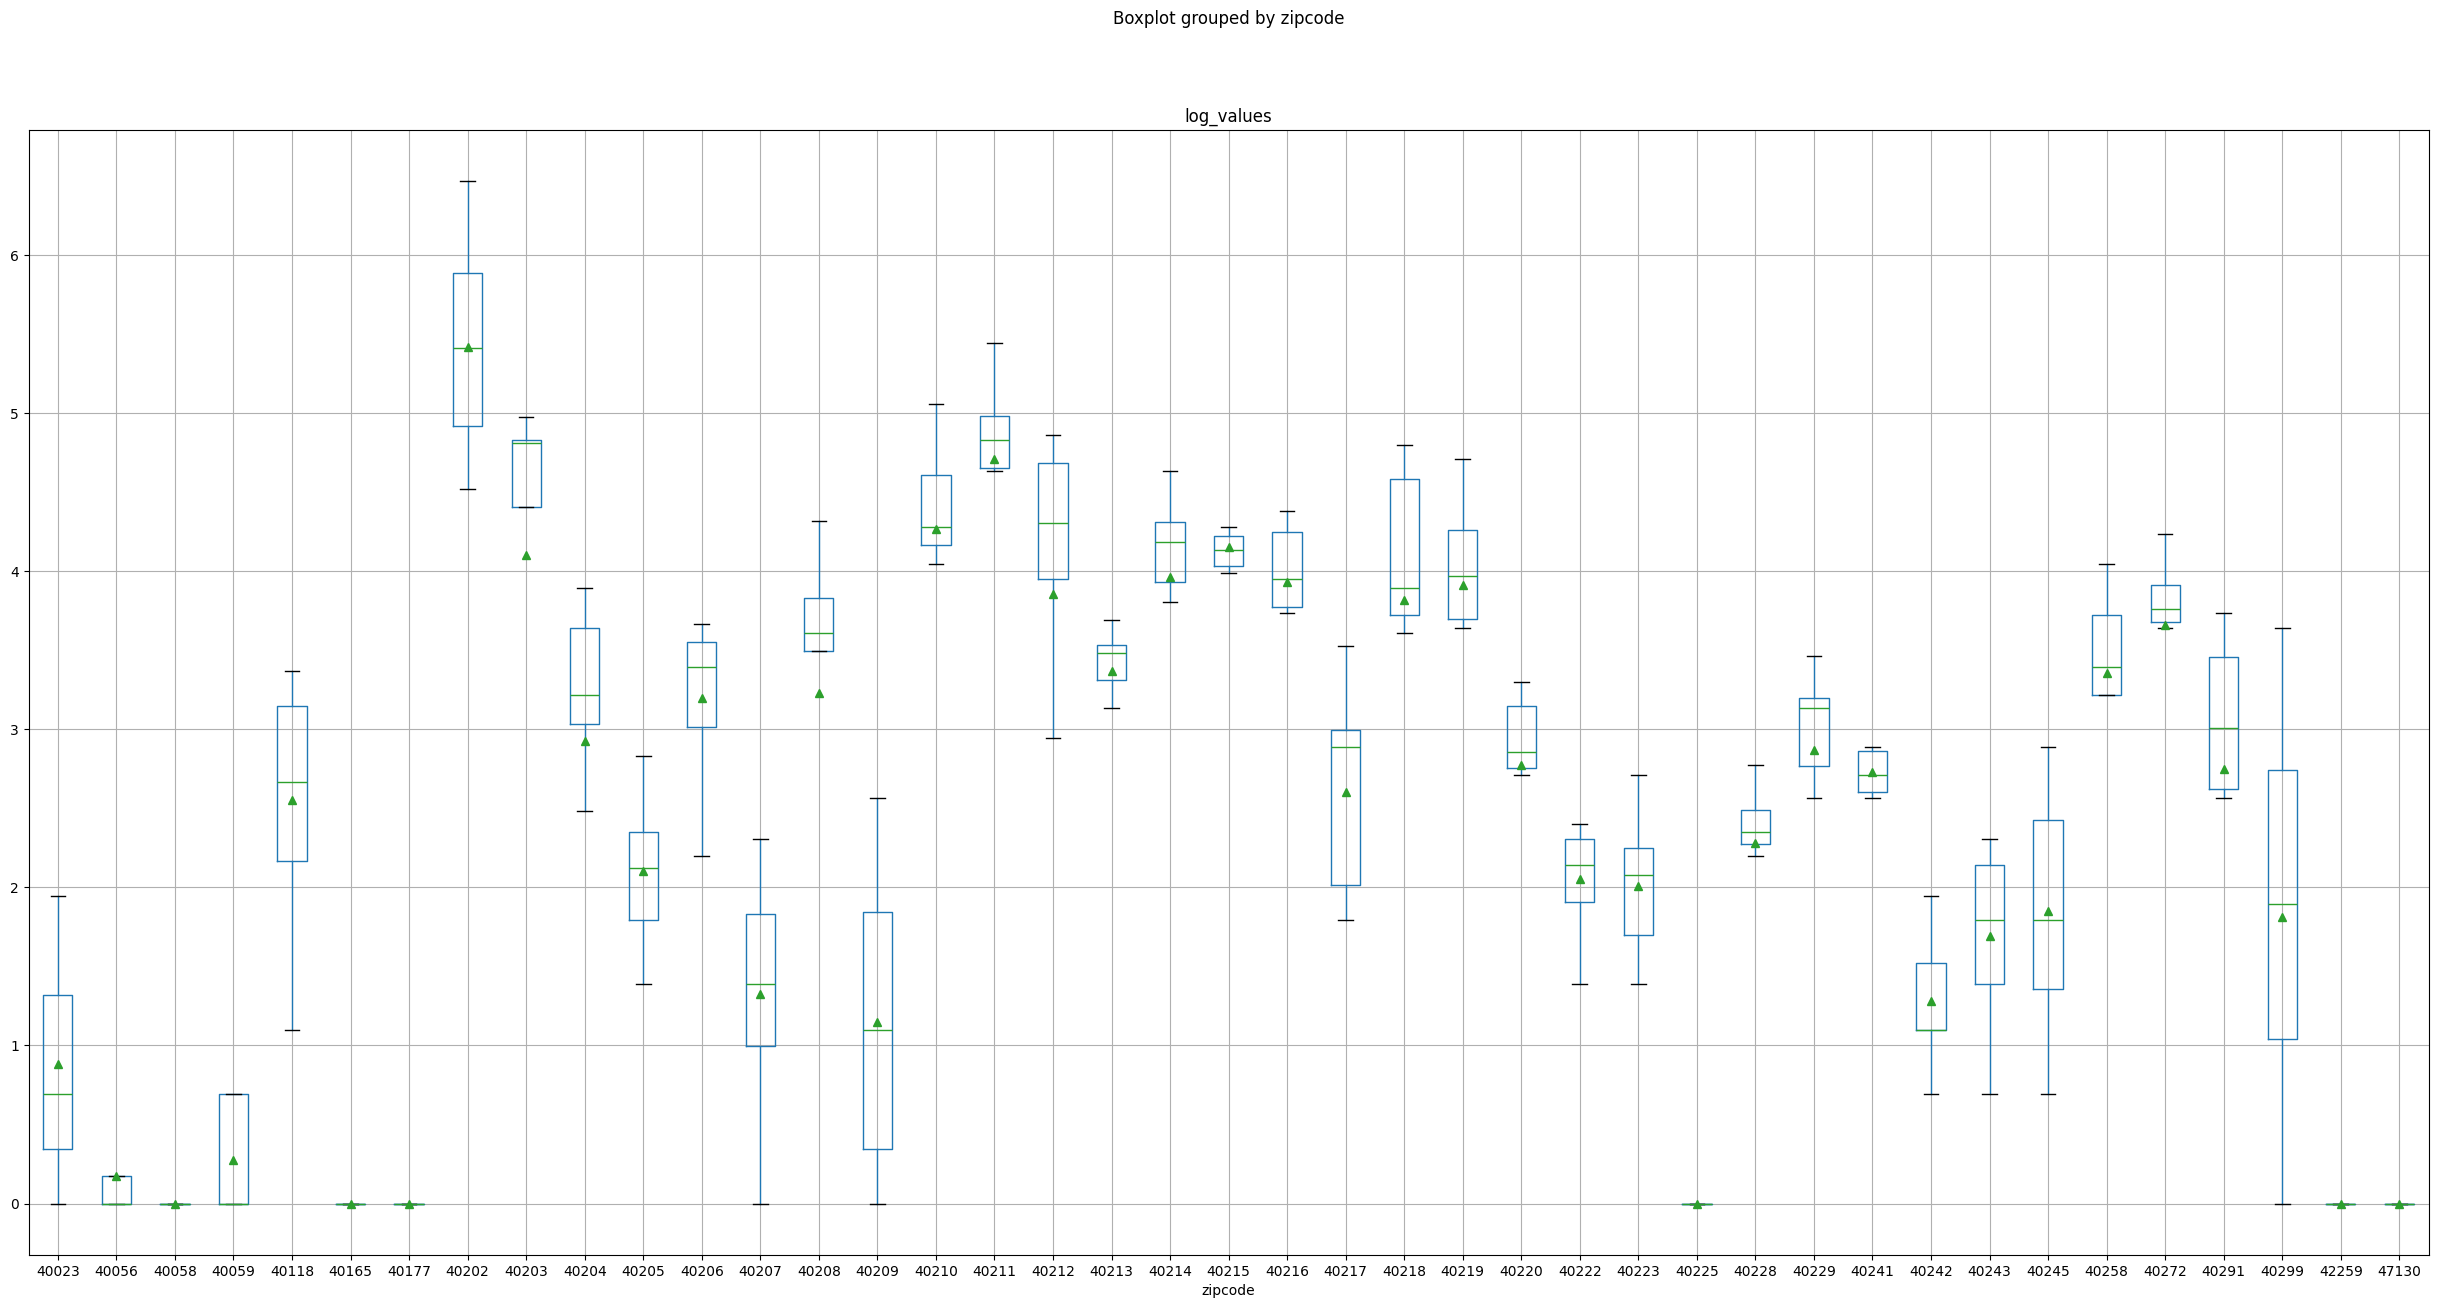

In [234]:
ax12 = firearm_data_zip_year_log_heat.boxplot(column="log_values", by="zipcode", figsize=(30,15), showfliers = False, showmeans = True)
plt.savefig('./CompiledImages/zip_boxplot_log.png')

### Viewing Yearly Gun Crime Count Trends for each Zipcode

In [235]:
zip_year_line = firearm_data_zip_year

In [236]:
zip_year_line = firearm_data_zip_year.reset_index('year')

In [237]:
zip_year_line

year  log_values
zipcode                  
40023    2013    1.945910
40023    2014    0.693147
40023    2016    0.000000
40056    2010    0.000000
40056    2013    0.000000
...       ...         ...
40299    2015    1.386294
40299    2016    3.637586
40299    2017    0.000000
42259    2014    0.000000
47130    2015    0.000000

[270 rows x 2 columns]

In [238]:
zip_year_raw = firearm_data[['zipcode', 'year']]

In [239]:
def zipcode_indiv_data(zipc):
    zip_data = zip_year_raw
    search_zipcode = str(zipc)
    query = "zipcode=="+"'"+search_zipcode+"'"
    df = zip_data.query(query)
    df[zipc] = df['year']
    df.drop(df[['zipcode']], axis=1, inplace= True)
    df = df.groupby('year').count()
    df = pd.DataFrame(df)
    return df

In [240]:
def zipcode_indiv_data_plot(zipc, ax):
    num = zip_list.index(zipc)
    plot_df = pd.DataFrame()
    for x in range(num, num+4):
        if(x < len(zip_list)):
            new_year = zipcode_indiv_data(zip_list[x])
            plot_df = pd.concat([plot_df, new_year], axis = 1)
    plot_df = plot_df.reindex(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'])
    df_plot = plot_df.plot(ax = ax)
    plot_name = "./CompiledImages/zip_line_year_"+str(zipc)+".png"
    plt.savefig(plot_name)
    return df_plot

In [241]:
zip_list = list(firearm_data_zip_year_heat['zipcode'].unique())

In [242]:
zip_list

['40023',
 '40056',
 '40058',
 '40059',
 '40118',
 '40165',
 '40177',
 '40202',
 '40203',
 '40204',
 '40205',
 '40206',
 '40207',
 '40208',
 '40209',
 '40210',
 '40211',
 '40212',
 '40213',
 '40214',
 '40215',
 '40216',
 '40217',
 '40218',
 '40219',
 '40220',
 '40222',
 '40223',
 '40225',
 '40228',
 '40229',
 '40241',
 '40242',
 '40243',
 '40245',
 '40258',
 '40272',
 '40291',
 '40299',
 '42259',
 '47130']

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\743525792.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[zipc] = df['year']
C:\Users\chris\AppData\Local\Temp\ipykernel_24012\743525792.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[['zipcode']], axis=1, inplace= True)
C:\Users\chris\AppData\Local\Temp\ipykernel_24012\743525792.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

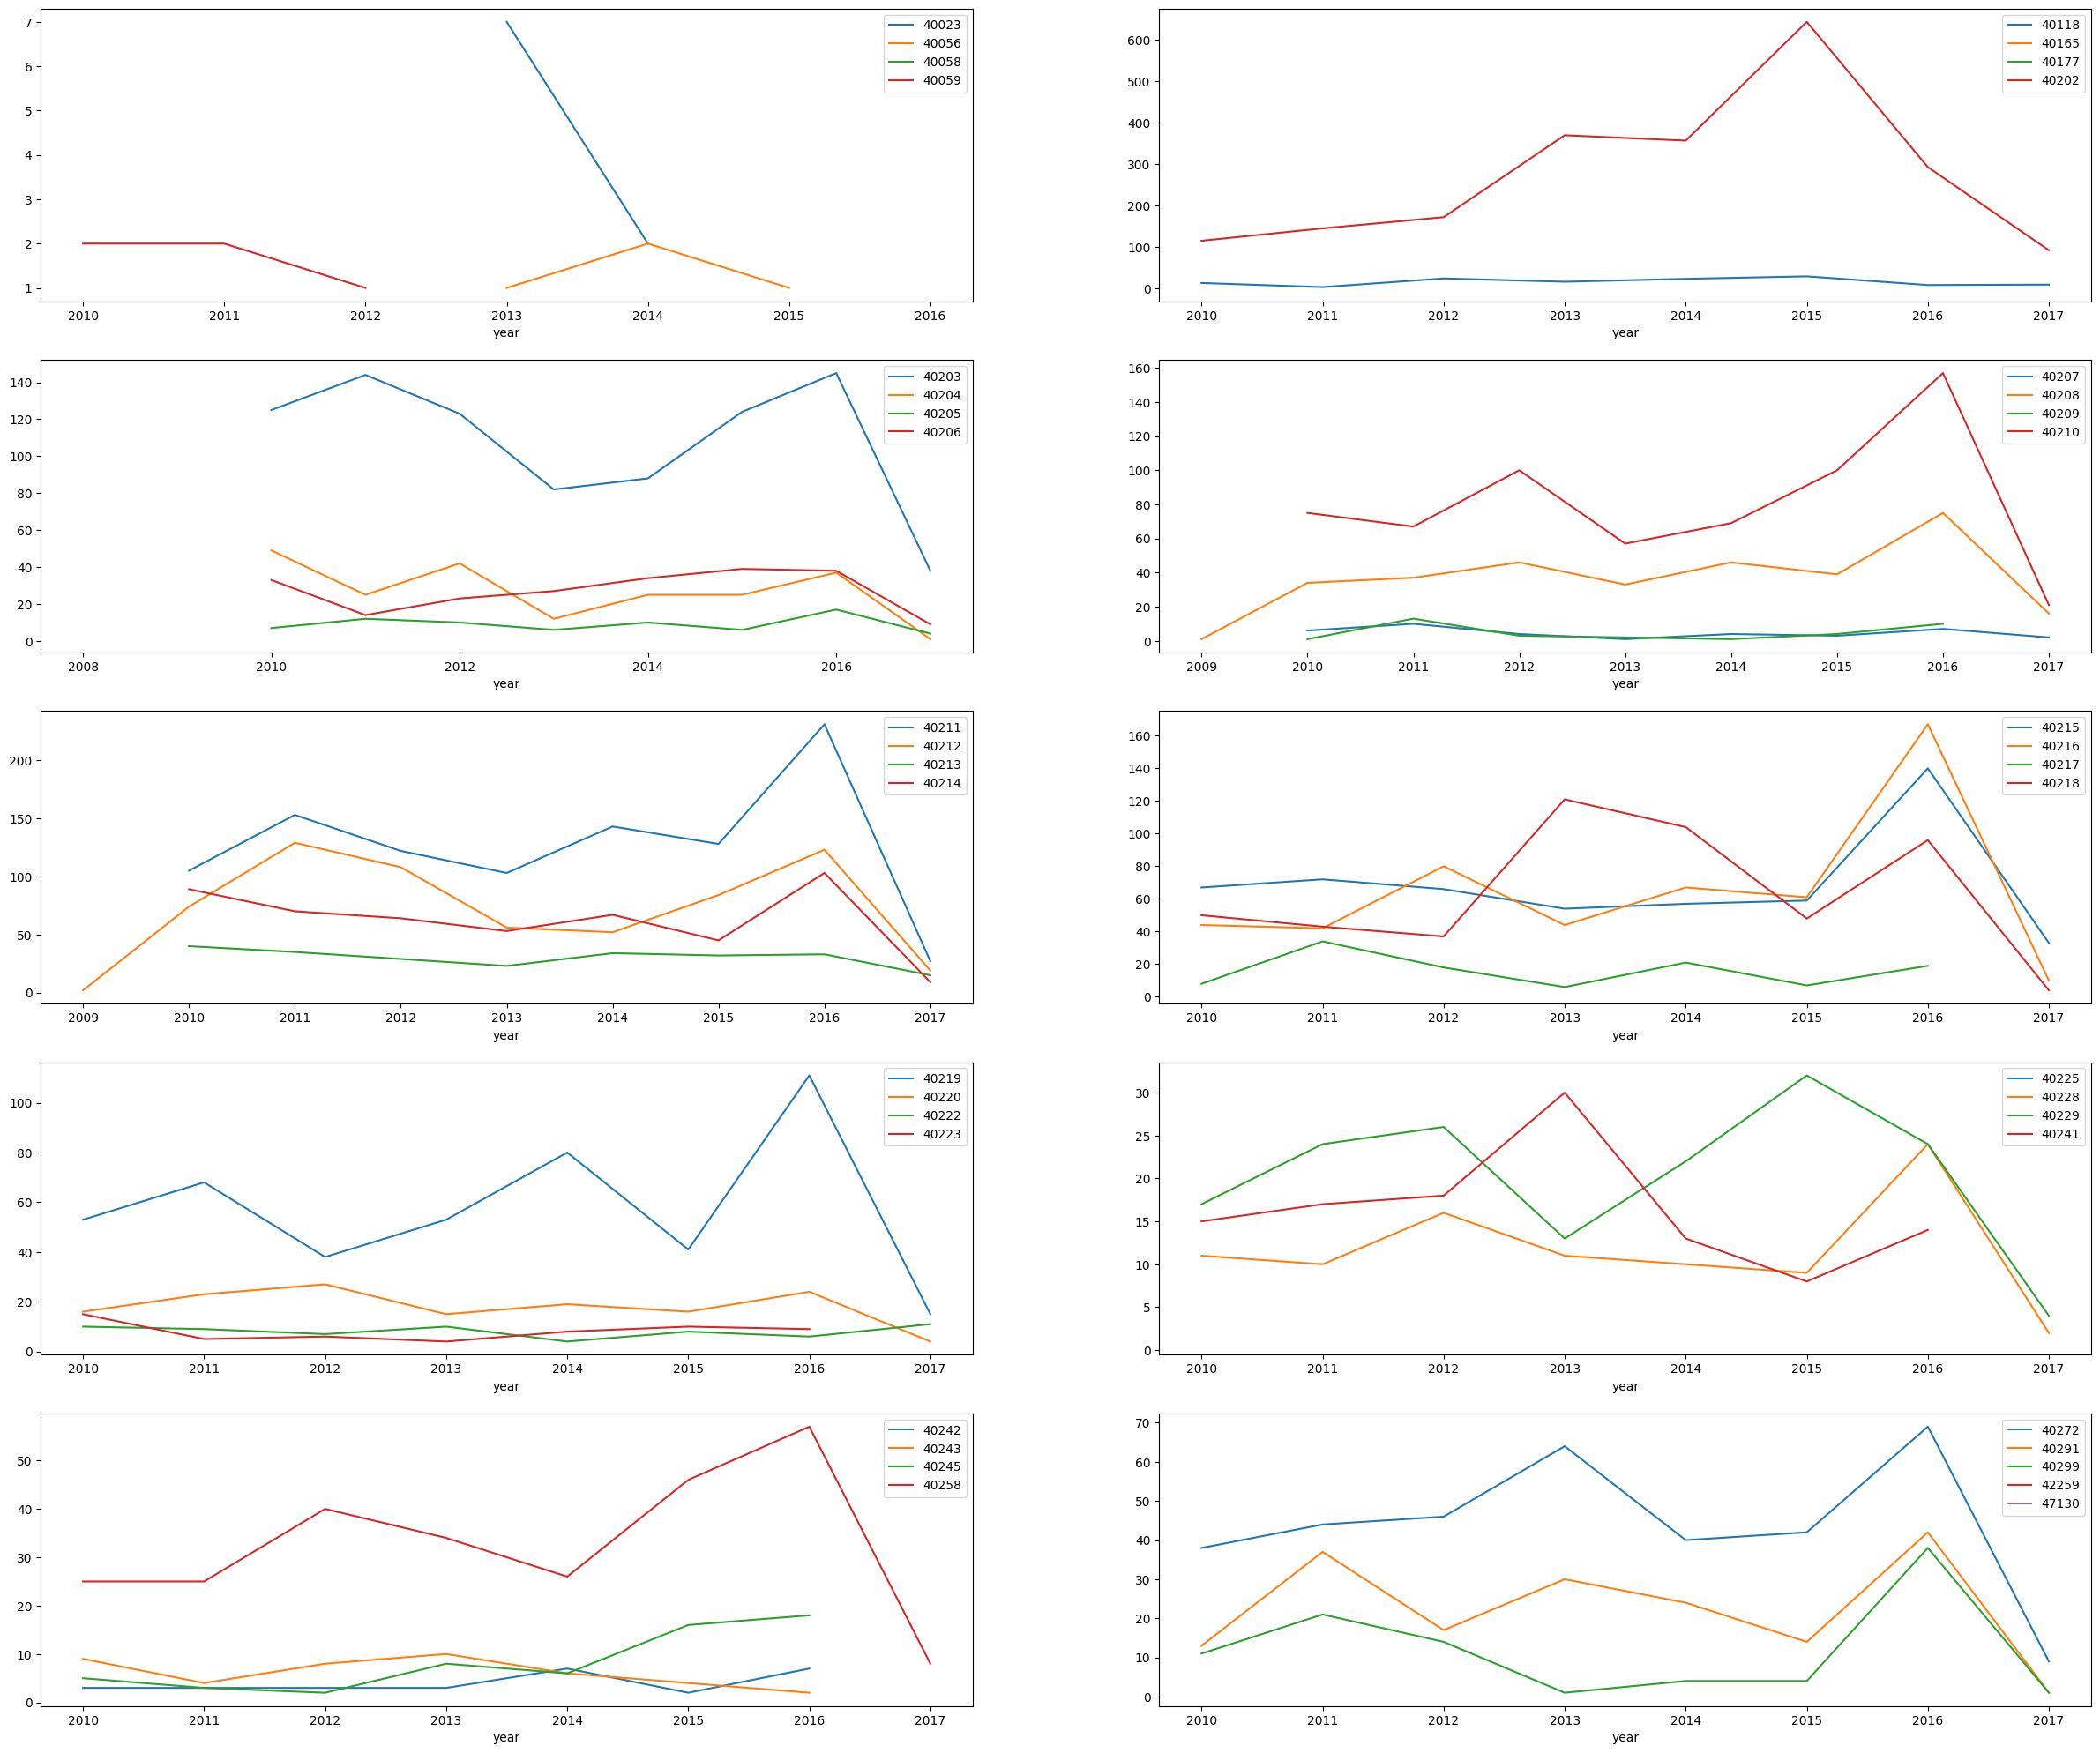

In [243]:
plt.figure(figsize = (30,25))
fig.subplots_adjust(hspace=0.5)
i = 1
for j in zip_list[::4]:
    axName = 'ax'+str(i)
    axName = plt.subplot(5,2,i)
    zipcode_indiv_data_plot(j, axName)
    if(i<10):
        i += 1
plt.savefig('./CompiledImages/zipcode_trend_uneven.png')

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\743525792.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[zipc] = df['year']
C:\Users\chris\AppData\Local\Temp\ipykernel_24012\743525792.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[['zipcode']], axis=1, inplace= True)
C:\Users\chris\AppData\Local\Temp\ipykernel_24012\743525792.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

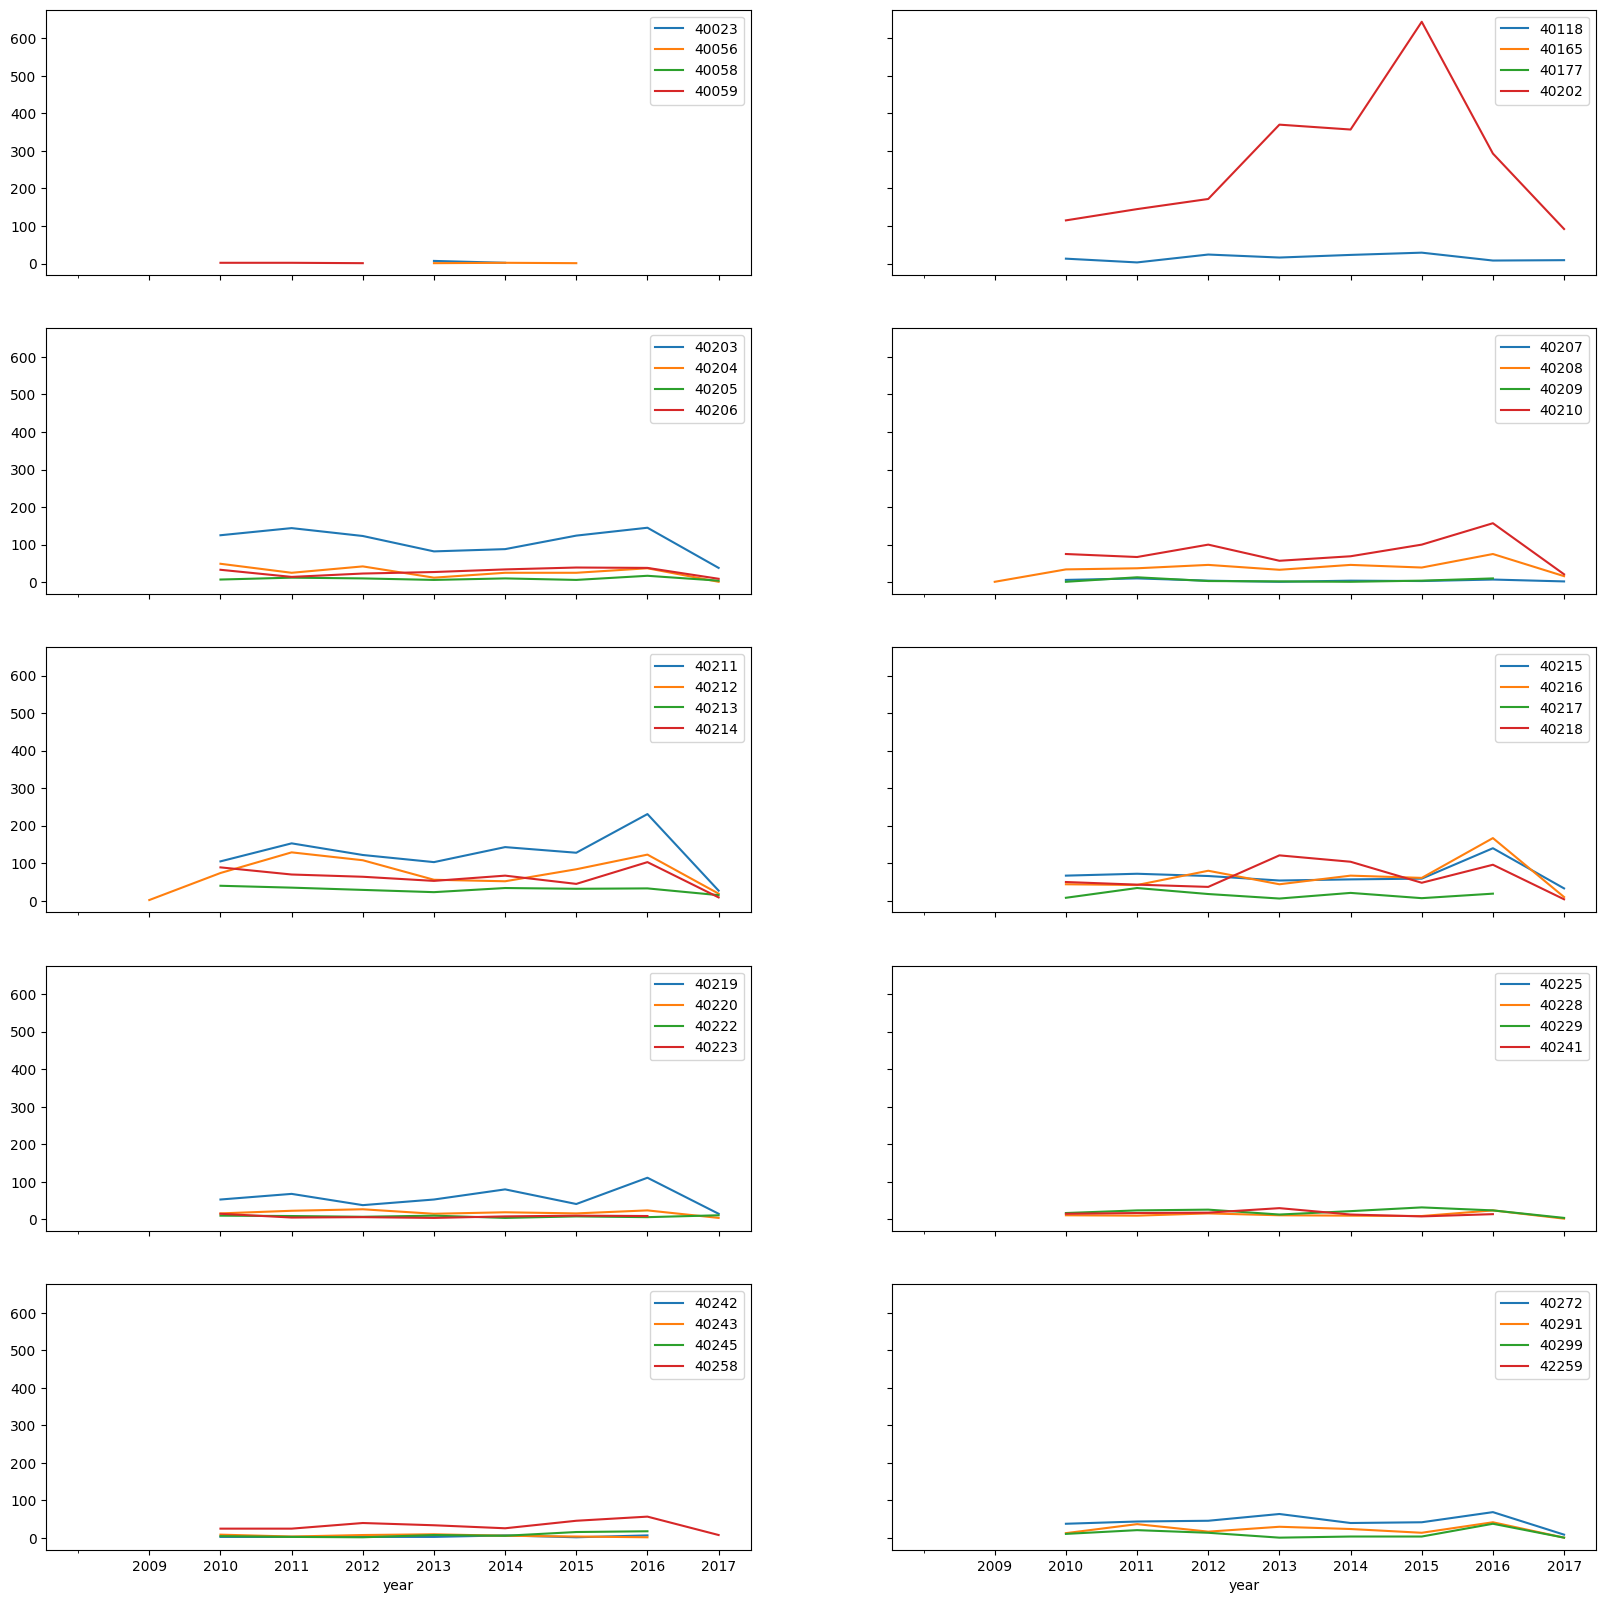

In [244]:
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(20,20))
axes_list = [item for sublist in axes for item in sublist] 

for j in zip_list[::4]:
    if(len(axes_list)>0):
        axName = axes_list.pop(0)
        zipcode_indiv_data_plot(j, axName)
plt.savefig('./CompiledImages/zipcode_trend_shared.png')

## Plotting Race and UCR Category

In [245]:
firearm_data_race_ucr = firearm_data[['person_recovered_from_race', 'ucr_category']]

In [246]:
firearm_data_race_ucr['count_of_incidents'] = firearm_data_race_ucr['ucr_category']

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\1175286925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data_race_ucr['count_of_incidents'] = firearm_data_race_ucr['ucr_category']


In [247]:
firearm_data_race_ucr = firearm_data_race_ucr.groupby(['ucr_category', 'person_recovered_from_race']).count()

In [248]:
firearm_data_race_ucr

count_of_incidents
ucr_category        person_recovered_from_race                    
Accidental_Shooting Black                                       14
                    White                                        9
Aggravated_Assault  Asian                                        9
                    Black                                      682
                    Hispanic                                    29
...                                                            ...
Wpns_Law_Violation  Black                                     2924
                    Hispanic                                    43
                    Middle_Eastern                               1
                    Native_American                              1
                    White                                     1023

[82 rows x 1 columns]

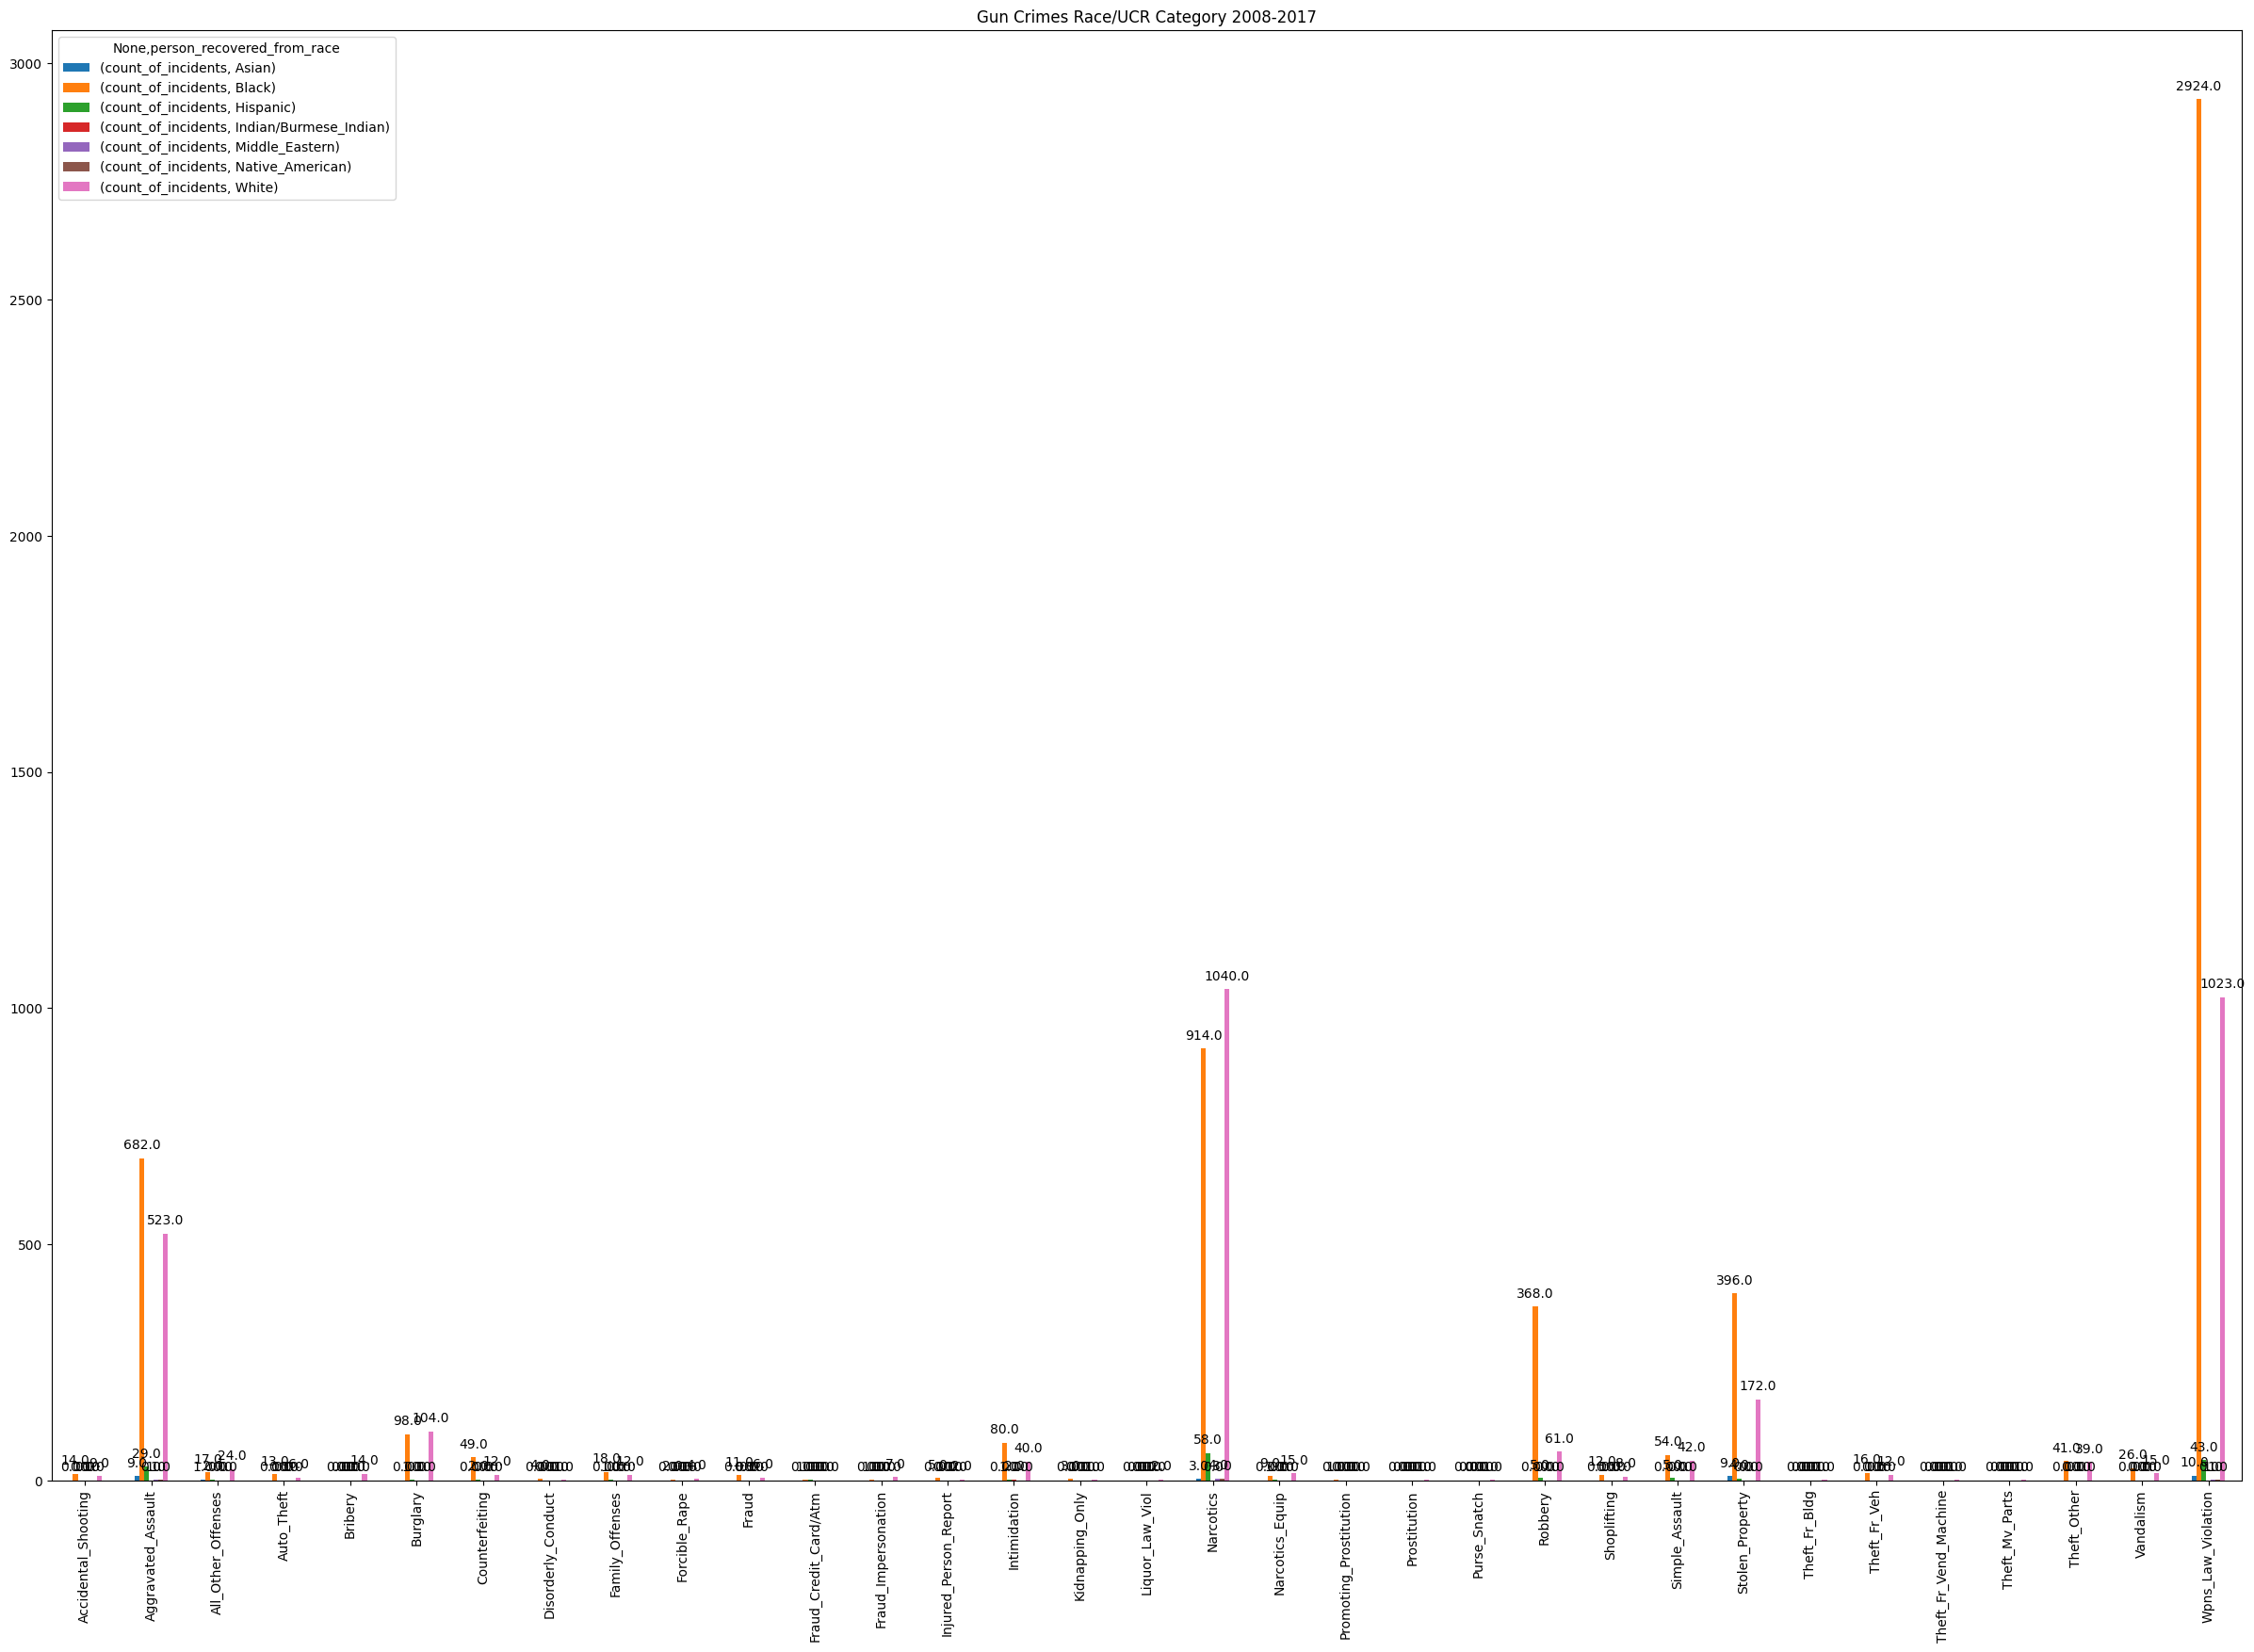

In [249]:
ax23 = firearm_data_race_ucr.unstack().plot(kind='bar', xlabel='', title='Gun Crimes Race/UCR Category 2008-2017', figsize = (30,20))
for p in ax23.patches:
    ax23.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('./CompiledImages/count_race_ucr_unstacked.png')

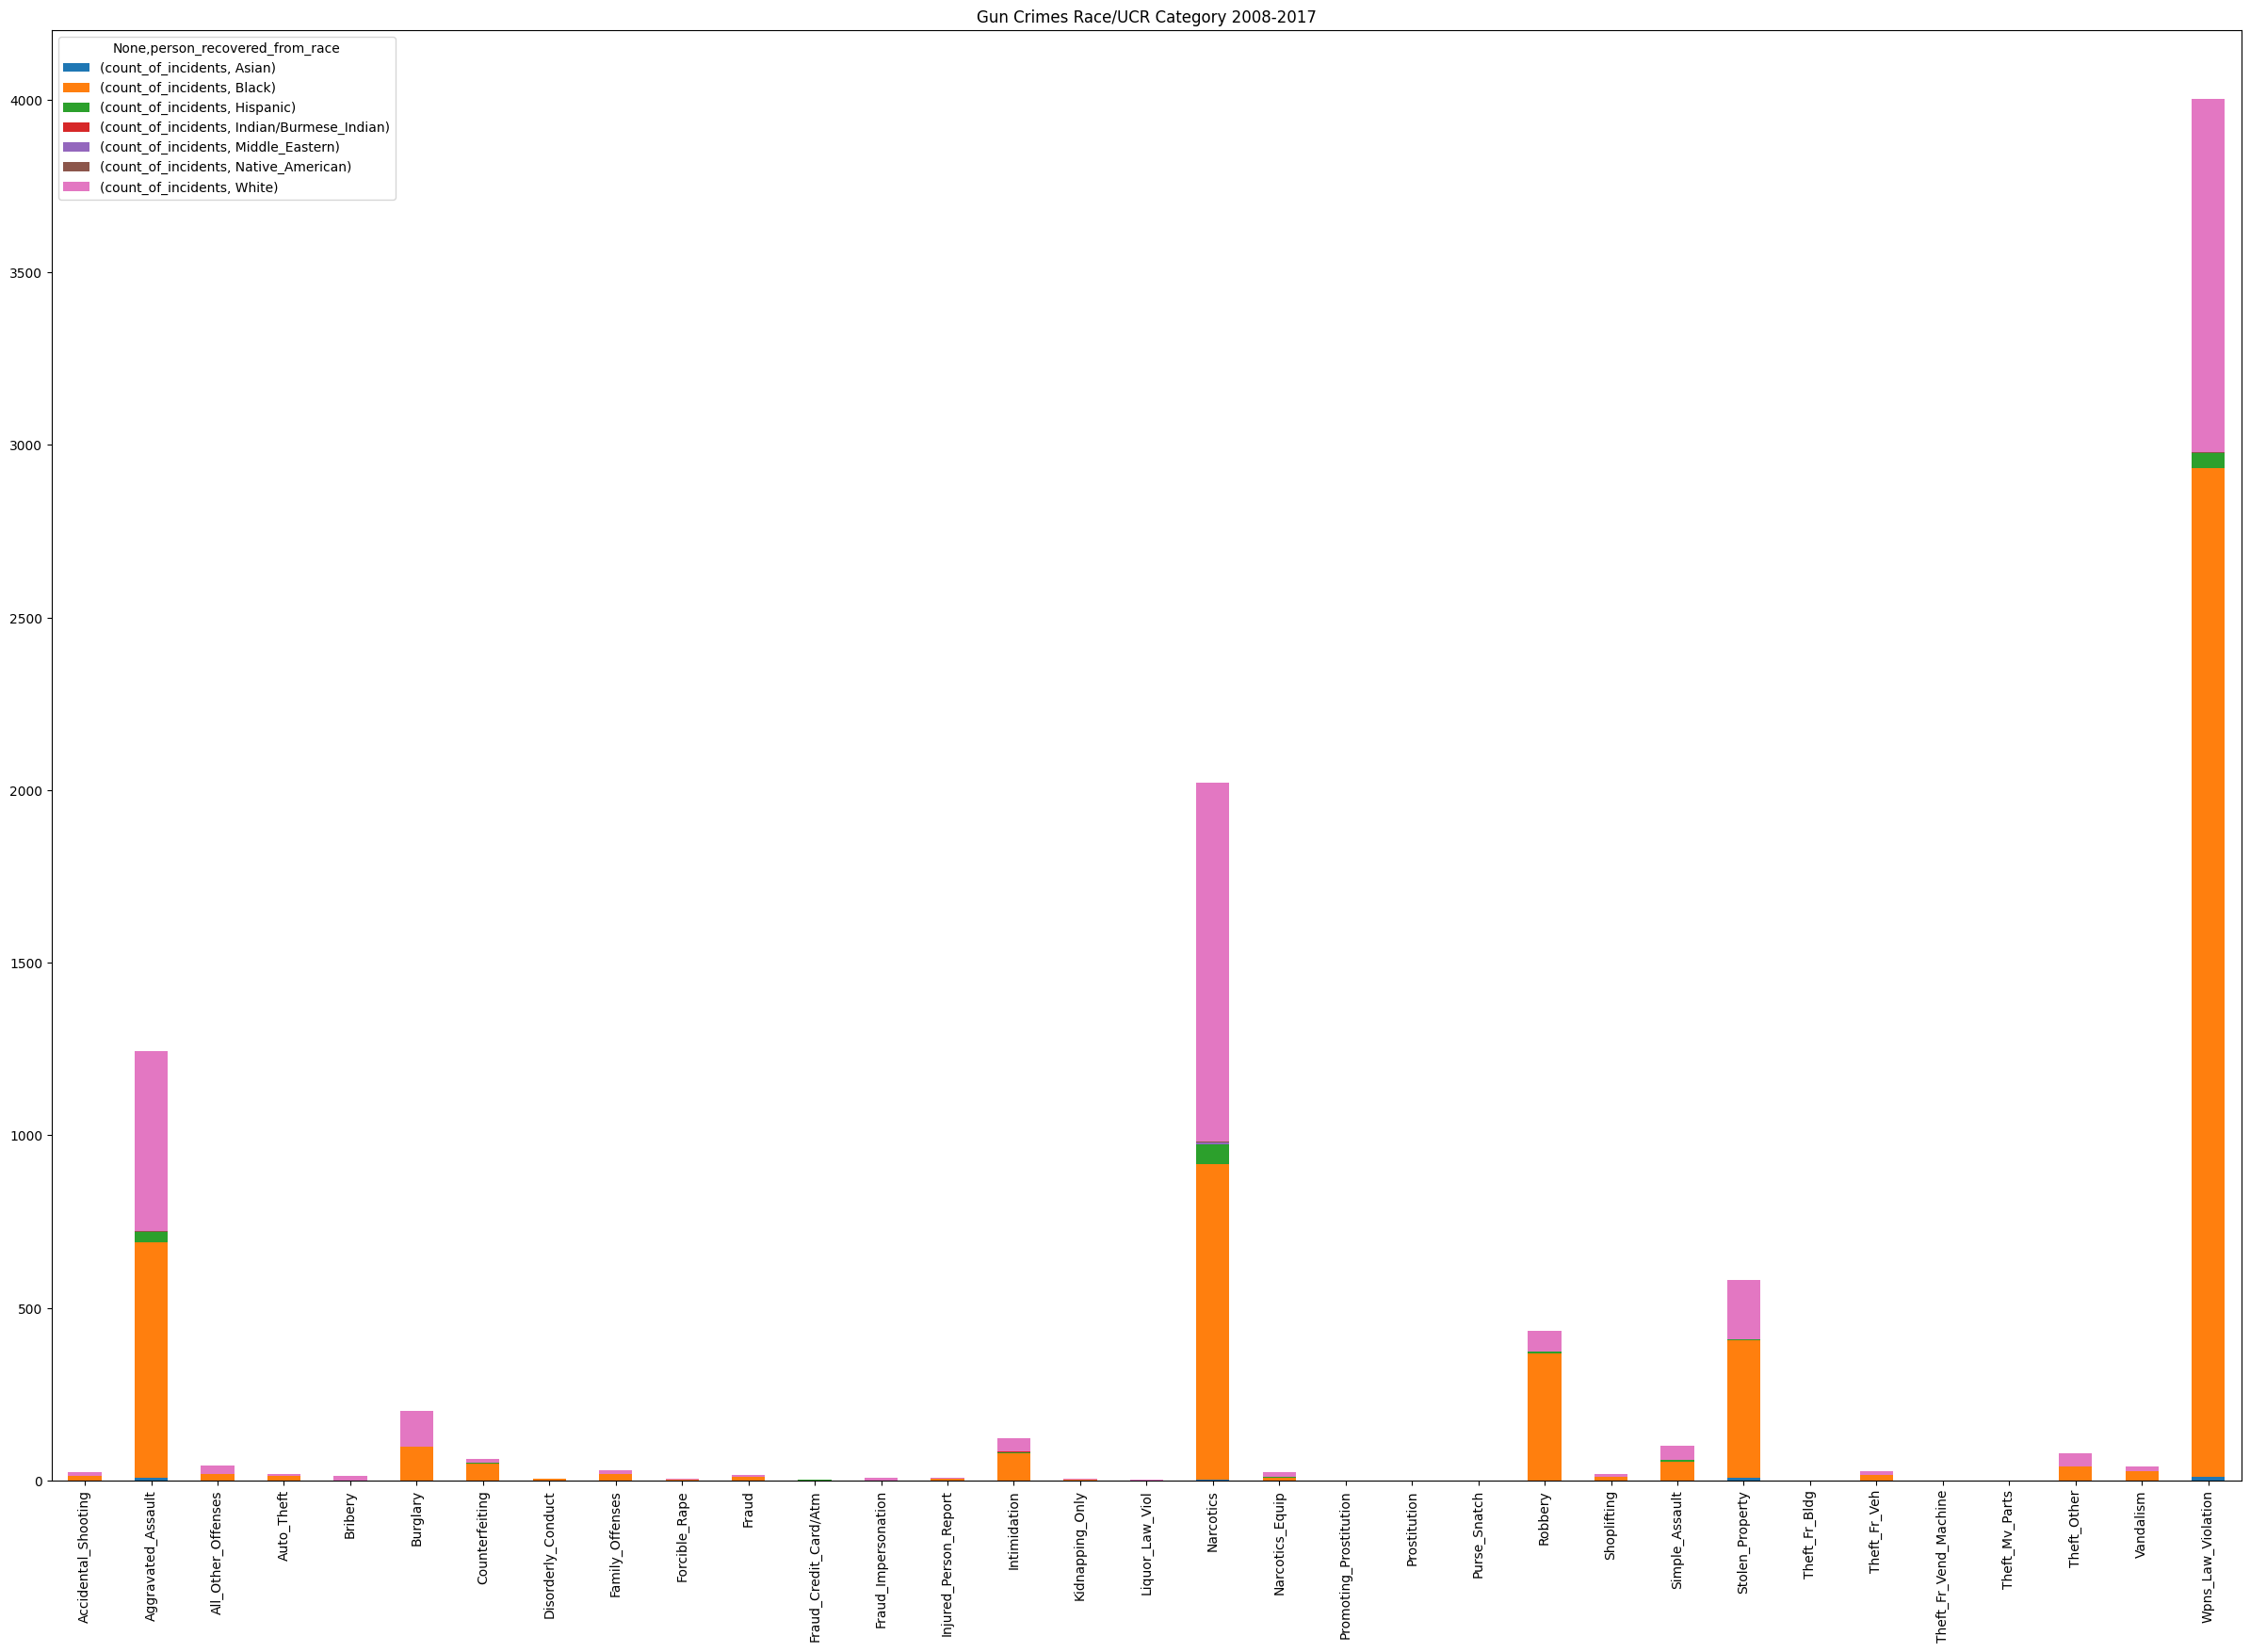

In [250]:
ax25 = firearm_data_race_ucr.unstack().plot(kind='bar', xlabel='', title='Gun Crimes Race/UCR Category 2008-2017', figsize = (30,20), stacked = True)
plt.savefig('./CompiledImages/count_race_ucr_stacked.png')

### Race and UCR Category Log

In [251]:
firearm_data_race_ucr_log = firearm_data_race_ucr
firearm_data_race_ucr_log['log_values'] = np.log(firearm_data_race_ucr['count_of_incidents'])
firearm_data_race_ucr_log = firearm_data_race_ucr_log[firearm_data_race_ucr_log['log_values'] != 0]

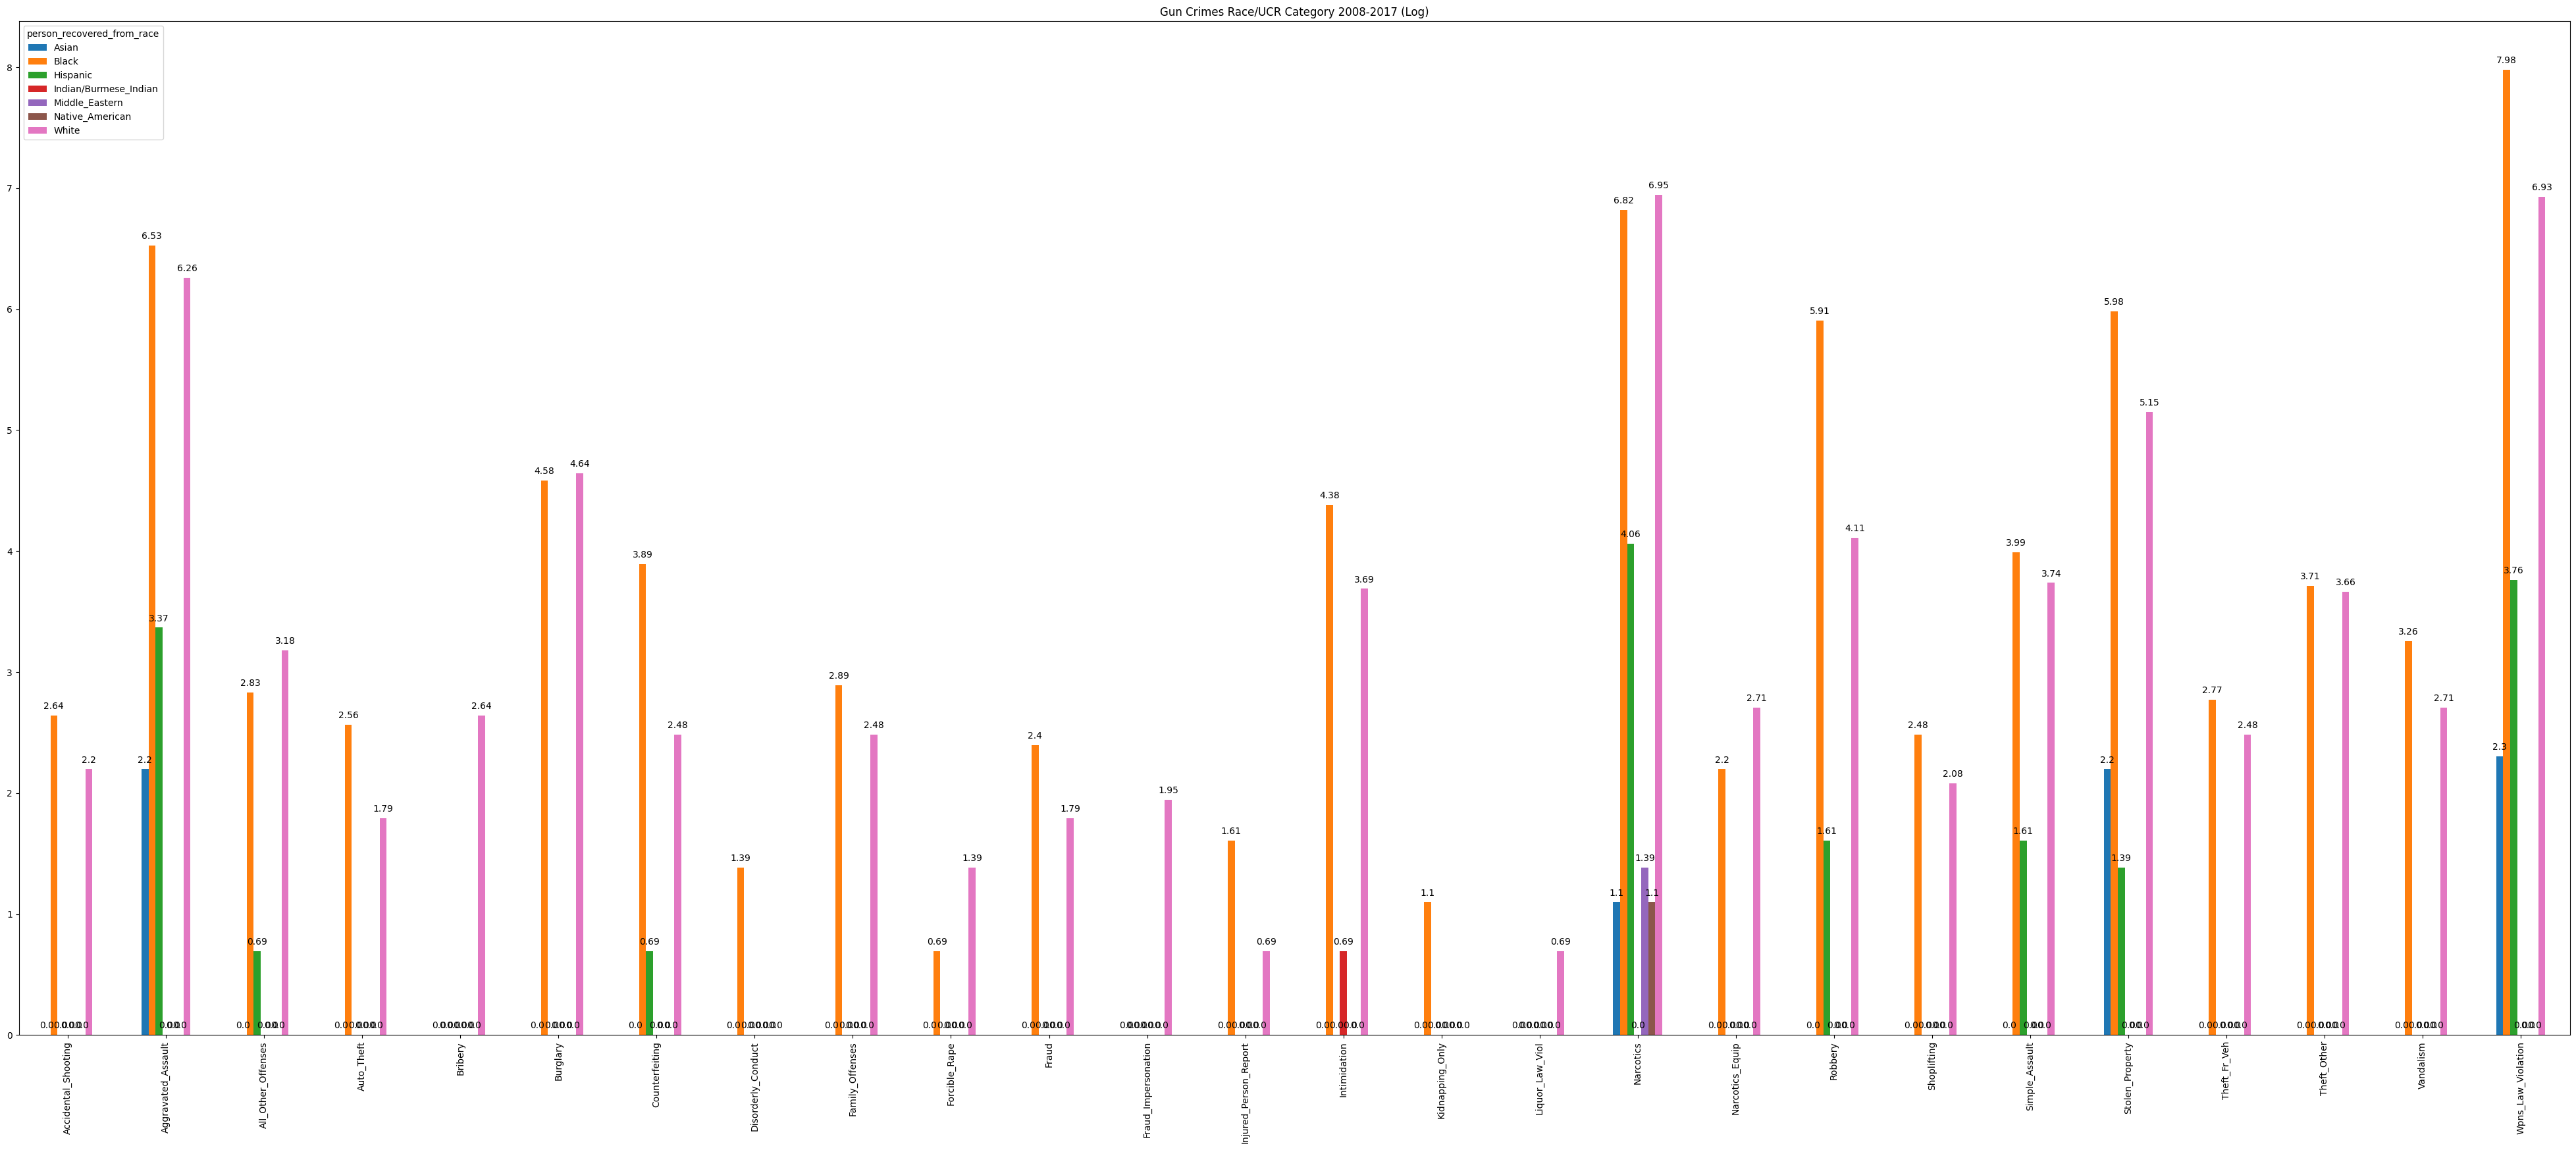

In [252]:
ax24 = firearm_data_race_ucr_log['log_values'].unstack().plot(kind='bar', xlabel='', title='Gun Crimes Race/UCR Category 2008-2017 (Log)', figsize = (50,20))
for p in ax24.patches:
    ax24.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('./CompiledImages/count_race_ucr_log_unstacked.png')

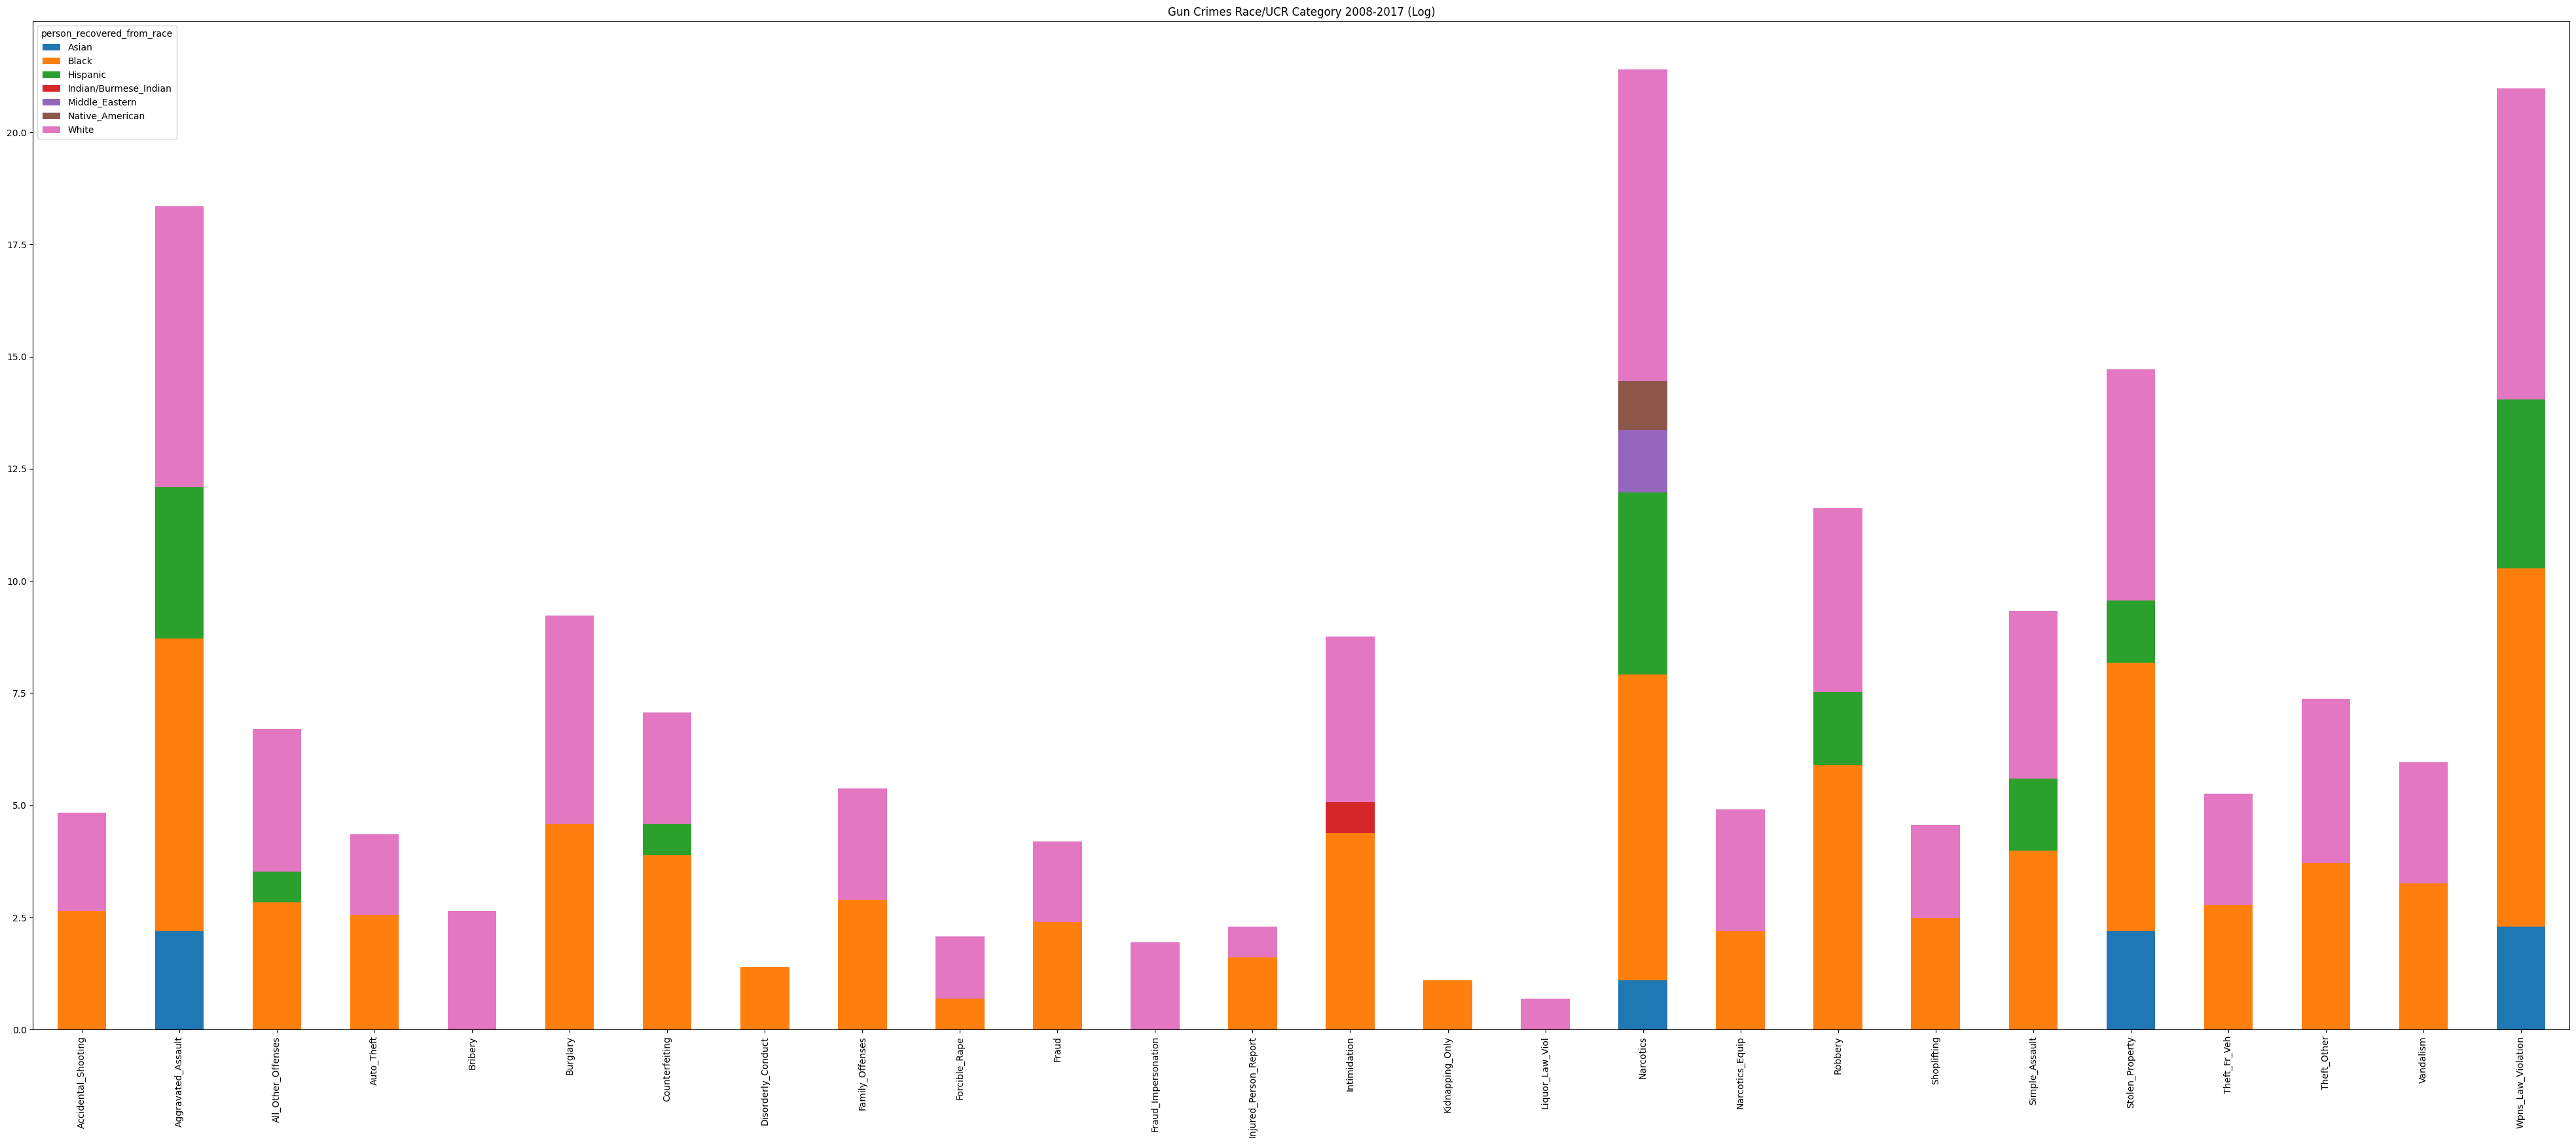

In [253]:
ax26 = firearm_data_race_ucr_log['log_values'].unstack().plot(kind='bar', xlabel='', title='Gun Crimes Race/UCR Category 2008-2017 (Log)', figsize = (50,20), stacked = True)
plt.savefig('./CompiledImages/count_race_ucr_log_stacked.png')

## Plotting UCR Category and Year

In [254]:
firearm_data_year_ucr = firearm_data[['year', 'ucr_category']]

In [255]:
firearm_data_year_ucr['count_of_incidents'] = firearm_data_year_ucr['ucr_category']

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\3948414825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data_year_ucr['count_of_incidents'] = firearm_data_year_ucr['ucr_category']


In [256]:
firearm_data_year_ucr = firearm_data_year_ucr.groupby(['ucr_category', 'year']).count()

In [257]:
firearm_data_year_ucr

count_of_incidents
ucr_category        year                    
Accidental_Shooting 2010                   7
                    2011                   6
                    2012                   6
                    2013                   6
                    2014                   3
...                                      ...
Wpns_Law_Violation  2013                 532
                    2014                 555
                    2015                 747
                    2016                 853
                    2017                 167

[205 rows x 1 columns]

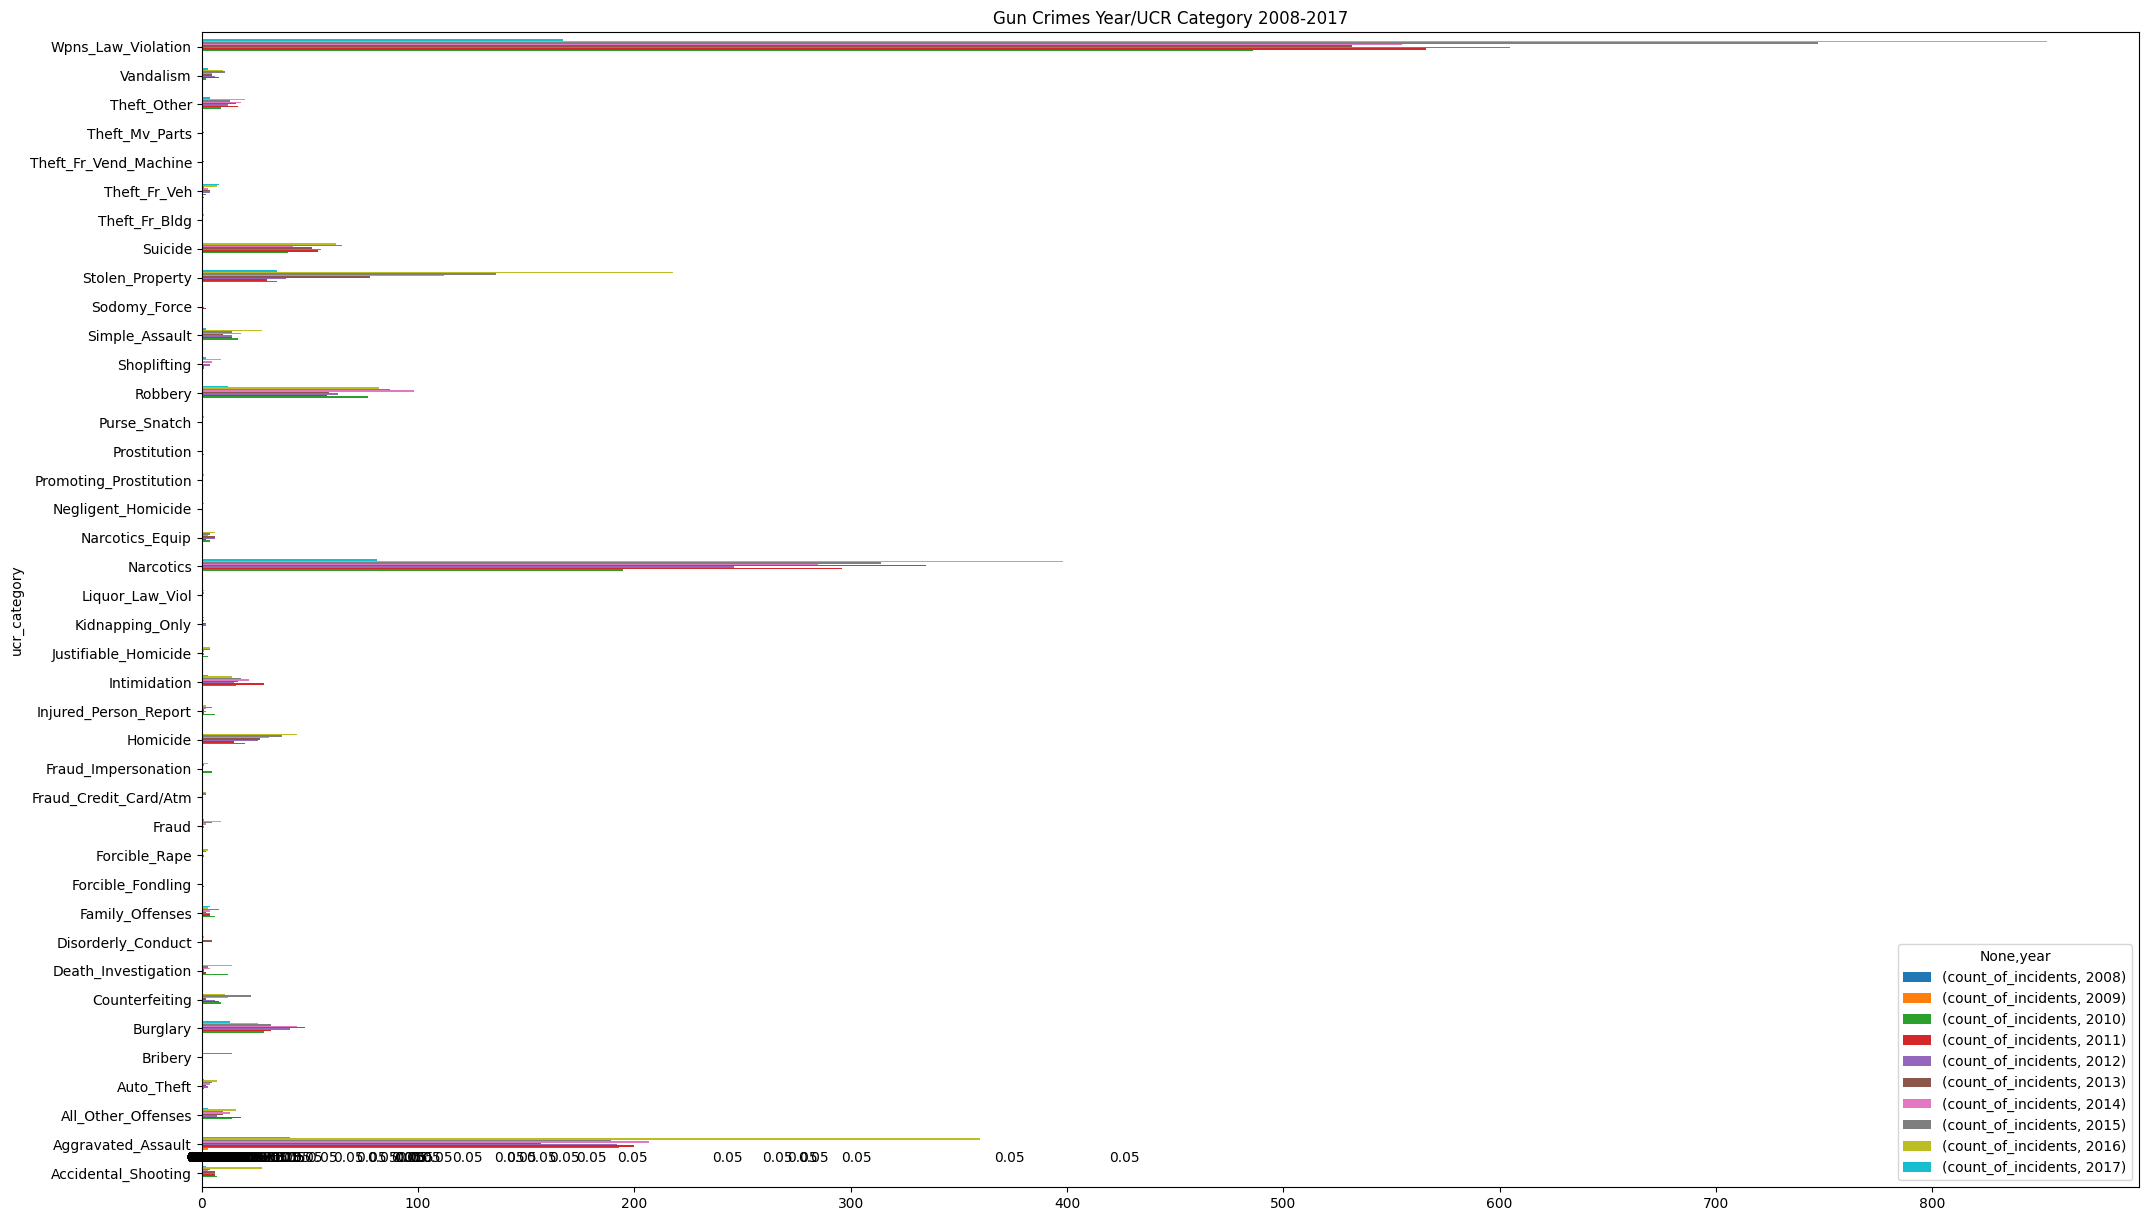

In [258]:
ax27 = firearm_data_year_ucr.unstack().plot(kind='barh', xlabel='', title='Gun Crimes Year/UCR Category 2008-2017', figsize = (25,15))
for p in ax27.patches:
    ax27.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('./CompiledImages/count_year_ucr_unstacked.png')

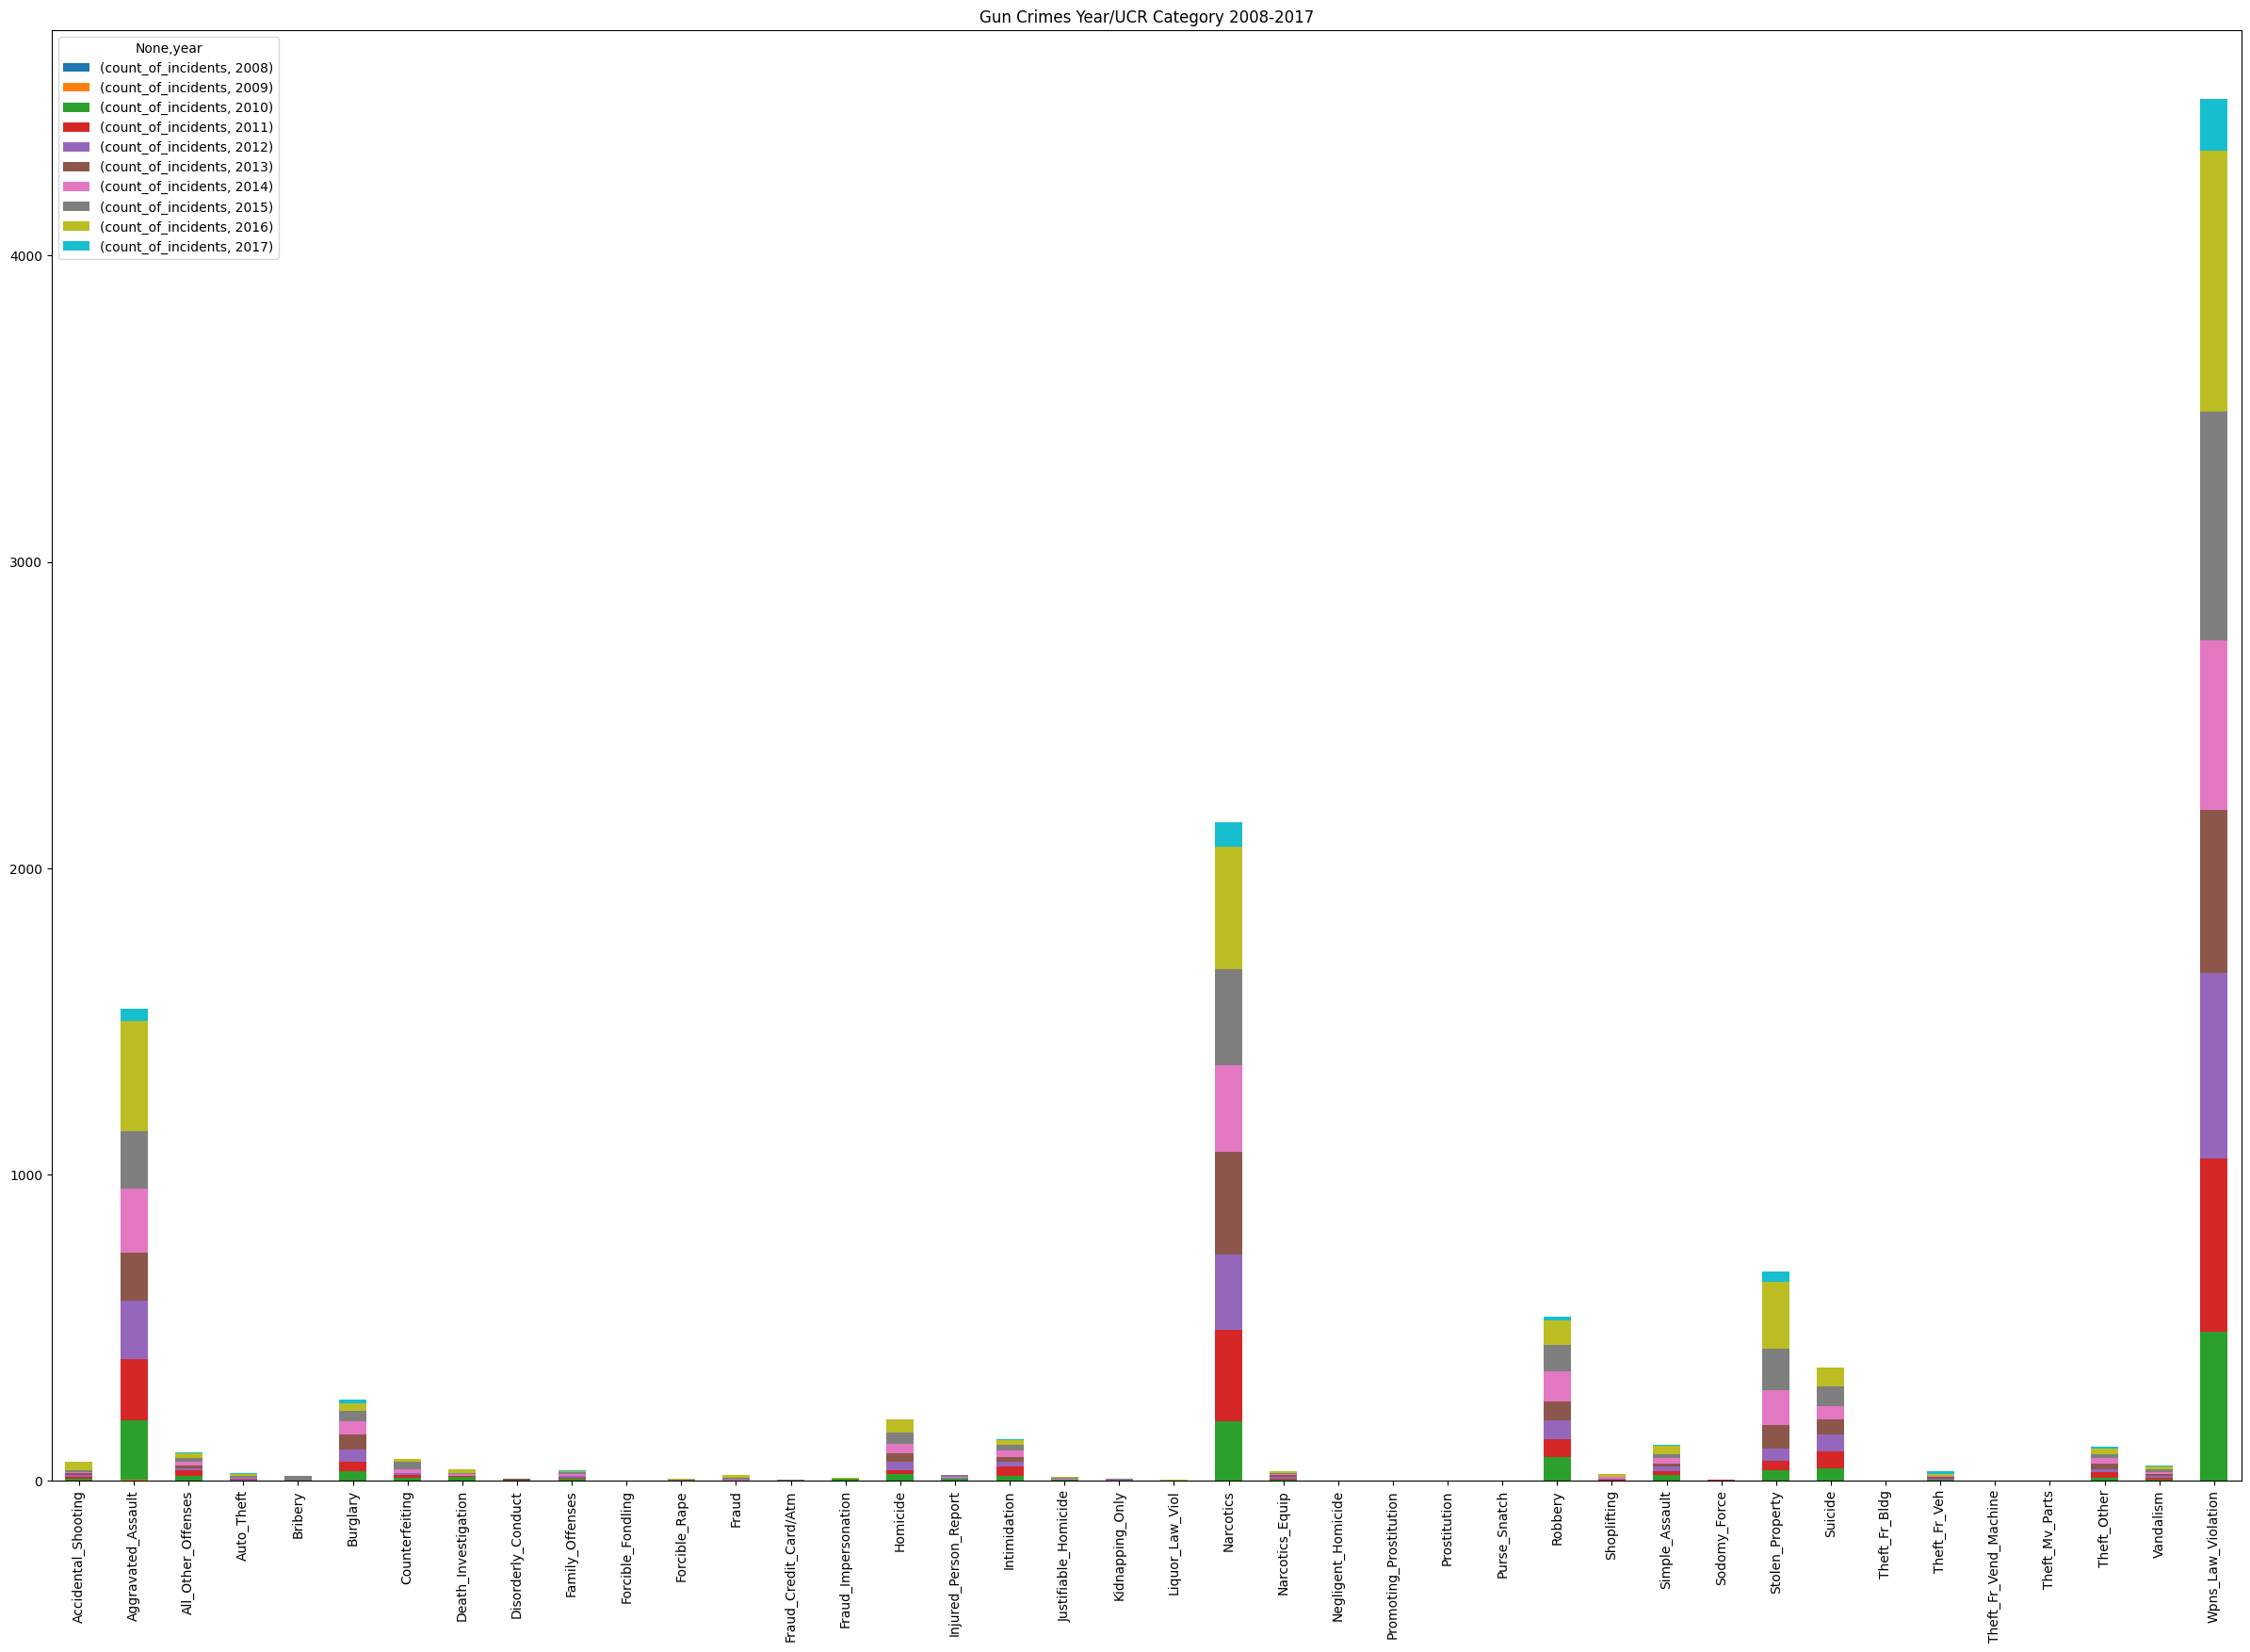

In [259]:
ax28 = firearm_data_year_ucr.unstack().plot(kind='bar', xlabel='', title='Gun Crimes Year/UCR Category 2008-2017', figsize = (30,20), stacked = True)
plt.savefig('./CompiledImages/count_year_ucr_stacked.png')

### Year and UCR Category

In [260]:
firearm_data_ucr_year = firearm_data[['ucr_category', 'year']]

In [261]:
firearm_data_ucr_year['count_of_incidents'] = firearm_data_ucr_year['ucr_category']

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\4088957202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data_ucr_year['count_of_incidents'] = firearm_data_ucr_year['ucr_category']


In [262]:
firearm_data_ucr_year = firearm_data_ucr_year.groupby(['year', 'ucr_category']).count()

In [263]:
firearm_data_ucr_year

count_of_incidents
year ucr_category                           
2008 Theft_Fr_Veh                          1
2009 Aggravated_Assault                    3
2010 Accidental_Shooting                   7
     Aggravated_Assault                  193
     All_Other_Offenses                   14
...                                      ...
2017 Stolen_Property                      35
     Theft_Fr_Veh                          8
     Theft_Other                           4
     Vandalism                             3
     Wpns_Law_Violation                  167

[205 rows x 1 columns]

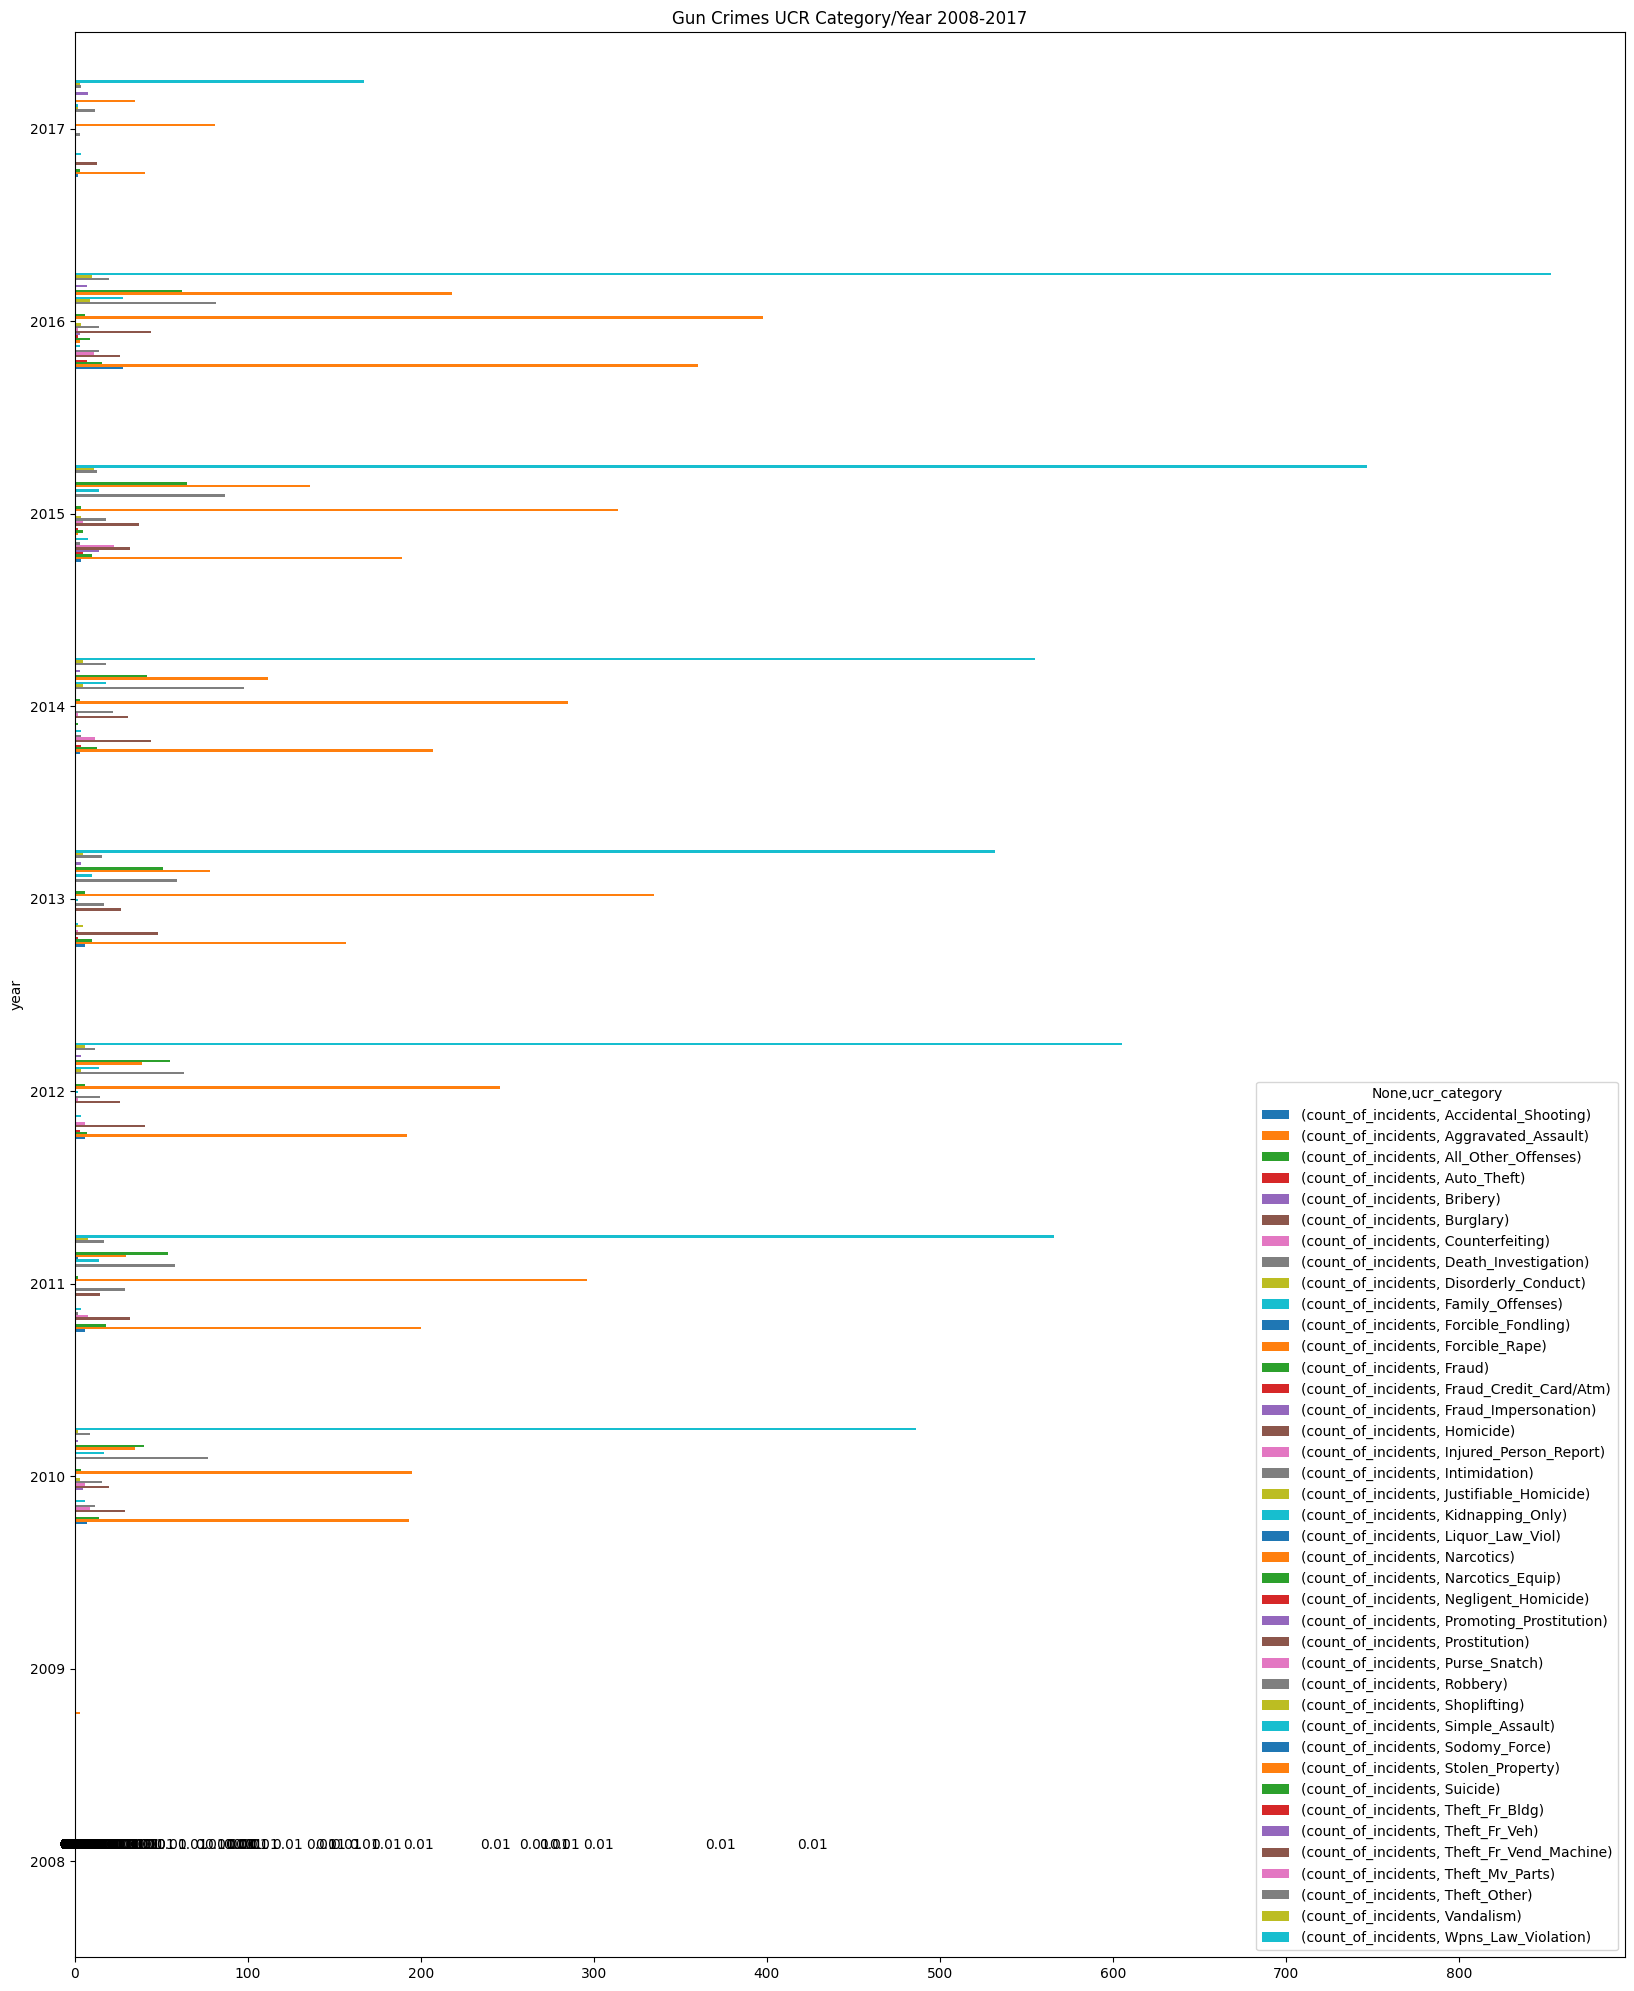

In [264]:
ax29 = firearm_data_ucr_year.unstack().plot(kind='barh', xlabel='', title='Gun Crimes UCR Category/Year 2008-2017', figsize = (20,25))
for p in ax29.patches:
    ax29.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('./CompiledImages/count_ucr_year_unstacked.png')

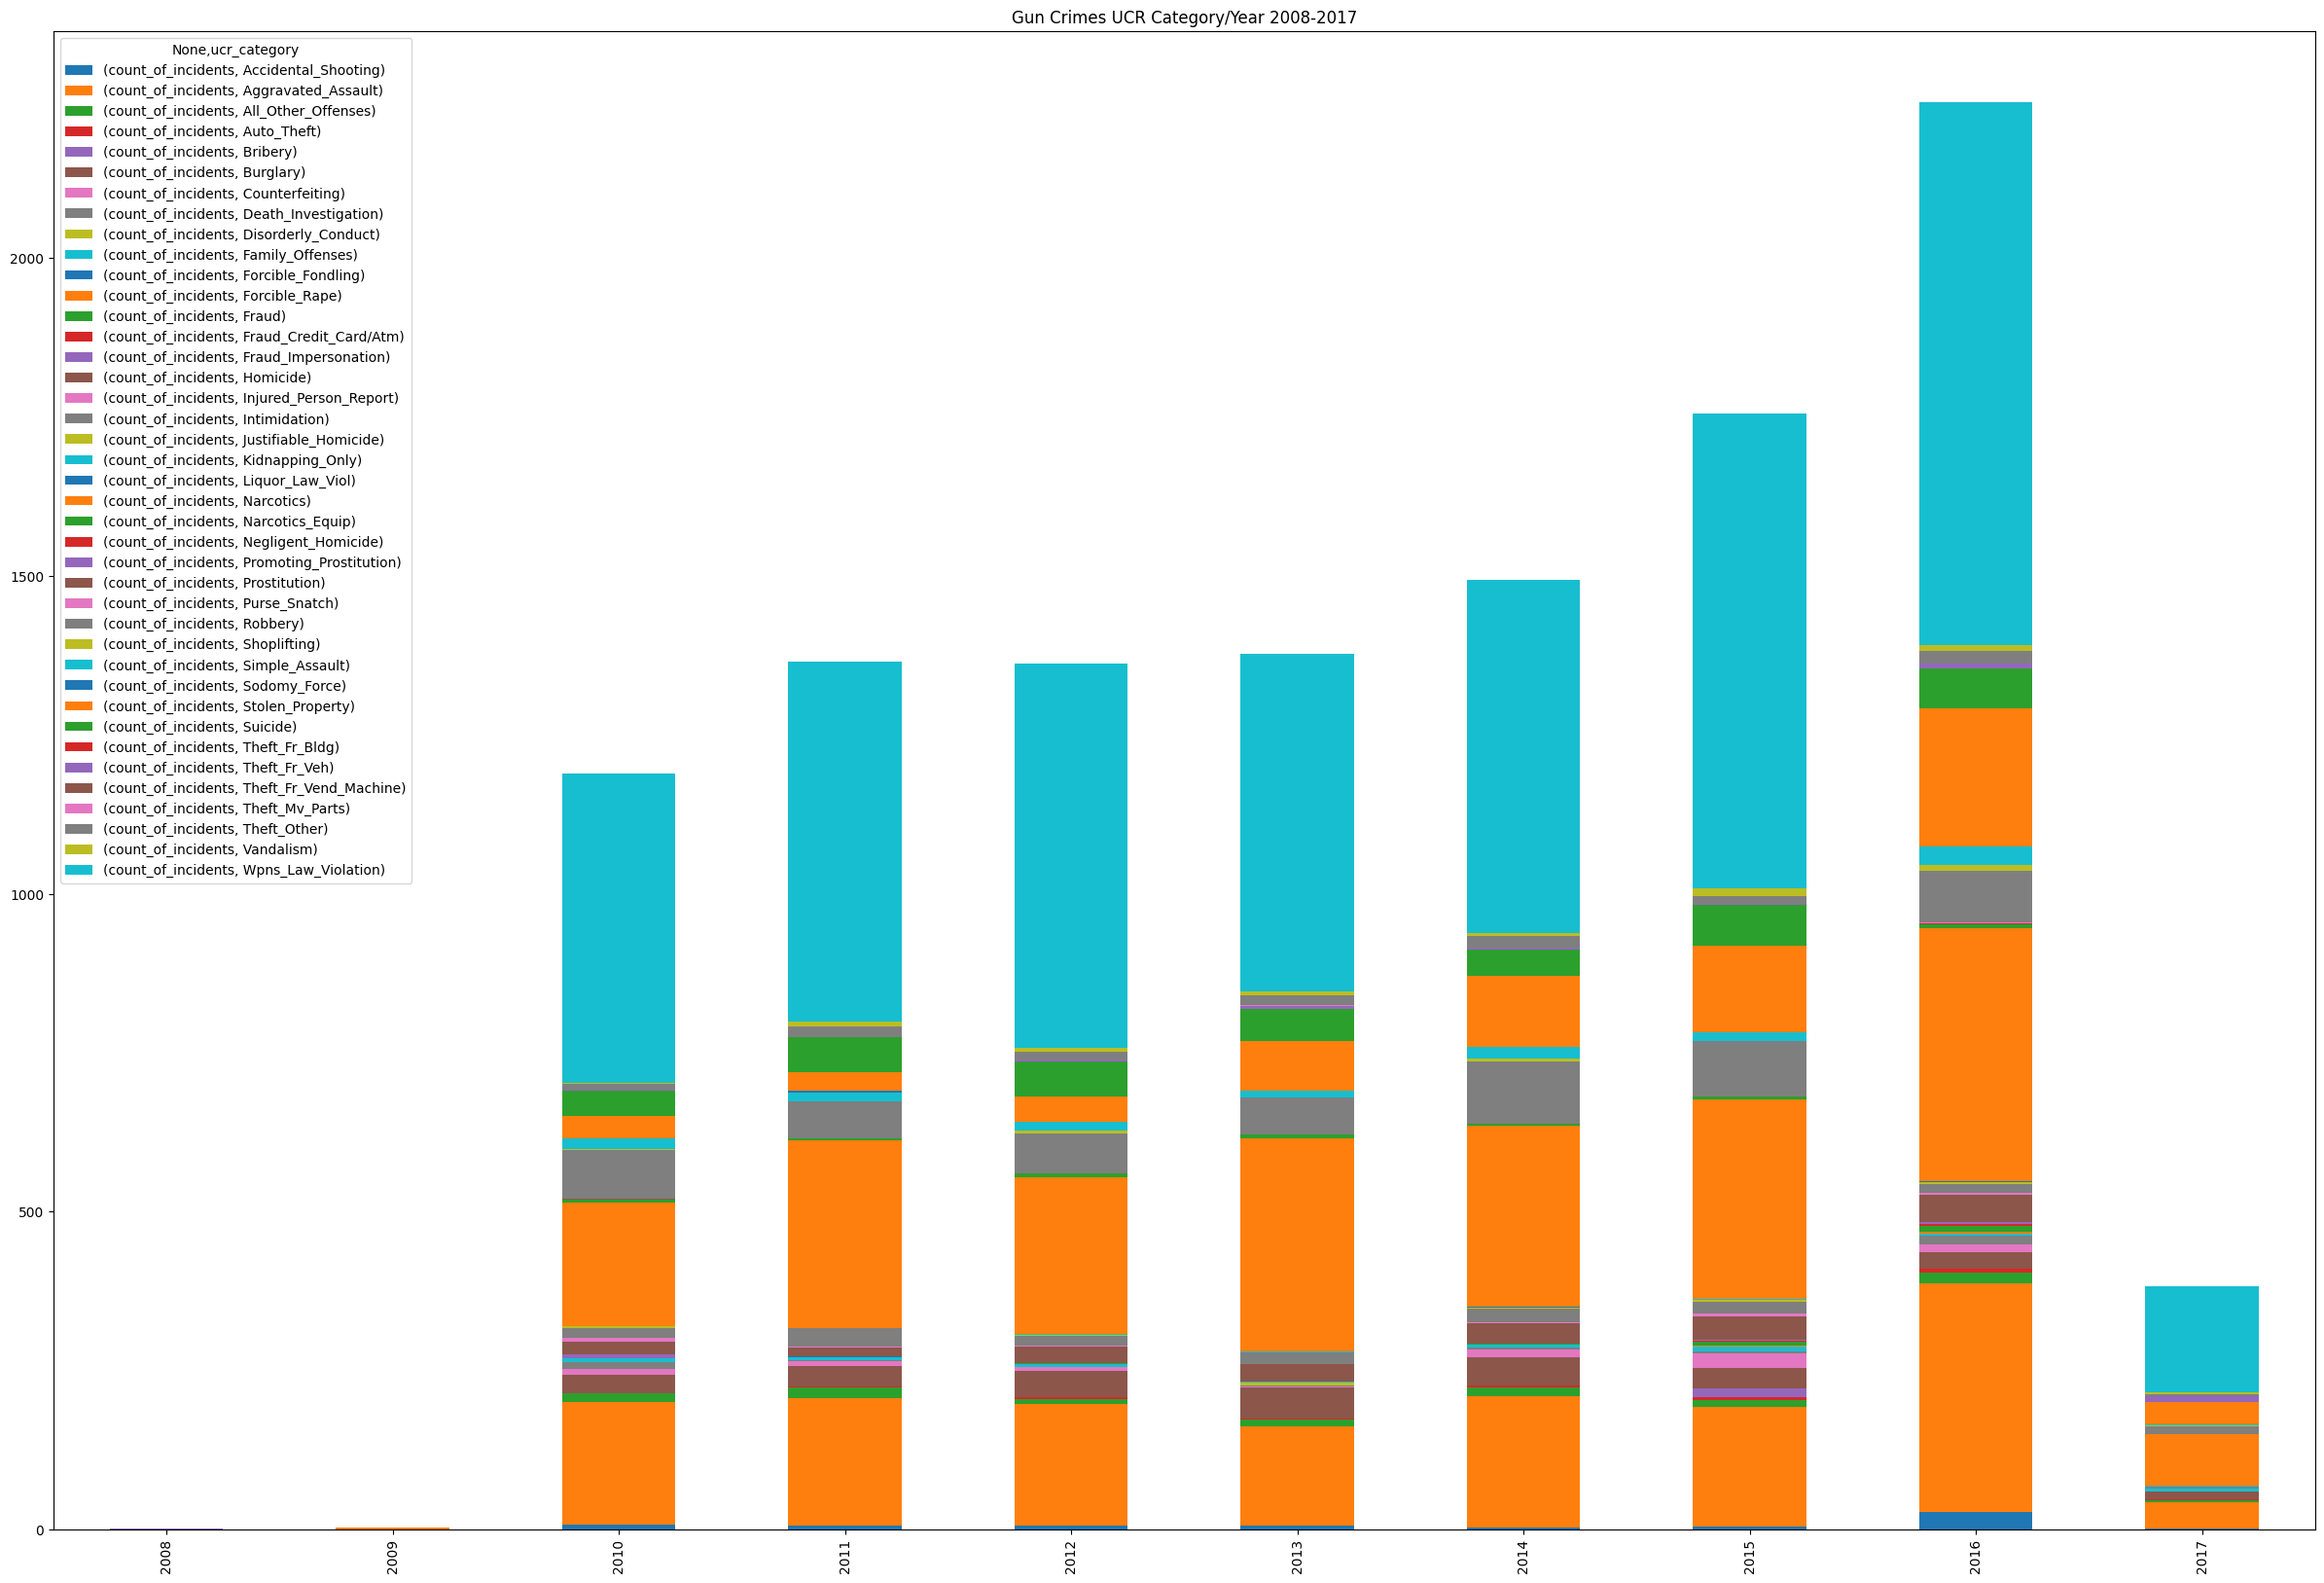

In [265]:
ax28 = firearm_data_ucr_year.unstack().plot(kind='bar', xlabel='', title='Gun Crimes UCR Category/Year 2008-2017', figsize = (30,20), stacked = True)
plt.savefig('./CompiledImages/count_ucr_year_stacked.png')

### Race and UCR Category Log

In [266]:
firearm_data_race_ucr_log = firearm_data_race_ucr
firearm_data_race_ucr_log['log_values'] = np.log(firearm_data_race_ucr['count_of_incidents'])
firearm_data_race_ucr_log = firearm_data_race_ucr_log[firearm_data_race_ucr_log['log_values'] != 0]

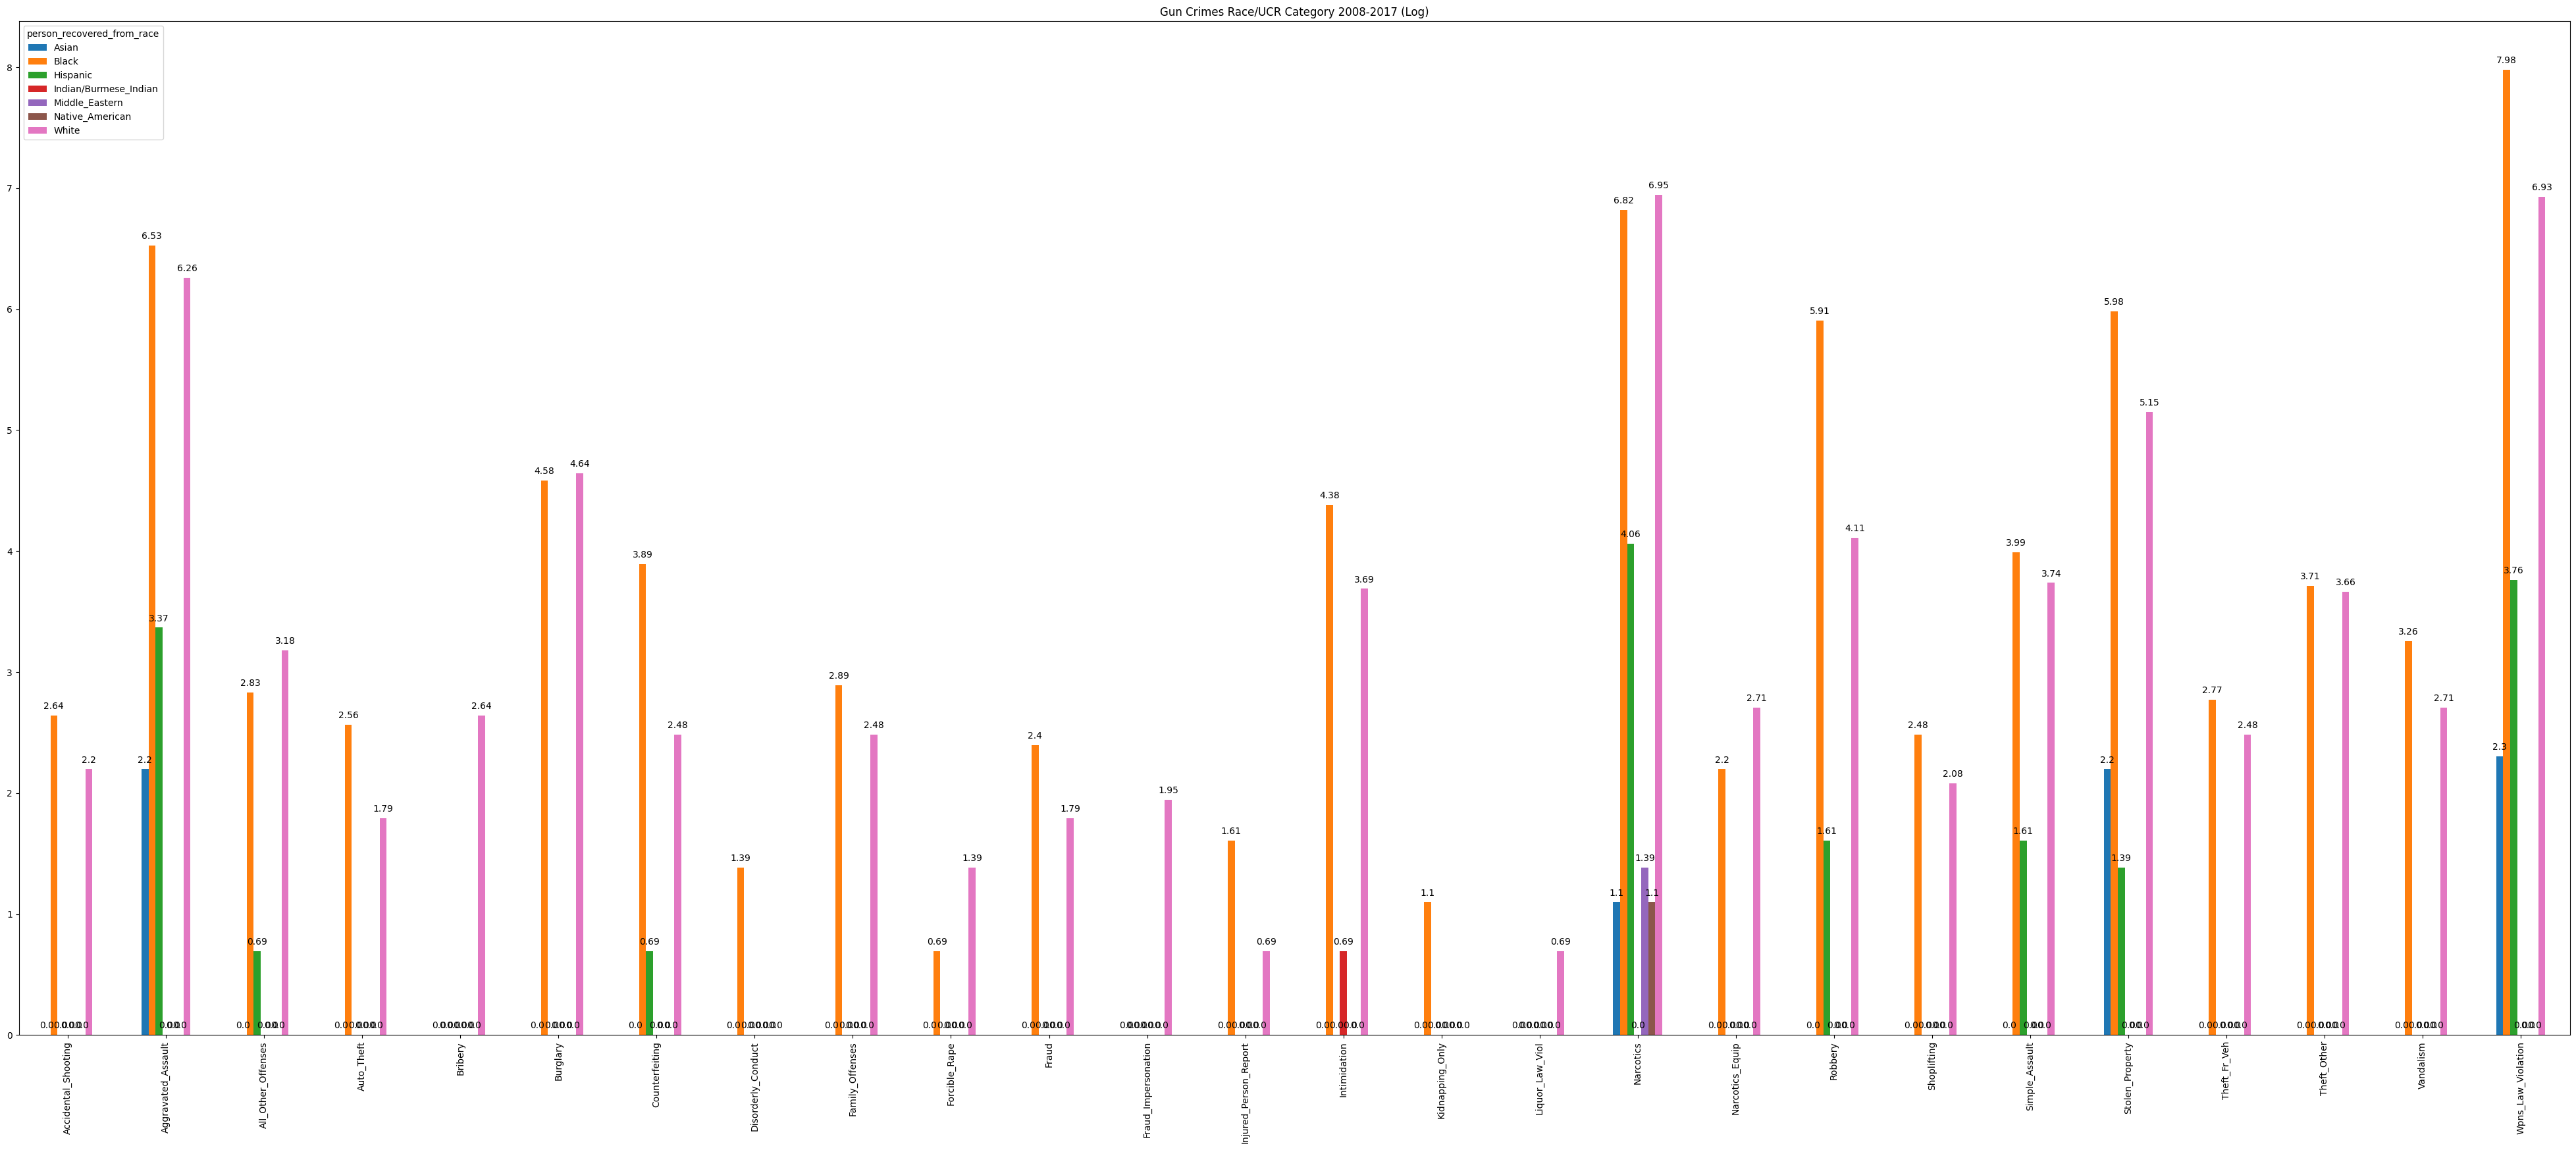

In [267]:
ax24 = firearm_data_race_ucr_log['log_values'].unstack().plot(kind='bar', xlabel='', title='Gun Crimes Race/UCR Category 2008-2017 (Log)', figsize = (50,20))
for p in ax24.patches:
    ax24.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('./CompiledImages/count_race_ucr_log_unstacked.png')

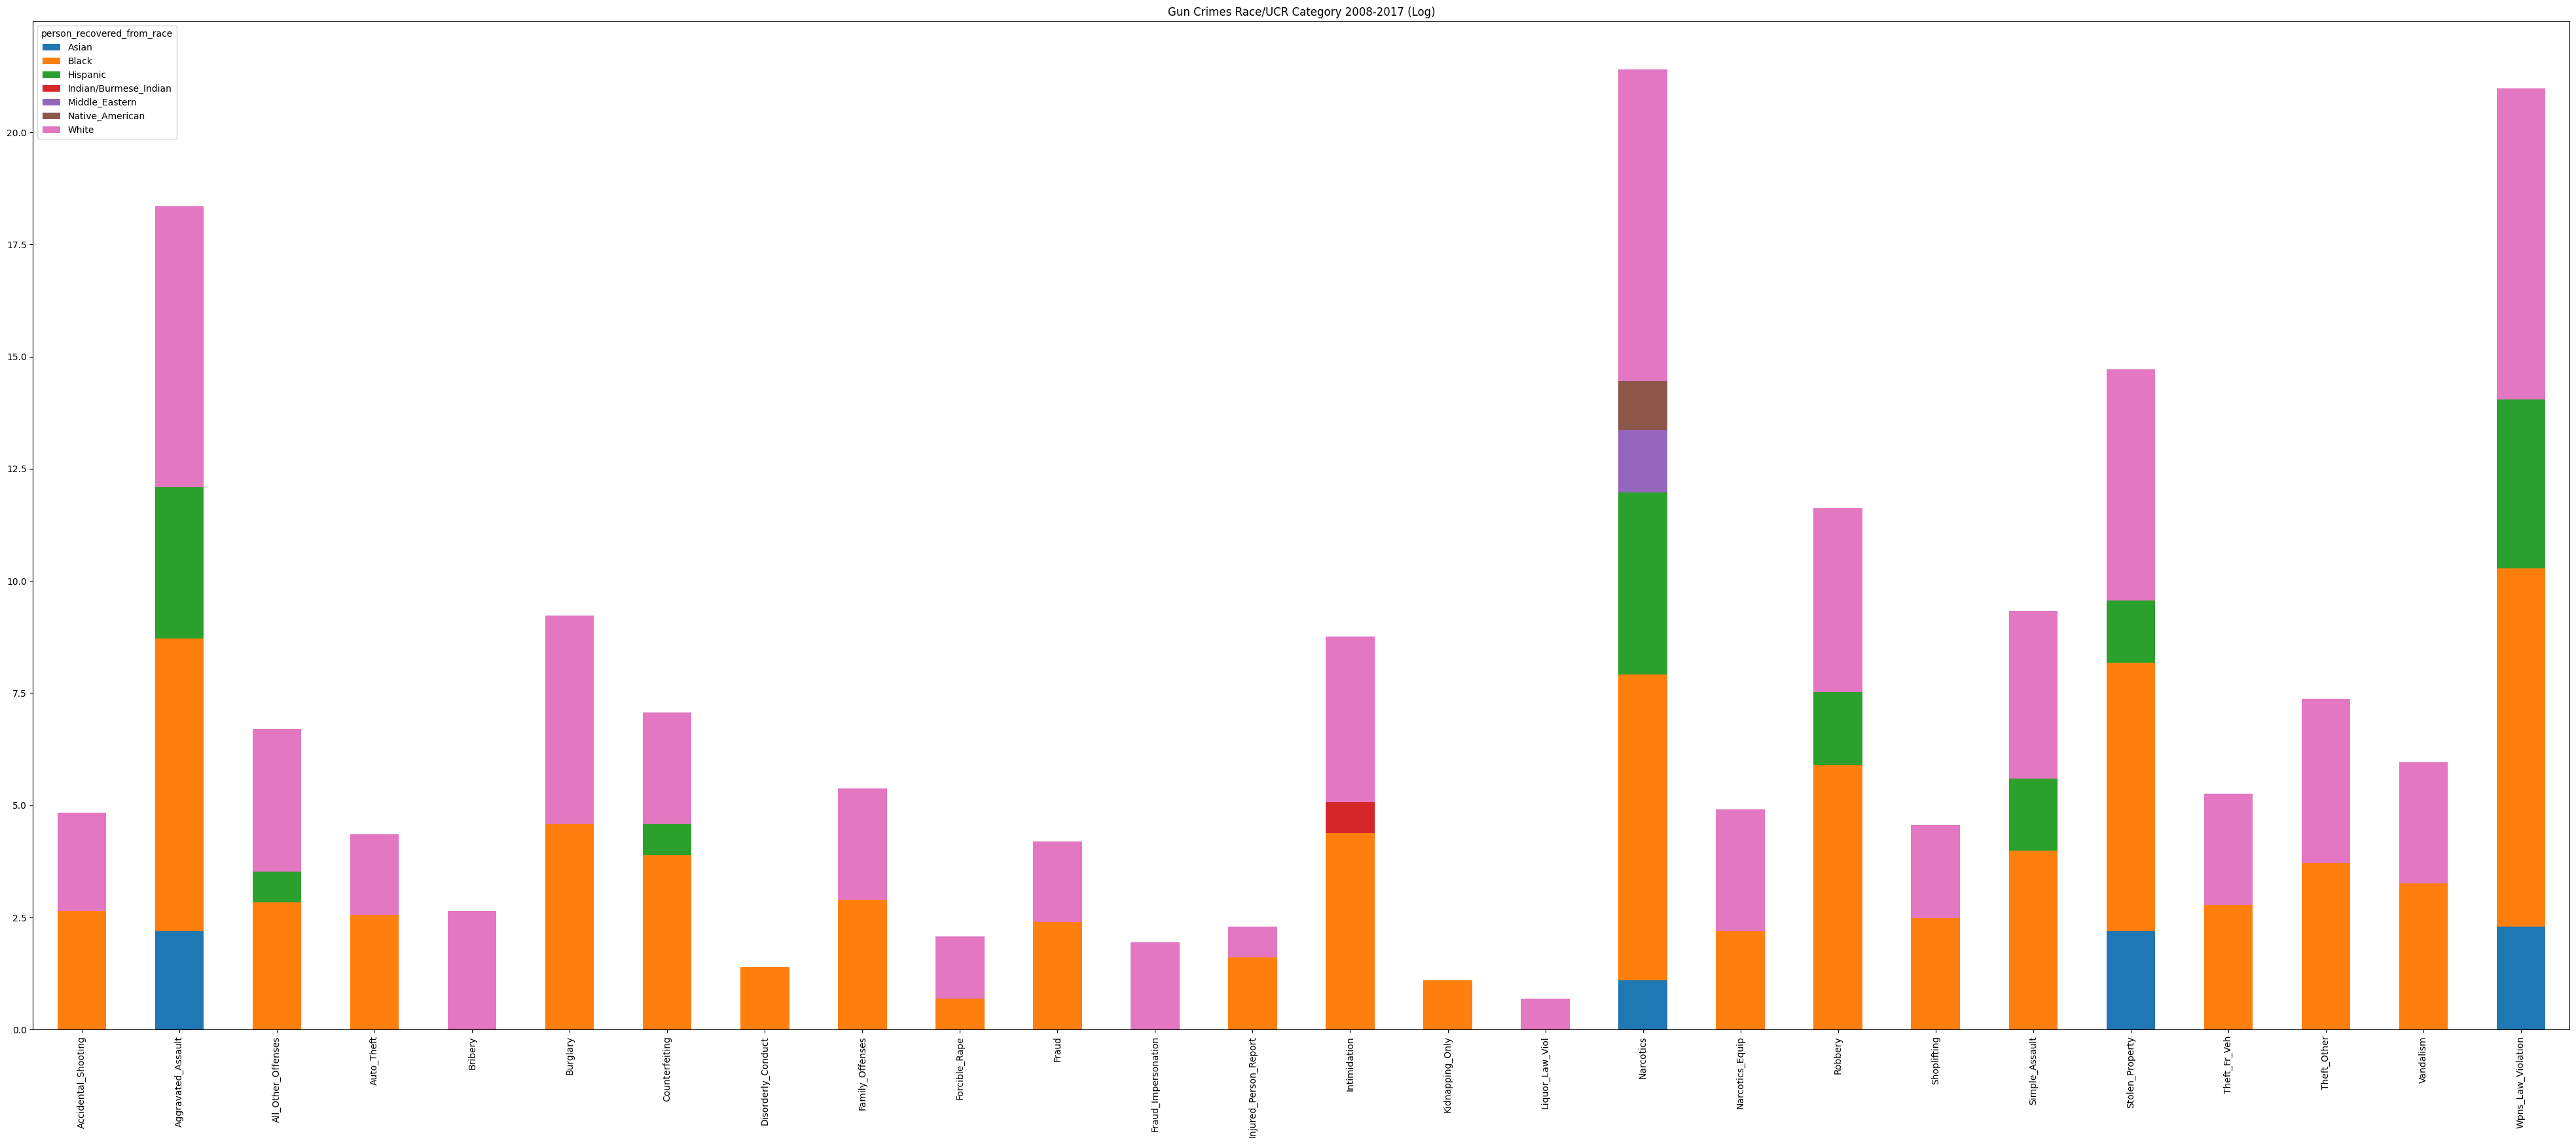

In [268]:
ax26 = firearm_data_race_ucr_log['log_values'].unstack().plot(kind='bar', xlabel='', title='Gun Crimes Race/UCR Category 2008-2017 (Log)', figsize = (50,20), stacked = True)
plt.savefig('./CompiledImages/count_race_ucr_log_stacked.png')

### Gun Category and UCR

In [269]:
firearm_gun_ucr = firearm_data[['firearm_category', 'ucr_category']]
firearm_gun_ucr['count_of_ucr_incidents'] = firearm_gun_ucr['ucr_category']
#firearm_gun_ucr = firearm_gun_ucr.dropna(subset = ['firearm_category'])
firearm_gun_ucr = firearm_gun_ucr.query("firearm_category == 'Pistol' or firearm_category =='Shotgun' or firearm_category == 'Rifle'")
firearm_gun_ucr = firearm_gun_ucr.groupby(['firearm_category', 'ucr_category']).count()

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\3649635481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_gun_ucr['count_of_ucr_incidents'] = firearm_gun_ucr['ucr_category']


In [270]:
firearm_gun_ucr

count_of_ucr_incidents
firearm_category ucr_category                               
Pistol           Accidental_Shooting                      48
                 Aggravated_Assault                     1148
                 All_Other_Offenses                       69
                 Auto_Theft                               19
                 Bribery                                   3
...                                                      ...
Shotgun          Simple_Assault                            8
                 Stolen_Property                          39
                 Theft_Other                               5
                 Vandalism                                 4
                 Wpns_Law_Violation                      185

[74 rows x 1 columns]

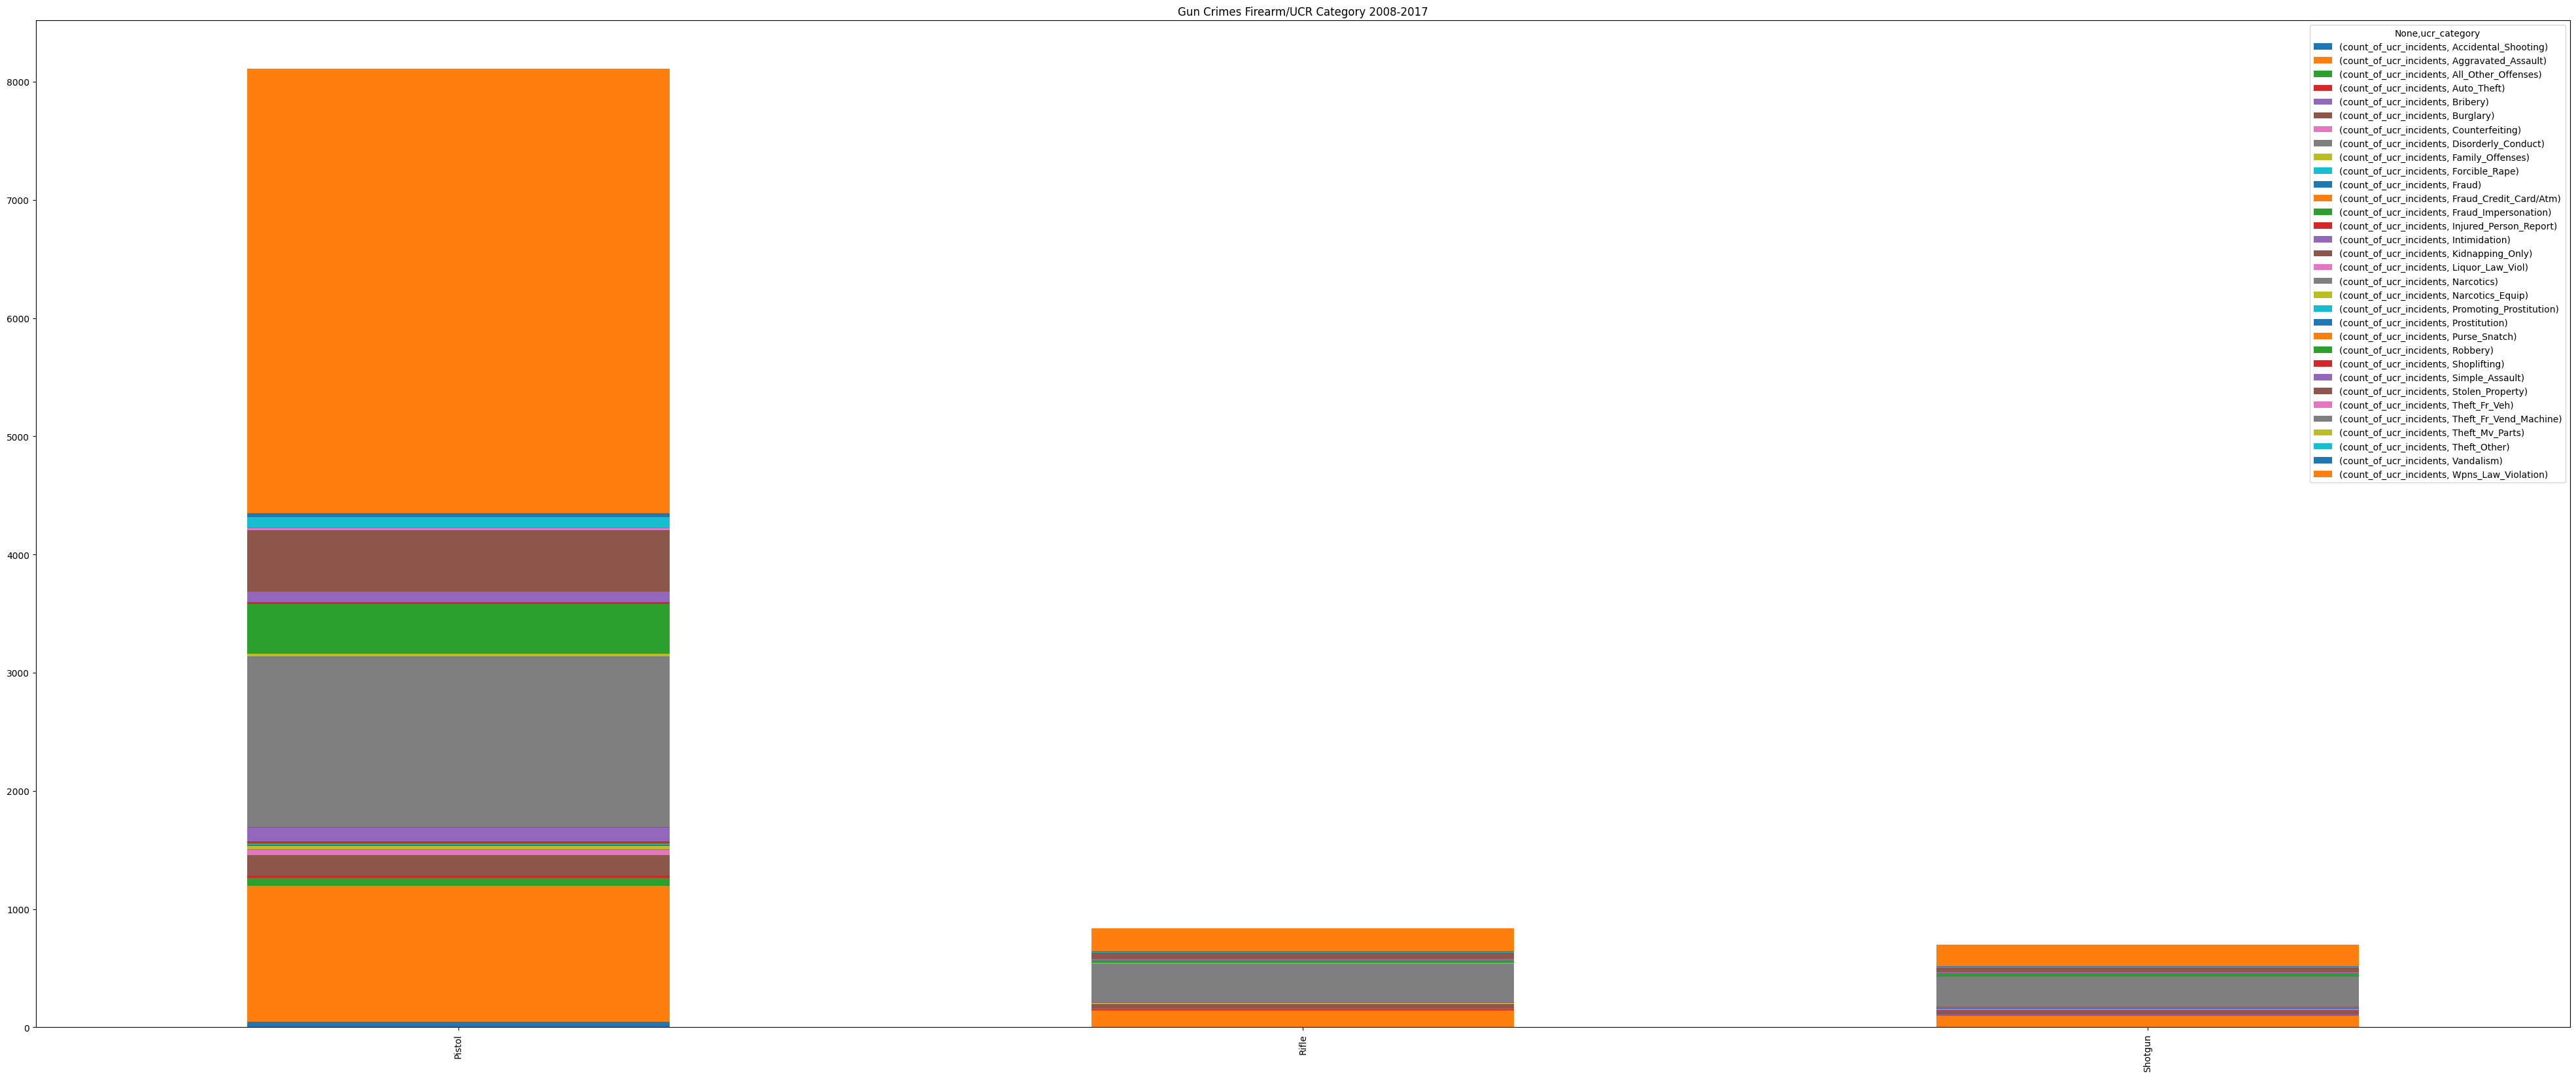

In [271]:
ax35 = firearm_gun_ucr.unstack().plot(kind='bar', xlabel='', title='Gun Crimes Firearm/UCR Category 2008-2017', figsize = (50,20), stacked = True)
plt.savefig('./CompiledImages/firearm_ucr_stacked.png')

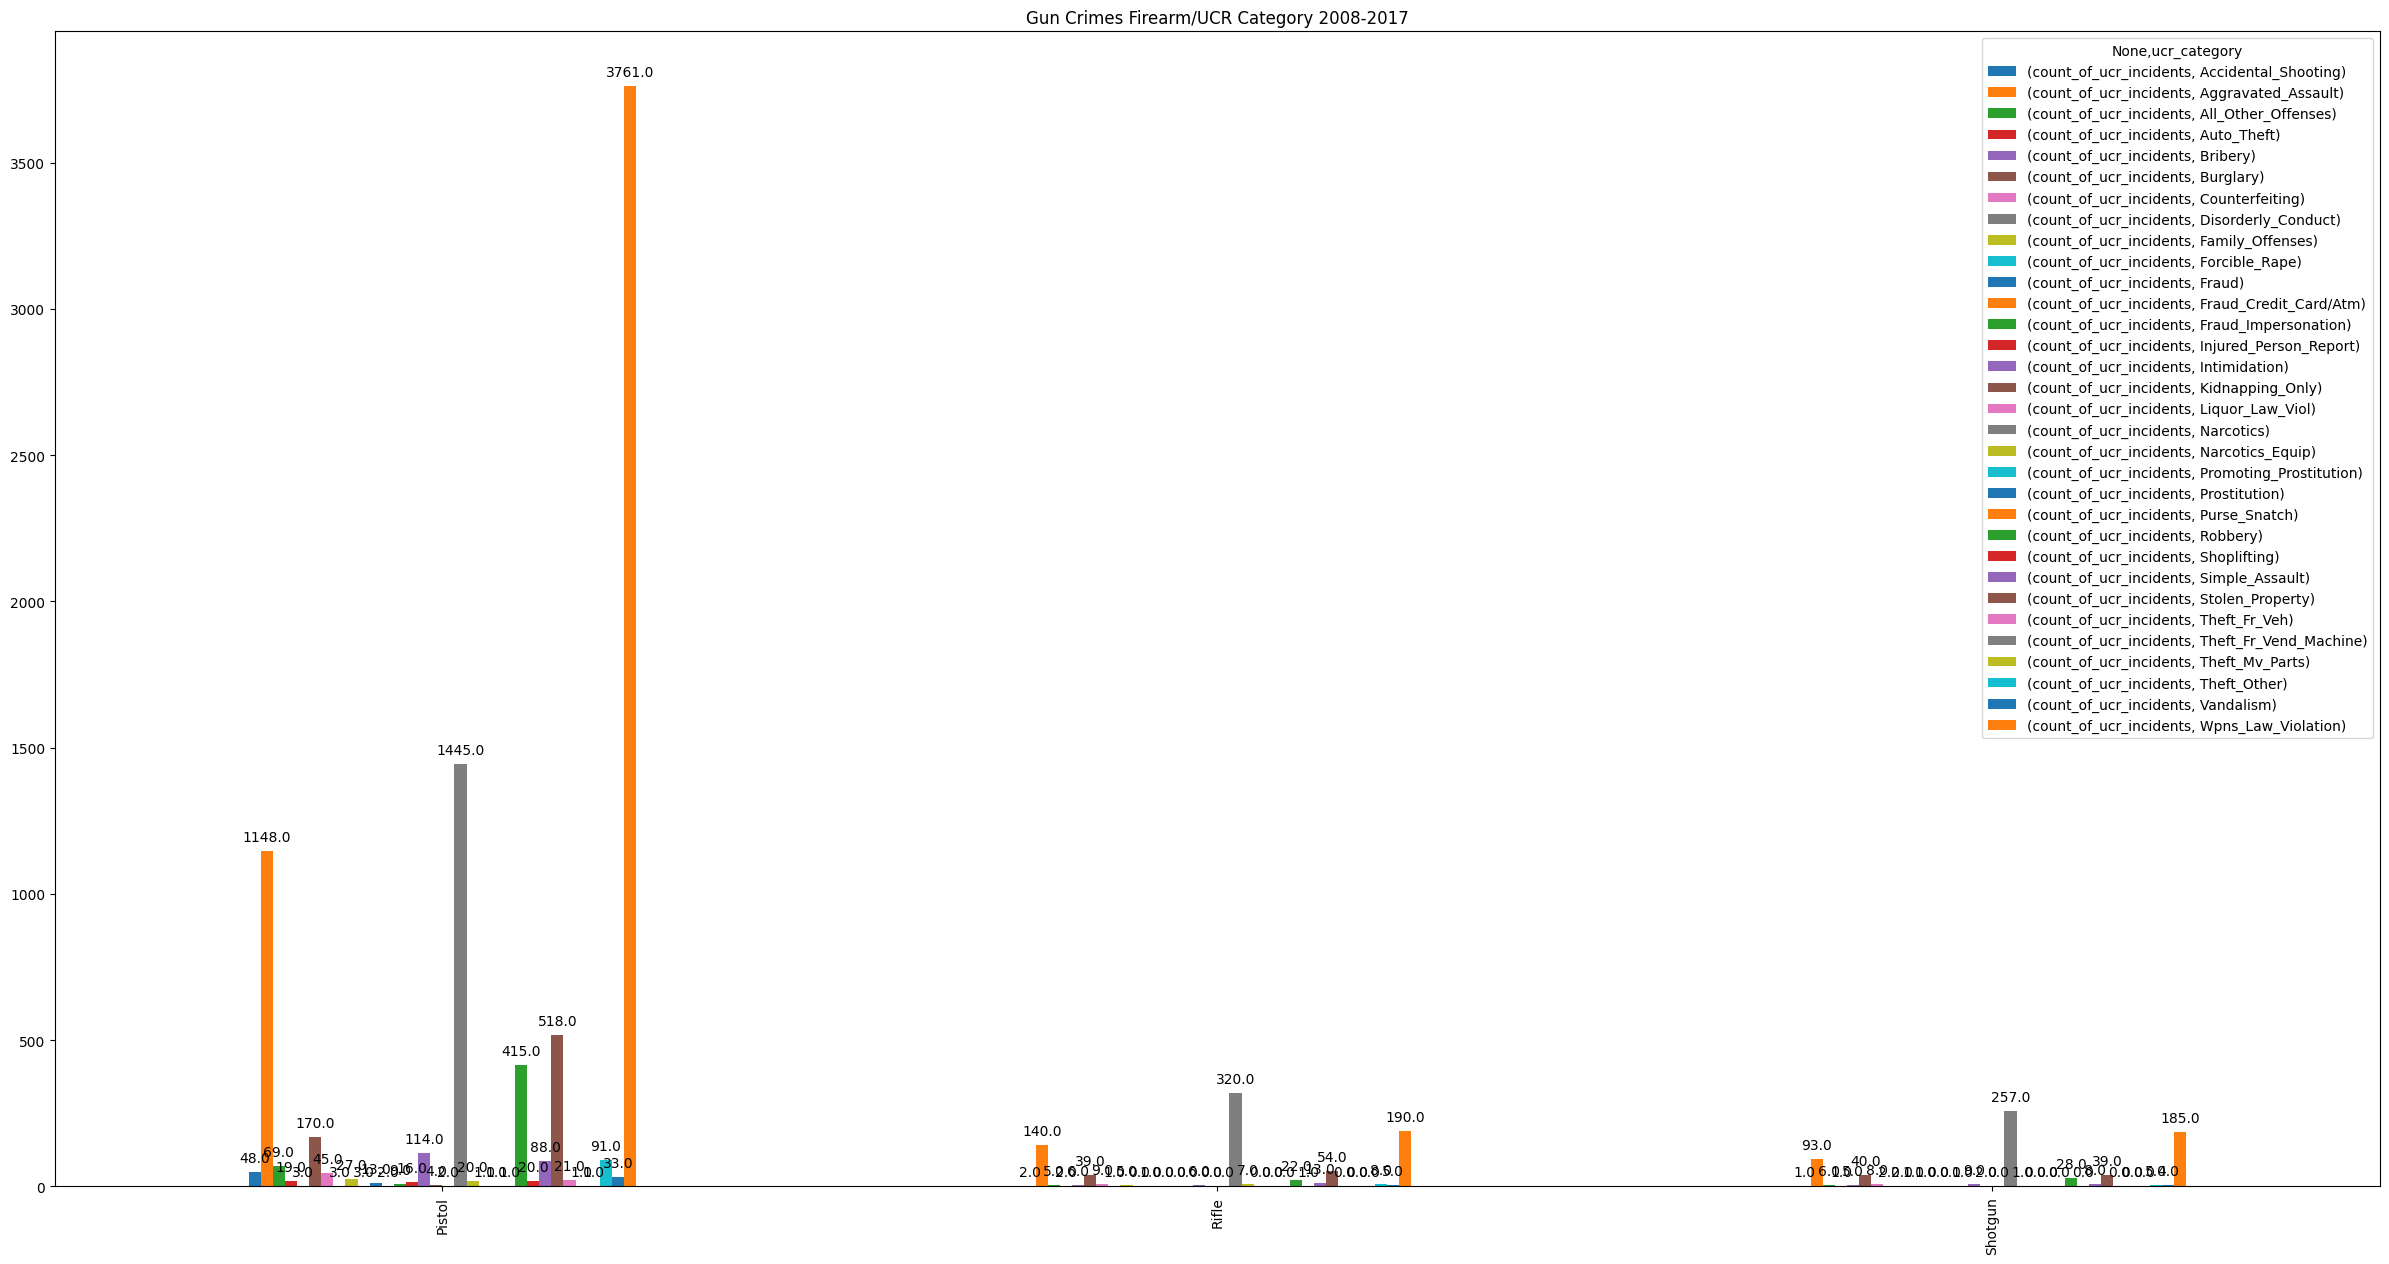

In [272]:
ax36 = firearm_gun_ucr.unstack().plot(kind='bar', xlabel='', title='Gun Crimes Firearm/UCR Category 2008-2017', figsize = (30,15))
for p in ax36.patches:
    ax36.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('./CompiledImages/firearm_ucr_unstacked.png')

### UCR and Gun Category

In [273]:
firearm_ucr_gun = firearm_data[['firearm_category', 'ucr_category']]
firearm_ucr_gun = firearm_ucr_gun.query("firearm_category == 'Pistol' or firearm_category =='Shotgun' or firearm_category == 'Rifle'")
firearm_ucr_gun['count_of_firearm_cat'] = firearm_ucr_gun['firearm_category']
firearm_ucr_gun = firearm_ucr_gun.groupby(['ucr_category', 'firearm_category']).count()

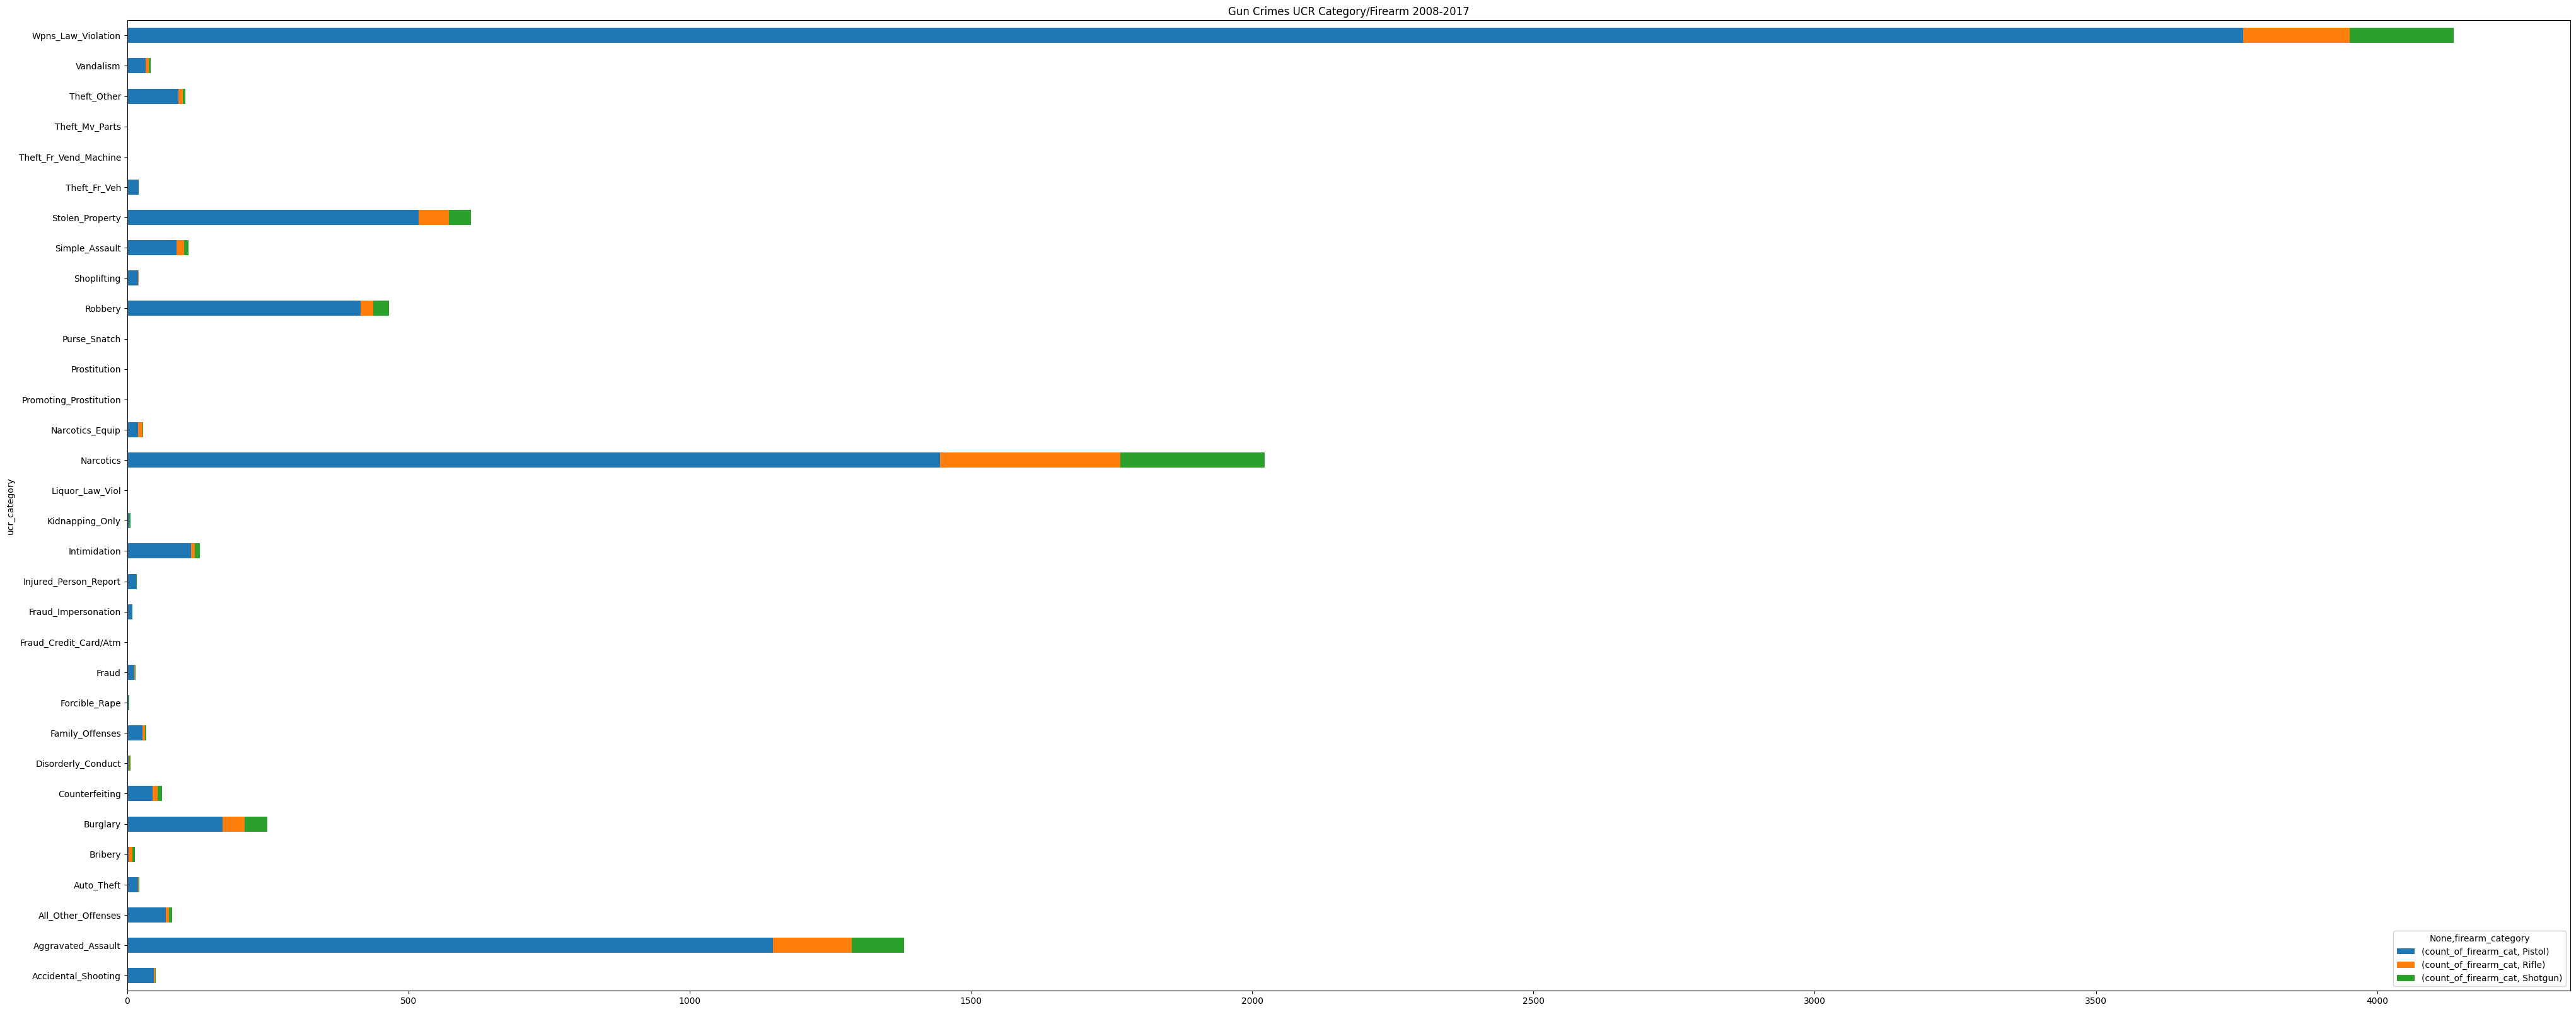

In [274]:
ax38 = firearm_ucr_gun.unstack().plot(kind='barh', xlabel='', title='Gun Crimes UCR Category/Firearm 2008-2017', figsize = (50,20), stacked = True)
plt.savefig('./CompiledImages/firearm_ucr_gun.png')

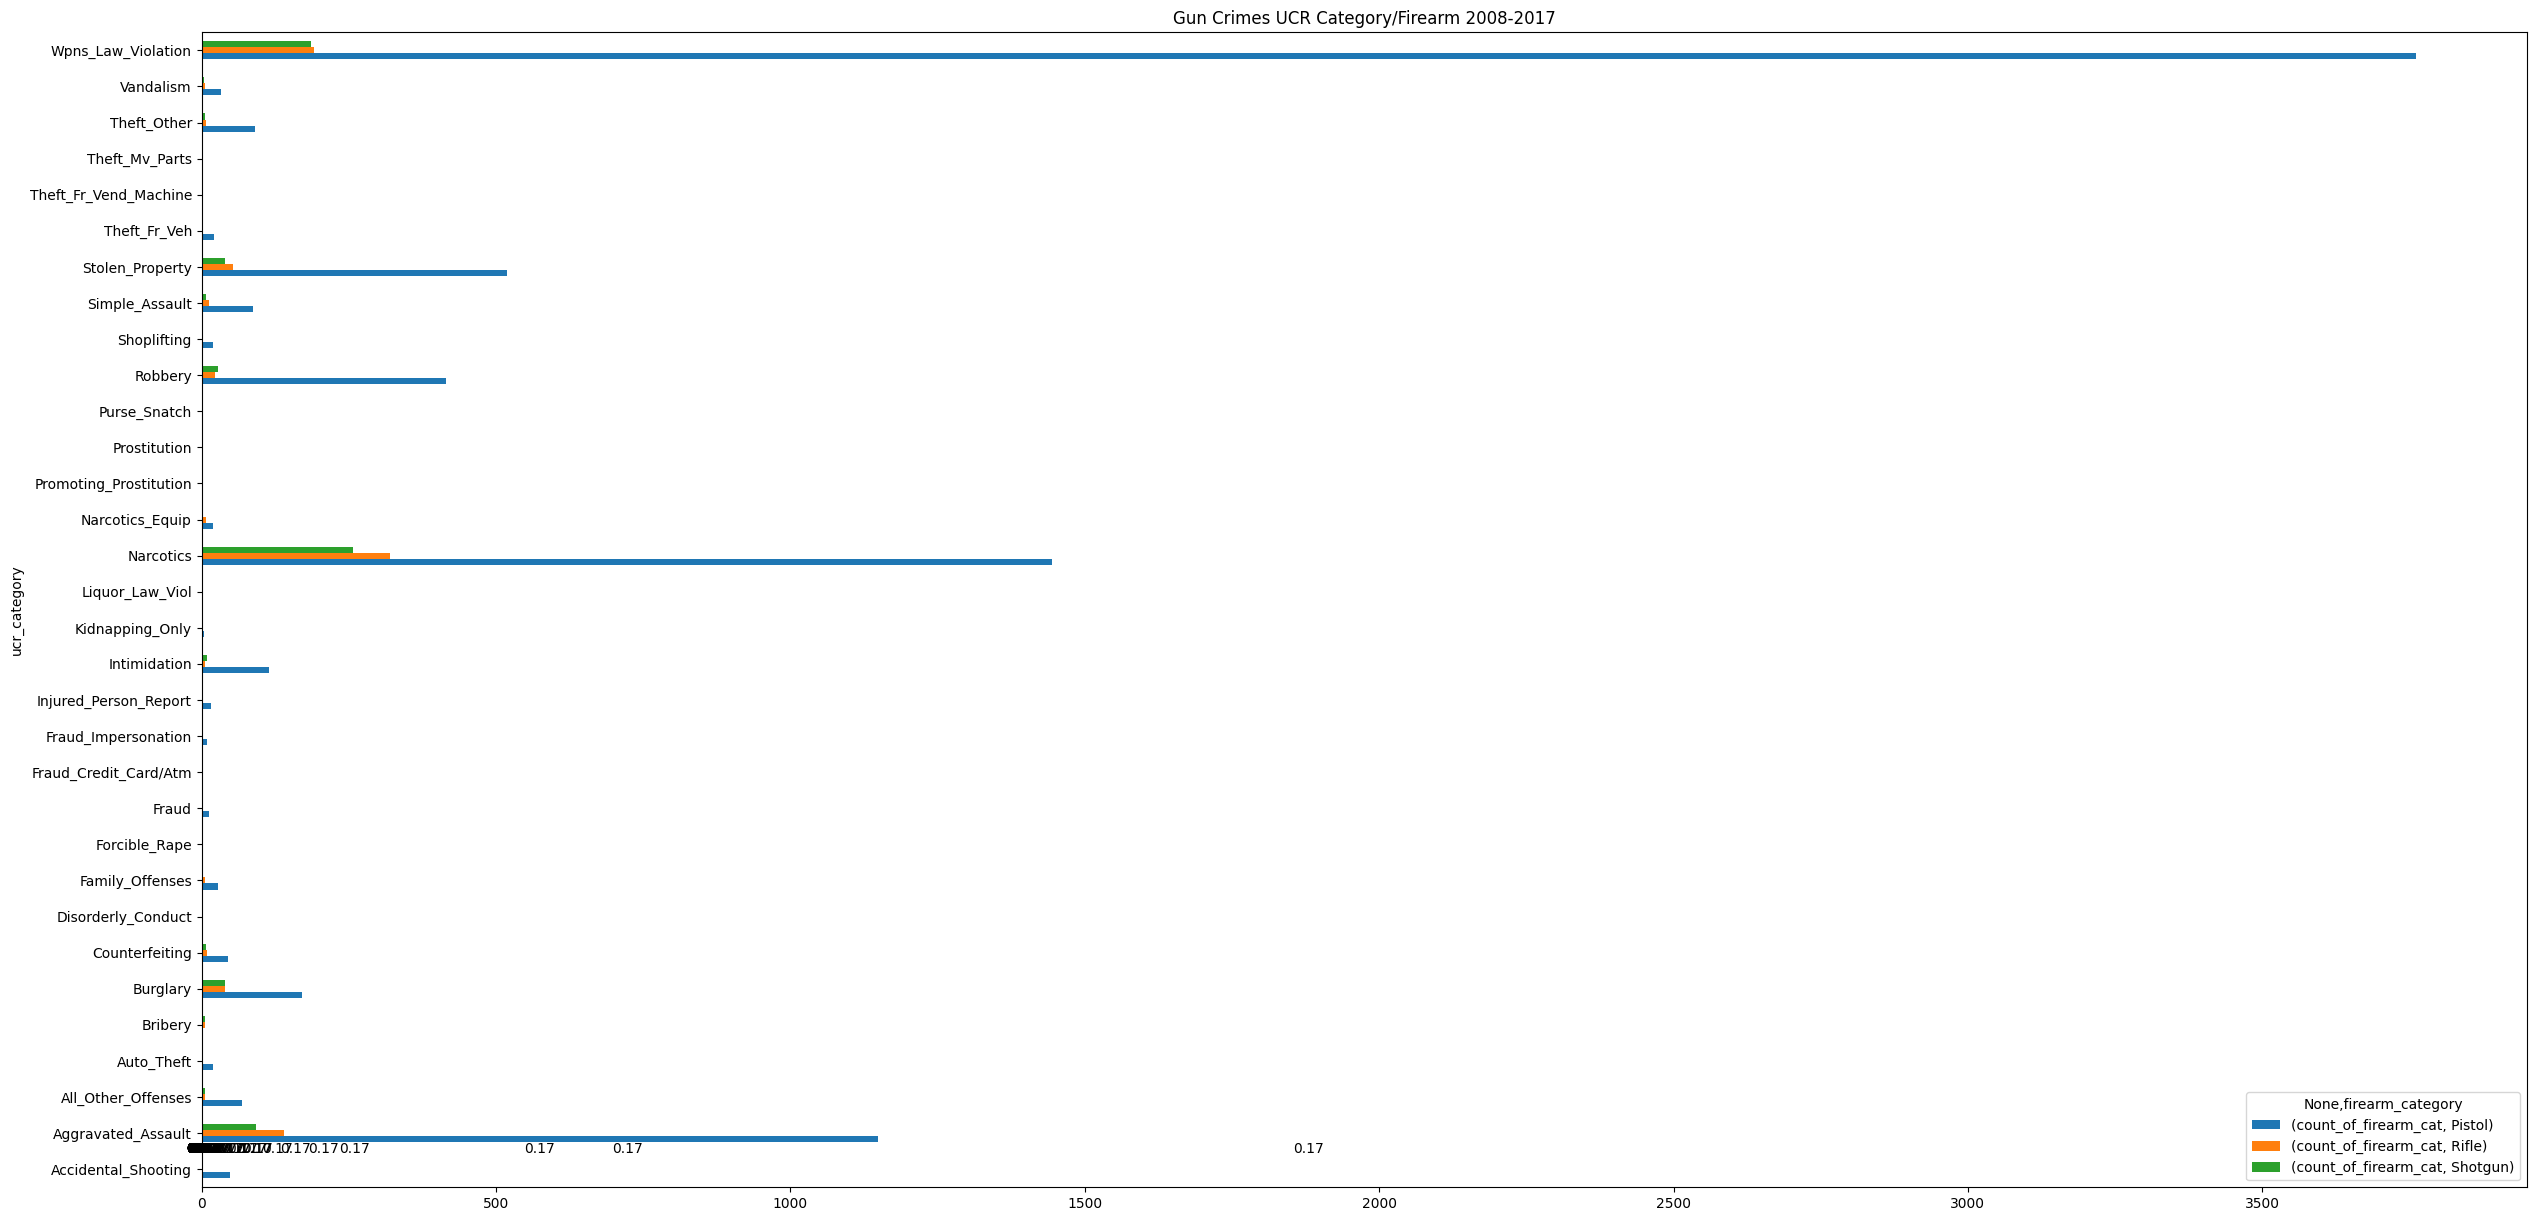

In [275]:
ax39 = firearm_ucr_gun.unstack().plot(kind='barh', xlabel='', title='Gun Crimes UCR Category/Firearm 2008-2017', figsize = (30,15))
for p in ax39.patches:

    ax39.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('./CompiledImages/firearm_ucr_gun_unstacked.png')

### Zipcode Correlation

In [276]:
zip_corr_table_all = pd.DataFrame()

In [277]:
zipcode_corr_table_sex = firearm_data_zip_sex
zipcode_corr_table_sex = zipcode_corr_table_sex.reset_index('person_recovered_from_sex')
zipcode_corr_table_sex.drop('log_values', axis=1, inplace = True)

In [278]:
zipcode_corr_table_sexM = zipcode_corr_table_sex[zipcode_corr_table_sex['person_recovered_from_sex'] == 'M']
zipcode_corr_table_sexM.drop('person_recovered_from_sex', axis = 1, inplace = True)
zipcode_corr_table_sexM.columns = ['count_of_crimes_M']
zip_corr_table_all = zip_corr_table_all.join(zipcode_corr_table_sexM, how='outer')

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\2135168622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipcode_corr_table_sexM.drop('person_recovered_from_sex', axis = 1, inplace = True)


In [279]:
zipcode_corr_table_sexF = zipcode_corr_table_sex[zipcode_corr_table_sex['person_recovered_from_sex'] == 'F']
zipcode_corr_table_sexF.drop('person_recovered_from_sex', axis = 1, inplace = True)
zipcode_corr_table_sexF.columns = ['count_of_crimes_F']
zip_corr_table_all = zip_corr_table_all.join(zipcode_corr_table_sexF, how='outer')

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\3779504185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipcode_corr_table_sexF.drop('person_recovered_from_sex', axis = 1, inplace = True)


In [280]:
zipcode_corr_table_race = firearm_data_zip_race
zipcode_corr_table_race.drop('log_values', axis = 1, inplace = True)
zipcode_corr_table_race = zipcode_corr_table_race.reset_index('person_recovered_from_race')

In [281]:
zipcode_corr_table_raceB = zipcode_corr_table_race[zipcode_corr_table_race['person_recovered_from_race'] == 'Black']
zipcode_corr_table_raceB.drop('person_recovered_from_race', axis = 1, inplace = True)
zipcode_corr_table_raceB.columns = ['count_of_crimes_Black']
zip_corr_table_all = zip_corr_table_all.join(zipcode_corr_table_raceB, how='outer')

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\2603249464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipcode_corr_table_raceB.drop('person_recovered_from_race', axis = 1, inplace = True)


In [282]:
zipcode_corr_table_raceH = zipcode_corr_table_race[zipcode_corr_table_race['person_recovered_from_race'] == 'Hispanic']
zipcode_corr_table_raceH.drop('person_recovered_from_race', axis = 1, inplace = True)
zipcode_corr_table_raceH.columns = ['count_of_crimes_Hispanic']
zip_corr_table_all = zip_corr_table_all.join(zipcode_corr_table_raceH, how='outer')

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\1484887838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipcode_corr_table_raceH.drop('person_recovered_from_race', axis = 1, inplace = True)


In [283]:
zipcode_corr_table_raceW = zipcode_corr_table_race[zipcode_corr_table_race['person_recovered_from_race'] == 'White']
zipcode_corr_table_raceW.drop('person_recovered_from_race', axis = 1, inplace = True)
zipcode_corr_table_raceW.columns = ['count_of_crimes_White']
zip_corr_table_all = zip_corr_table_all.join(zipcode_corr_table_raceW, how='outer')

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\218988186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipcode_corr_table_raceW.drop('person_recovered_from_race', axis = 1, inplace = True)


In [284]:
zipcode_corr_table_raceA = zipcode_corr_table_race[zipcode_corr_table_race['person_recovered_from_race'] == 'Asian']
zipcode_corr_table_raceA.drop('person_recovered_from_race', axis = 1, inplace = True)
zipcode_corr_table_raceA.columns = ['count_of_crimes_Asian']
zip_corr_table_all = zip_corr_table_all.join(zipcode_corr_table_raceA, how='outer')

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\2985109838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipcode_corr_table_raceA.drop('person_recovered_from_race', axis = 1, inplace = True)


In [285]:
firearm_data_zip_year_corr = firearm_data[['zipcode', 'year']]
firearm_data_zip_year_corr['count_of_crimes'] = firearm_data_zip_year_corr['year']
firearm_data_zip_year_corr = firearm_data_zip_year_corr.groupby([firearm_data_zip_year_corr['zipcode'], firearm_data_zip_year_corr['year']]).count()
zipcode_corr_table_year = firearm_data_zip_year_corr

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\2100275035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data_zip_year_corr['count_of_crimes'] = firearm_data_zip_year_corr['year']


In [286]:
zipcode_corr_table_year

count_of_crimes
zipcode year                 
40023   2013                7
        2014                2
        2016                1
40056   2010                1
        2013                1
...                       ...
40299   2015                4
        2016               38
        2017                1
42259   2014                1
47130   2015                1

[270 rows x 1 columns]

In [287]:
nameListZip = list()
zipcode_corr_table_year = zipcode_corr_table_year.reset_index('year')
for x in range(2008,2017):
    name = 'zipcode_corr_table_year'+ str(x)
    nameListZip.append(name)
    name = zipcode_corr_table_year[zipcode_corr_table_year['year'] == str(x)]
    name.drop('year', axis = 1, inplace = True)
    name.columns = ['count_of_crimes_'+str(x)]
    zip_corr_table_all = zip_corr_table_all.join(name, how='outer')

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\466339474.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name.drop('year', axis = 1, inplace = True)
C:\Users\chris\AppData\Local\Temp\ipykernel_24012\466339474.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name.drop('year', axis = 1, inplace = True)
C:\Users\chris\AppData\Local\Temp\ipykernel_24012\466339474.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name.drop('year

In [288]:
zipcode_corr_table_ucr = firearm_data[['zipcode', 'ucr_category']]
zipcode_corr_table_ucr['count_of_crimes'] = zipcode_corr_table_ucr['ucr_category']
zipcode_ucr_list = zipcode_corr_table_ucr['ucr_category'].unique()
zipcode_corr_table_ucr = zipcode_corr_table_ucr.groupby(['zipcode', 'ucr_category']).count()
zipcode_corr_table_ucr = zipcode_corr_table_ucr.reset_index('ucr_category')

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\3755270402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipcode_corr_table_ucr['count_of_crimes'] = zipcode_corr_table_ucr['ucr_category']


In [289]:
nameListUcr = list()
for x in zipcode_ucr_list:
    name = 'zipcode_corr_table_ucr_'+ str(x)
    nameListUcr.append(name)
    name = zipcode_corr_table_ucr[zipcode_corr_table_ucr['ucr_category'] == str(x)]
    name.drop('ucr_category', axis = 1, inplace = True)
    name.columns = ['count_of_crimes_'+str(x)]
    zip_corr_table_all = zip_corr_table_all.join(name, how='outer')

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\580031688.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name.drop('ucr_category', axis = 1, inplace = True)
C:\Users\chris\AppData\Local\Temp\ipykernel_24012\580031688.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name.drop('ucr_category', axis = 1, inplace = True)
C:\Users\chris\AppData\Local\Temp\ipykernel_24012\580031688.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [290]:
zip_corr_table_all

count_of_crimes_M  count_of_crimes_F  count_of_crimes_Black  \
zipcode                                                                
40023                 10.0                NaN                    2.0   
40056                  4.0                NaN                    4.0   
40058                  NaN                NaN                    NaN   
40059                  4.0                NaN                    1.0   
40118                101.0                9.0                   23.0   
40165                  NaN                NaN                    NaN   
40177                  NaN                NaN                    NaN   
40202               1400.0               92.0                 1164.0   
40203                709.0               49.0                  583.0   
40204                164.0               13.0                   70.0   
40205                 53.0                4.0                   28.0   
40206                139.0               18.0                   89.0   
40207                 24.0                2.0                   11.0   
40208                263.0               34.0                  204.0   
40209                 28.0                NaN                    7.0   
40210                556.0               29.0                  555.0   
40211                837.0               64.0                  845.0   
40212                516.0               44.0                  417.0   
40213                191.0               15.0                  113.0   
40214                407.0               35.0                  199.0   
40215                459.0               32.0                  269.0   
40216                394.0               39.0                  221.0   
40217                 89.0               16.0                   22.0   
40218                430.0               23.0                  232.0   
40219                366.0               27.0                  193.0   
40220                109.0                4.0                   53.0   
40222                 49.0                2.0                   23.0   
40223                 43.0                1.0                   15.0   
40225                  1.0                NaN                    NaN   
40228                 59.0               11.0                   44.0   
40229                131.0               11.0                   37.0   
40241                 82.0                7.0                   47.0   
40242                 19.0                1.0                   11.0   
40243                 35.0                2.0                    9.0   
40245                 40.0                4.0                    9.0   
40258                194.0               16.0                   41.0   
40272                277.0               14.0                   52.0   
40291                121.0               17.0                   39.0   
40299                 79.0                NaN                    8.0   
42259                  1.0                NaN                    NaN   
47130                  NaN                NaN                    NaN   

         count_of_crimes_Hispanic  count_of_crimes_White  \
zipcode                                                    
40023                         2.0                    6.0   
40056                         NaN                    NaN   
40058                         NaN                    NaN   
40059                         NaN                    3.0   
40118                         7.0                   80.0   
40165                         NaN                    NaN   
40177                         NaN                    NaN   
40202                         8.0                  305.0   
40203                         6.0                  163.0   
40204                         1.0                  102.0   
40205                         NaN                   28.0   
40206                         4.0                   64.0   
40207                         NaN                   13.0   
40208       

In [291]:
zip_corr_table_final = zip_corr_table_all.corr()
zip_corr_table_final

count_of_crimes_M  count_of_crimes_F  \
count_of_crimes_M                                1.000000           0.963565   
count_of_crimes_F                                0.963565           1.000000   
count_of_crimes_Black                            0.972496           0.937878   
count_of_crimes_Hispanic                         0.259934           0.223133   
count_of_crimes_White                            0.691777           0.644007   
count_of_crimes_Asian                            0.387620           0.423781   
count_of_crimes_2008                                  NaN                NaN   
count_of_crimes_2009                             1.000000           1.000000   
count_of_crimes_2010                             0.911063           0.884328   
count_of_crimes_2011                             0.910052           0.909635   
count_of_crimes_2012                             0.959197           0.946339   
count_of_crimes_2013                             0.906984           0.837171   
count_of_crimes_2014                             0.944445           0.895719   
count_of_crimes_2015                             0.871346           0.815506   
count_of_crimes_2016                             0.964759           0.954667   
count_of_crimes_Homicide                         0.851721           0.850804   
count_of_crimes_Burglary                         0.742807           0.722183   
count_of_crimes_Aggravated_Assault               0.960484           0.946297   
count_of_crimes_Theft_Fr_Veh                     0.644029           0.700574   
count_of_crimes_Robbery                          0.917251           0.881296   
count_of_crimes_Theft_Other                      0.789574           0.760628   
count_of_crimes_Narcotics                        0.894190           0.831087   
count_of_crimes_Wpns_Law_Violation               0.981125           0.942720   
count_of_crimes_Family_Offenses                  0.709374           0.713554   
count_of_crimes_Simple_Assault                   0.765609           0.673146   
count_of_crimes_Suicide                          0.088992           0.003901   
count_of_crimes_Intimidation                     0.925257           0.899191   
count_of_crimes_Death_Investigation              0.040429          -0.038485   
count_of_crimes_Stolen_Property                  0.894300           0.845141   
count_of_crimes_All_Other_Offenses               0.780162           0.767745   
count_of_crimes_Shoplifting                      0.004255          -0.057208   
count_of_crimes_Justifiable_Homicide             0.781012           0.760792   
count_of_crimes_Injured_Person_Report            0.939152           0.961816   
count_of_crimes_Fraud_Impersonation              0.017584           0.078739   
count_of_crimes_Accidental_Shooting              0.845656           0.797320   
count_of_crimes_Counterfeiting                   0.881092           0.857659   
count_of_crimes_Narcotics_Equip                  0.703619           0.645463   
count_of_crimes_Prostitution                          NaN                NaN   
count_of_crimes_Vandalism                        0.683748           0.678307   
count_of_crimes_Sodomy_Force                          NaN                NaN   
count_of_crimes_Forcible_Fondling                     NaN                NaN   
count_of_crimes_Auto_Theft                       0.788378           0.680567   
count_of_crimes_Kidnapping_Only                  0.976747           0.982472   
count_of_crimes_Fraud                            0.685633           0.687375   
count_of_crimes_Forcible_Rape                         NaN                NaN   
count_of_crimes_Disorderly_Conduct               0.925304           0.964119   
count_of_crimes_Theft_Fr_Vend_Machine                 NaN                NaN   
count_of_crimes_Theft_Mv_Parts                        NaN                NaN   
count_of_crimes_Liquor_Law_Viol                       NaN                NaN   
count_of_crimes_nan                     

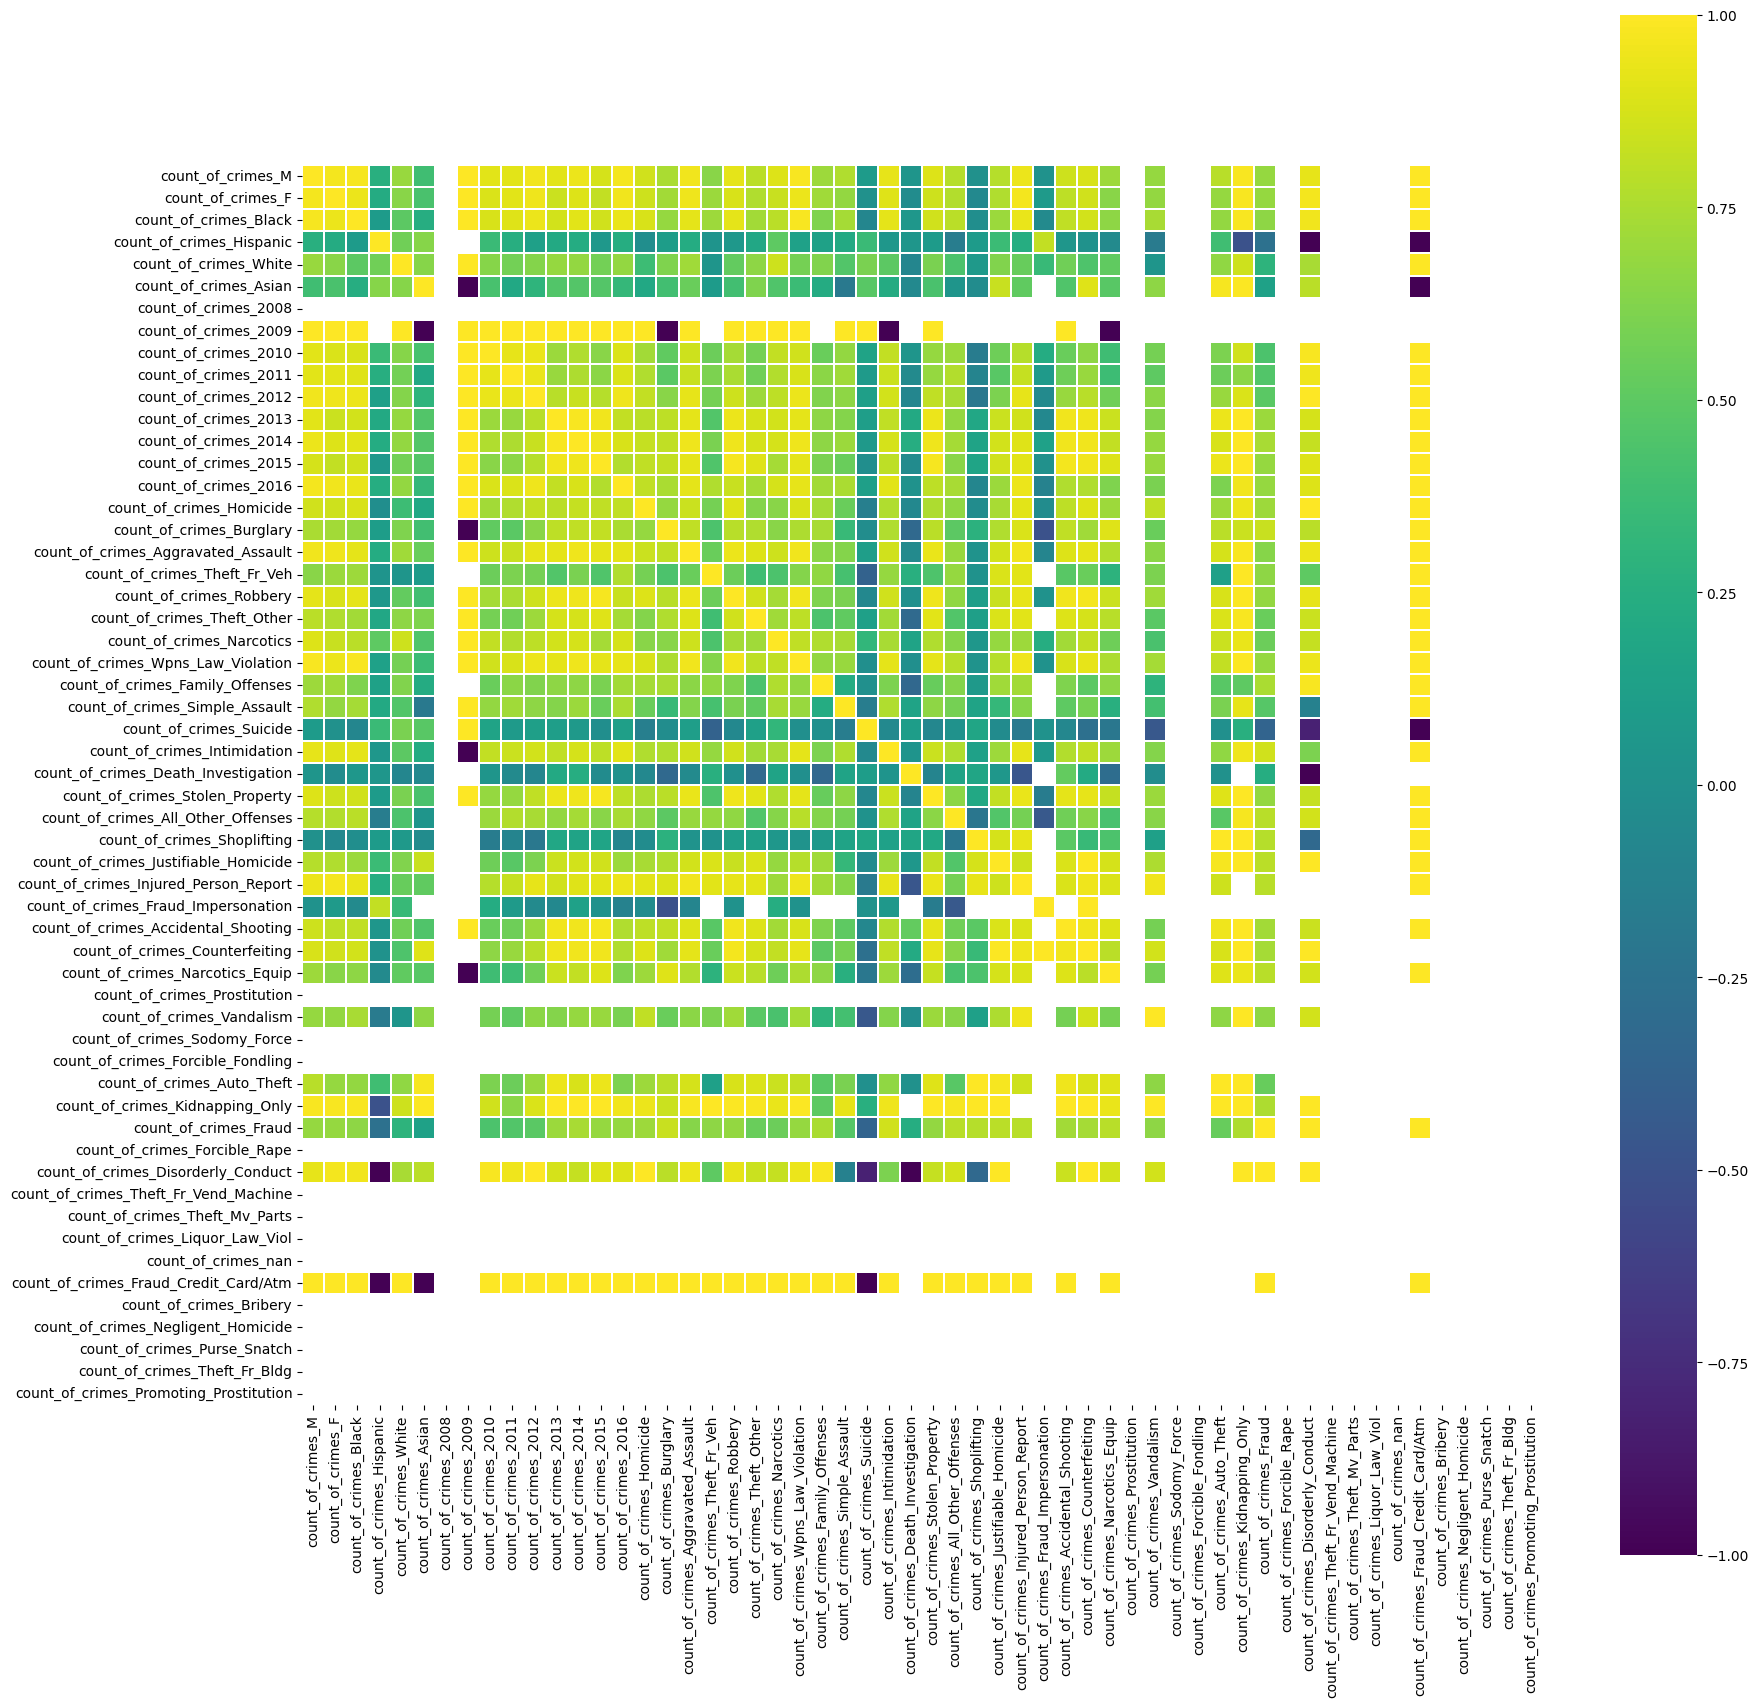

In [292]:
fig, ax40 = plt.subplots(figsize = (20,20))
sns.color_palette("viridis", as_cmap=True)
sns.heatmap(zip_corr_table_final, cmap = 'viridis', square = True, linewidth = 0.01)
plt.savefig('./CompiledImages/zipcode_correlation.png')

### Percent Increase per Race Per Zipcode Per Year

In [293]:
race_inc_year_zip = firearm_data[['person_recovered_from_race', 'zipcode', 'year']]

In [294]:
b_inc_year_zip = race_inc_year_zip[race_inc_year_zip['person_recovered_from_race'] == 'Black']
b_inc_year_zip = b_inc_year_zip[b_inc_year_zip['zipcode'] == '40202']
b_inc_year_zip.drop(['person_recovered_from_race','zipcode'], axis = 1, inplace = True)
b_inc_year_zip['count_of_incidents'] = b_inc_year_zip['year']
b_inc_year_zip = b_inc_year_zip.groupby('year').count()
b_inc_year_zip

count_of_incidents
year                    
2010                  55
2011                  82
2012                  87
2013                 152
2014                 198
2015                 360
2016                 180
2017                  50

In [295]:
w_inc_year_zip = race_inc_year_zip[race_inc_year_zip['person_recovered_from_race'] == 'White']
w_inc_year_zip = w_inc_year_zip[w_inc_year_zip['zipcode'] == '40202']
w_inc_year_zip.drop(['person_recovered_from_race','zipcode'], axis = 1, inplace = True)
w_inc_year_zip['count_of_incidents'] = w_inc_year_zip['year']
w_inc_year_zip = w_inc_year_zip.groupby('year').count()
w_inc_year_zip

count_of_incidents
year                    
2010                  17
2011                  17
2012                  18
2013                  55
2014                  39
2015                 111
2016                  28
2017                  20

In [296]:
h_inc_year_zip = race_inc_year_zip[race_inc_year_zip['person_recovered_from_race'] == 'Hispanic']
h_inc_year_zip = h_inc_year_zip[h_inc_year_zip['zipcode'] == '40202']
h_inc_year_zip.drop(['person_recovered_from_race','zipcode'], axis = 1, inplace = True)
h_inc_year_zip['count_of_incidents'] = h_inc_year_zip['year']
h_inc_year_zip = h_inc_year_zip.groupby('year').count()
h_inc_year_zip

count_of_incidents
year                    
2010                   1
2011                   1
2014                   2
2015                   2
2016                   2

In [297]:
a_inc_year_zip = race_inc_year_zip[race_inc_year_zip['person_recovered_from_race'] == 'Asian']
a_inc_year_zip = a_inc_year_zip[a_inc_year_zip['zipcode'] == '40202']
a_inc_year_zip.drop(['person_recovered_from_race','zipcode'], axis = 1, inplace = True)
a_inc_year_zip['count_of_incidents'] = a_inc_year_zip['year']
a_inc_year_zip = a_inc_year_zip.groupby('year').count()
a_inc_year_zip

count_of_incidents
year                    
2012                   1
2013                   5
2016                   1
2017                   1

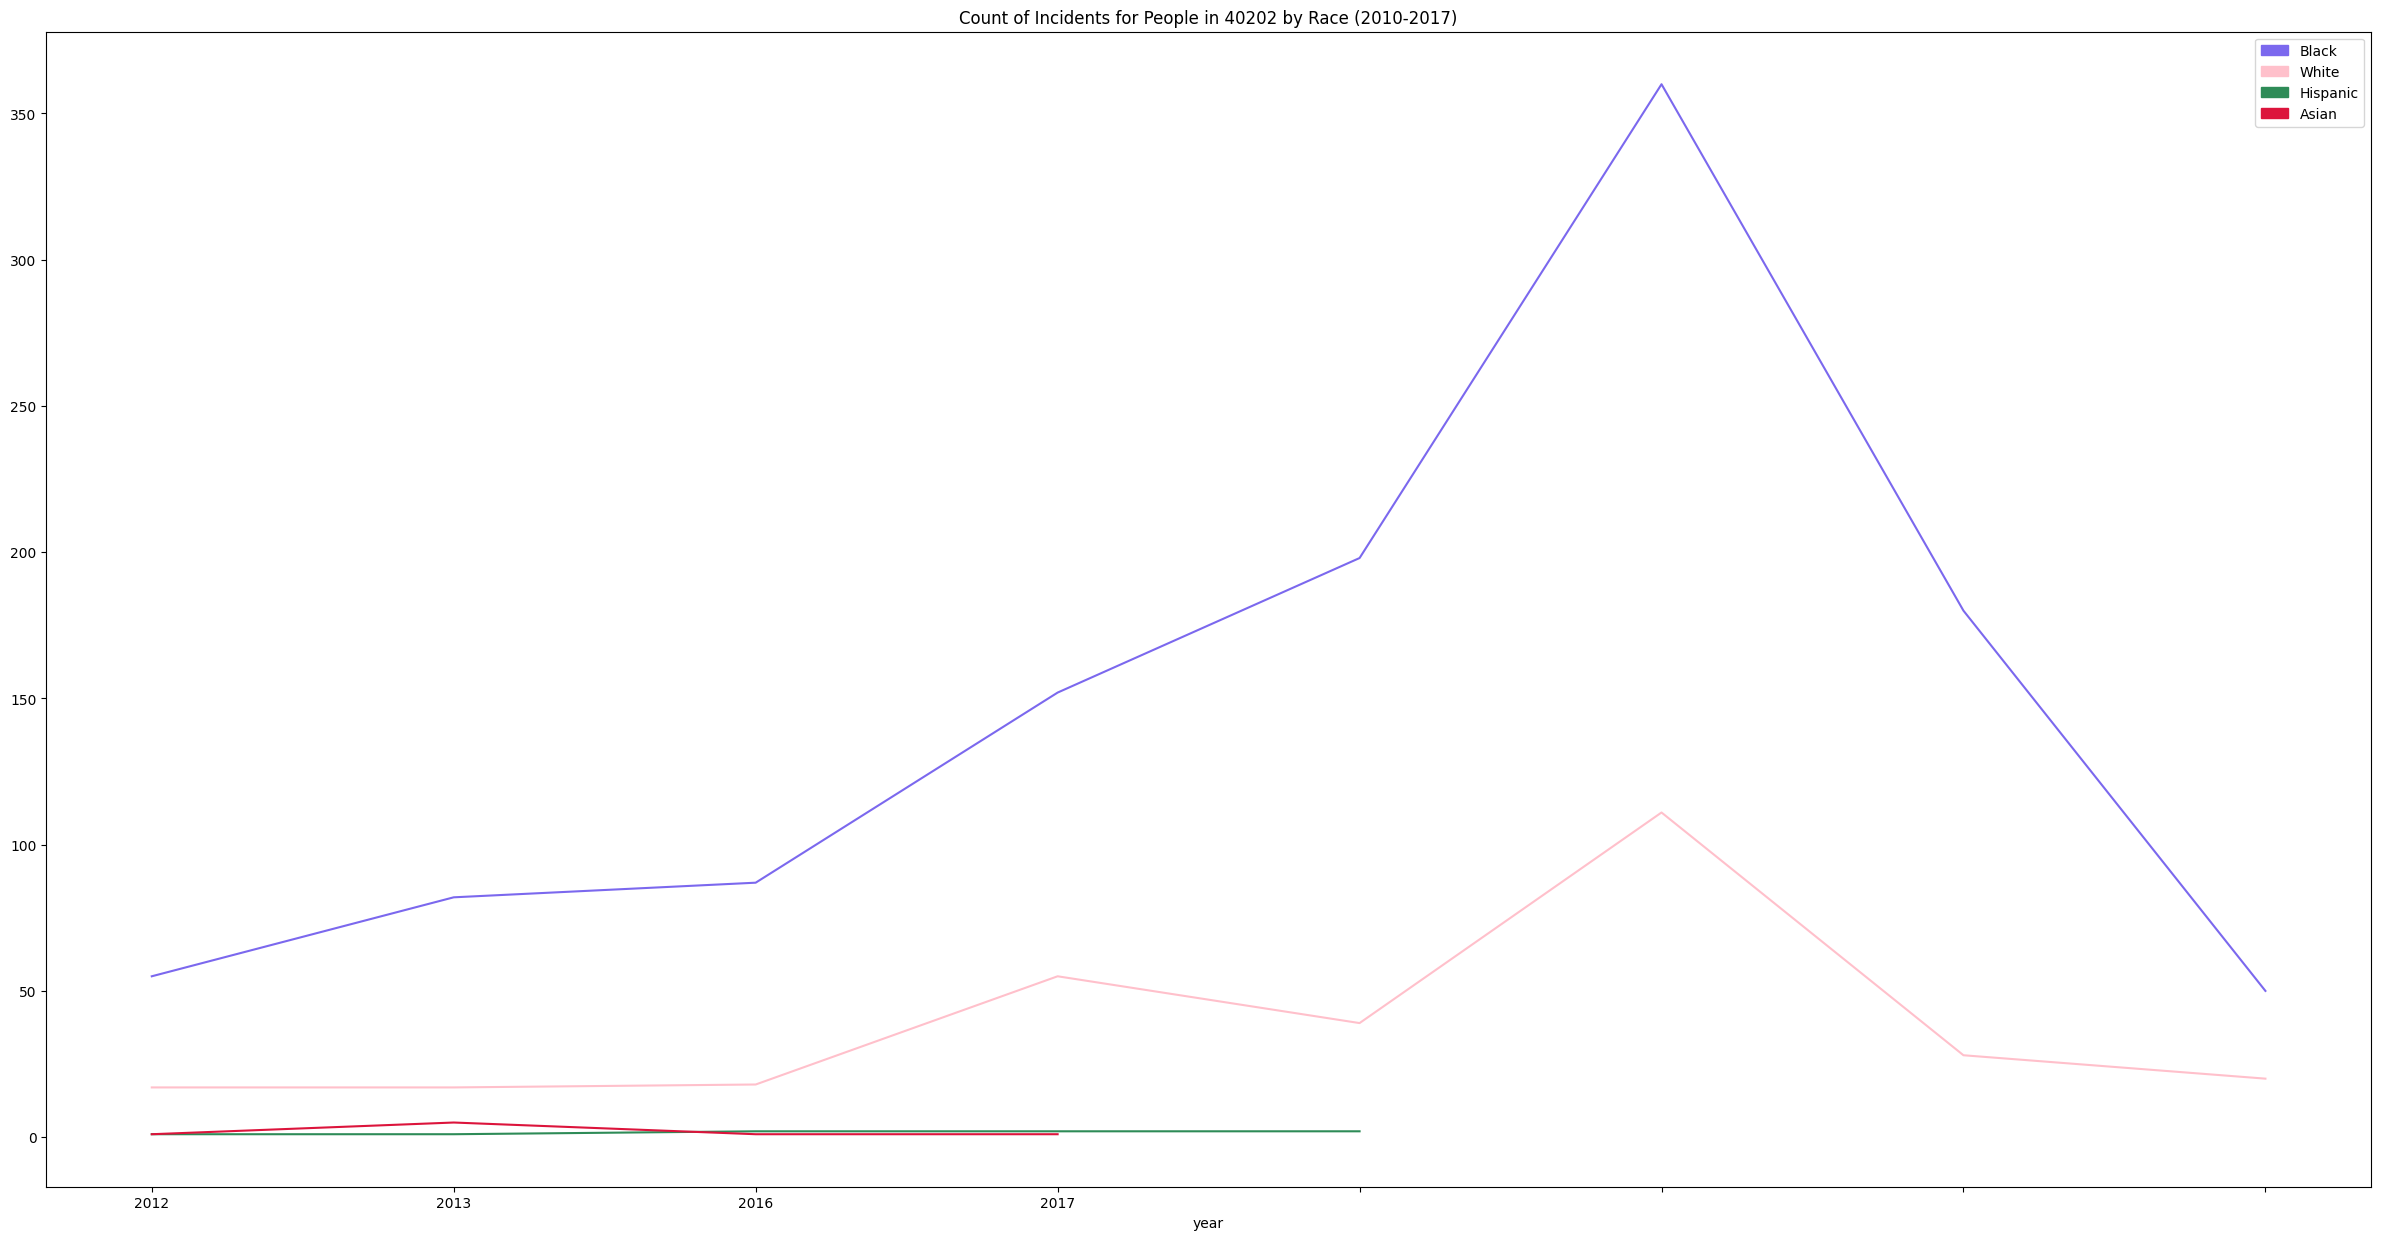

In [298]:
ax41 = b_inc_year_zip.plot(xlabel='', title='Count of Incidents for People in 40202 by Race (2010-2017)', figsize = (30,15), color = 'mediumslateblue')
w_inc_year_zip.plot(color = 'pink', ax = ax41)
h_inc_year_zip.plot(color = 'seagreen', ax = ax41)
a_inc_year_zip.plot(color = 'crimson', ax = ax41)
b_label = mpatch.Patch(color = 'mediumslateblue', label = "Black")
w_label = mpatch.Patch(color = 'pink', label = "White")
h_label = mpatch.Patch(color = 'seagreen', label = "Hispanic")
a_label = mpatch.Patch(color = 'crimson', label = "Asian")
plt.legend(handles=[b_label, w_label, h_label, a_label], loc = 1)
for p in ax41.patches:
    ax41.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('./CompiledImages/40202_race_incidents.png')

### Percent Increase per Race per Year

In [299]:
race_inc_year = firearm_data[['person_recovered_from_race', 'year']]

In [300]:
b_inc_year = race_inc_year[race_inc_year['person_recovered_from_race'] == 'Black']
b_inc_year.drop('person_recovered_from_race', axis = 1, inplace = True)
b_inc_year['count_of_incidents'] = b_inc_year['year']
b_inc_year = b_inc_year.groupby('year').count()
b_inc_year

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\2614234851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_inc_year.drop('person_recovered_from_race', axis = 1, inplace = True)
C:\Users\chris\AppData\Local\Temp\ipykernel_24012\2614234851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_inc_year['count_of_incidents'] = b_inc_year['year']


count_of_incidents
year                    
2009                   3
2010                 612
2011                 724
2012                 707
2013                 602
2014                 766
2015                 904
2016                1234
2017                 207

In [301]:
w_inc_year = race_inc_year[race_inc_year['person_recovered_from_race'] == 'White']
w_inc_year.drop('person_recovered_from_race', axis = 1, inplace = True)
w_inc_year['count_of_incidents'] = w_inc_year['year']
w_inc_year = w_inc_year.groupby('year').count()
w_inc_year

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\2580869057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_inc_year.drop('person_recovered_from_race', axis = 1, inplace = True)
C:\Users\chris\AppData\Local\Temp\ipykernel_24012\2580869057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_inc_year['count_of_incidents'] = w_inc_year['year']


count_of_incidents
year                    
2008                   1
2010                 365
2011                 441
2012                 421
2013                 433
2014                 398
2015                 428
2016                 582
2017                 130

In [302]:
h_inc_year = race_inc_year[race_inc_year['person_recovered_from_race'] == 'Hispanic']
h_inc_year.drop('person_recovered_from_race', axis = 1, inplace = True)
h_inc_year['count_of_incidents'] = h_inc_year['year']
h_inc_year = h_inc_year.groupby('year').count()
h_inc_year

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\865305013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_inc_year.drop('person_recovered_from_race', axis = 1, inplace = True)
C:\Users\chris\AppData\Local\Temp\ipykernel_24012\865305013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_inc_year['count_of_incidents'] = h_inc_year['year']


count_of_incidents
year                    
2010                  21
2011                  14
2012                  22
2013                  23
2014                  32
2015                  13
2016                  24
2017                   4

In [303]:
a_inc_year = race_inc_year[race_inc_year['person_recovered_from_race'] == 'Asian']
a_inc_year.drop('person_recovered_from_race', axis = 1, inplace = True)
a_inc_year['count_of_incidents'] = a_inc_year['year']
a_inc_year = a_inc_year.groupby('year').count()
a_inc_year

C:\Users\chris\AppData\Local\Temp\ipykernel_24012\3851776470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_inc_year.drop('person_recovered_from_race', axis = 1, inplace = True)
C:\Users\chris\AppData\Local\Temp\ipykernel_24012\3851776470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_inc_year['count_of_incidents'] = a_inc_year['year']


count_of_incidents
year                    
2010                   2
2011                   5
2012                   4
2013                   9
2014                   3
2015                   1
2016                   6
2017                   2

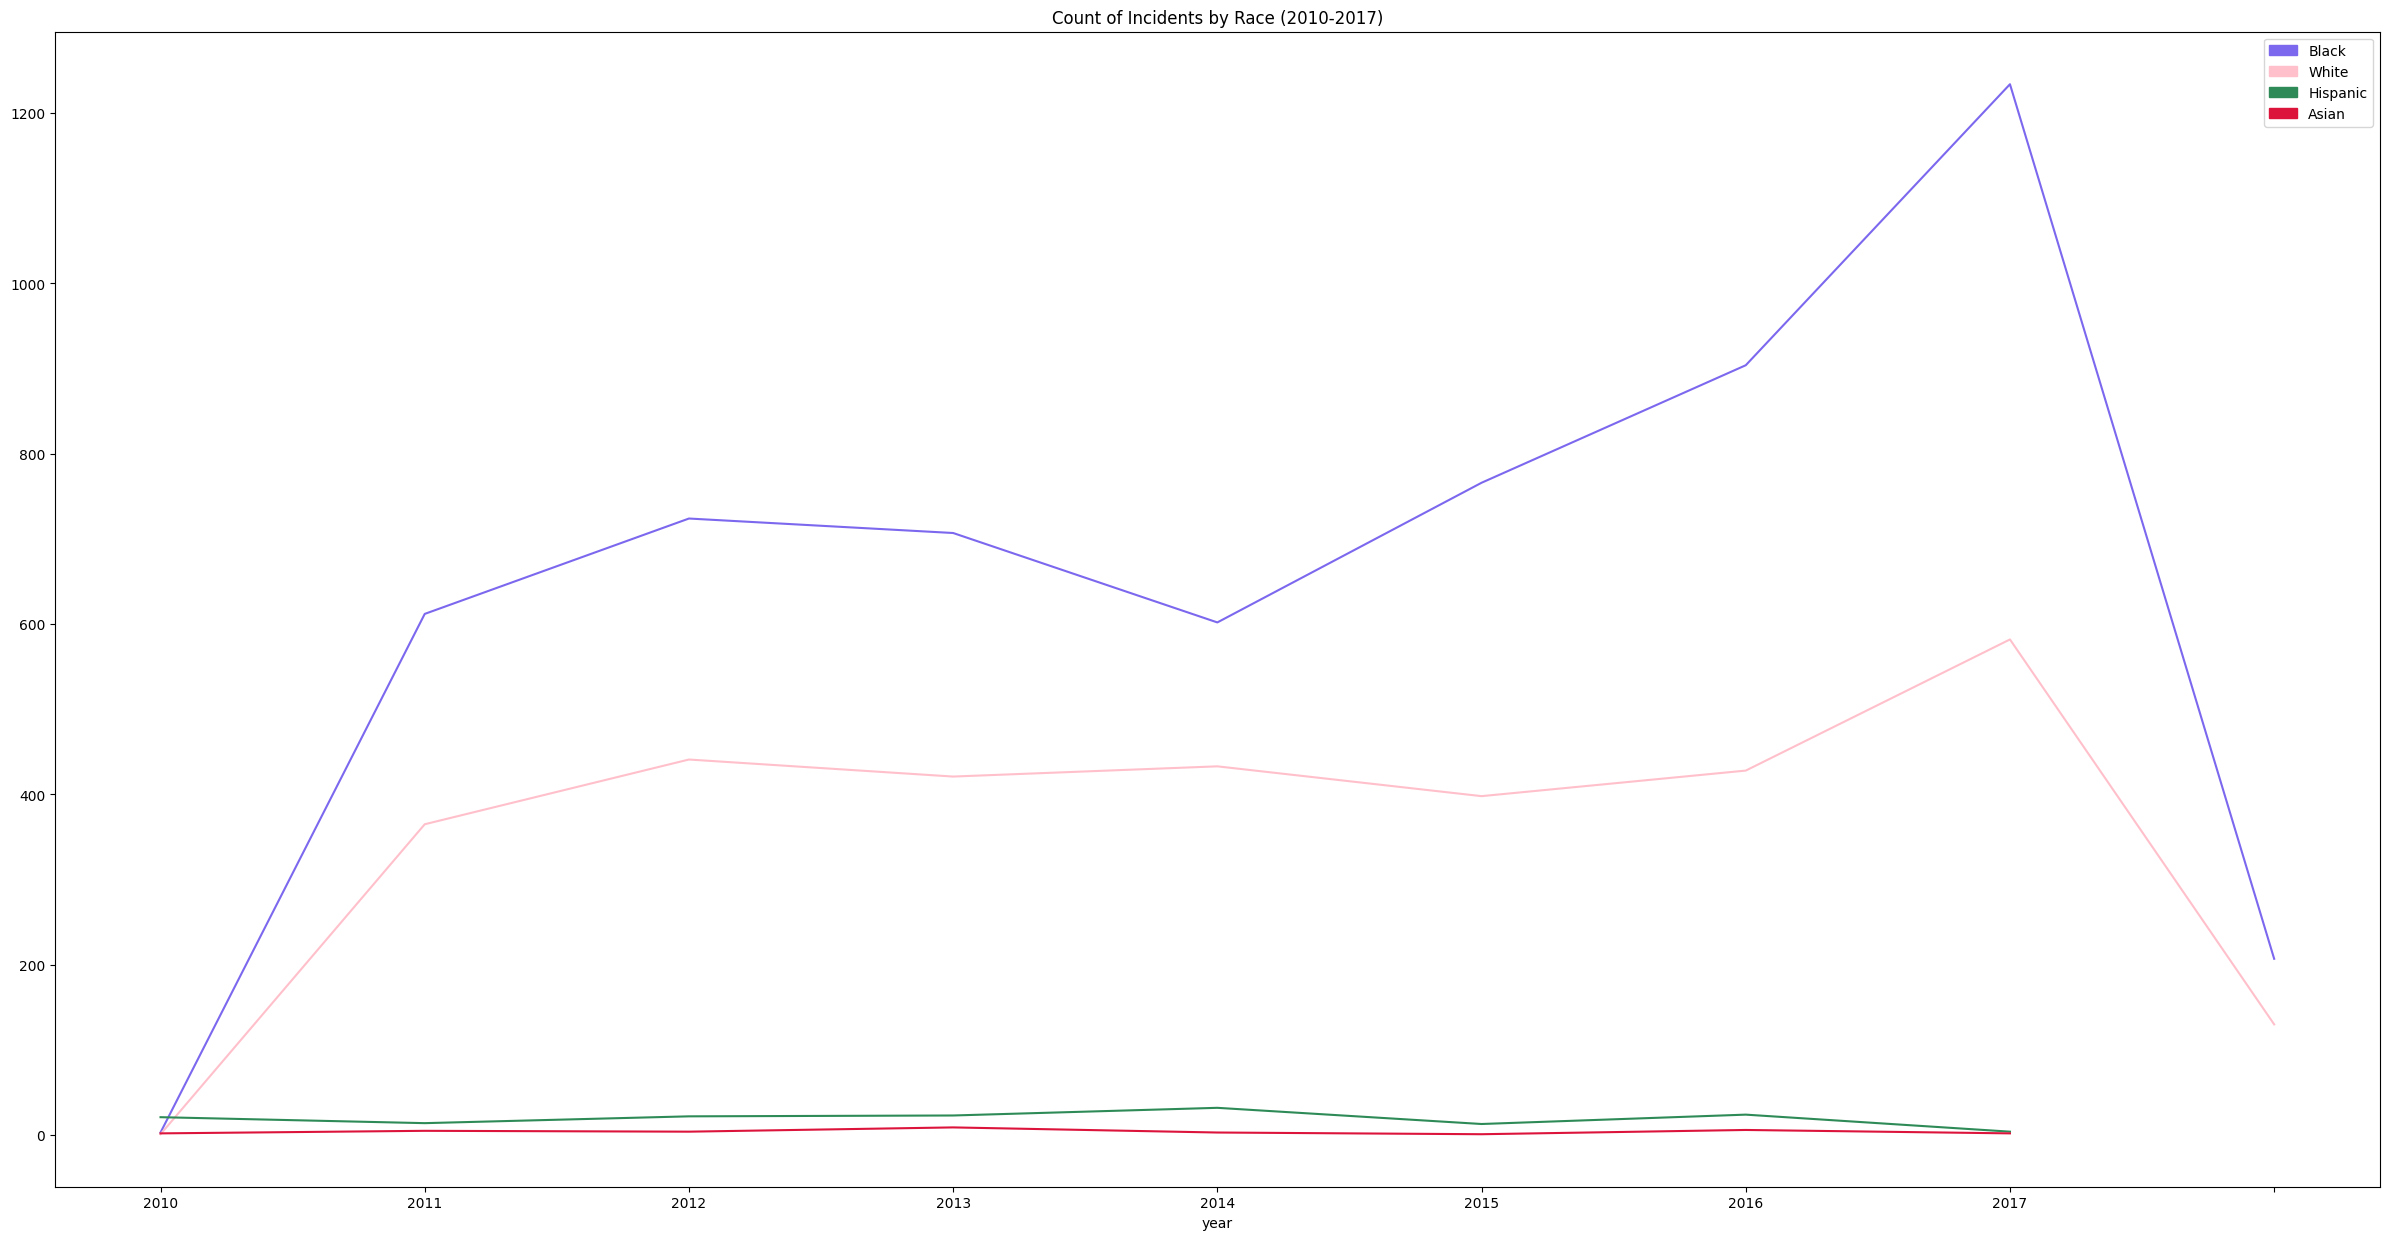

In [304]:
ax42 = b_inc_year.plot(xlabel='', title='Count of Incidents by Race (2010-2017)', figsize = (30,15), color = 'mediumslateblue')
w_inc_year.plot(color = 'pink', ax = ax42)
h_inc_year.plot(color = 'seagreen', ax = ax42)
a_inc_year.plot(color = 'crimson', ax = ax42)
b_label = mpatch.Patch(color = 'mediumslateblue', label = "Black")
w_label = mpatch.Patch(color = 'pink', label = "White")
h_label = mpatch.Patch(color = 'seagreen', label = "Hispanic")
a_label = mpatch.Patch(color = 'crimson', label = "Asian")
plt.legend(handles=[b_label, w_label, h_label, a_label], loc = 1)
for p in ax42.patches:
    ax42.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('./CompiledImages/total_incidents_time.png')